#### Mental health issues have been a very rampant issue globally affecting most people, both the young and the old. The reason for mental health issues and its increase is due to a number of reasons which include; childhood abuse, trauma, or neglect. The analysis below shows how mental health has affected people across different countries with an attempt to create a model that will predict mental health issues.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings

# Reading data from a csv file

In [6]:
data = pd.read_csv('mentalhealthdataset.csv')
data

Timestamp  Age  Gender         Country state self_employed  \
0      8/27/2014 11:29   37  Female   United States    IL           NaN   
1      8/27/2014 11:29   44       M   United States    IN           NaN   
2      8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3      8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4      8/27/2014 11:30   31    Male   United States    TX           NaN   
...                ...  ...     ...             ...   ...           ...   
1254   9/12/2015 11:17   26    male  United Kingdom   NaN            No   
1255    9/26/2015 1:07   32    Male   United States    IL            No   
1256   11/7/2015 12:36   34    male   United States    CA            No   
1257  11/30/2015 21:25   46       f   United States    NC            No   
1258    2/1/2016 23:04   25    Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
0                No       Yes          Often          25-Jun  ...   
1                No        No         Rarely  More than 1000  ...   
2                No        No         Rarely          25-Jun  ...   
3               Yes       Yes          Often          26-100  ...   
4                No        No          Never         100-500  ...   
...             ...       ...            ...             ...  ...   
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
0                    Maybe                Yes              No      NaN  
1                       No         Don't know              No      NaN  
2                      Yes                 No              No      NaN  
3                    Maybe                 No             Yes      NaN  
4                      Yes         Don't know              No      NaN  
...                    ...                ...             ...      ...  
1254                    No         Don't know              No      NaN  
1255                    No               

In [7]:
data.head()

Timestamp  Age  Gender         Country state self_employed  \
0  8/27/2014 11:29   37  Female   United States    IL           NaN   
1  8/27/2014 11:29   44       M   United States    IN           NaN   
2  8/27/2014 11:29   32    Male          Canada   NaN           NaN   
3  8/27/2014 11:29   31    Male  United Kingdom   NaN           NaN   
4  8/27/2014 11:30   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often          25-Jun  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely          25-Jun  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

In [8]:
data.tail()

Timestamp  Age Gender         Country state self_employed  \
1254   9/12/2015 11:17   26   male  United Kingdom   NaN            No   
1255    9/26/2015 1:07   32   Male   United States    IL            No   
1256   11/7/2015 12:36   34   male   United States    CA            No   
1257  11/30/2015 21:25   46      f   United States    NC            No   
1258    2/1/2016 23:04   25   Male   United States    IL            No   

     family_history treatment work_interfere    no_employees  ...  \
1254             No       Yes            NaN          26-100  ...   
1255            Yes       Yes          Often          26-100  ...   
1256            Yes       Yes      Sometimes  More than 1000  ...   
1257             No        No            NaN         100-500  ...   
1258            Yes       Yes      Sometimes          26-100  ...   

                   leave mental_health_consequence phys_health_consequence  \
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence comments  
1254                    No         Don't know              No      NaN  
1255                    No                Yes              No      NaN  
1256                    No                 No              No      NaN  
1257                    No                 No              No      NaN  
1258                    No         Don't know              No      NaN  

[5 rows x 27 columns]

# The columns that are in the dataset

In [9]:
data.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

# This shows more information about the dataset.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# Description about the dataset

In [11]:
data.describe()

Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11

# Understanding what datatypes are in the dataset

In [12]:
data.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

# Finding and Dealing with missing values

The above dataset has missing values in the state,self-employed,work_interfere and comments columns.

In [13]:
data.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

One way of dealing with missing values is by dropping the columns with the missing values. 
We now drop the  columns:comments,state and Timestamp because these columns have missing values that are quite hard to fill

In [14]:
data.drop(['comments'], axis= 1, inplace=True)
data.drop(['state'], axis= 1, inplace=True)
data.drop(['Timestamp'], axis= 1, inplace=True)

data.isnull().sum().max() #just checking that there's no missing data missing...
data.head(5)

Age  Gender         Country self_employed family_history treatment  \
0   37  Female   United States           NaN             No       Yes   
1   44       M   United States           NaN             No        No   
2   32    Male          Canada           NaN             No        No   
3   31    Male  United Kingdom           NaN            Yes       Yes   
4   31    Male   United States           NaN             No        No   

  work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0          Often          25-Jun          No          Yes  ...         Yes   
1         Rarely  More than 1000          No           No  ...  Don't know   
2         Rarely          25-Jun          No          Yes  ...  Don't know   
3          Often          26-100          No          Yes  ...          No   
4          Never         100-500         Yes          Yes  ...  Don't know   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence  
0                Yes              No  
1         Don't know              No  
2                 No              No  
3                 No             Yes  
4         Don't know              No  

[5 rows x 24 columns]

Another way of dealing with missing values is filling in the missing values. This is done using the function fillna().
We now fill missing values in self_employed column with the words "Don't Know"

In [15]:
data["self_employed"].fillna("Don't Know", inplace = True)
 
data

Age  Gender         Country self_employed family_history treatment  \
0      37  Female   United States    Don't Know             No       Yes   
1      44       M   United States    Don't Know             No        No   
2      32    Male          Canada    Don't Know             No        No   
3      31    Male  United Kingdom    Don't Know            Yes       Yes   
4      31    Male   United States    Don't Know             No        No   
...   ...     ...             ...           ...            ...       ...   
1254   26    male  United Kingdom            No             No       Yes   
1255   32    Male   United States            No            Yes       Yes   
1256   34    male   United States            No            Yes       Yes   
1257   46       f   United States            No             No        No   
1258   25    Male   United States            No            Yes       Yes   

     work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0             Often          25-Jun          No          Yes  ...         Yes   
1            Rarely  More than 1000          No           No  ...  Don't know   
2            Rarely          25-Jun          No          Yes  ...  Don't know   
3             Often          26-100          No          Yes  ...          No   
4             Never         100-500         Yes          Yes  ...  Don't know   
...             ...             ...         ...          ...  ...         ...   
1254            NaN          26-100          No          Yes  ...  Don't know   
1255          Often          26-100         Yes          Yes  ...         Yes   
1256      Sometimes  More than 1000          No          Yes  ...  Don't know   
1257            NaN         100-500         Yes          Yes  ...  Don't know   
1258      Sometimes          26-100          No           No  ...         Yes   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence  
0                    Maybe                Yes              No  
1                       No         Don't know              No  
2                      Yes                 No              No  
3                    Maybe                 No             Yes  
4                      Yes         Don't know              No  
...                    ...                ...             ...  
1254          

We now fill missing values in work_interfere column with the words "Don't Know"

In [16]:
data["work_interfere"].fillna("Don't Know", inplace = True)
 
data

Age  Gender         Country self_employed family_history treatment  \
0      37  Female   United States    Don't Know             No       Yes   
1      44       M   United States    Don't Know             No        No   
2      32    Male          Canada    Don't Know             No        No   
3      31    Male  United Kingdom    Don't Know            Yes       Yes   
4      31    Male   United States    Don't Know             No        No   
...   ...     ...             ...           ...            ...       ...   
1254   26    male  United Kingdom            No             No       Yes   
1255   32    Male   United States            No            Yes       Yes   
1256   34    male   United States            No            Yes       Yes   
1257   46       f   United States            No             No        No   
1258   25    Male   United States            No            Yes       Yes   

     work_interfere    no_employees remote_work tech_company  ...   anonymity  \
0             Often          25-Jun          No          Yes  ...         Yes   
1            Rarely  More than 1000          No           No  ...  Don't know   
2            Rarely          25-Jun          No          Yes  ...  Don't know   
3             Often          26-100          No          Yes  ...          No   
4             Never         100-500         Yes          Yes  ...  Don't know   
...             ...             ...         ...          ...  ...         ...   
1254     Don't Know          26-100          No          Yes  ...  Don't know   
1255          Often          26-100         Yes          Yes  ...         Yes   
1256      Sometimes  More than 1000          No          Yes  ...  Don't know   
1257     Don't Know         100-500         Yes          Yes  ...  Don't know   
1258      Sometimes          26-100          No           No  ...         Yes   

                   leave mental_health_consequence phys_health_consequence  \
0          Somewhat easy                        No                      No   
1             Don't know                     Maybe                      No   
2     Somewhat difficult                        No                      No   
3     Somewhat difficult                       Yes                     Yes   
4             Don't know                        No                      No   
...                  ...                       ...                     ...   
1254       Somewhat easy                        No                      No   
1255  Somewhat difficult                        No                      No   
1256  Somewhat difficult                       Yes                     Yes   
1257          Don't know                       Yes                      No   
1258          Don't know                     Maybe                      No   

         coworkers    supervisor mental_health_interview  \
0     Some of them           Yes                      No   
1               No            No                      No   
2              Yes           Yes                     Yes   
3     Some of them            No                   Maybe   
4     Some of them           Yes                     Yes   
...            ...           ...                     ...   
1254  Some of them  Some of them                      No   
1255  Some of them           Yes                      No   
1256            No            No                      No   
1257            No            No                      No   
1258  Some of them            No                      No   

     phys_health_interview mental_vs_physical obs_consequence  
0                    Maybe                Yes              No  
1                       No         Don't know              No  
2                      Yes                 No              No  
3                    Maybe                 No             Yes  
4                      Yes         Don't know              No  
...                    ...                ...             ...  
1254          

In [47]:
#Clean Gender column
gender = data['Gender'].unique()
print(gender)

[10 16 20 39 35 37 23 38 29  4  8 47  5 30 33 19 22 46 42  9 48 18 26  2
  7 36 14 11  3  1 32 15 40 21 25 28 41 27 13 45 12 17 31  0 24 44 34  6
 43]


In [48]:
stk_list = ['A little about you', 'p']
data = data[~data['Gender'].isin(stk_list)]
print(data['Gender'].unique())

[10 16 20 39 35 37 23 38 29  4  8 47  5 30 33 19 22 46 42  9 48 18 26  2
  7 36 14 11  3  1 32 15 40 21 25 28 41 27 13 45 12 17 31  0 24 44 34  6
 43]


Check if there are still any missing values.

In [66]:
data.isnull().sum()
#there are no missing values

Age                          0
Gender                       0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64

In [18]:
data.dtypes

Age                           int64
Gender                       object
Country                      object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
dtype: object

# The Exploratory Data Analysis.

According to our dataset, most of our data is categorical denoted by the 'object' datatype. So now, we call the categorical columns.

In [67]:
categorical_columns= data.select_dtypes(include=[object])


C:\Users\hp\AppData\Local\Temp/ipykernel_2008/3865554430.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(20,10))


<Figure size 432x288 with 0 Axes>

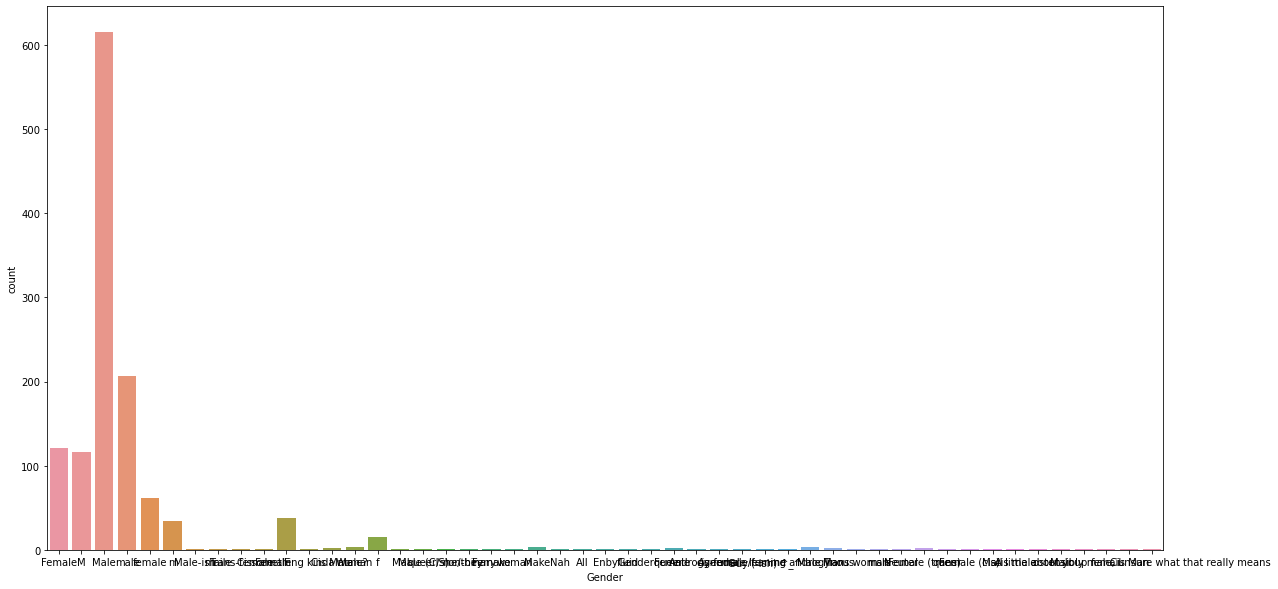

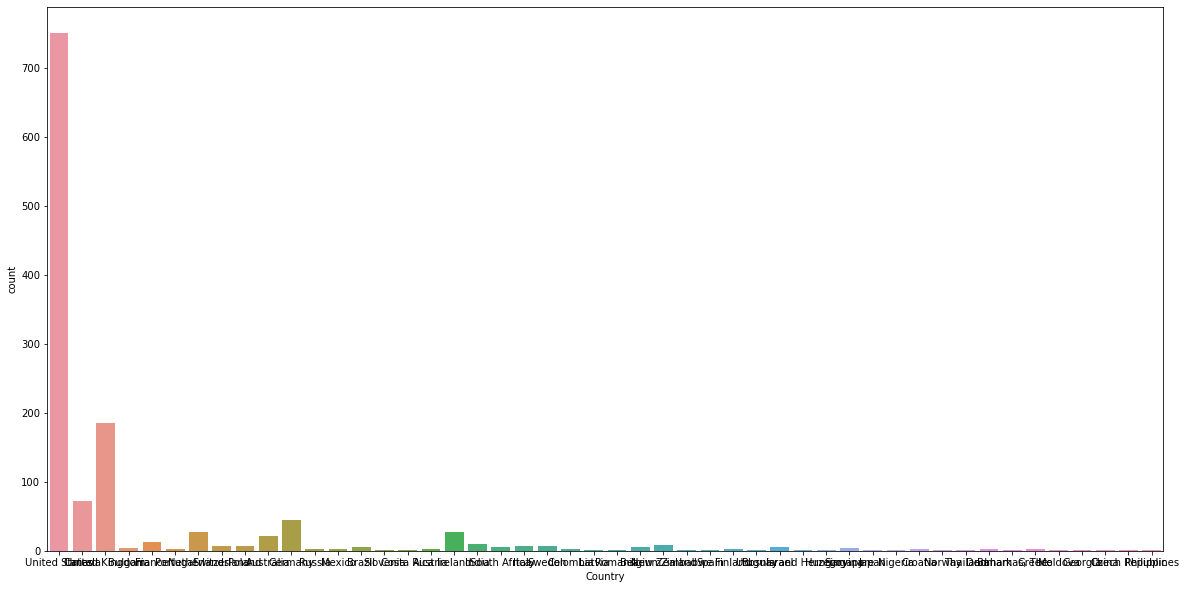

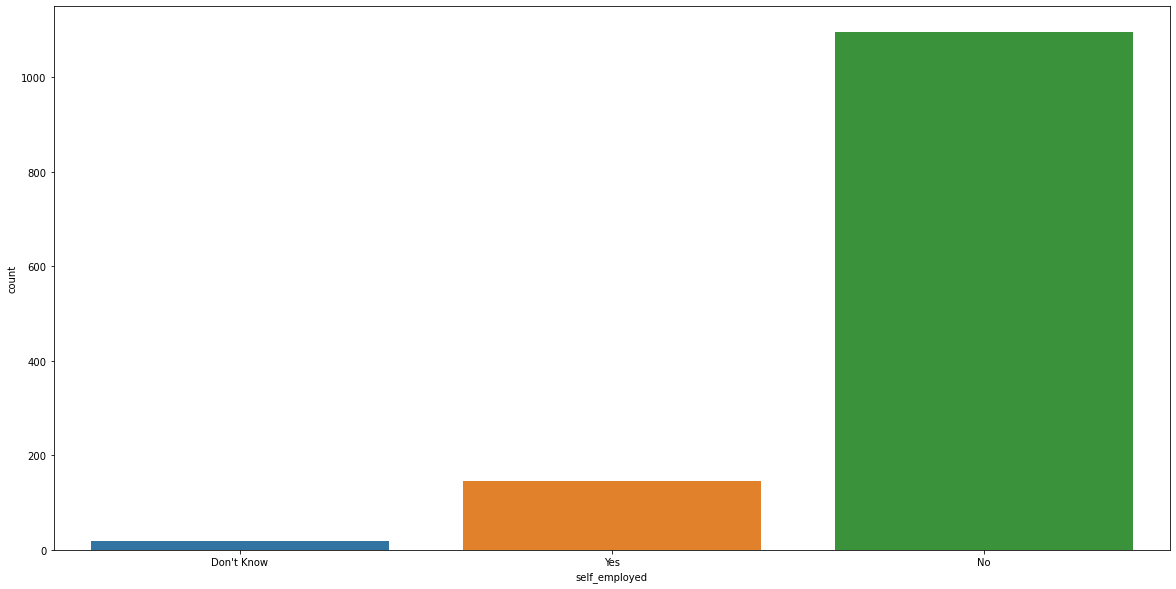

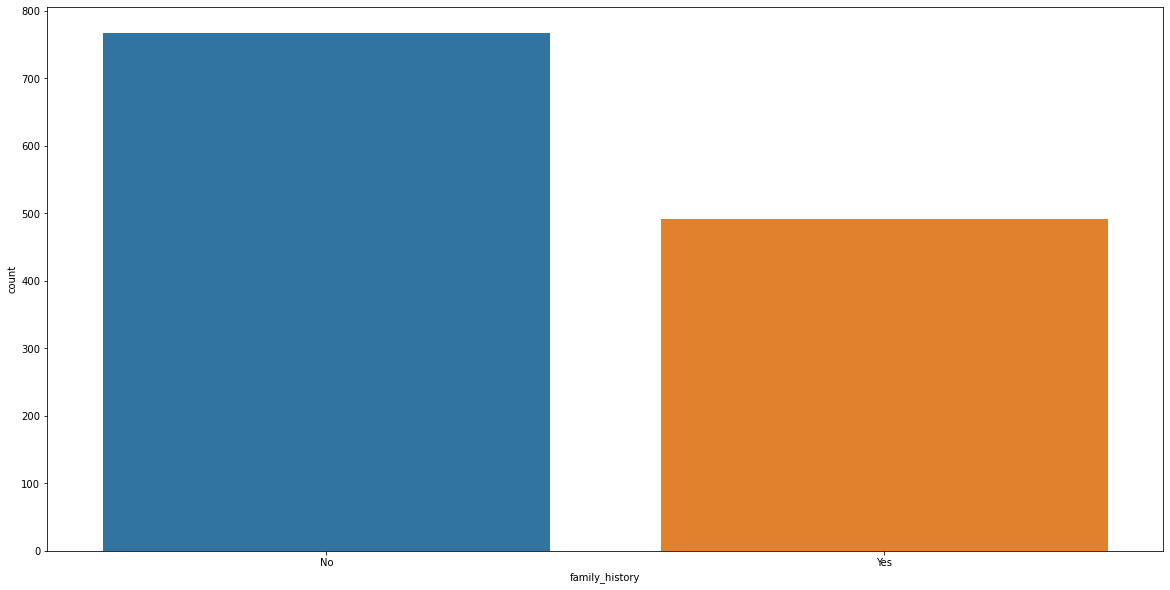

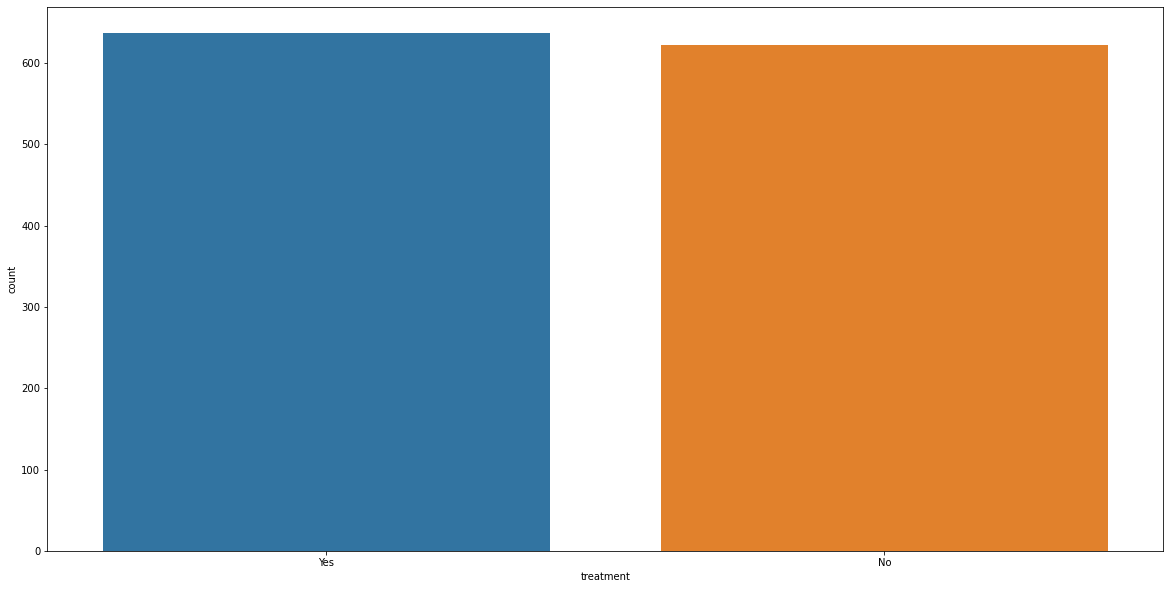

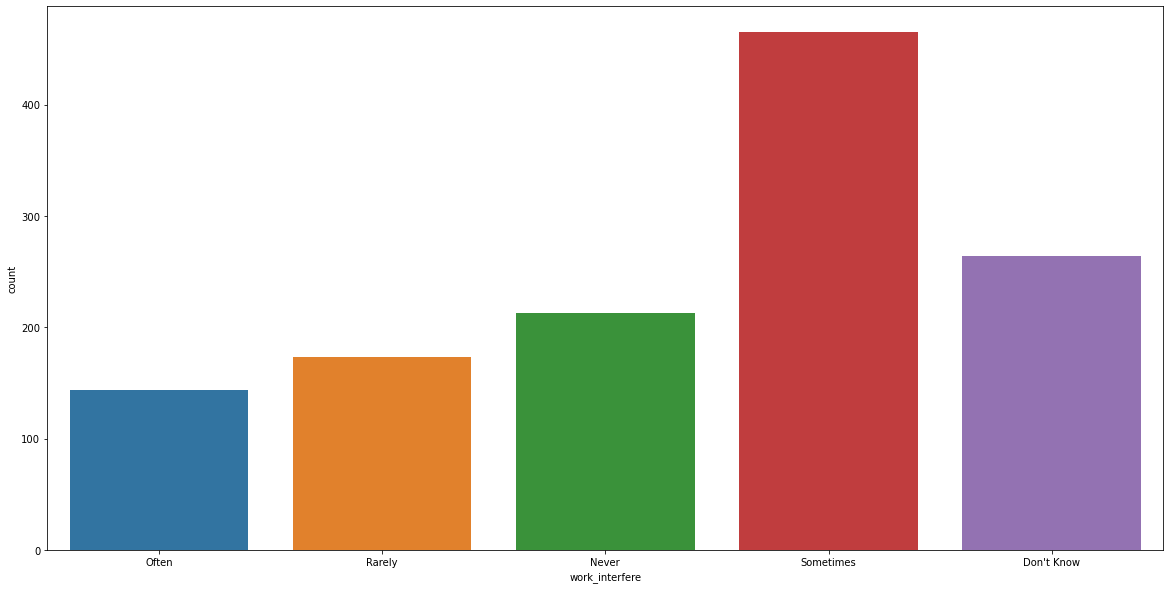

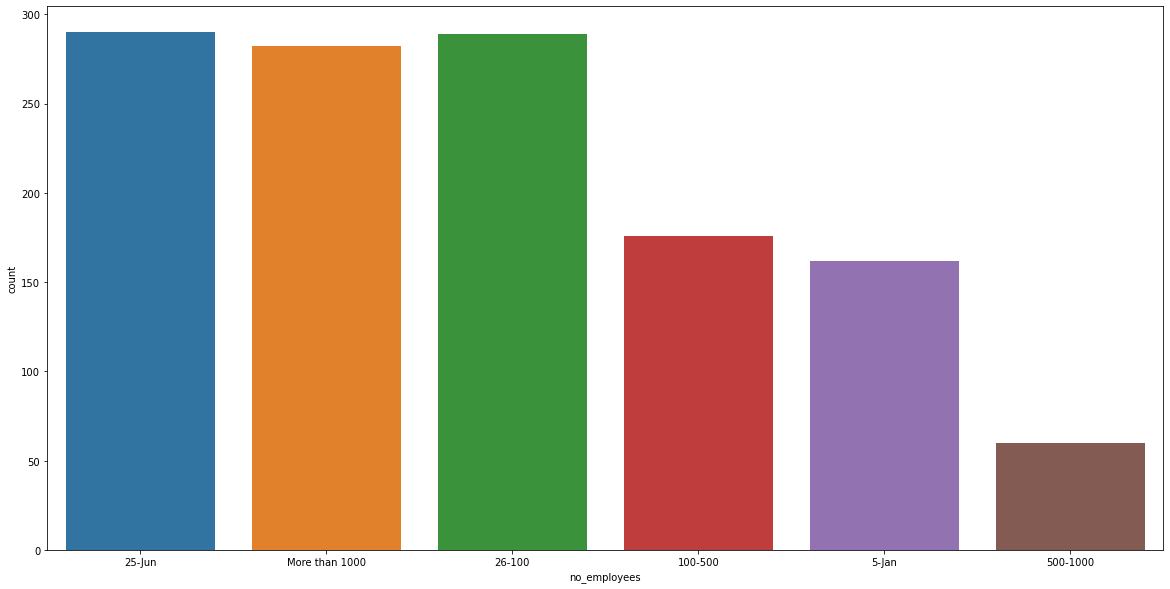

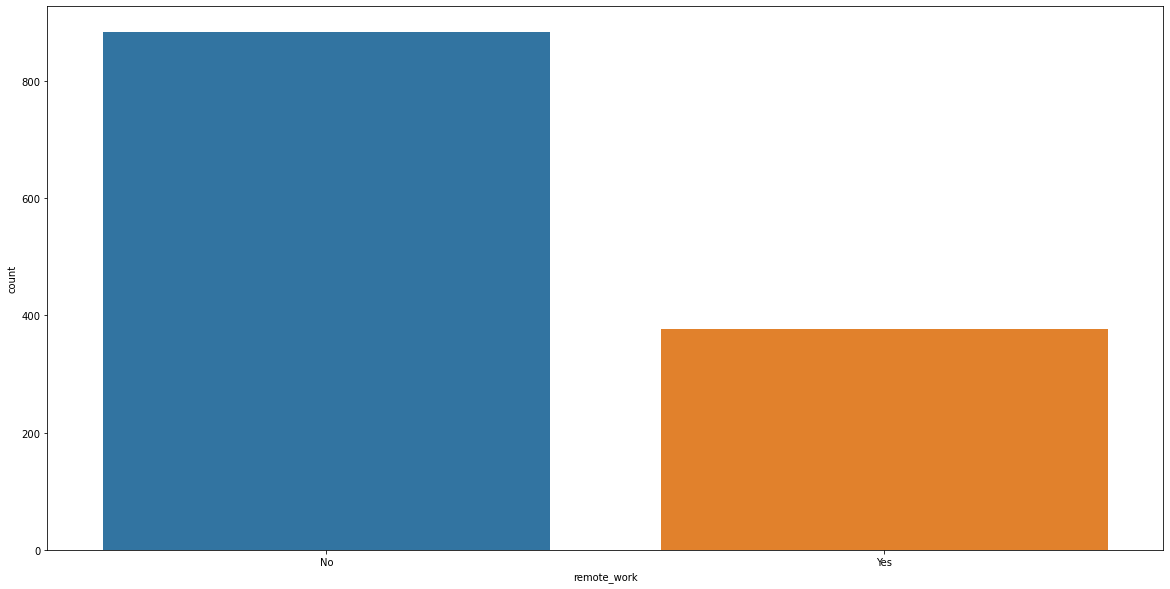

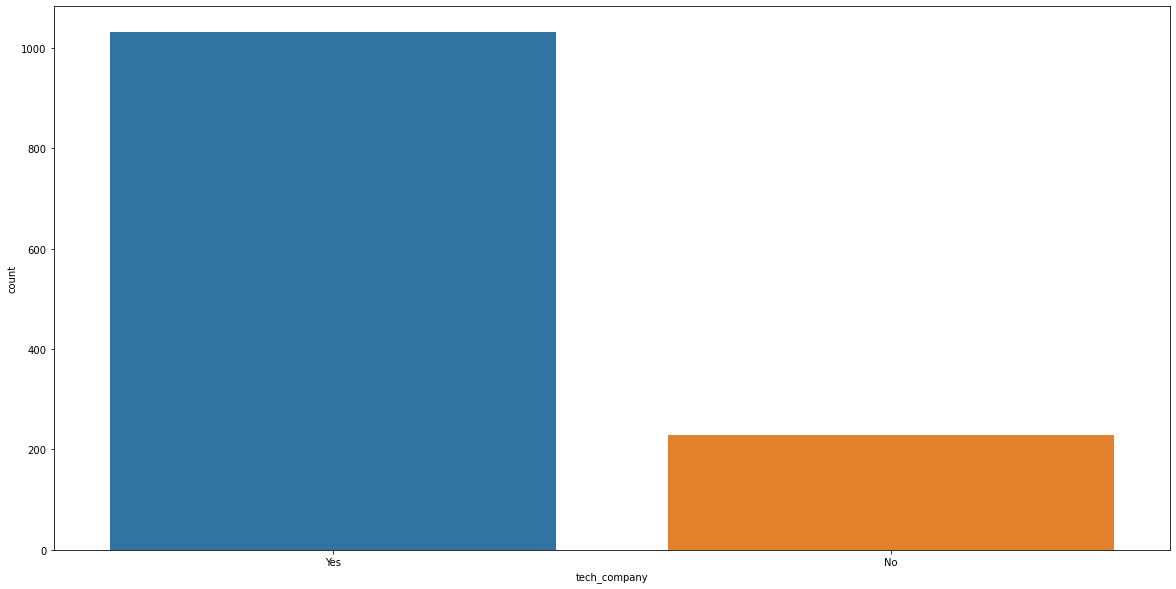

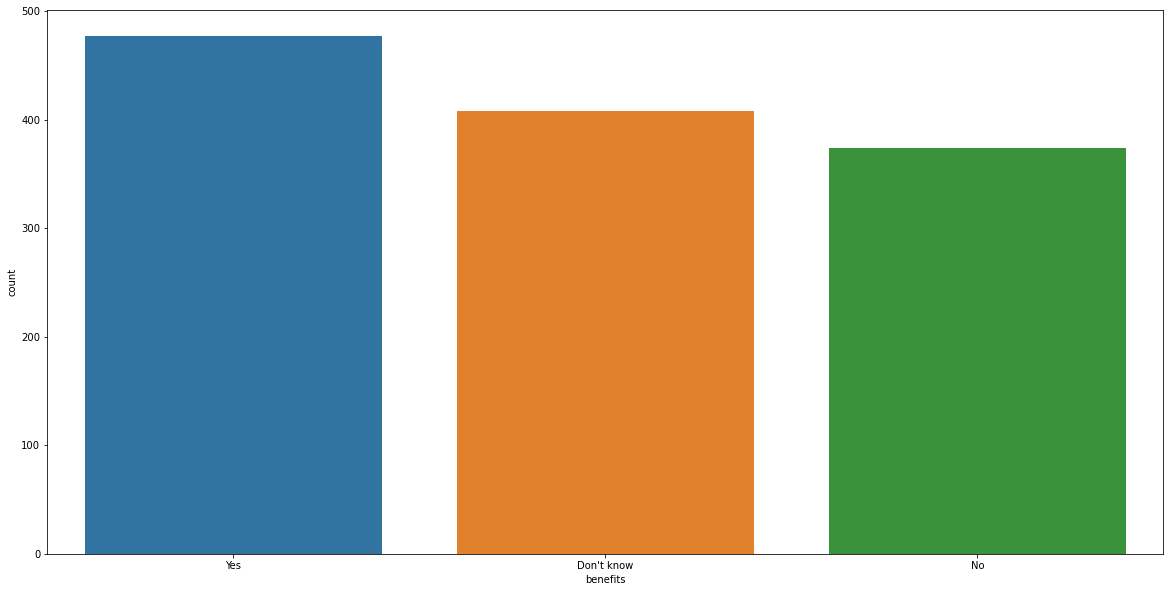

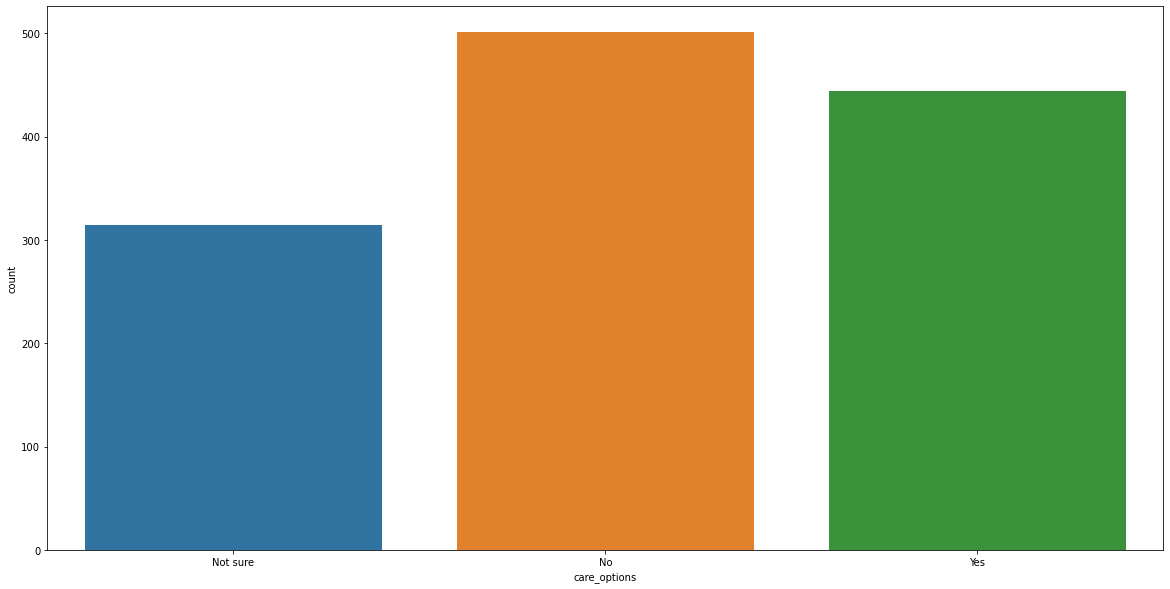

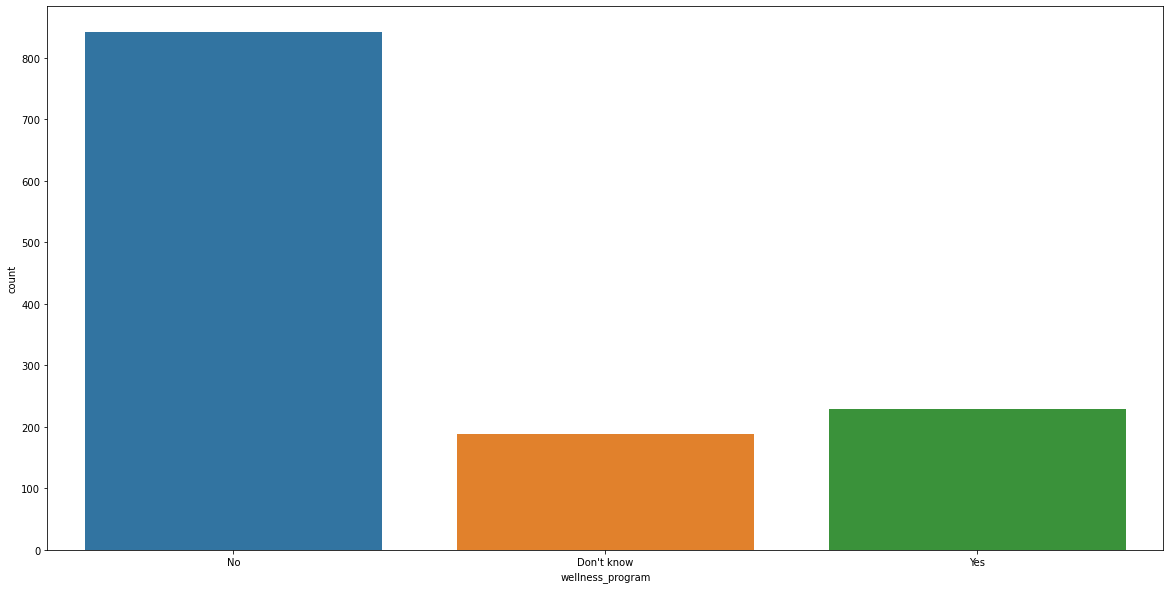

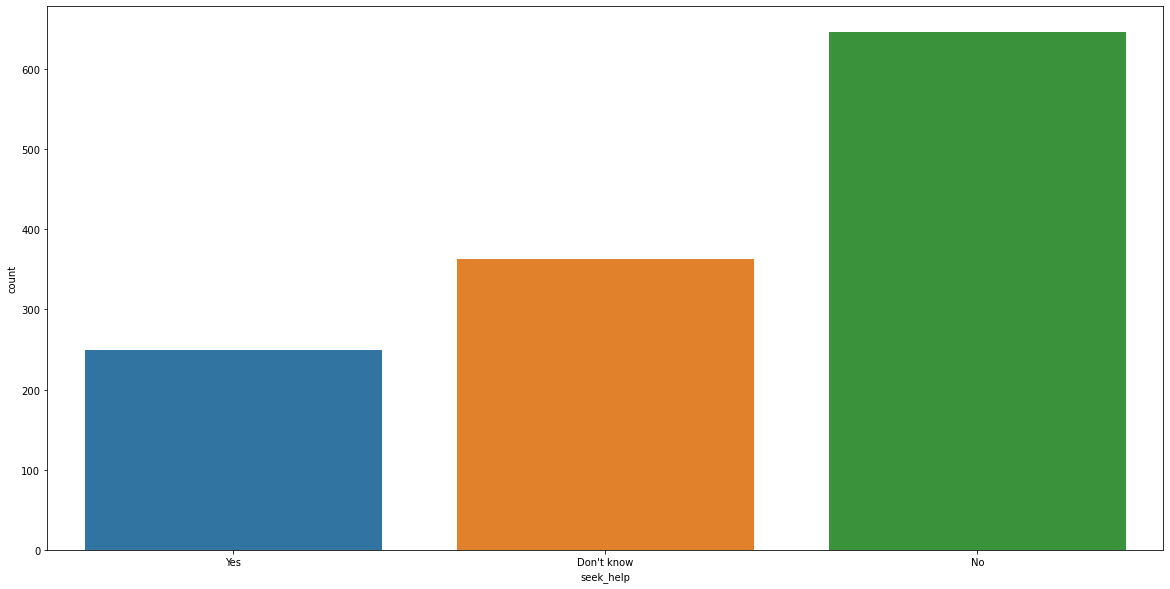

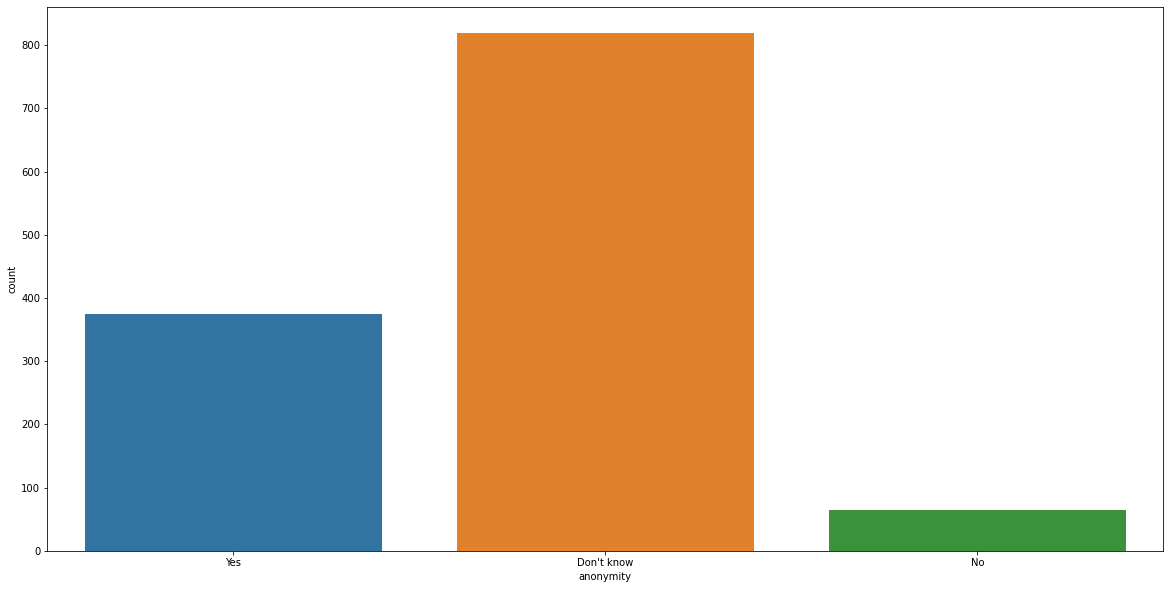

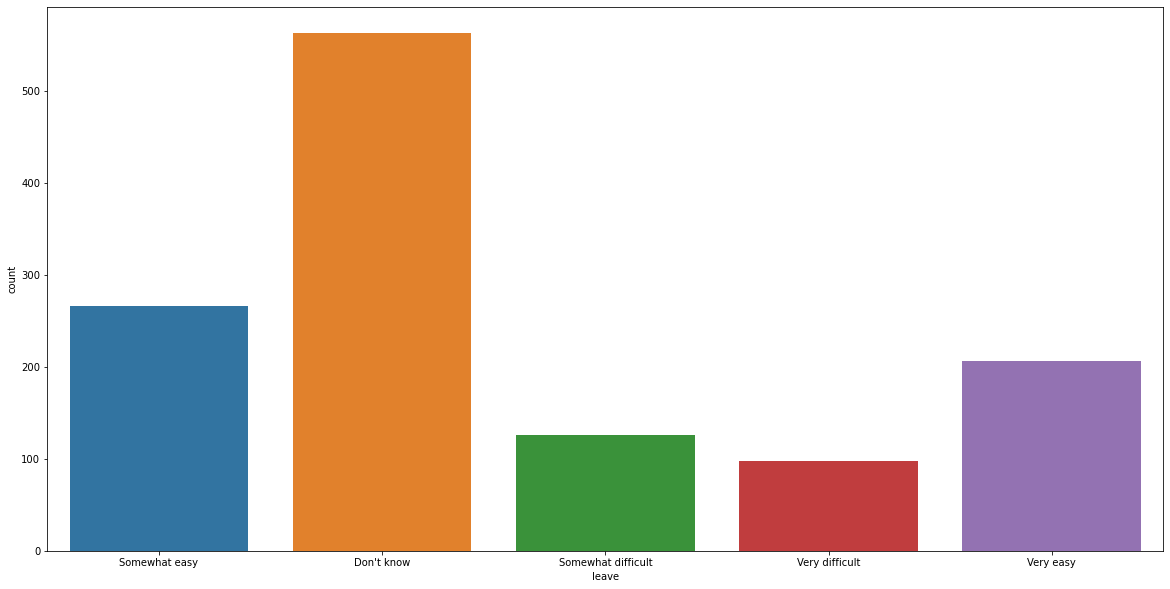

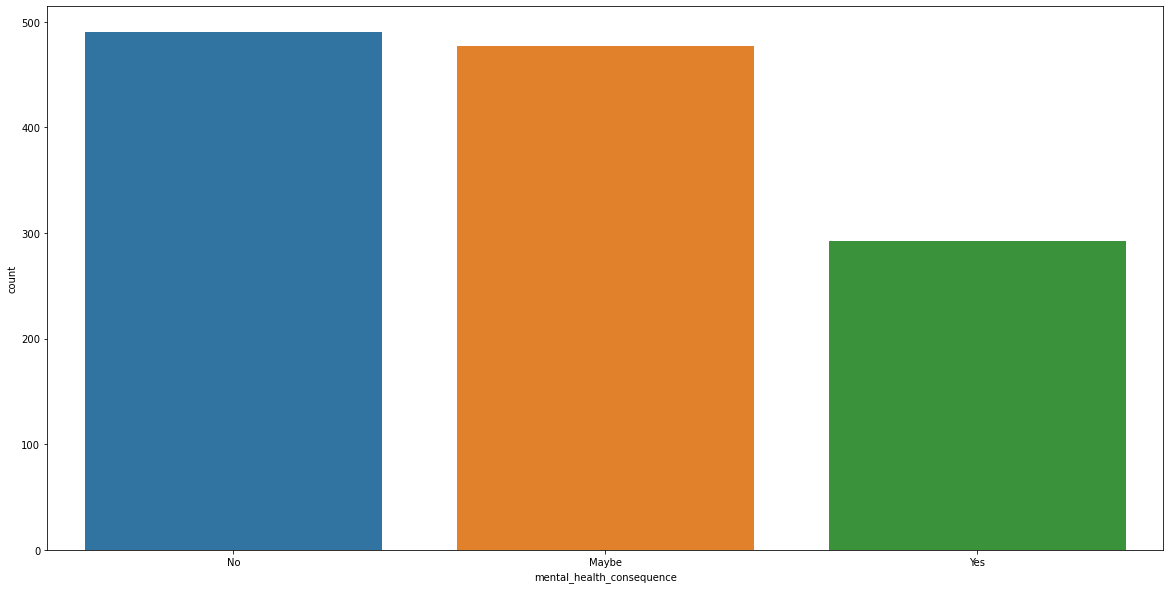

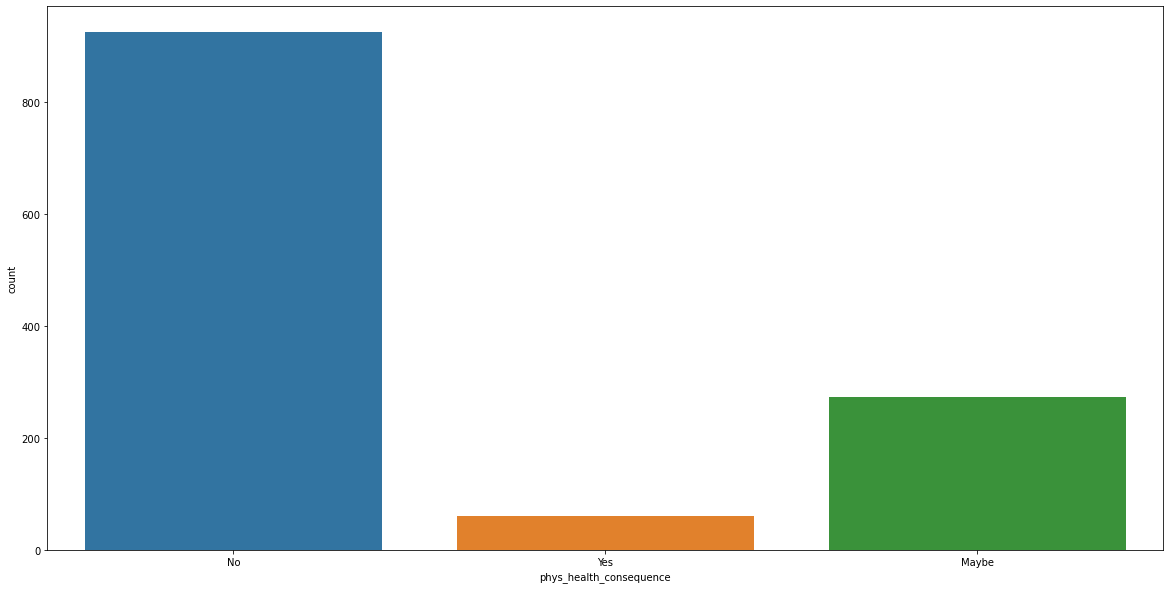

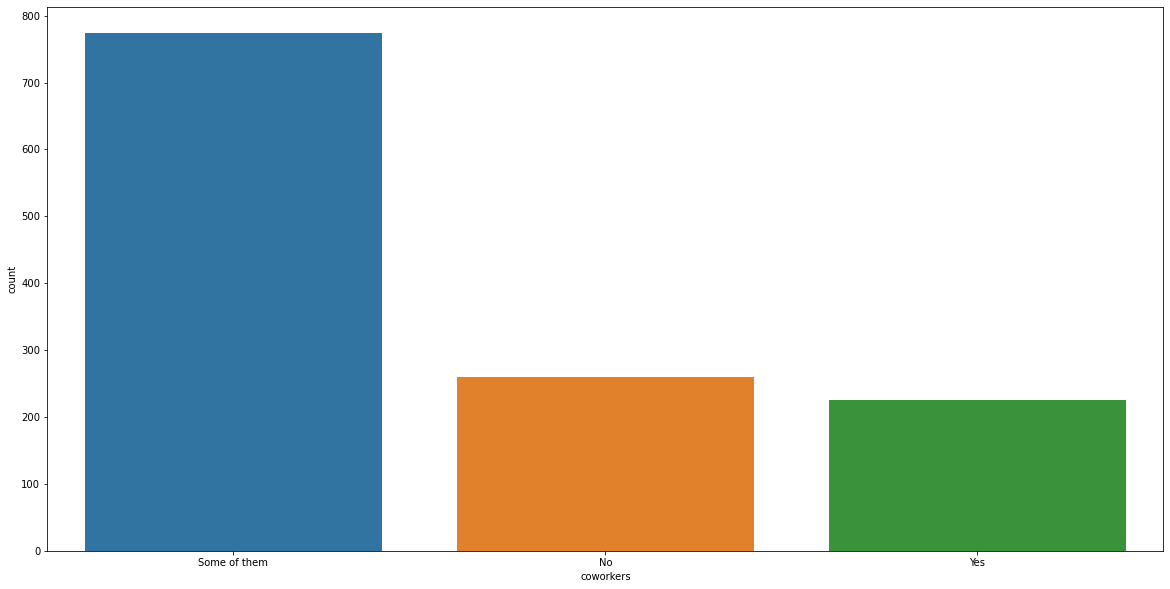

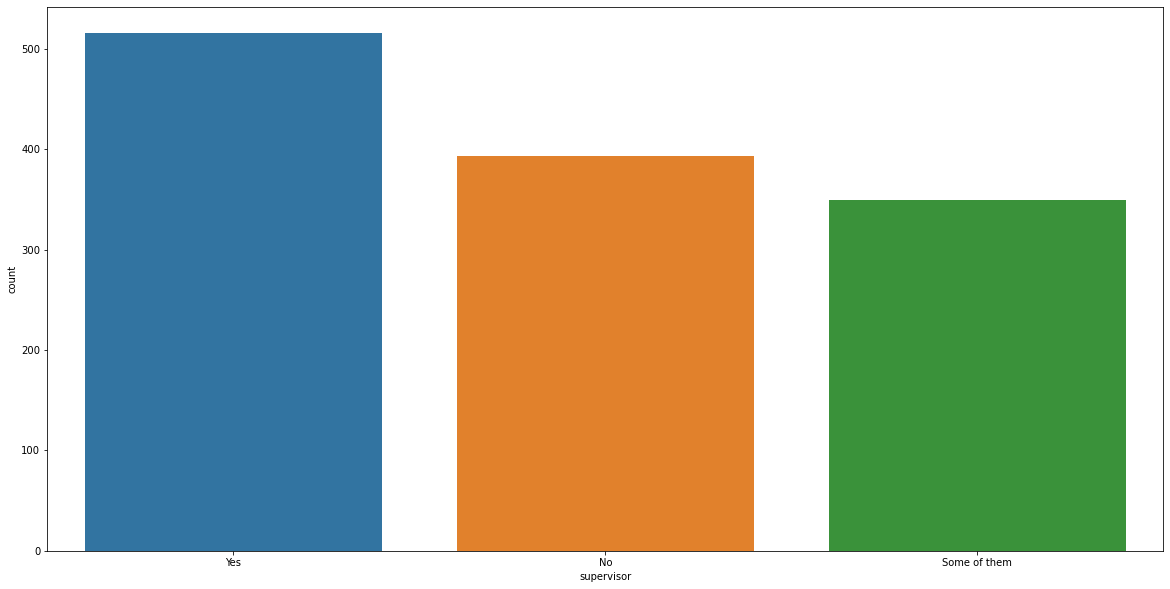

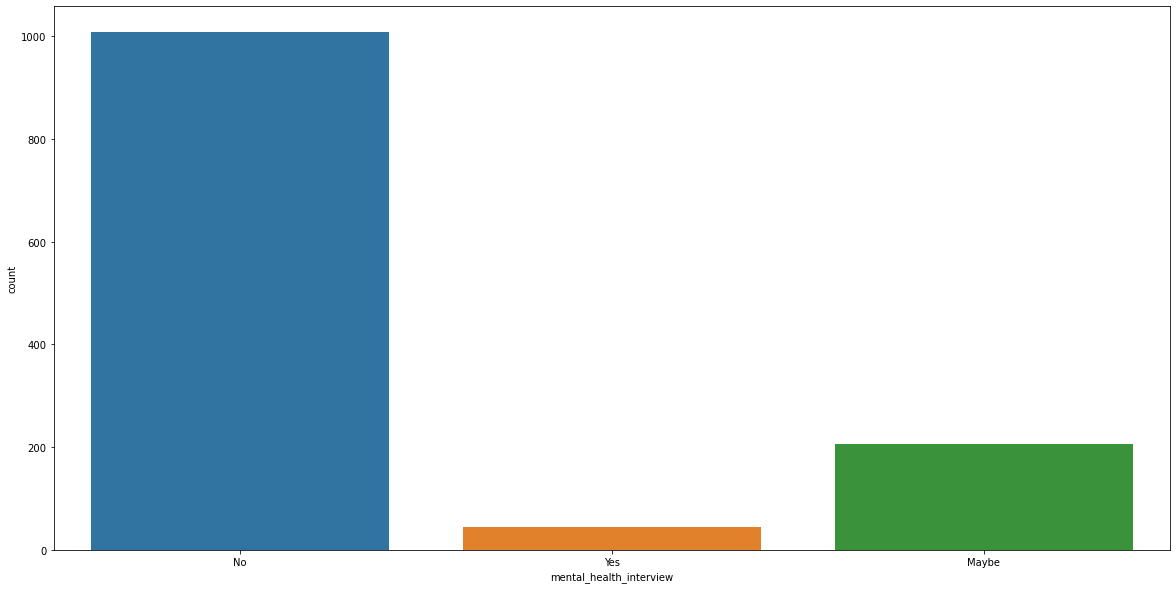

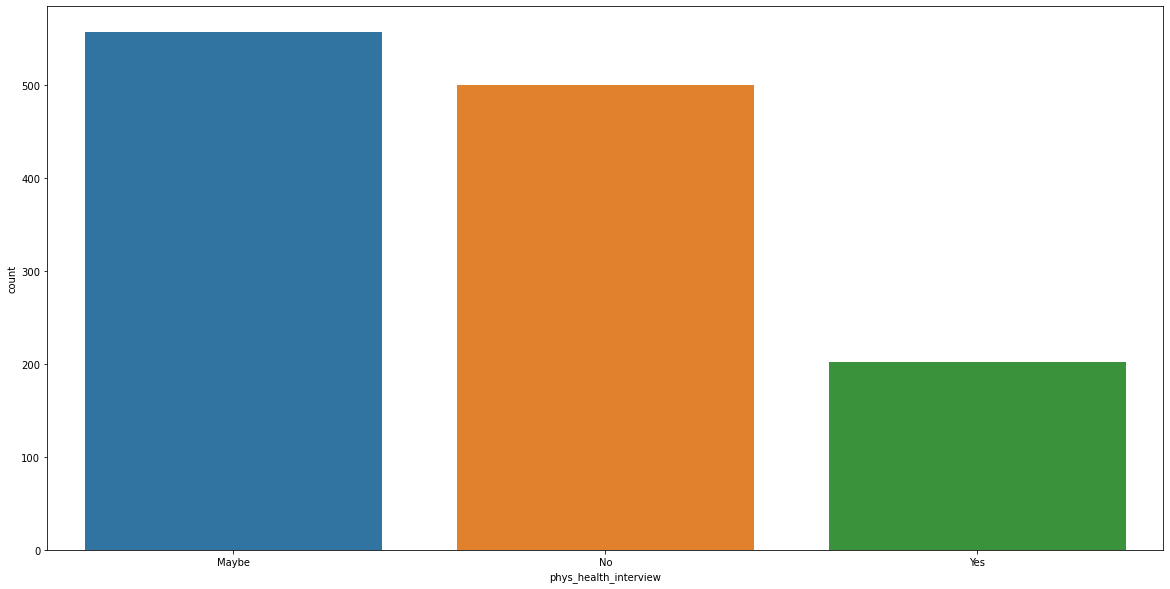

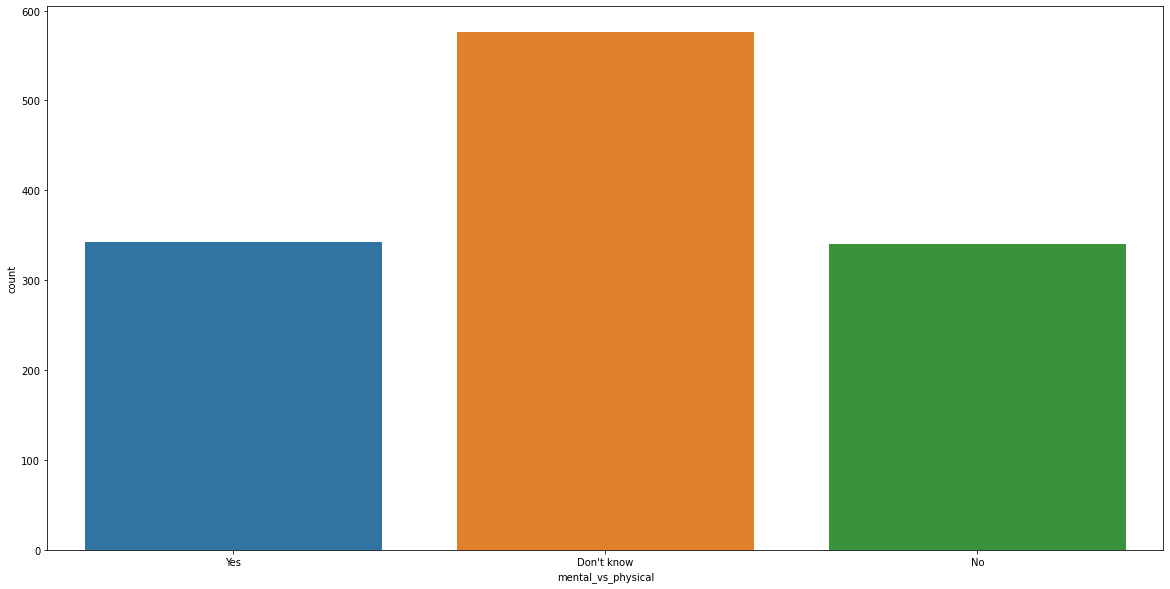

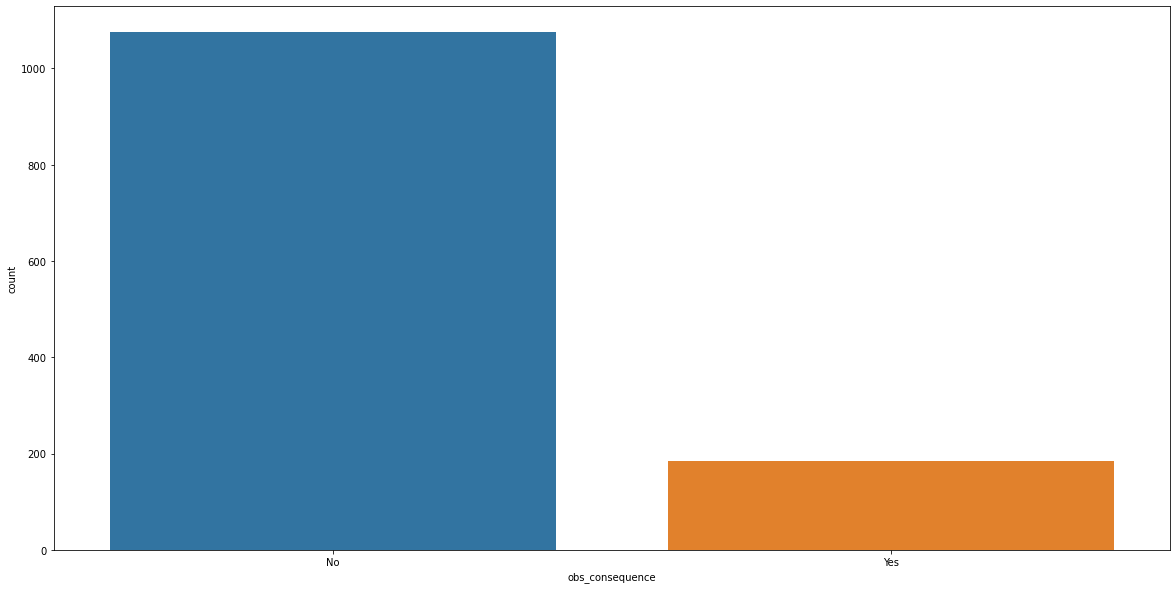

In [20]:
for i, col in enumerate(categoricals_columns.columns):
    plt.figure(i)
    plt.figure(figsize=(20,15))
    sns.countplot(x=col, data=categoricals_columns)

We now fill in missing values on the age column with the median of the available values

In [21]:
data['Age'].fillna(data['Age'].median(), inplace = True)
s = pd.Series(data['Age'])
s[s<18] = data['Age'].median()
data['Age'] = s
s = pd.Series(data['Age'])
s[s>120] = data['Age'].median()
data['Age'] = s
#Ranges of the ages
data['age_range'] = pd.cut(data['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

We now plot the distribution and density of the mental health in comparison to age using a distribution plot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

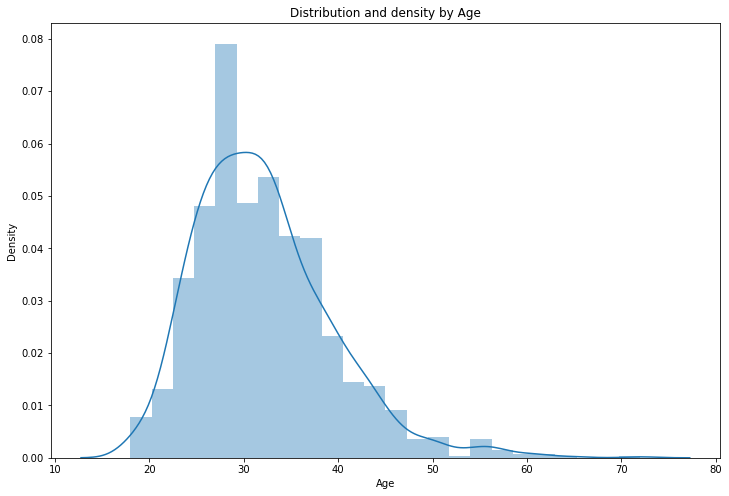

In [22]:
plt.figure(figsize=(12,8))
sns.distplot(data["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

According to the above, people between the ages 25 - 35 appear to be affected by mental health issues. 

People between the ages 18 - 30, there appears to be a steady rise in mental health issues.

People between the ages 38-70, there appears to be a decline in mental health issues.

People aged between 60 - 80 have little to no mental health issue.

It is clear that that people aged between 25 - 35 are suffering from mental health issues caused by various factors.

Text(0.5, 0, 'Age')

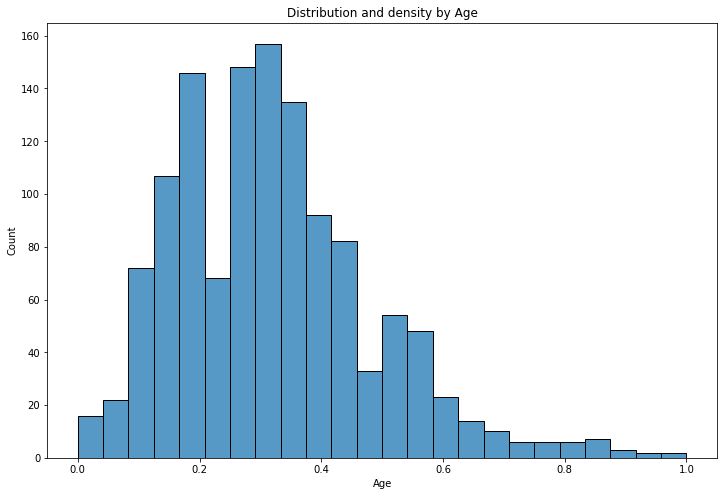

In [79]:
plt.figure(figsize=(12,8))
sns.histplot(data["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (1259).

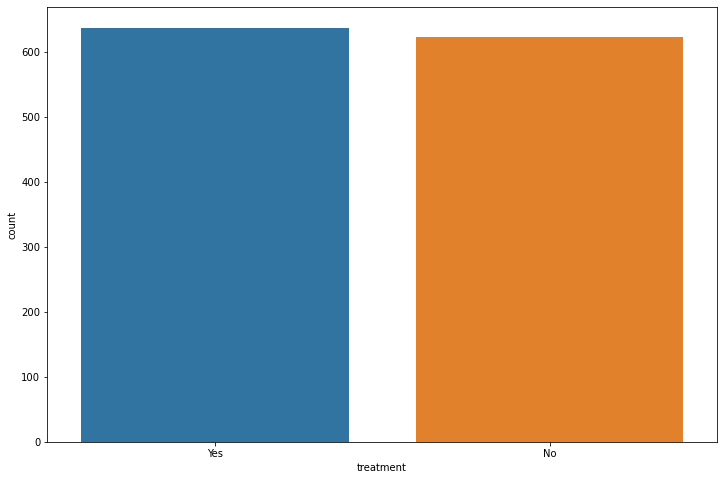

In [25]:
plt.figure(figsize=(12,8))
labels = data['Gender']
treat = sns.countplot(x="treatment", data=data)
treat.set_xticklabels(labels)
plt.title('Total Distribution by treated or not')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


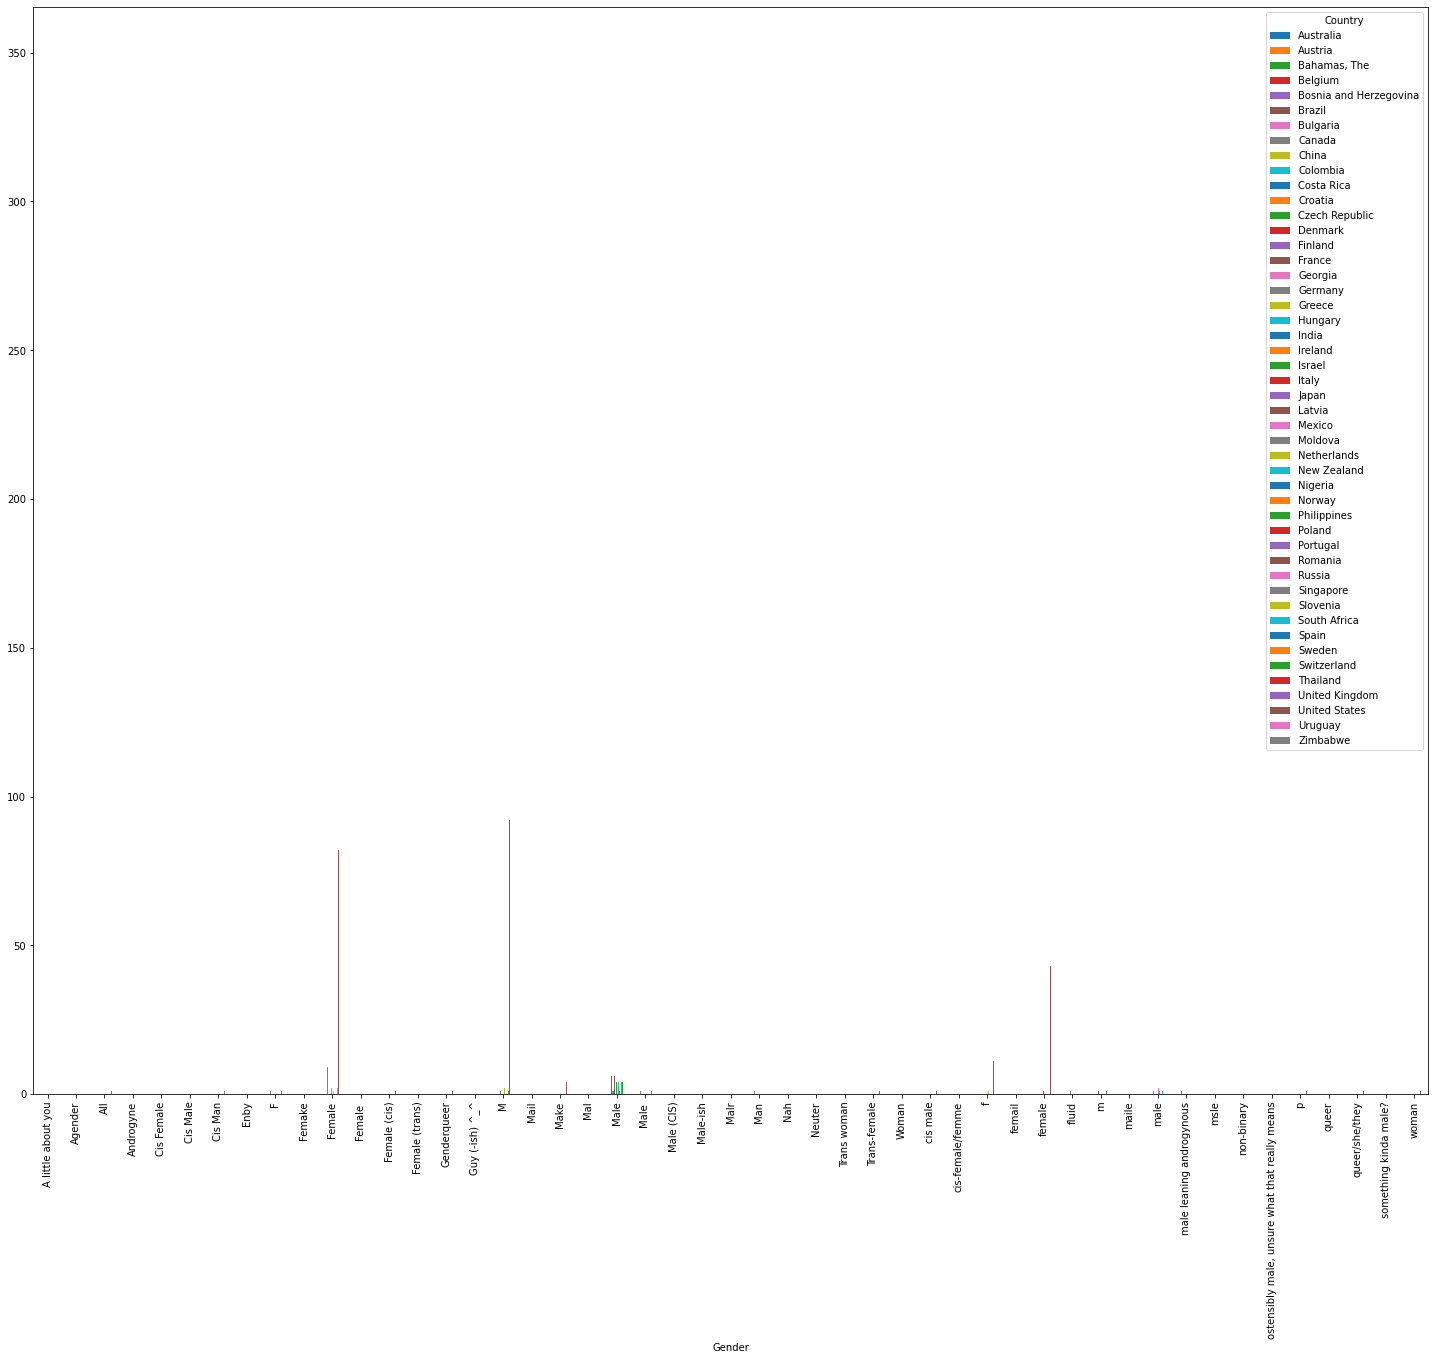

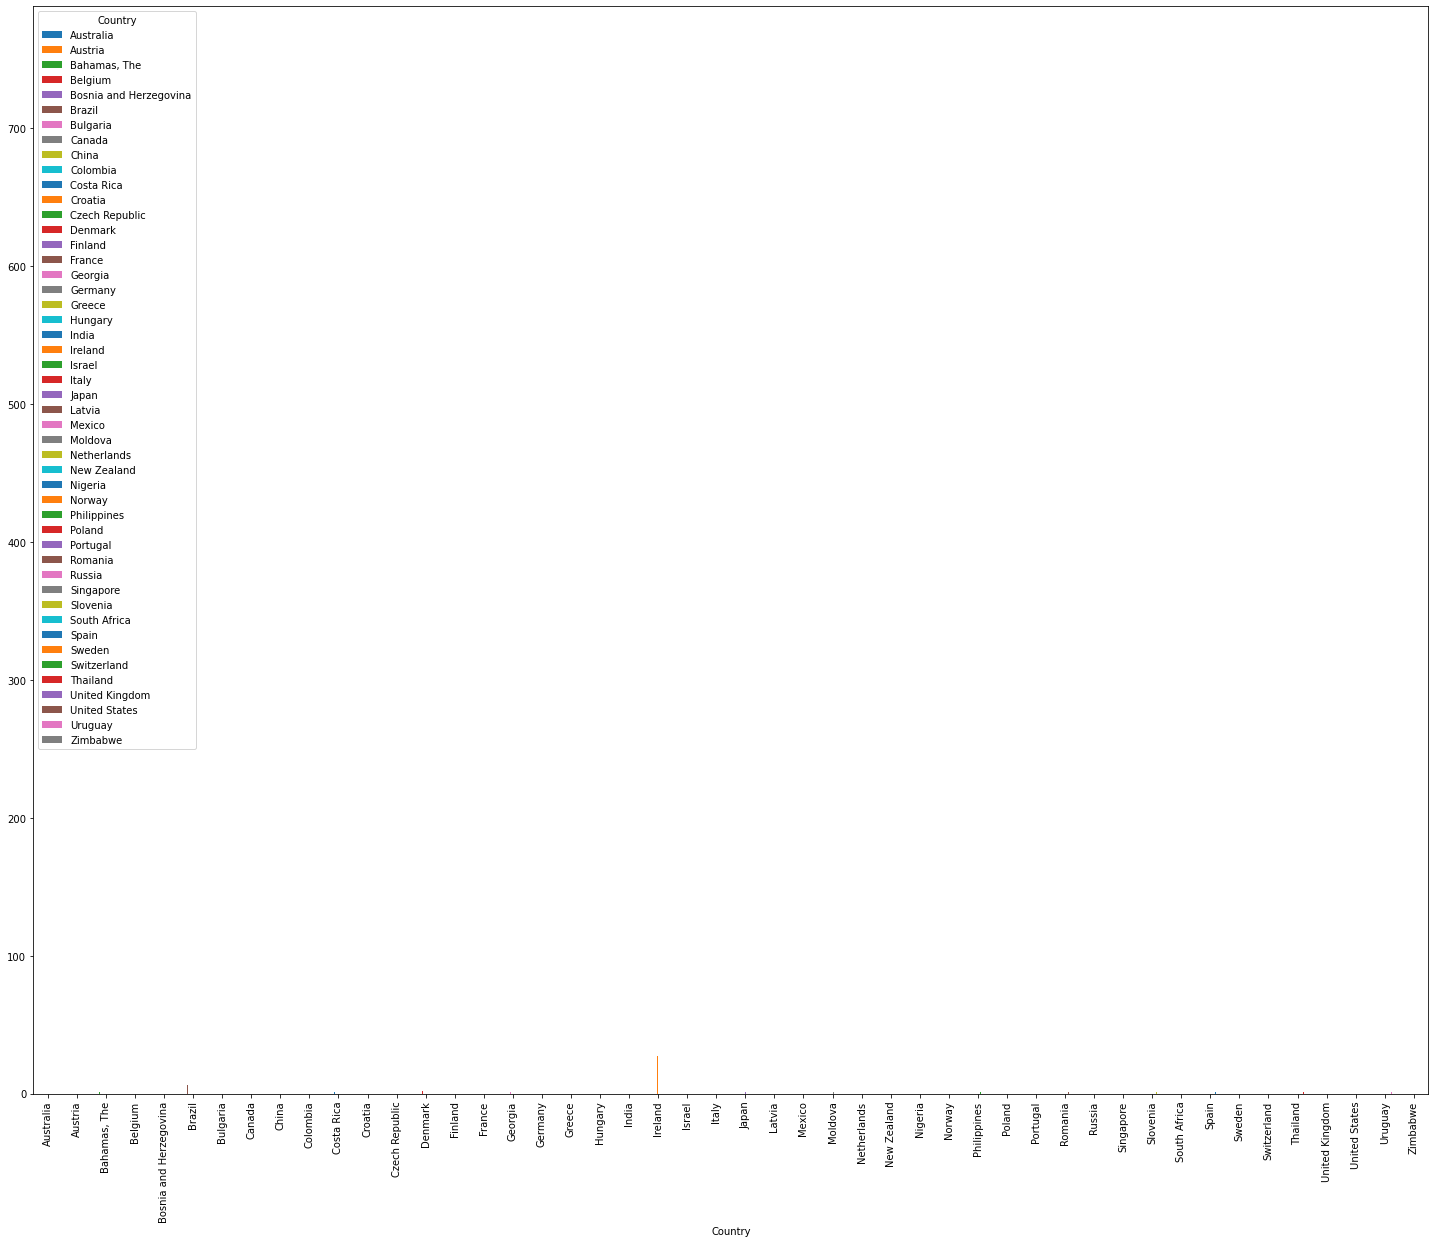

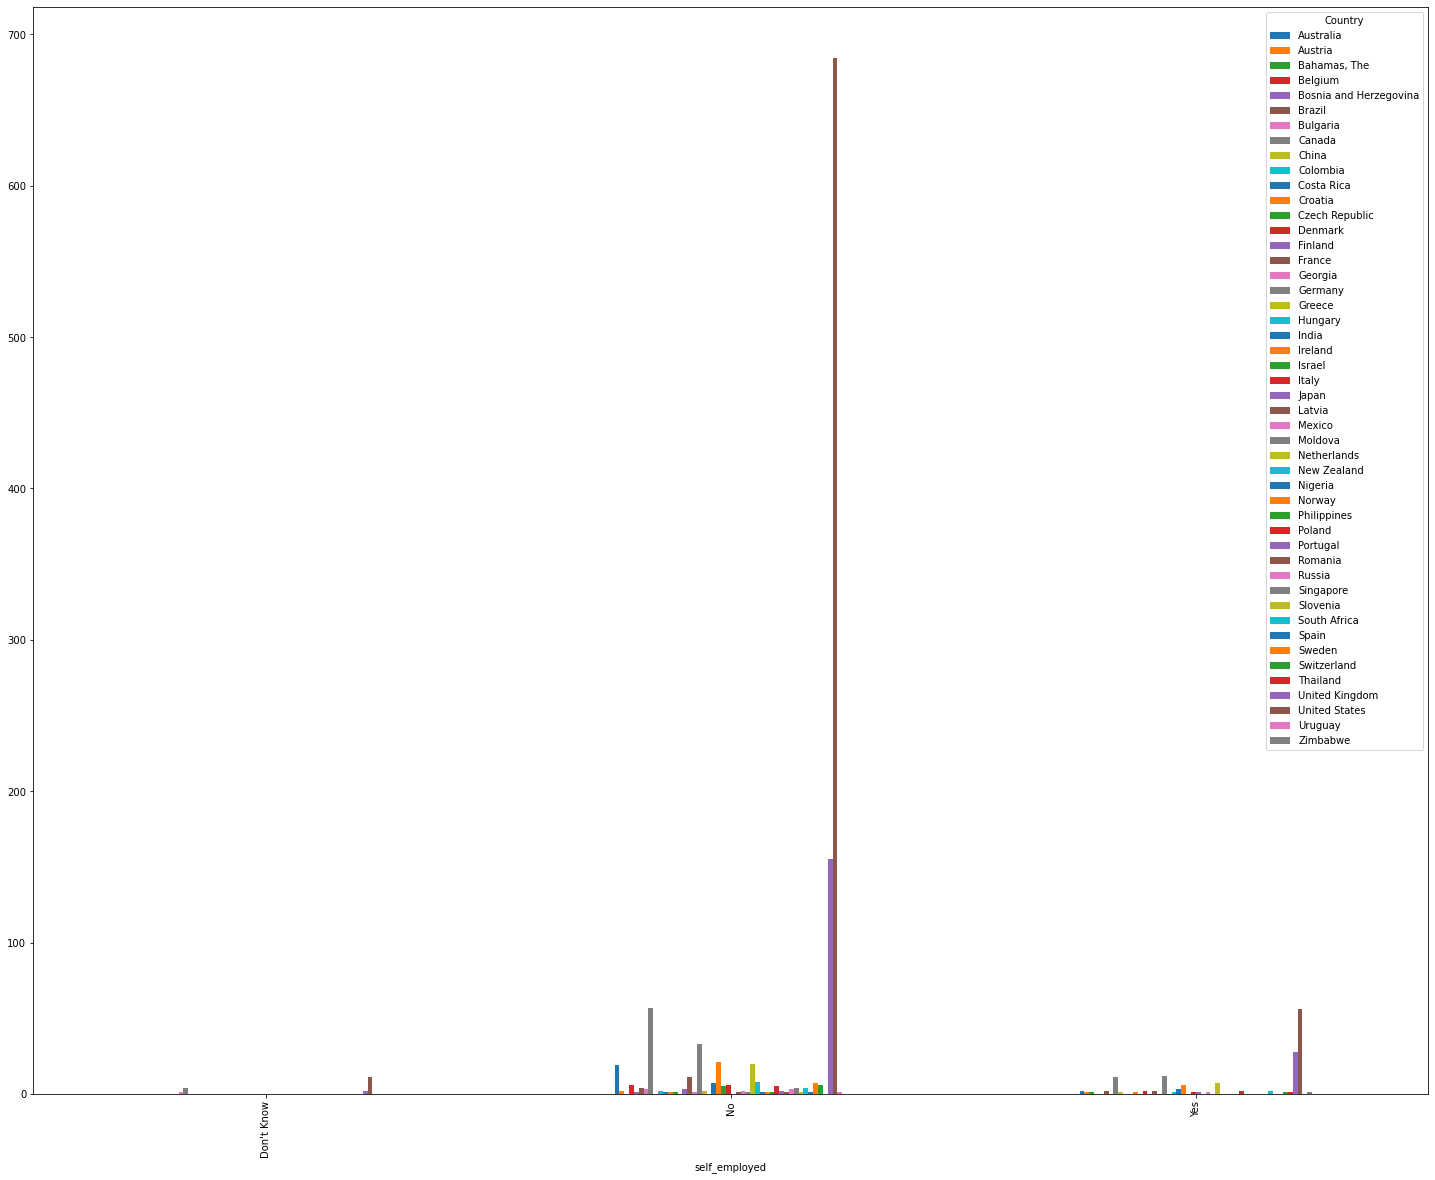

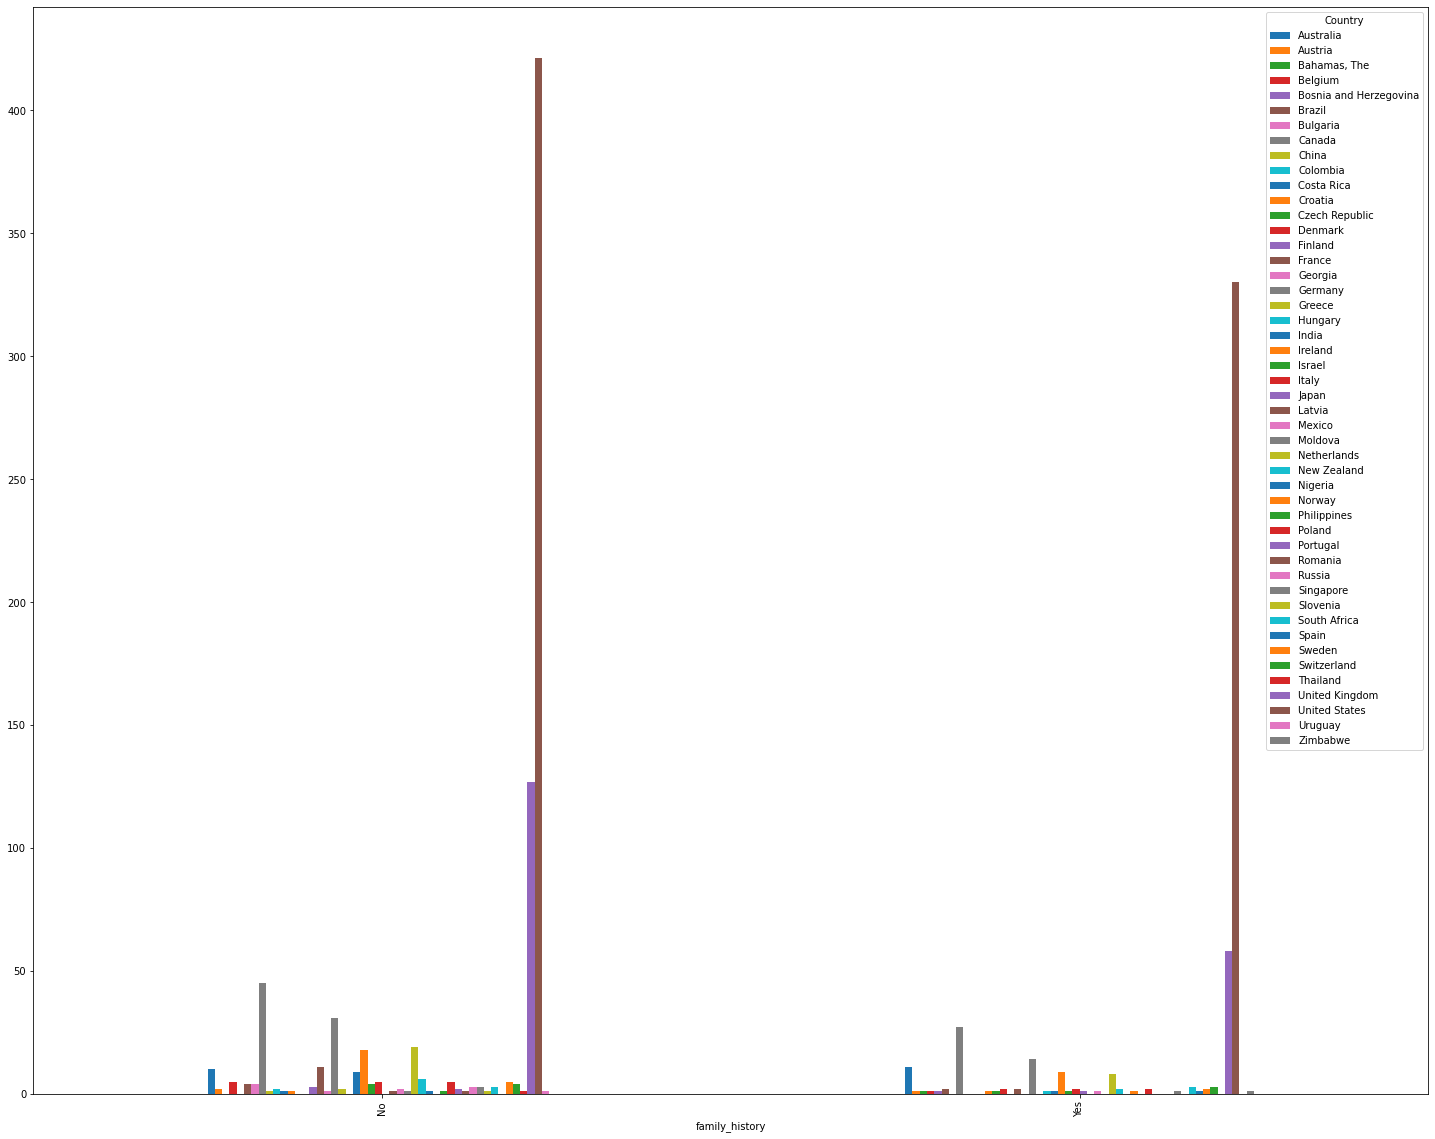

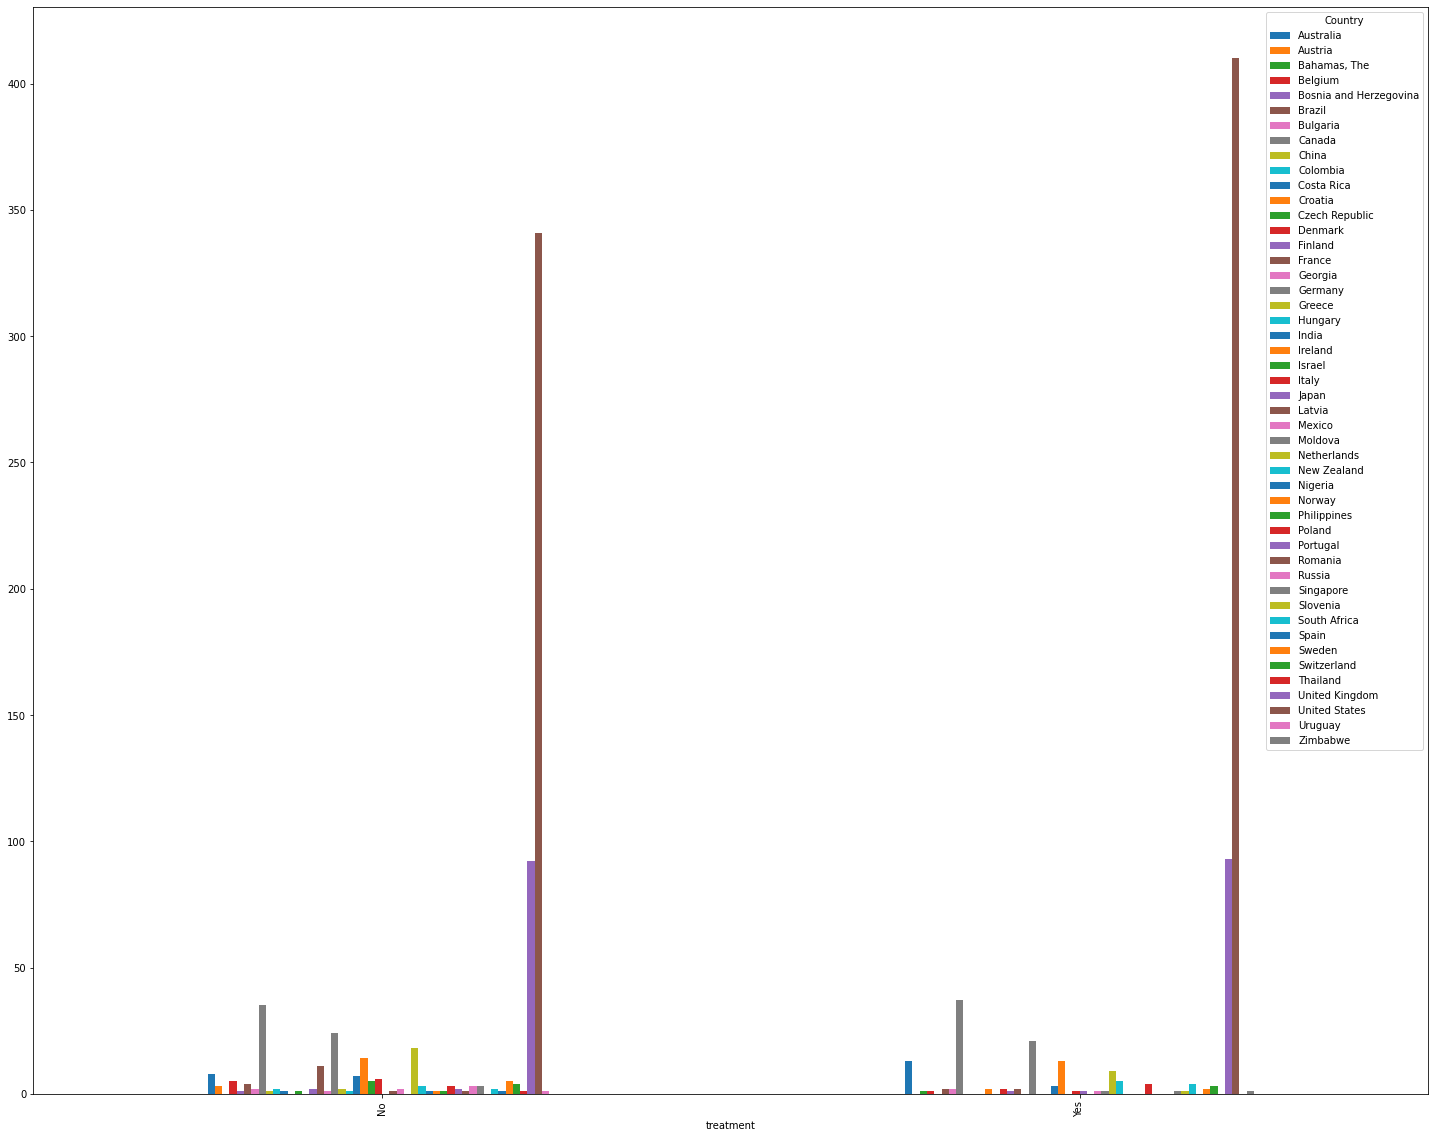

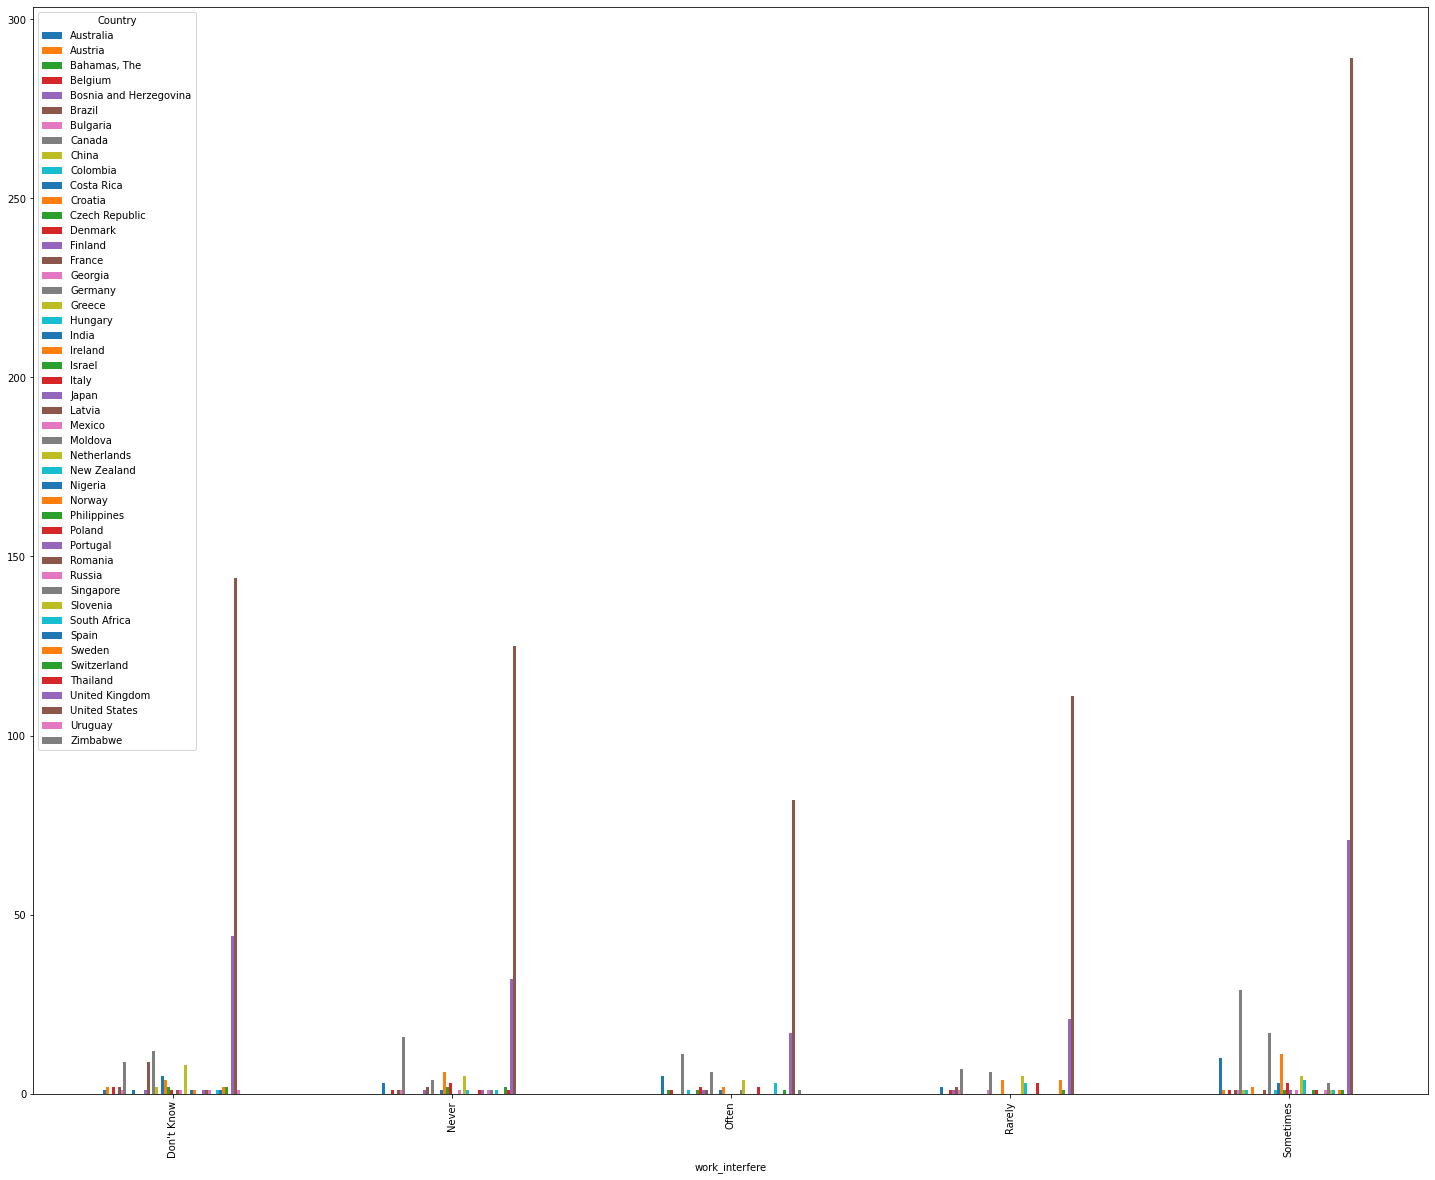

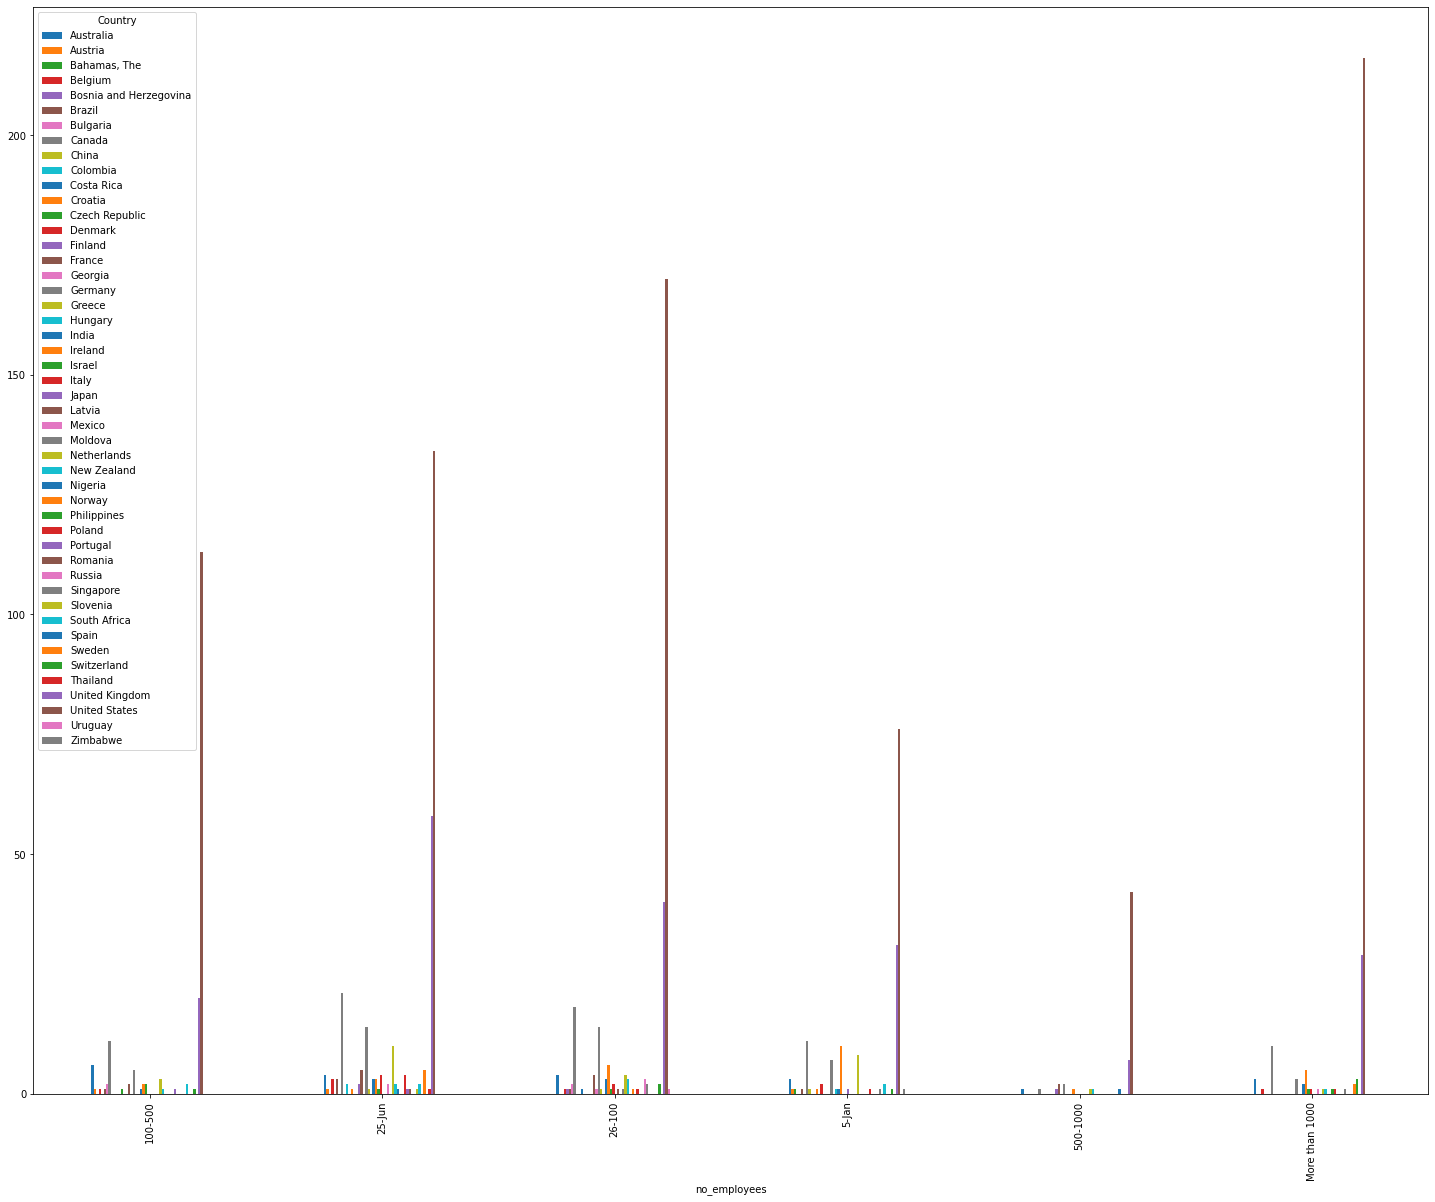

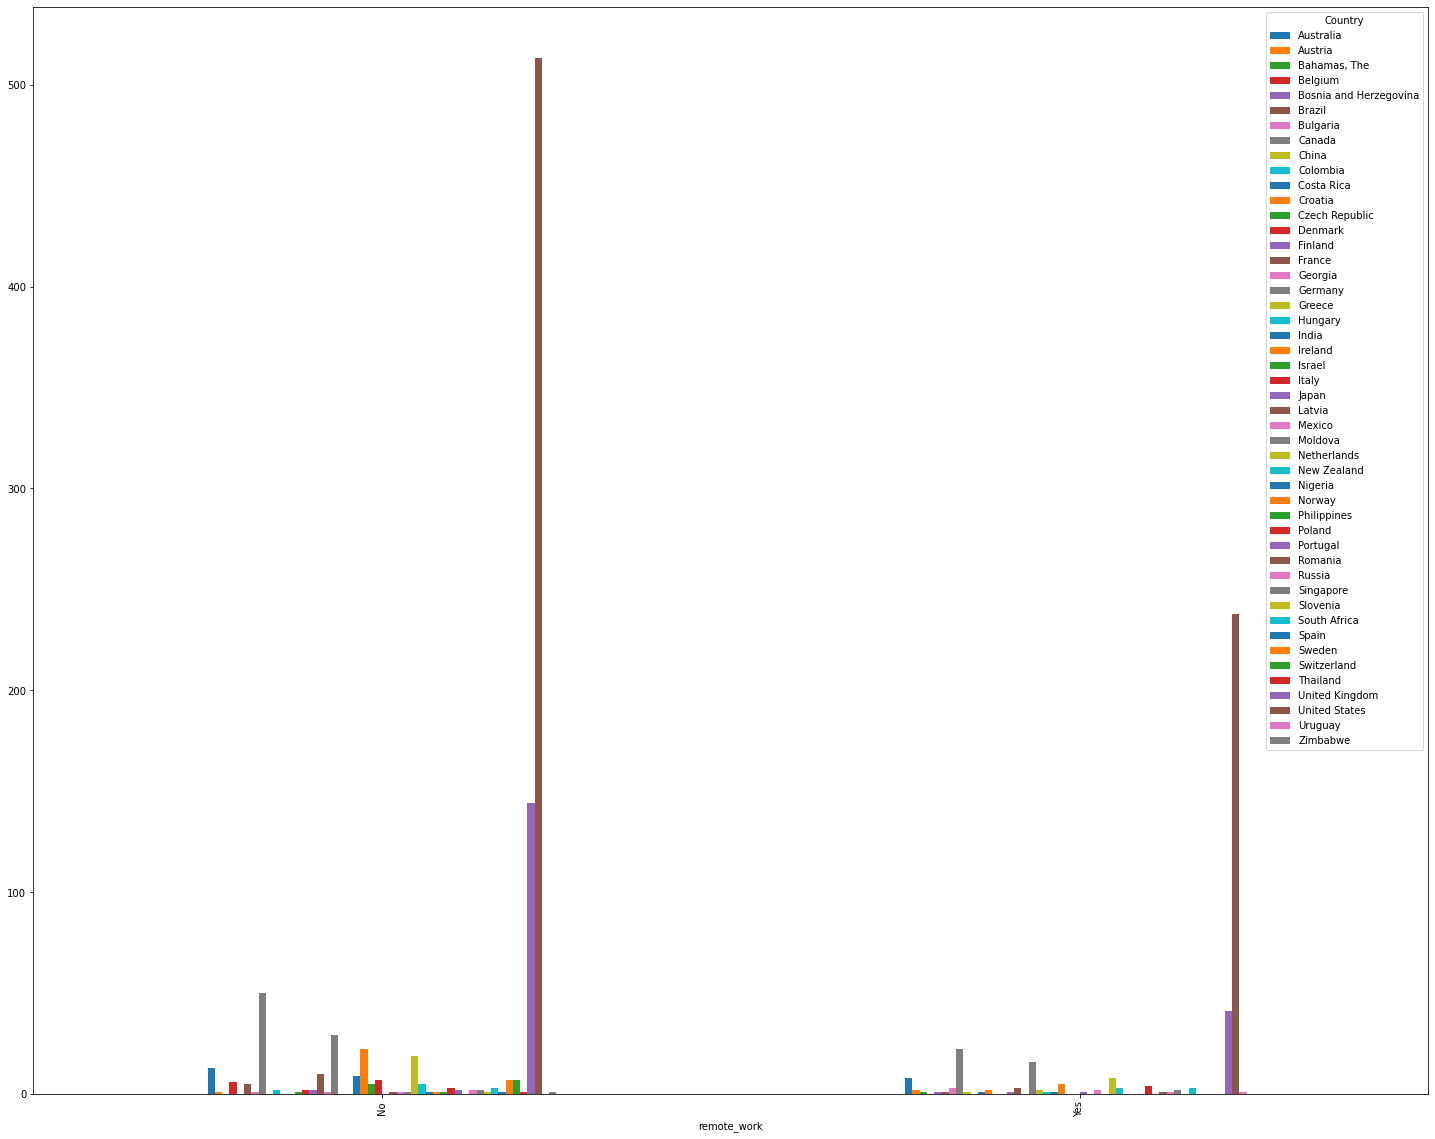

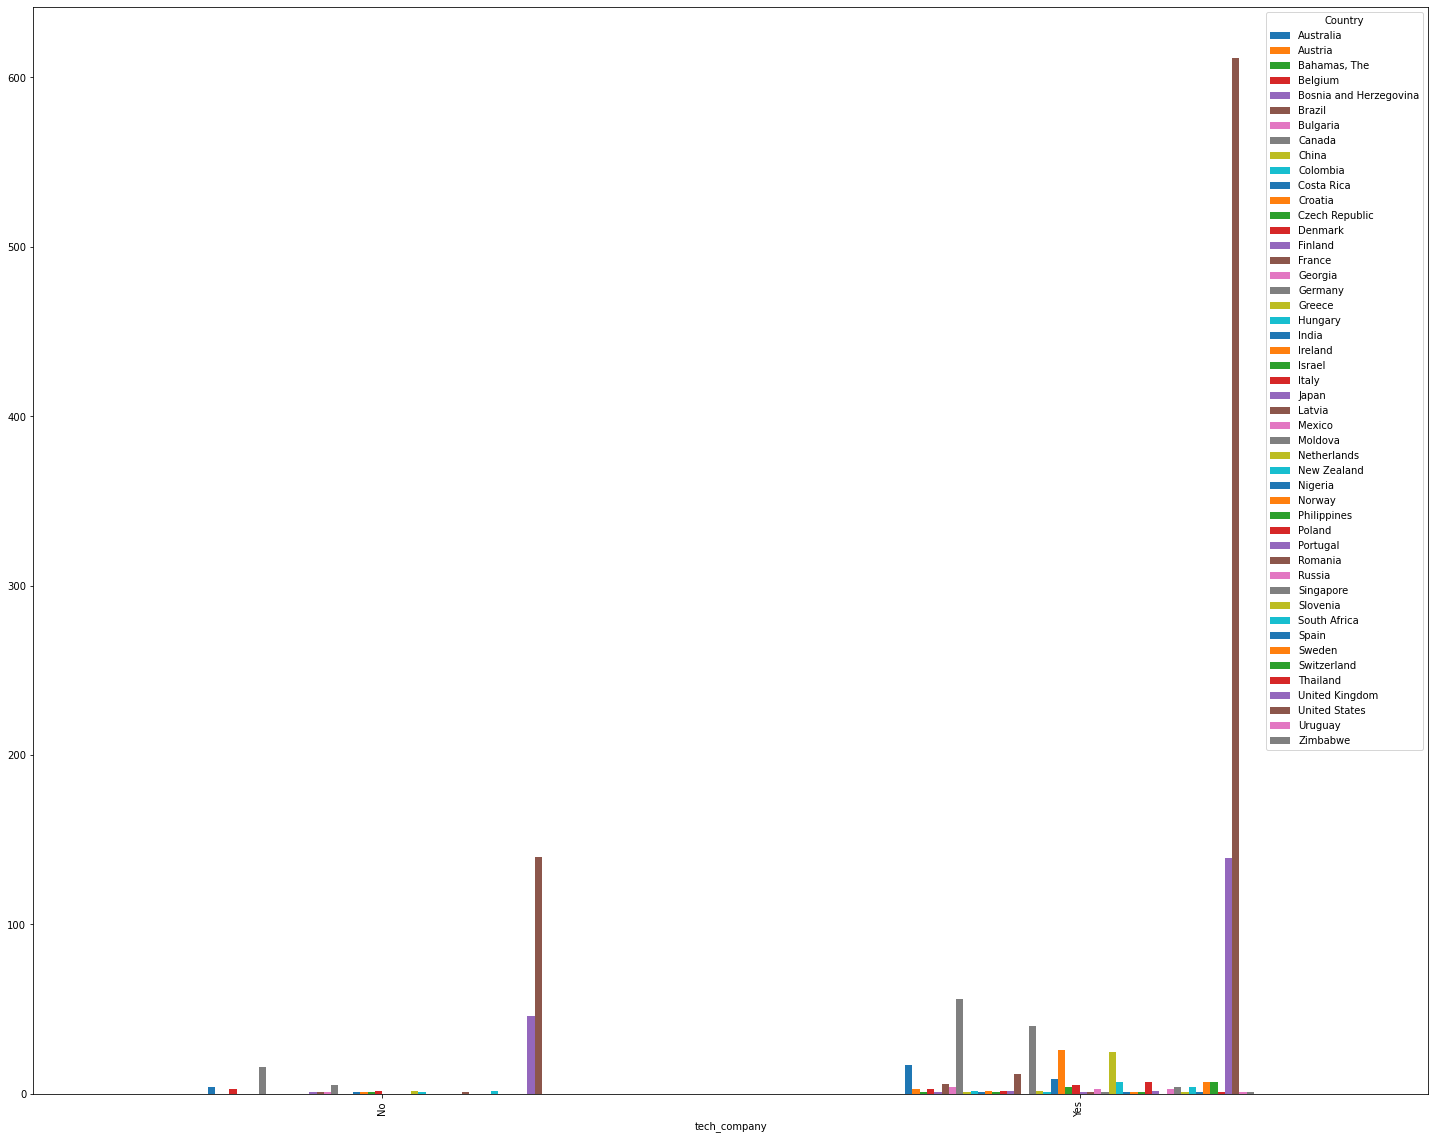

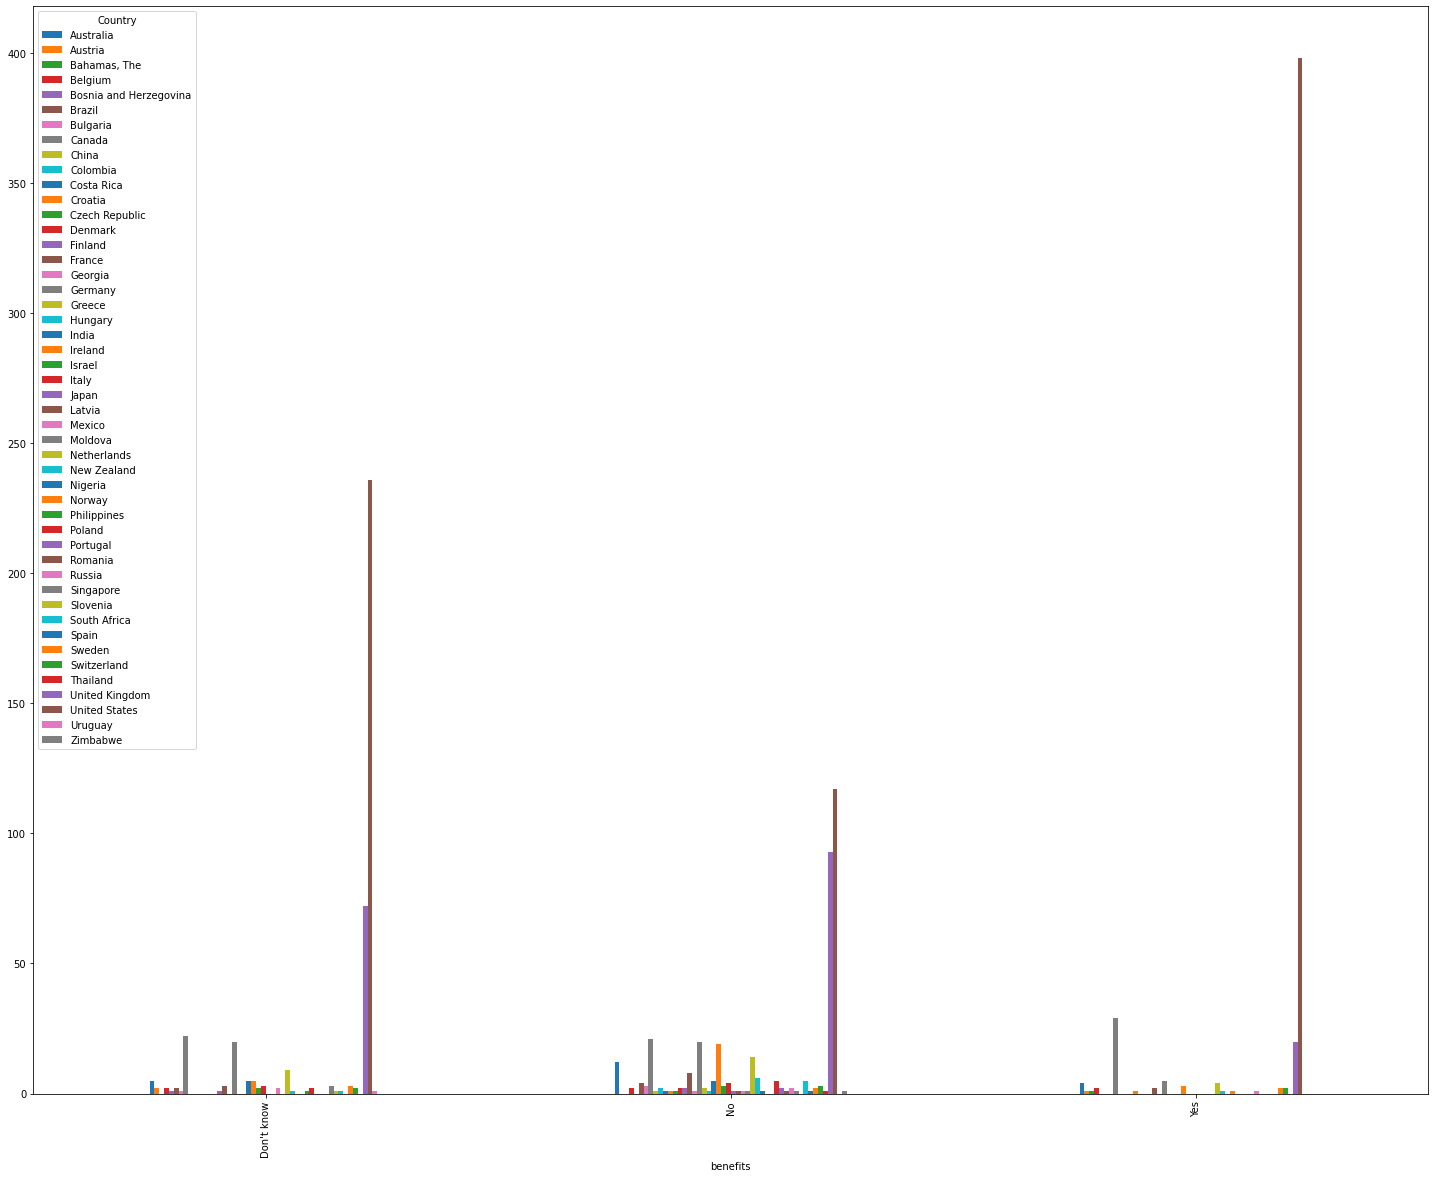

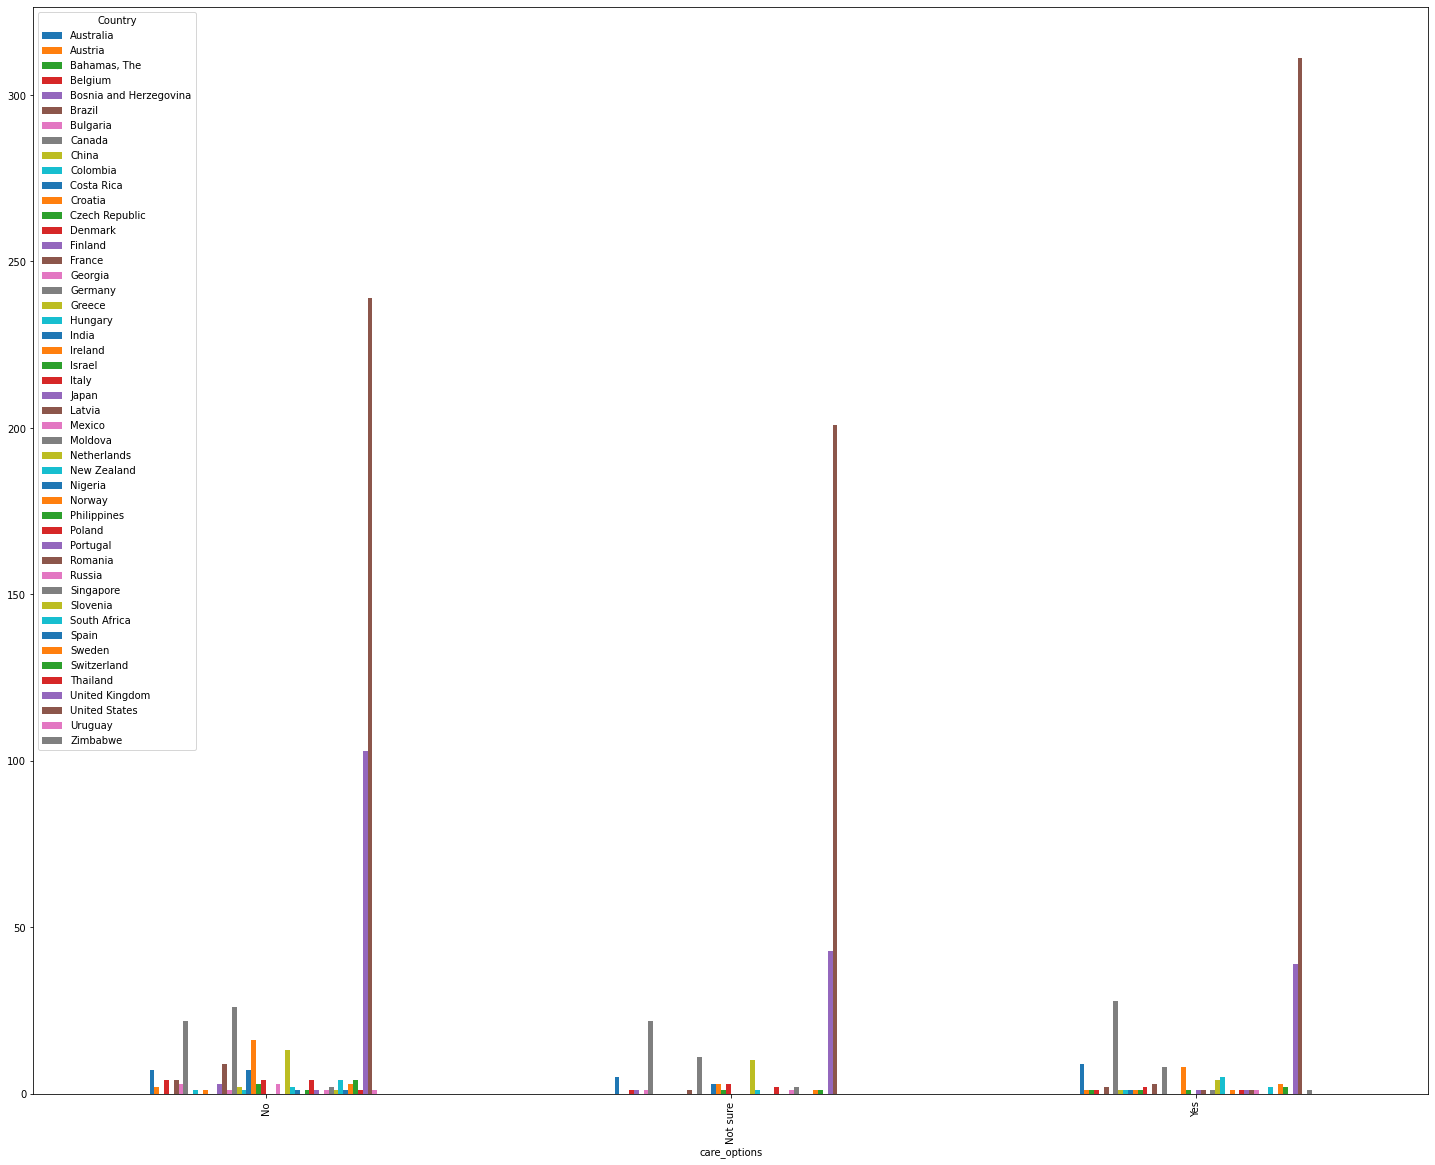

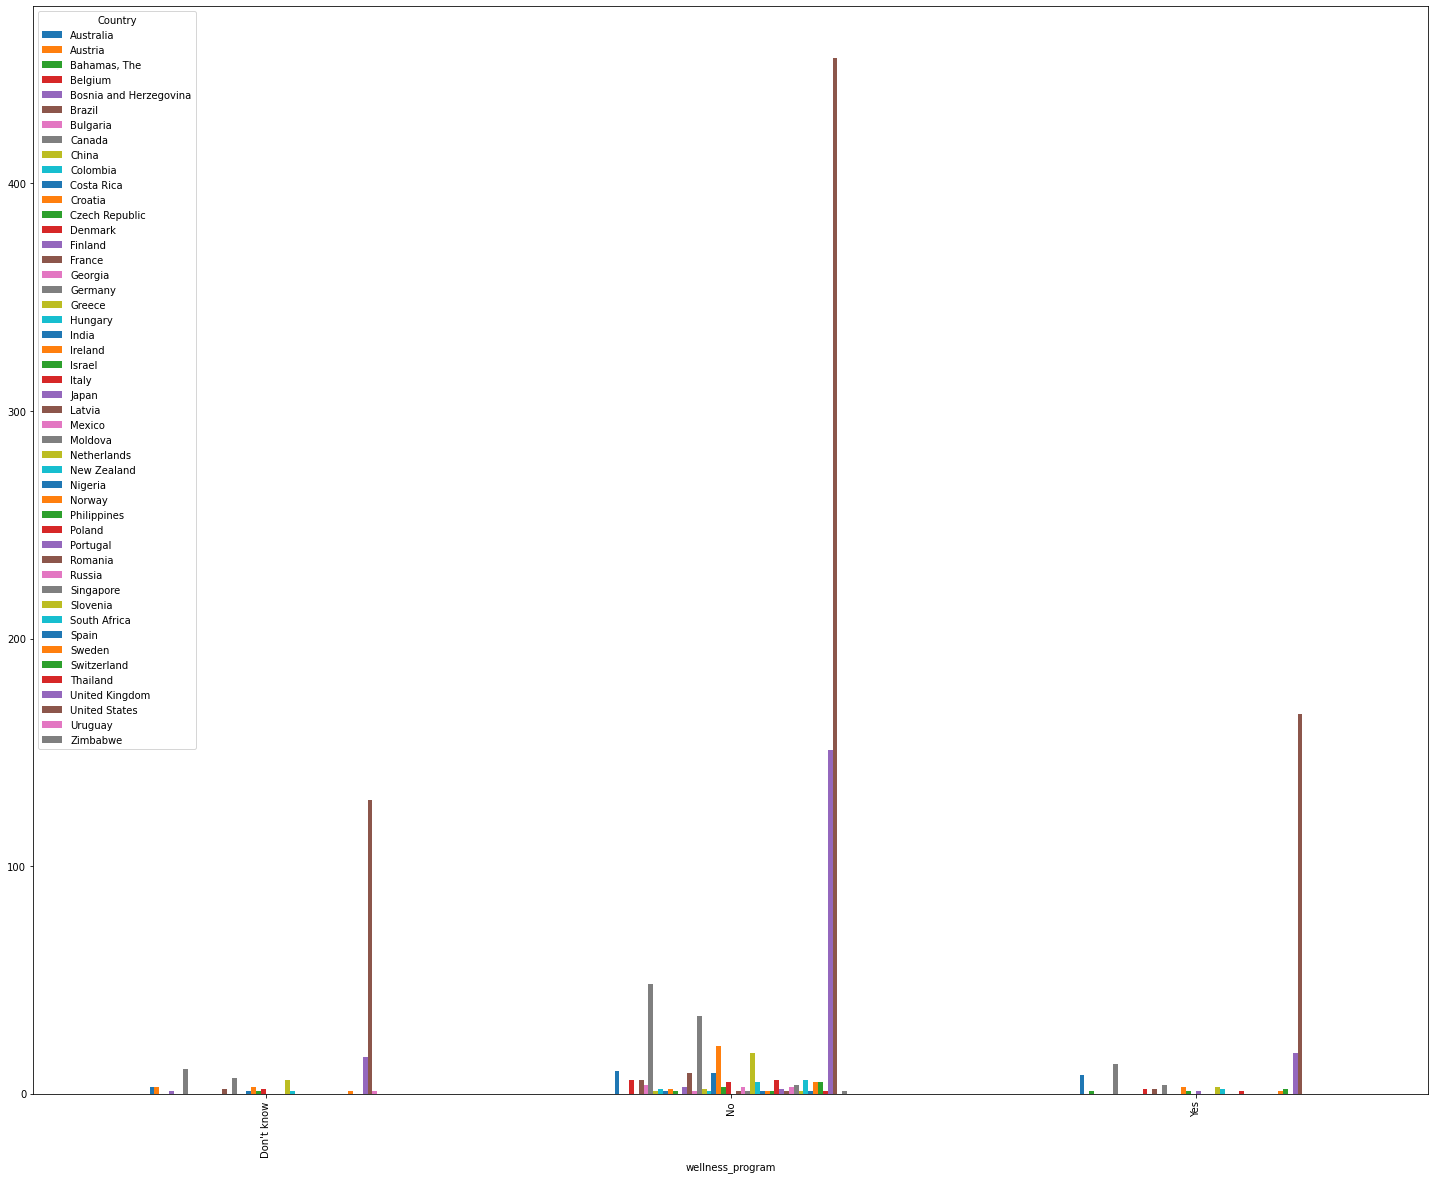

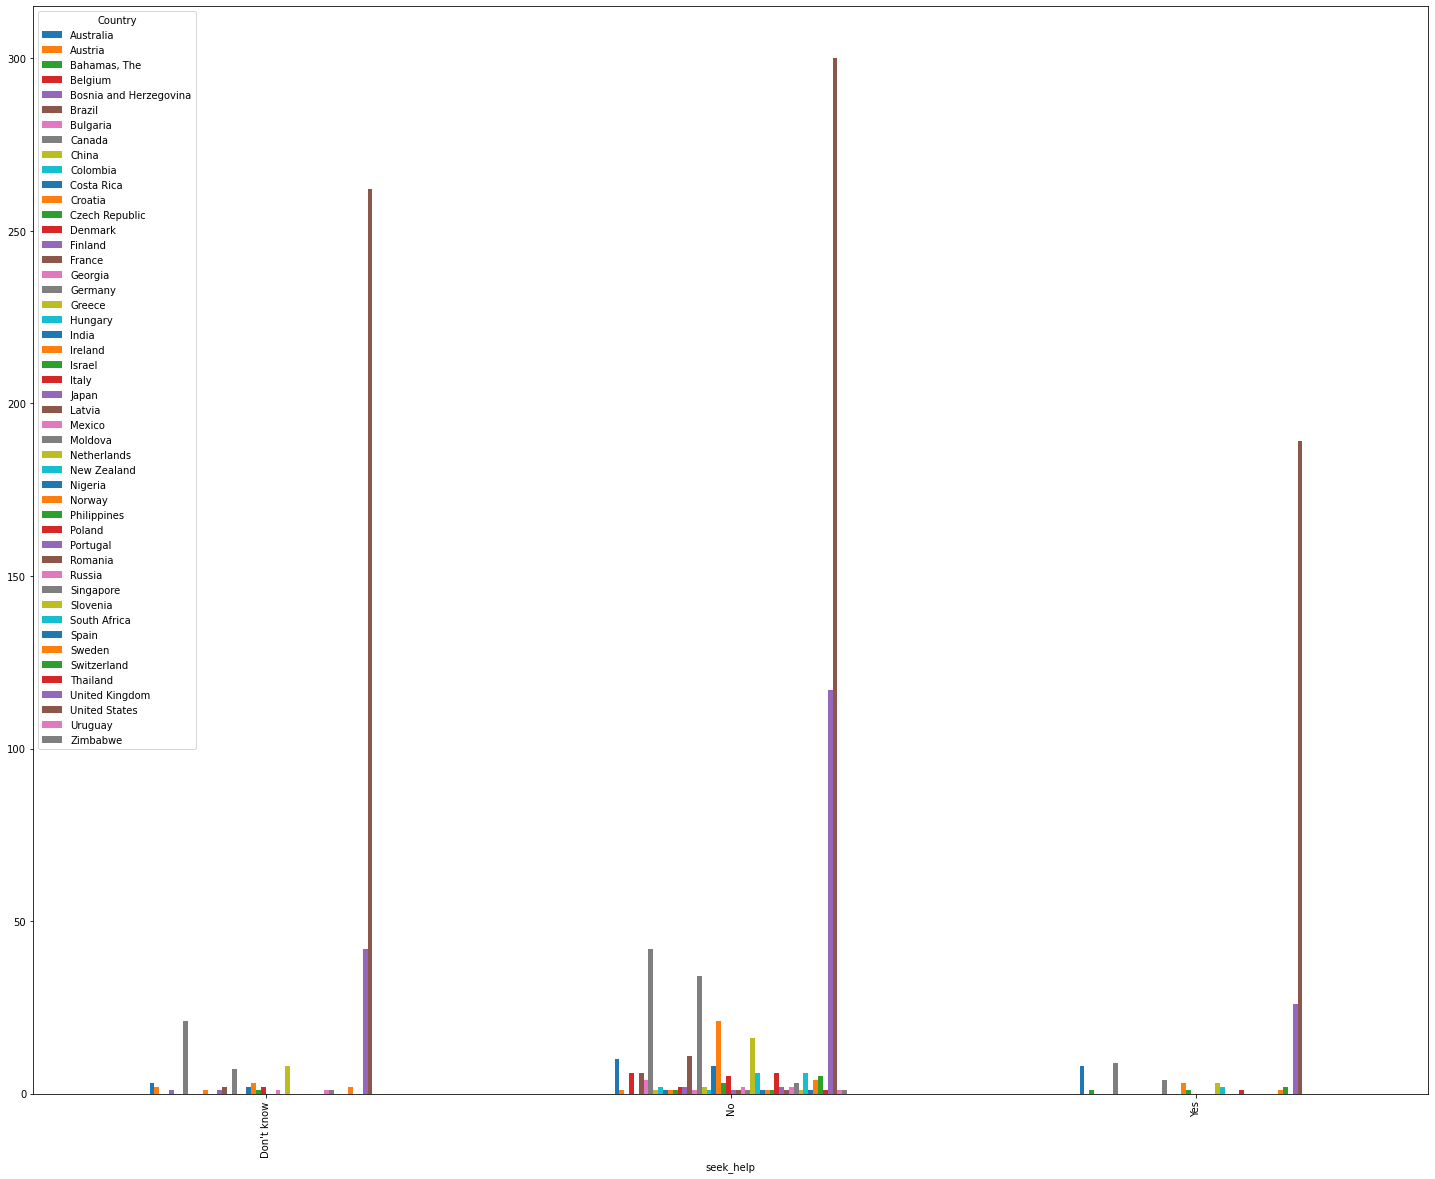

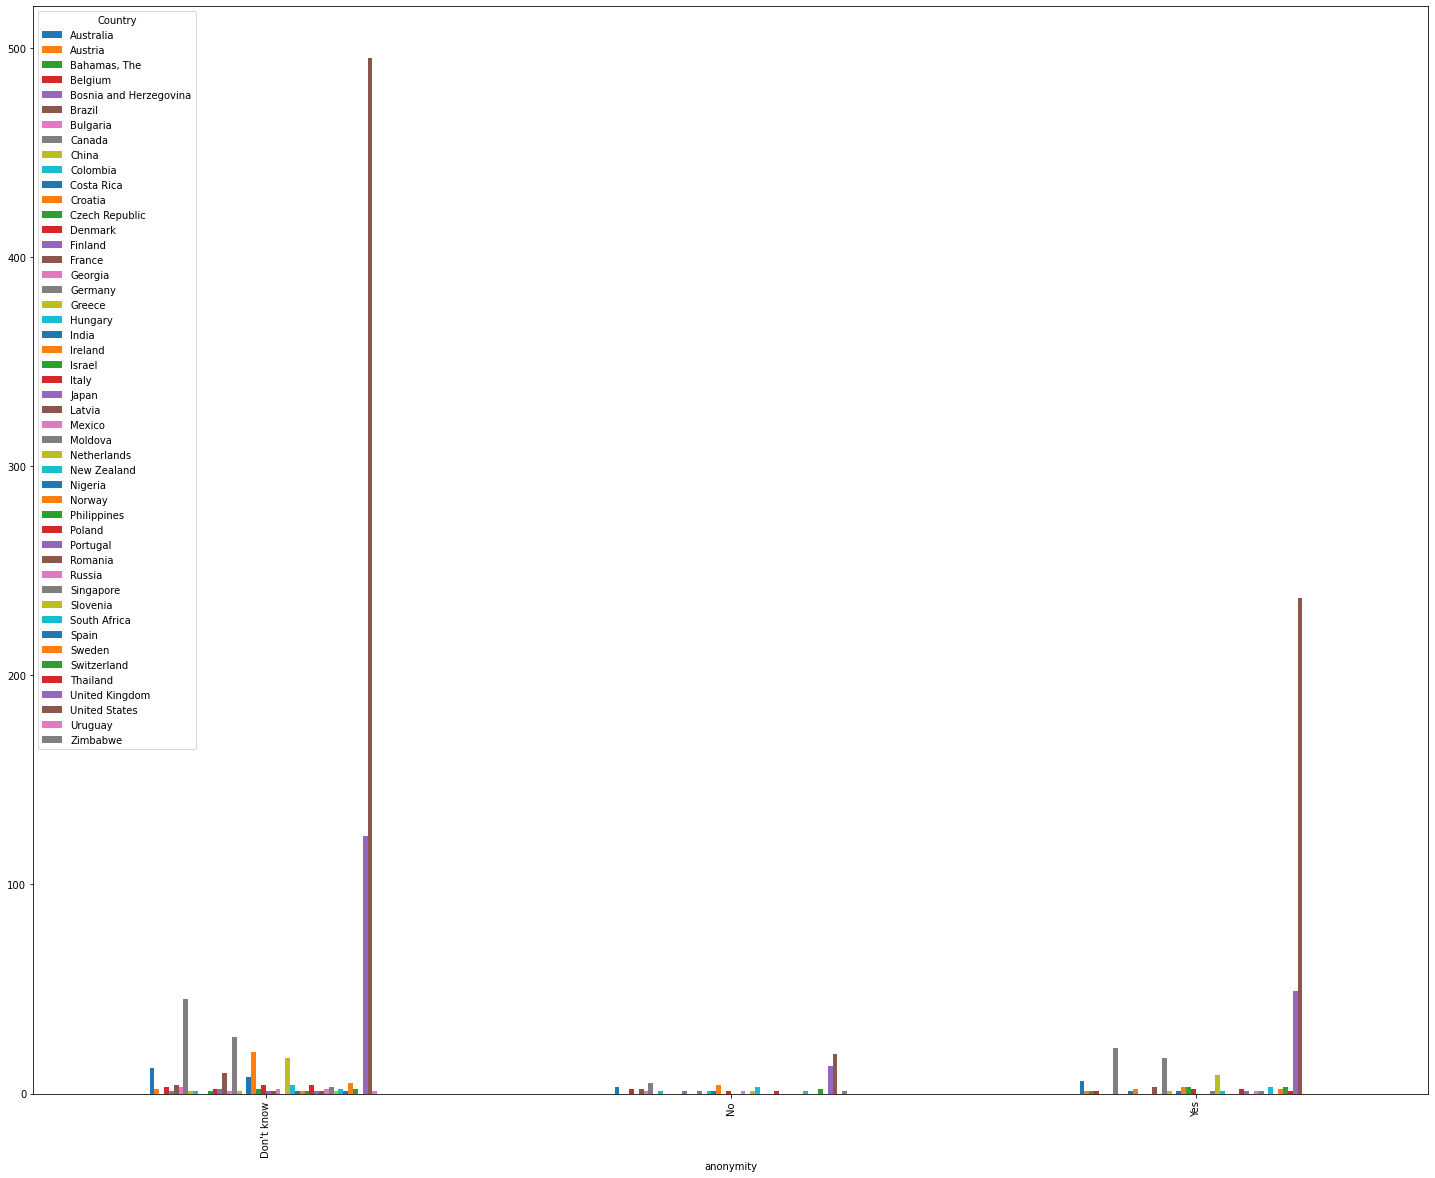

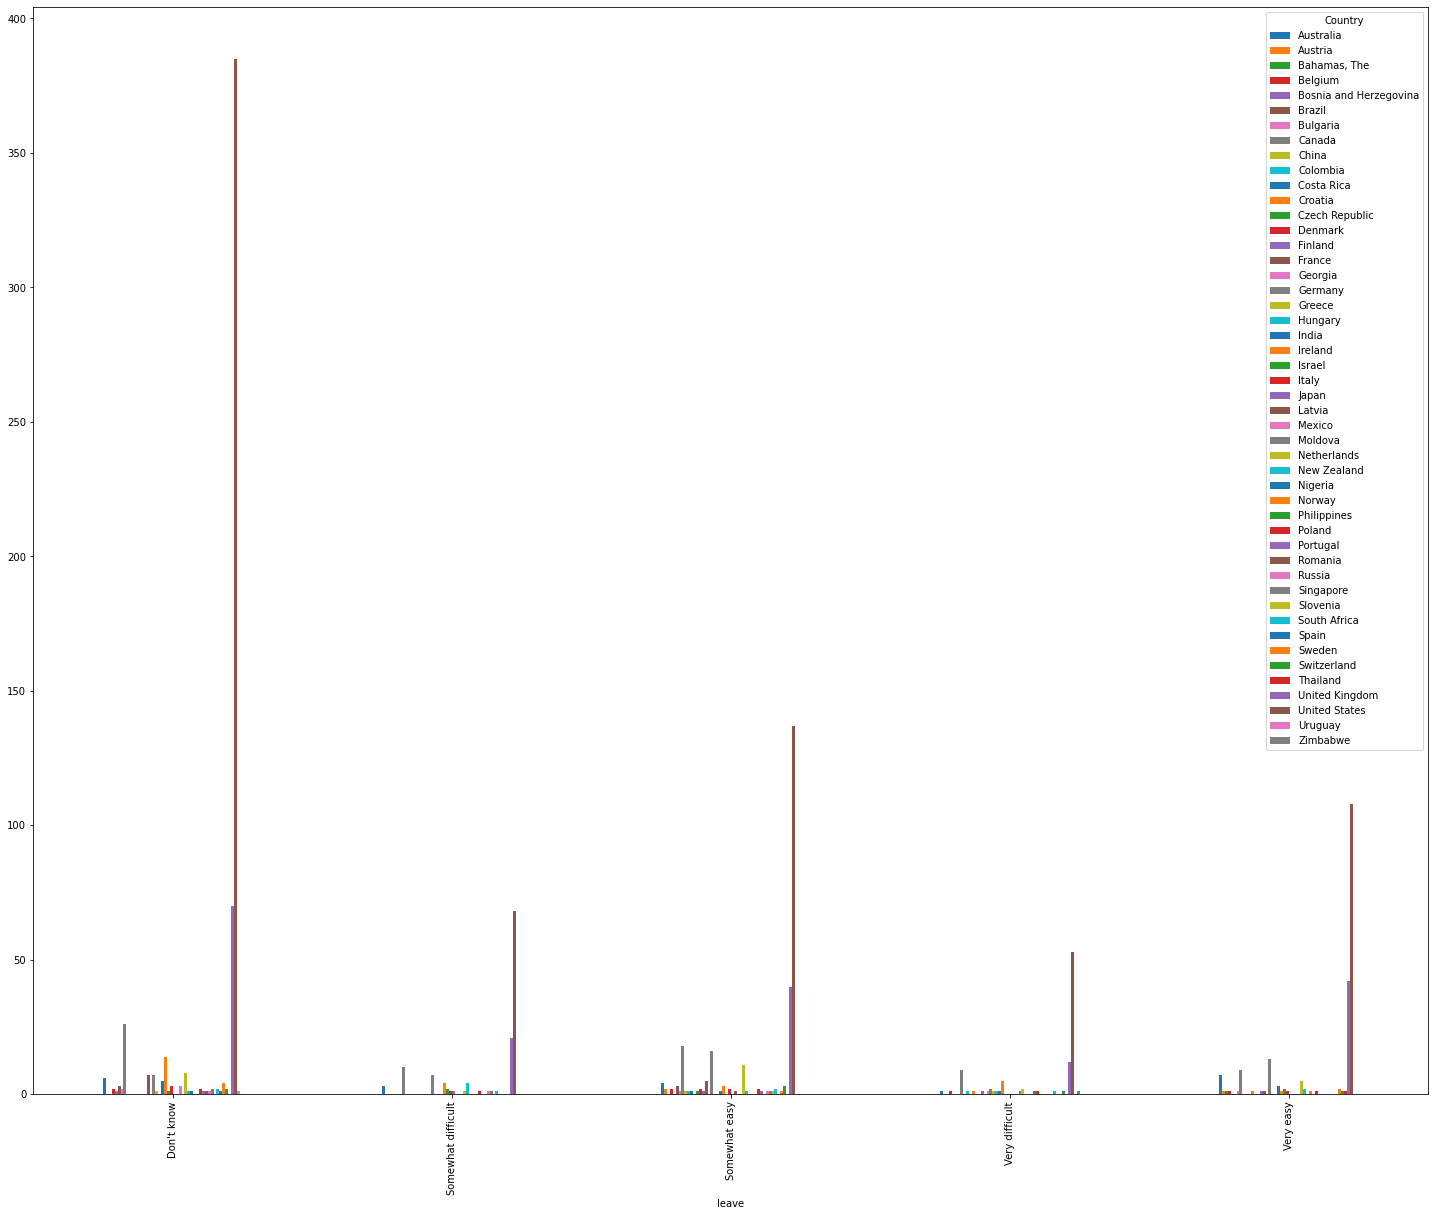

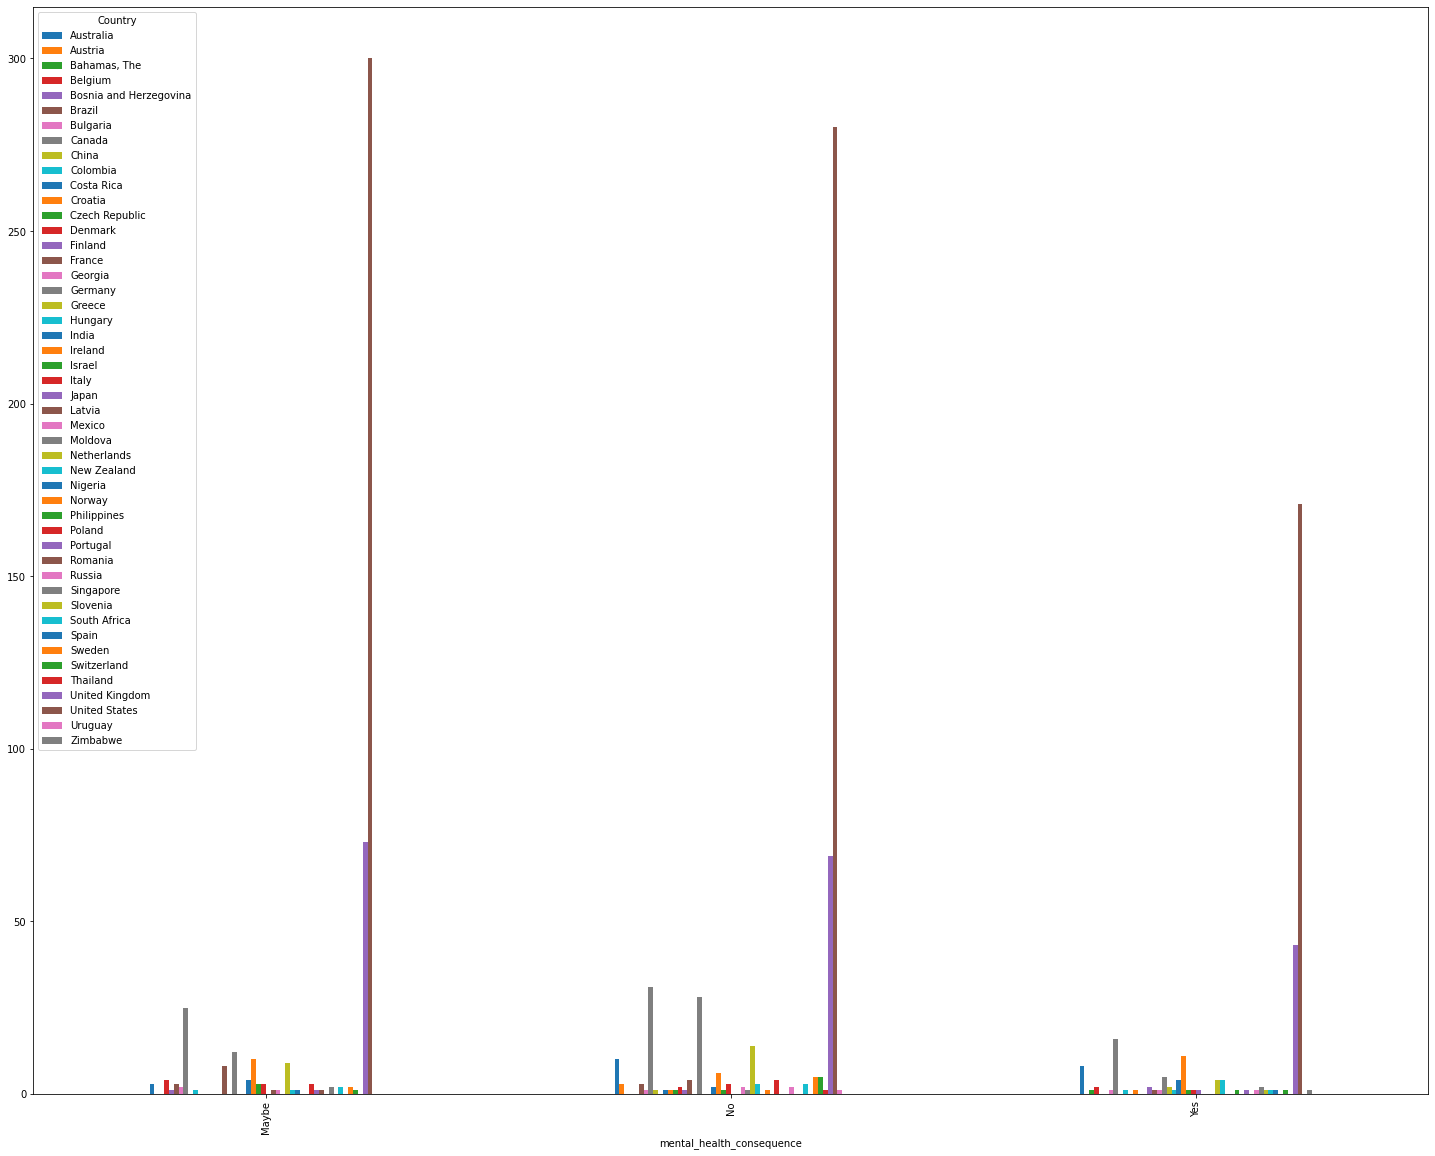

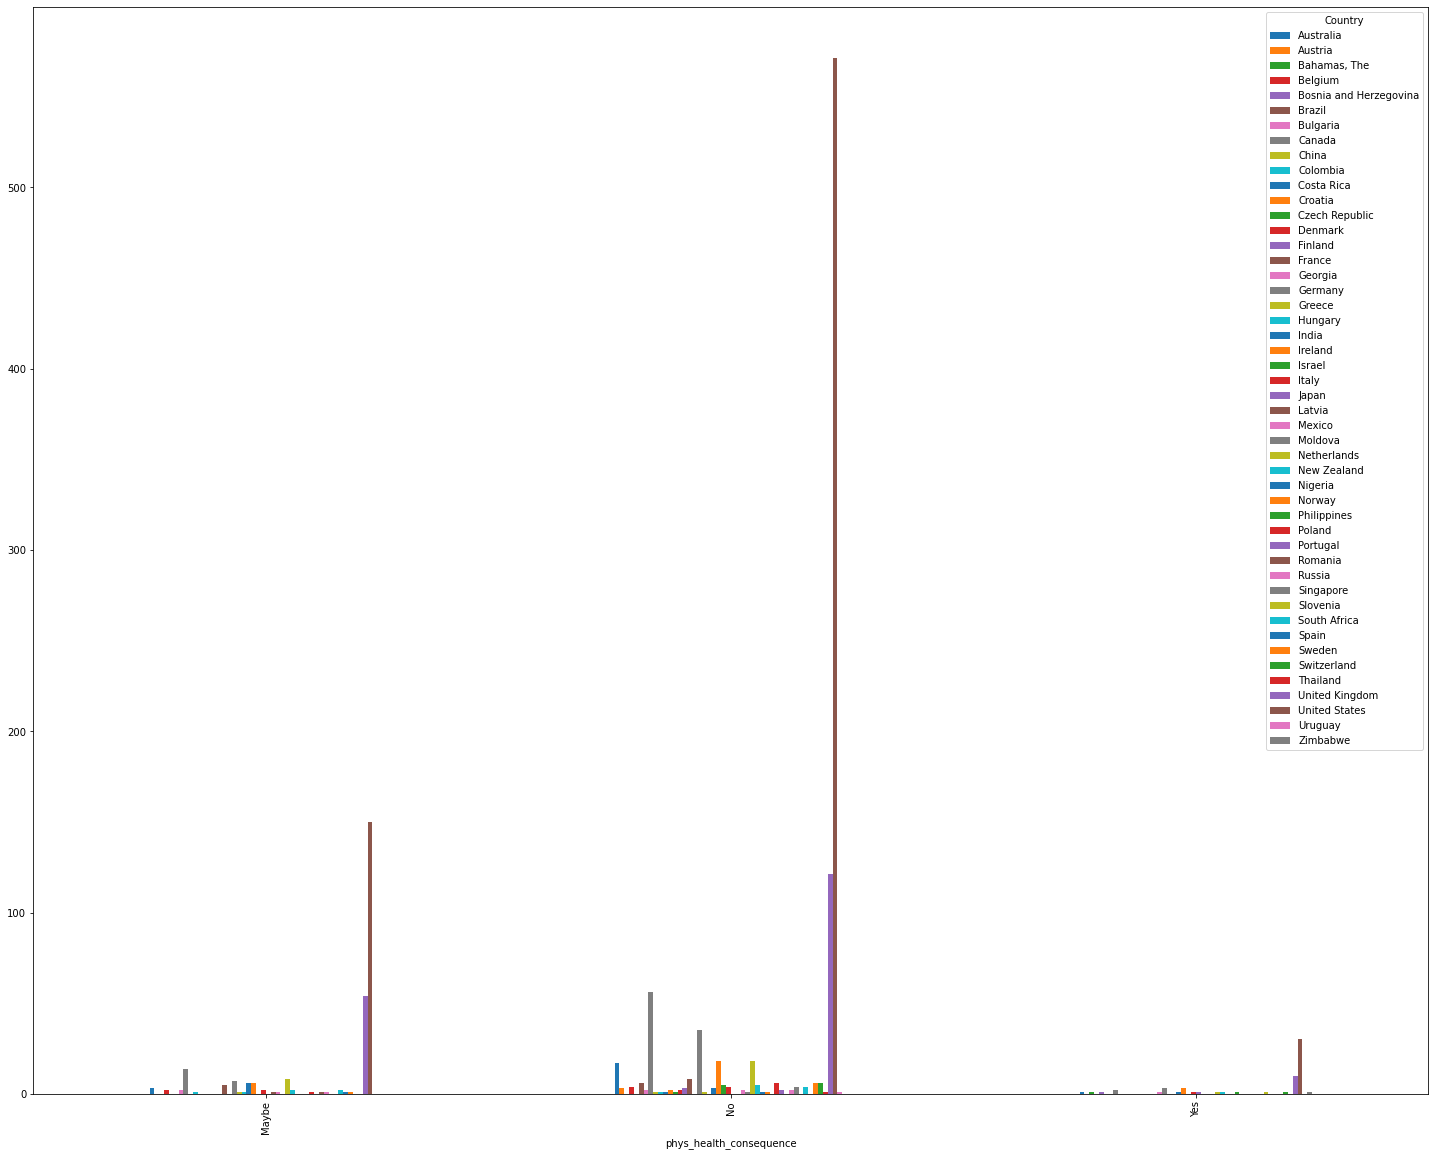

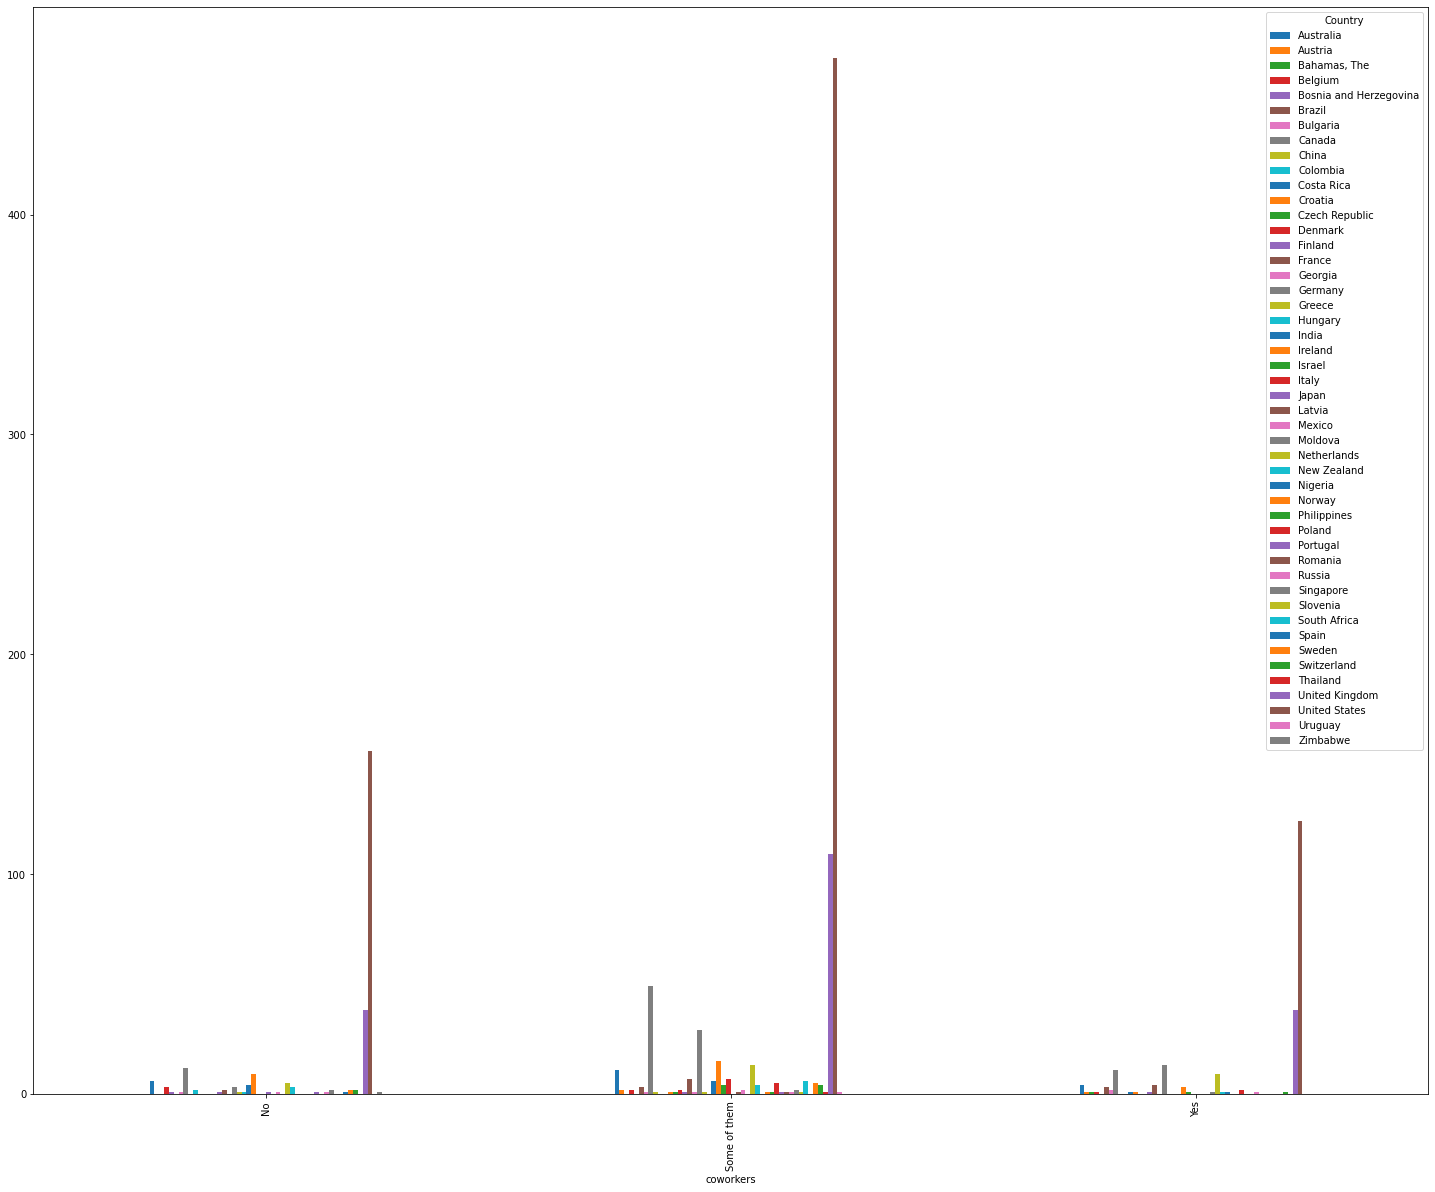

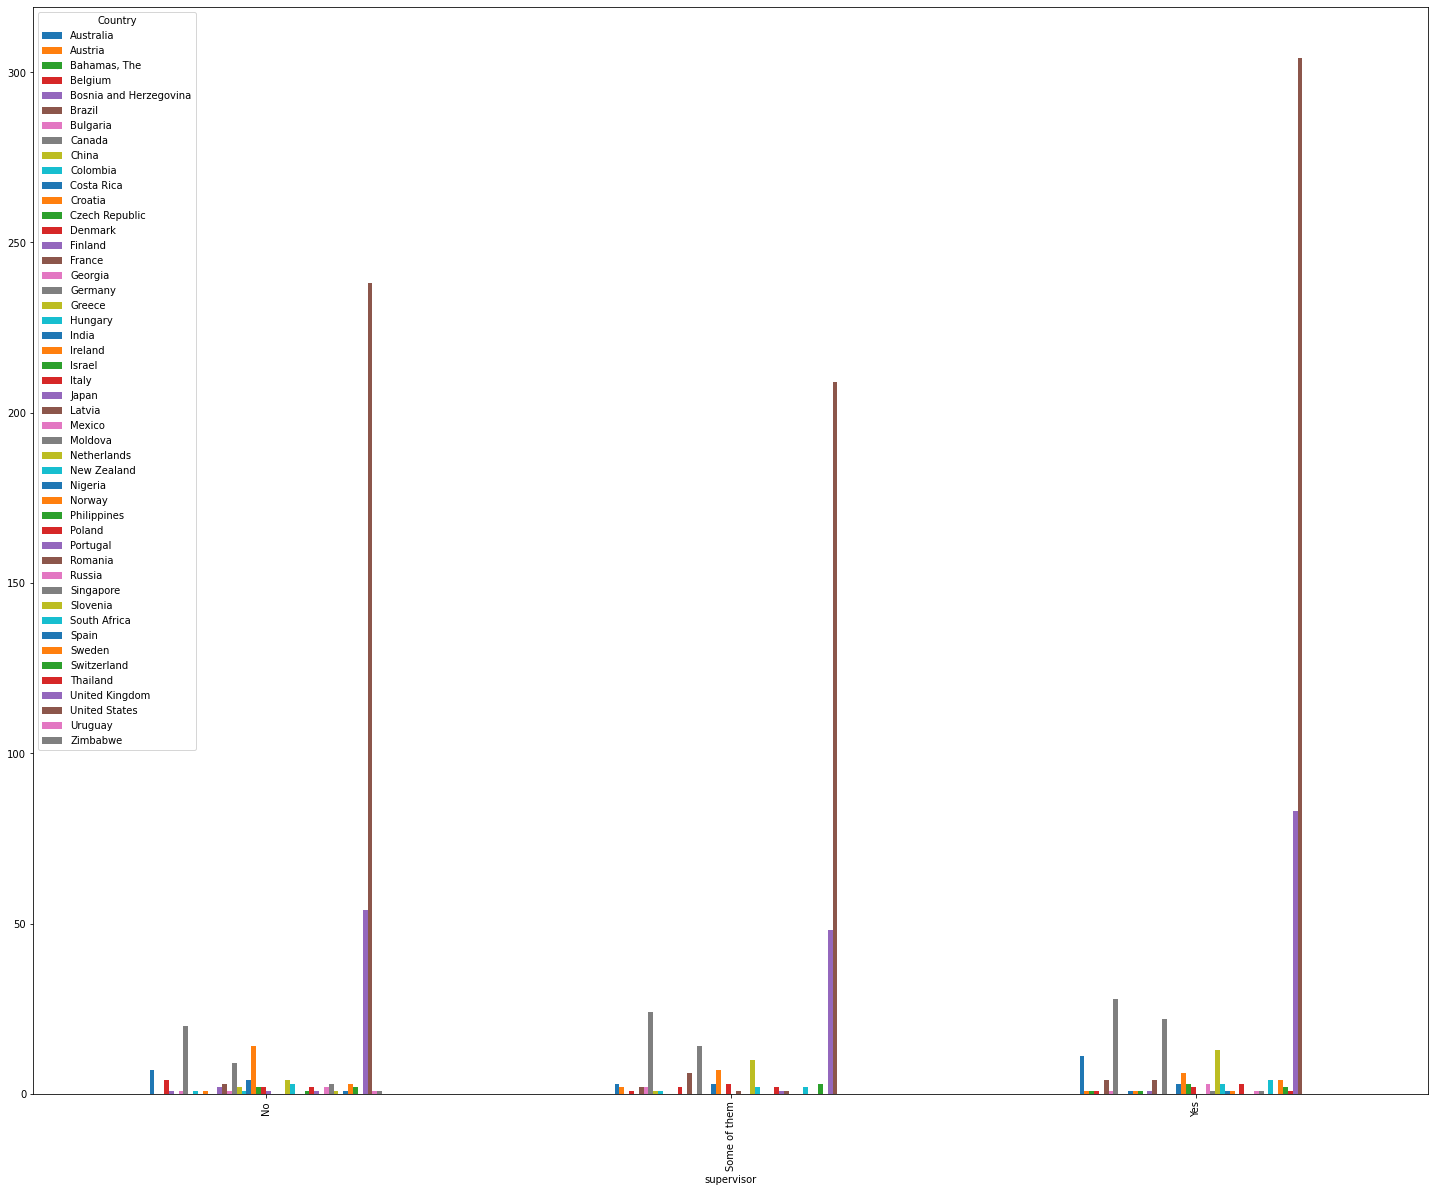

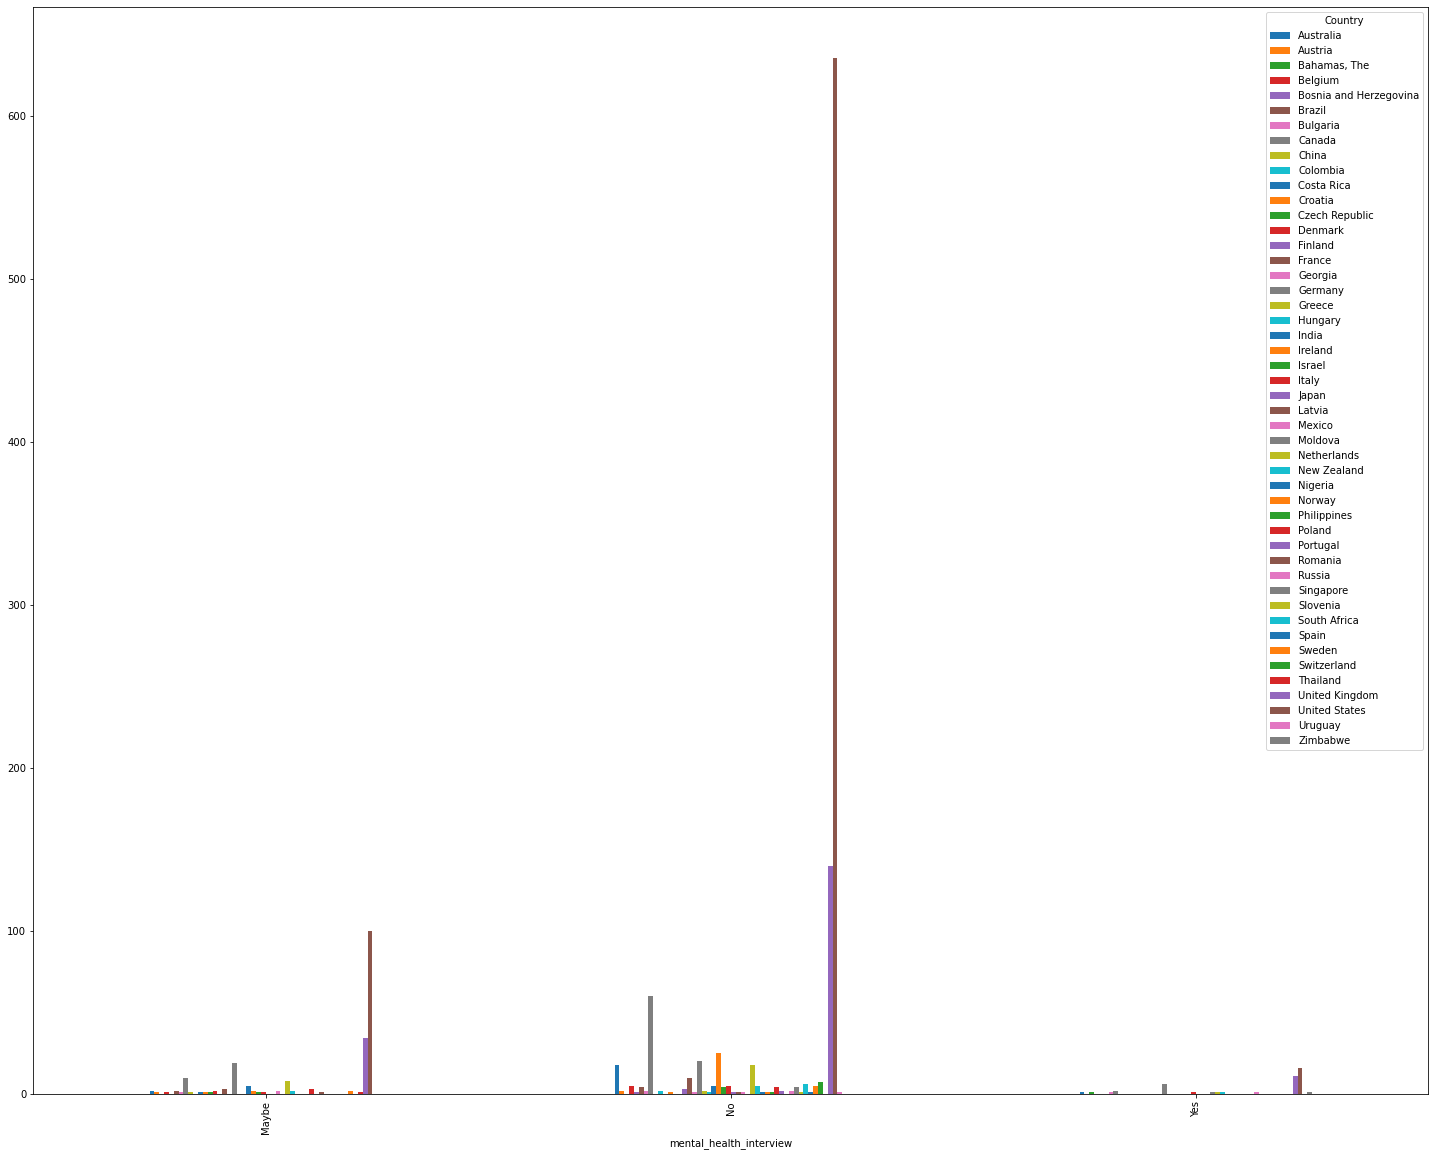

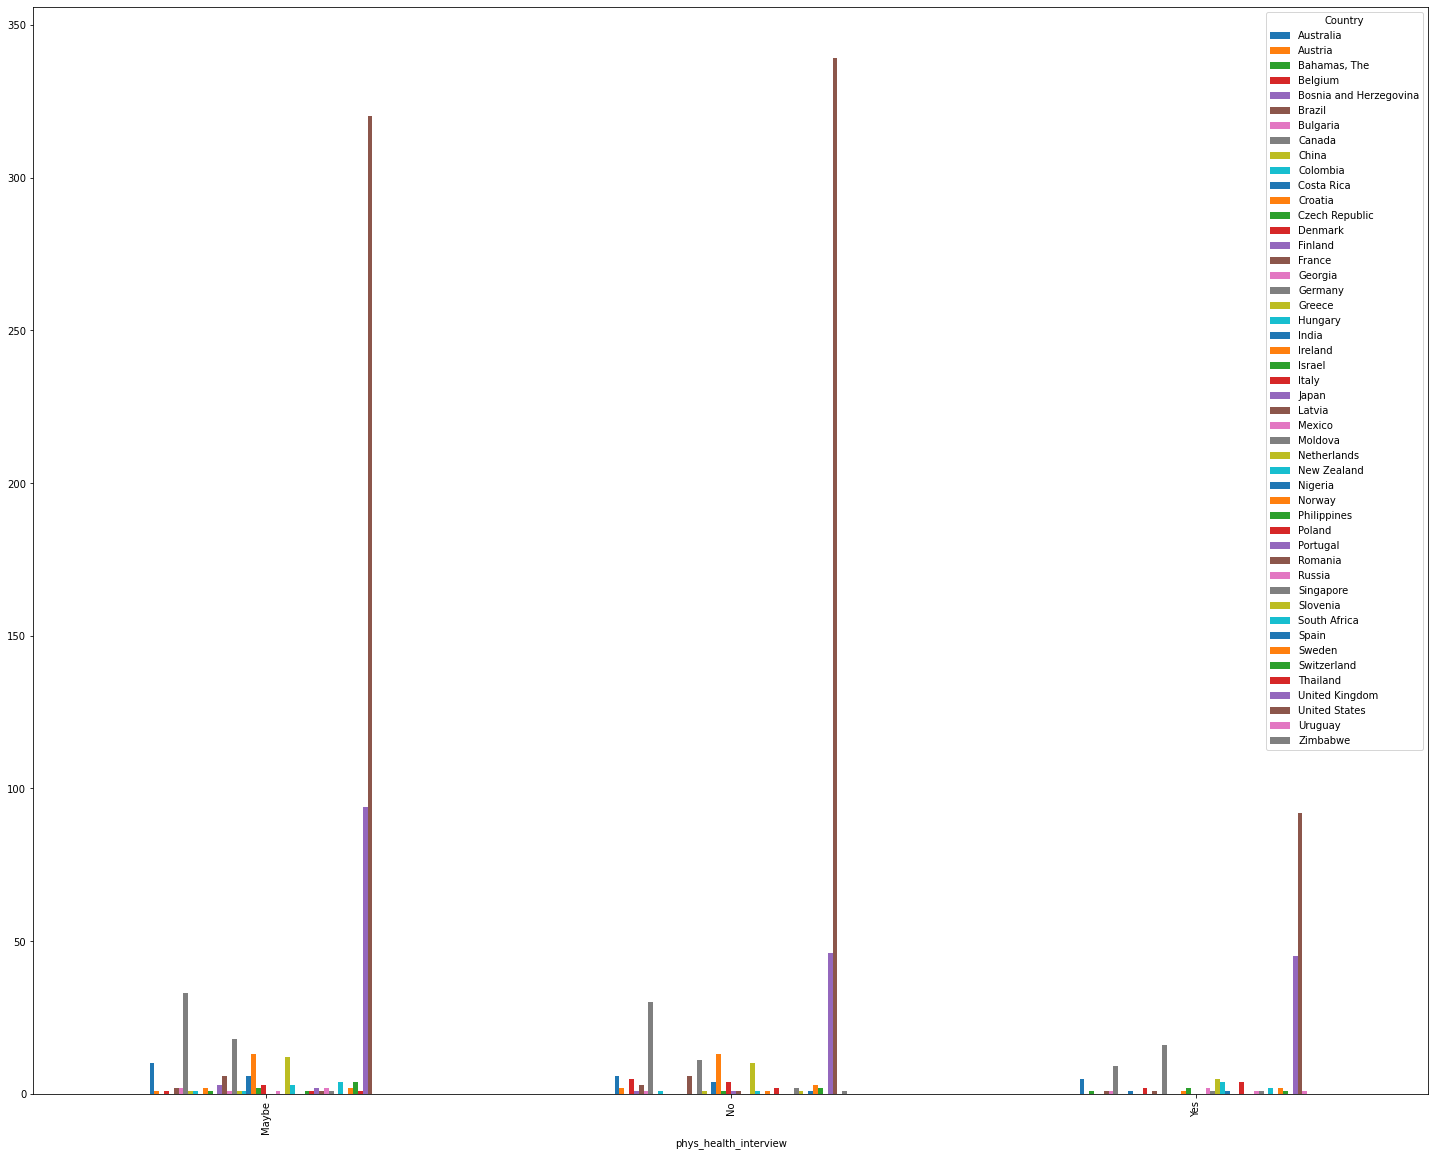

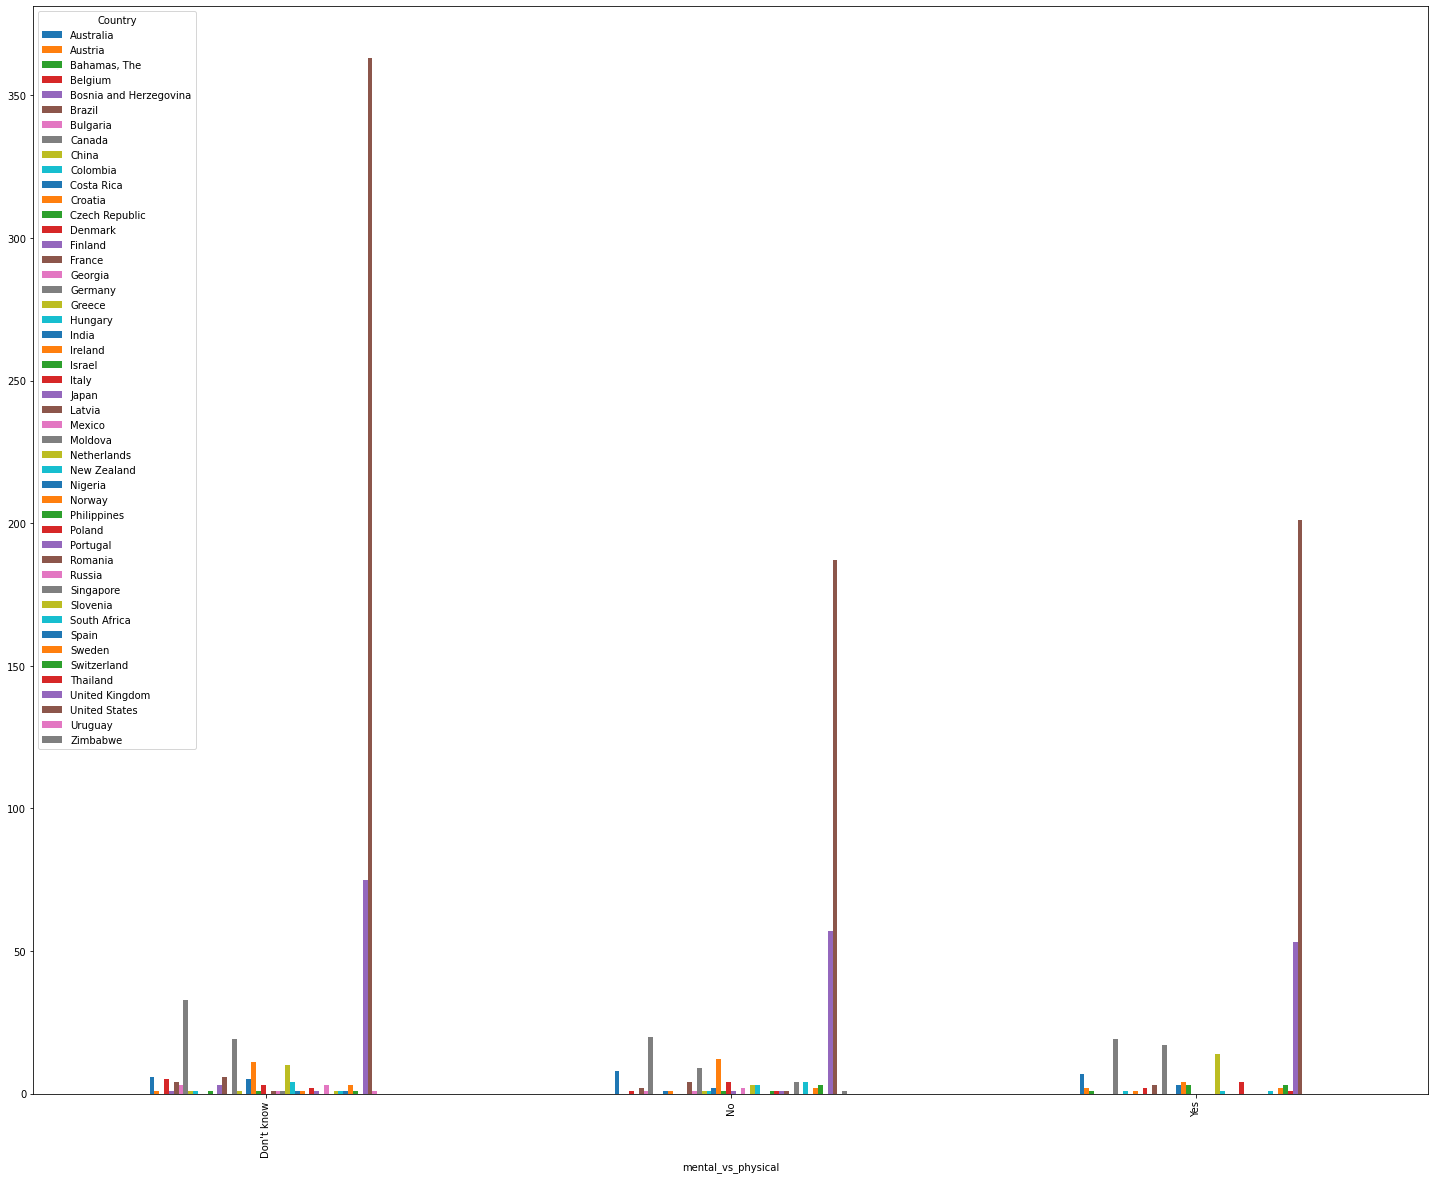

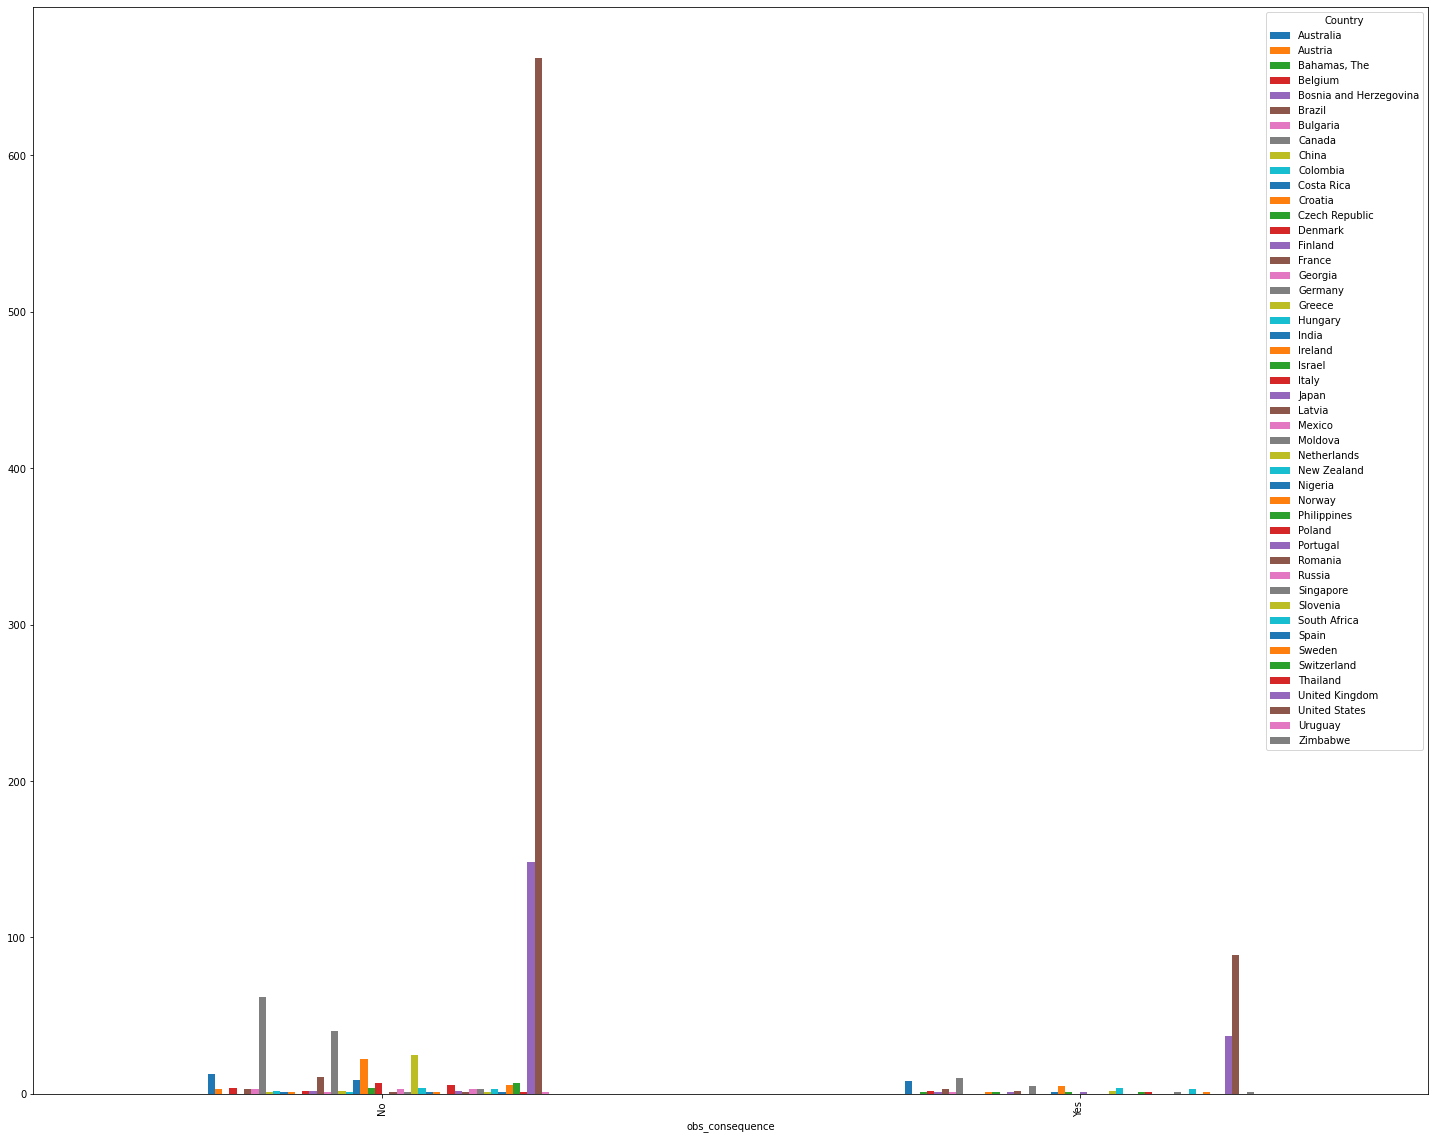

In [28]:
for i,col in enumerate(categorical_columns.columns):
    cat1=categorical_columns.groupby([col,'Country'])['Country'].count().unstack()
    cat1.plot(kind='bar',figsize=(25,20))

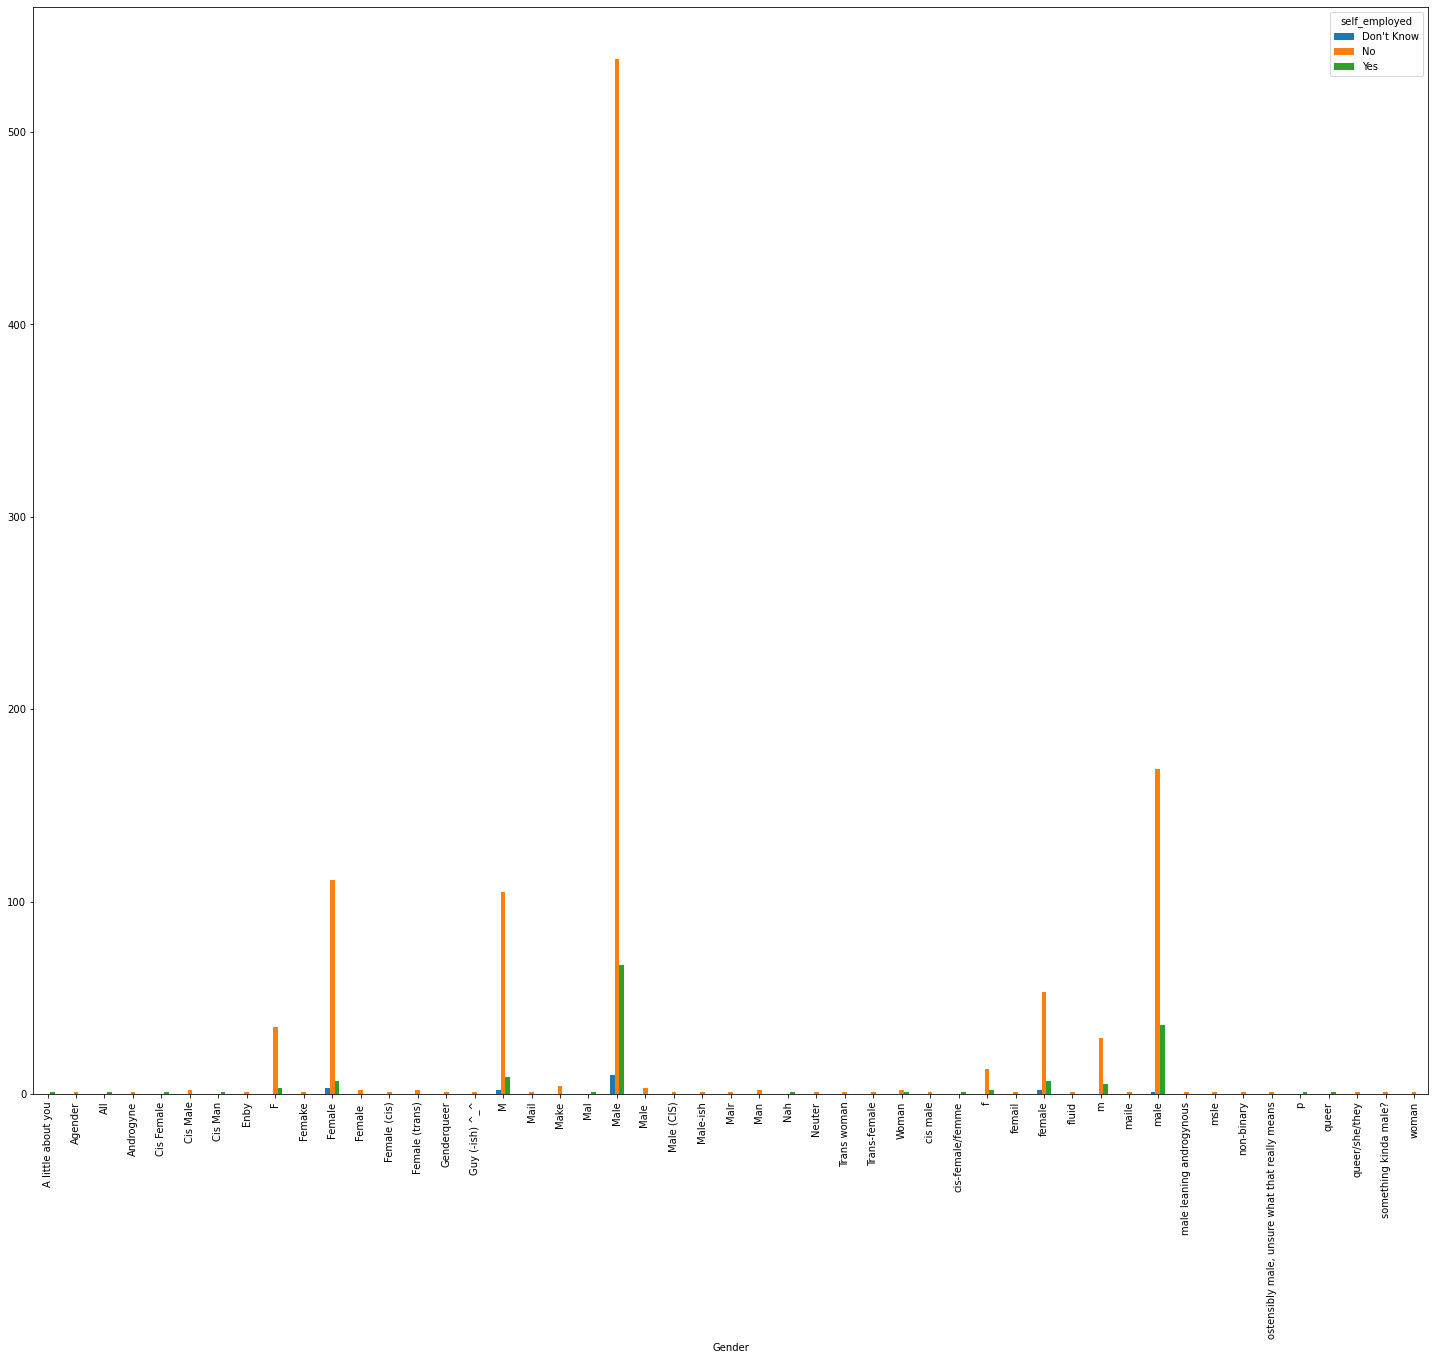

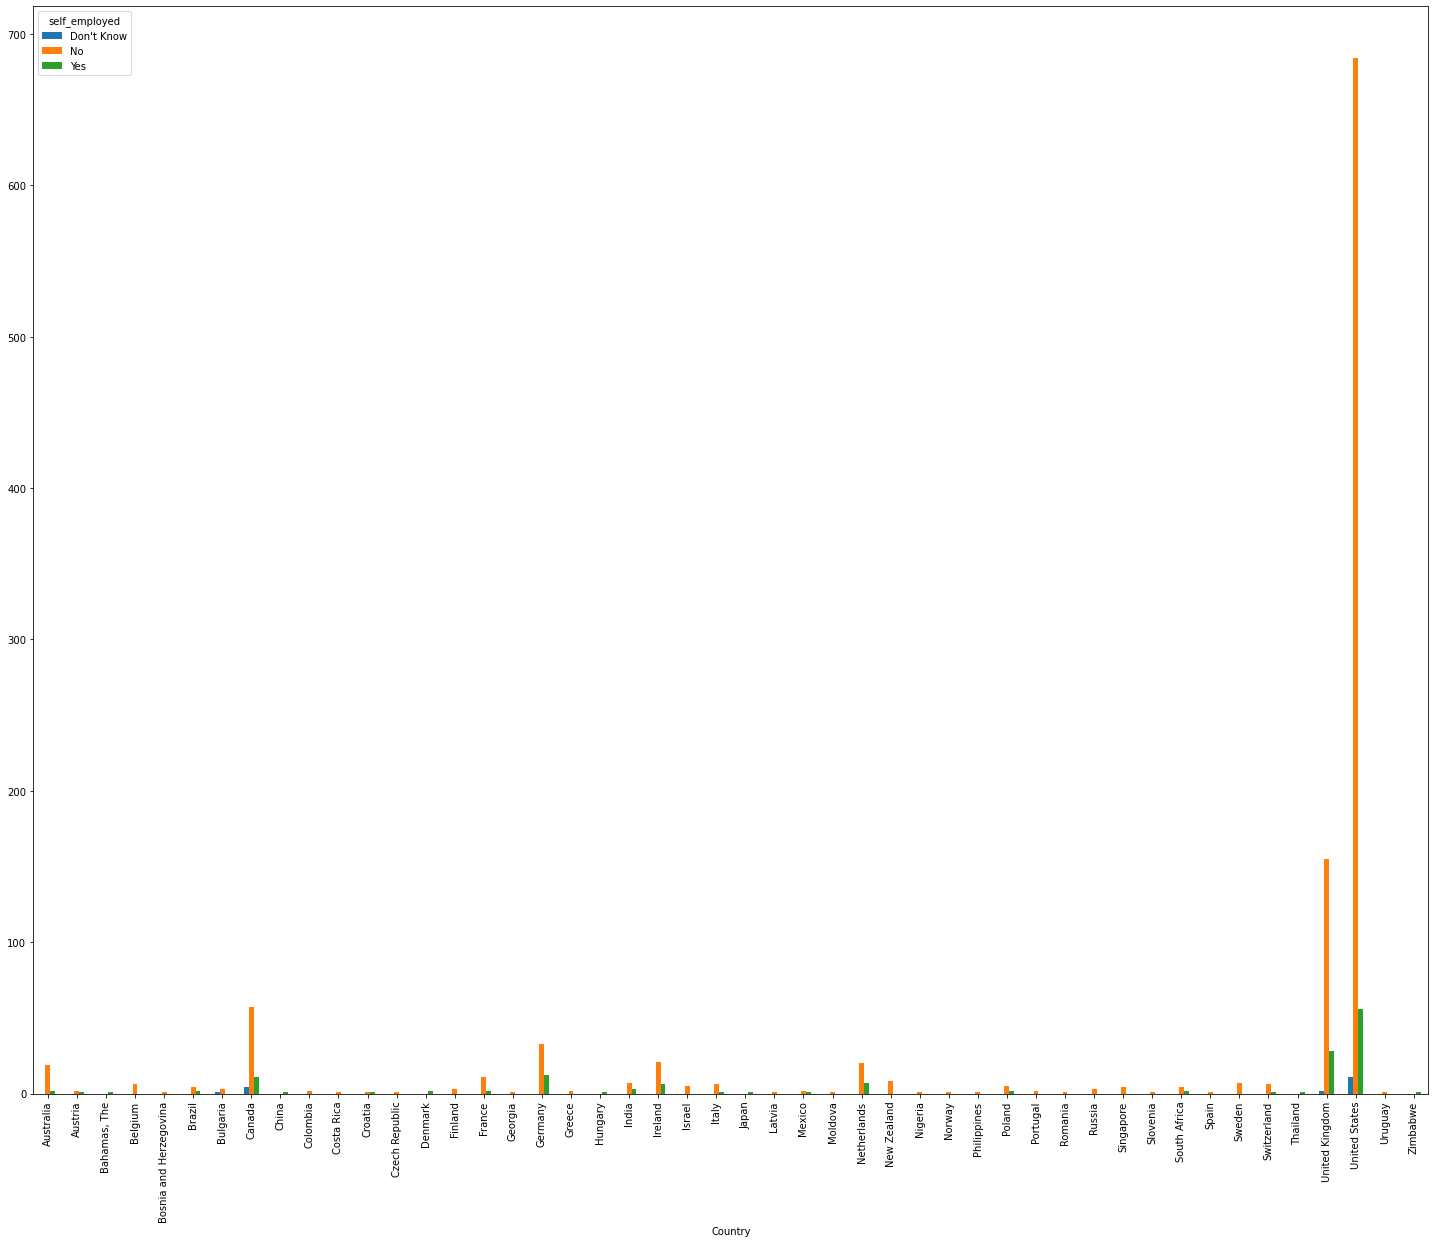

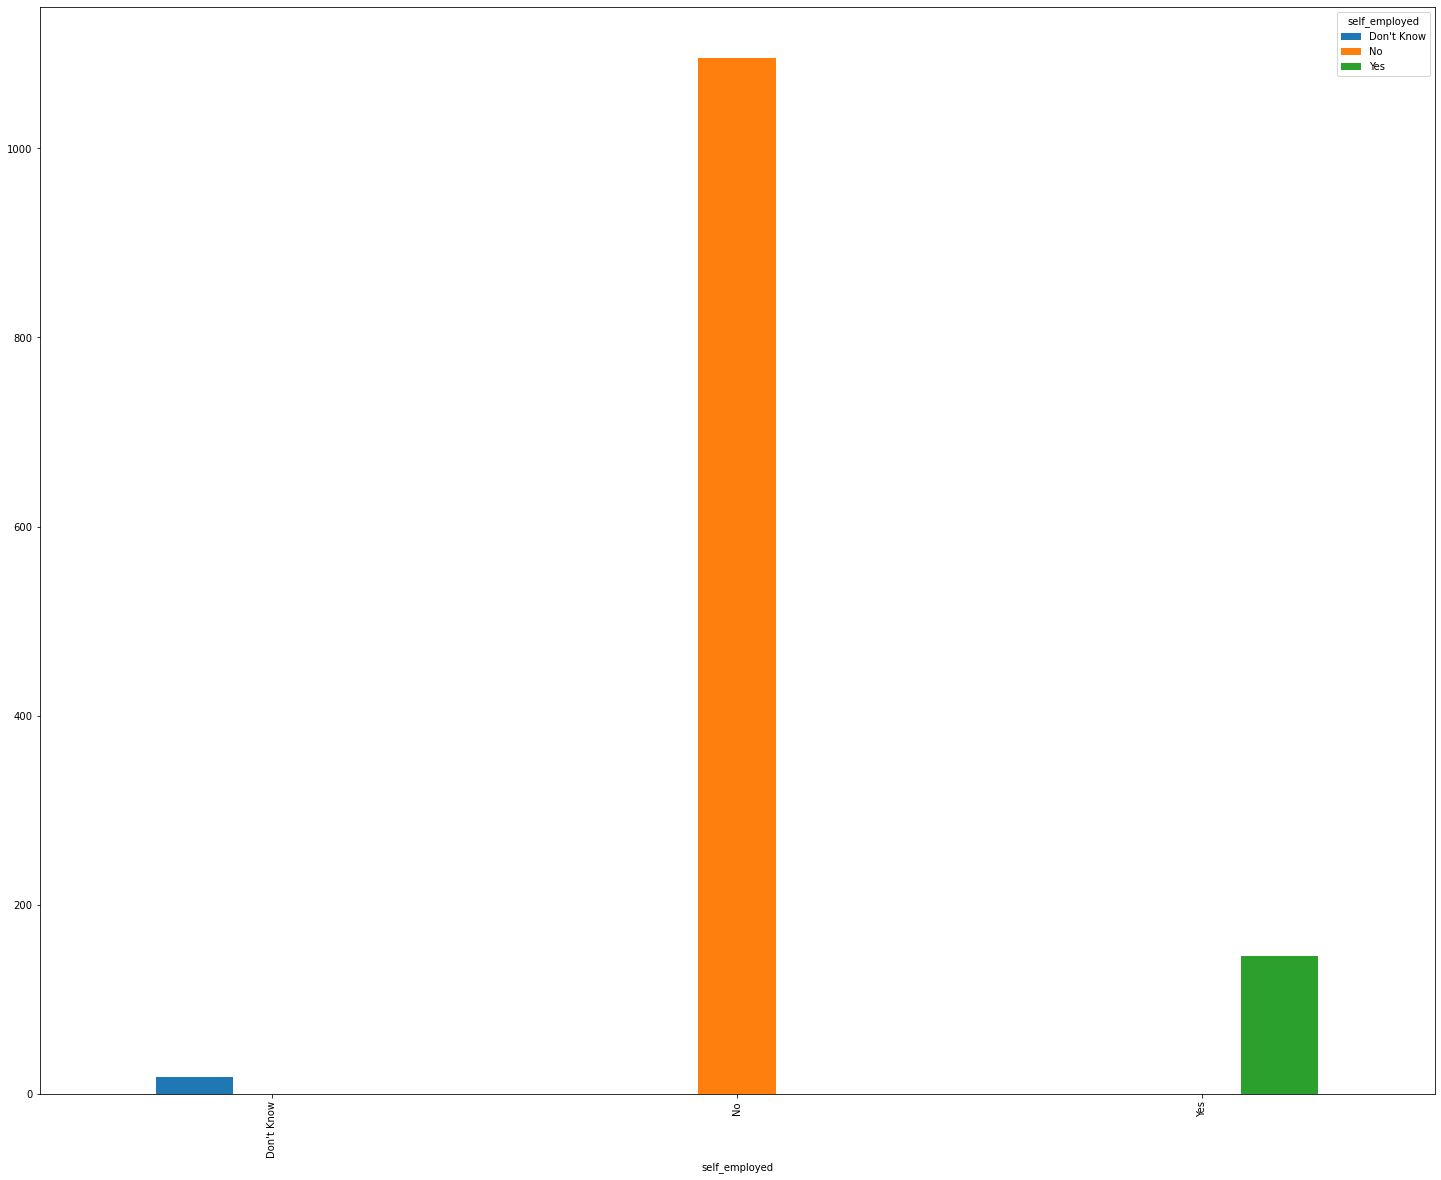

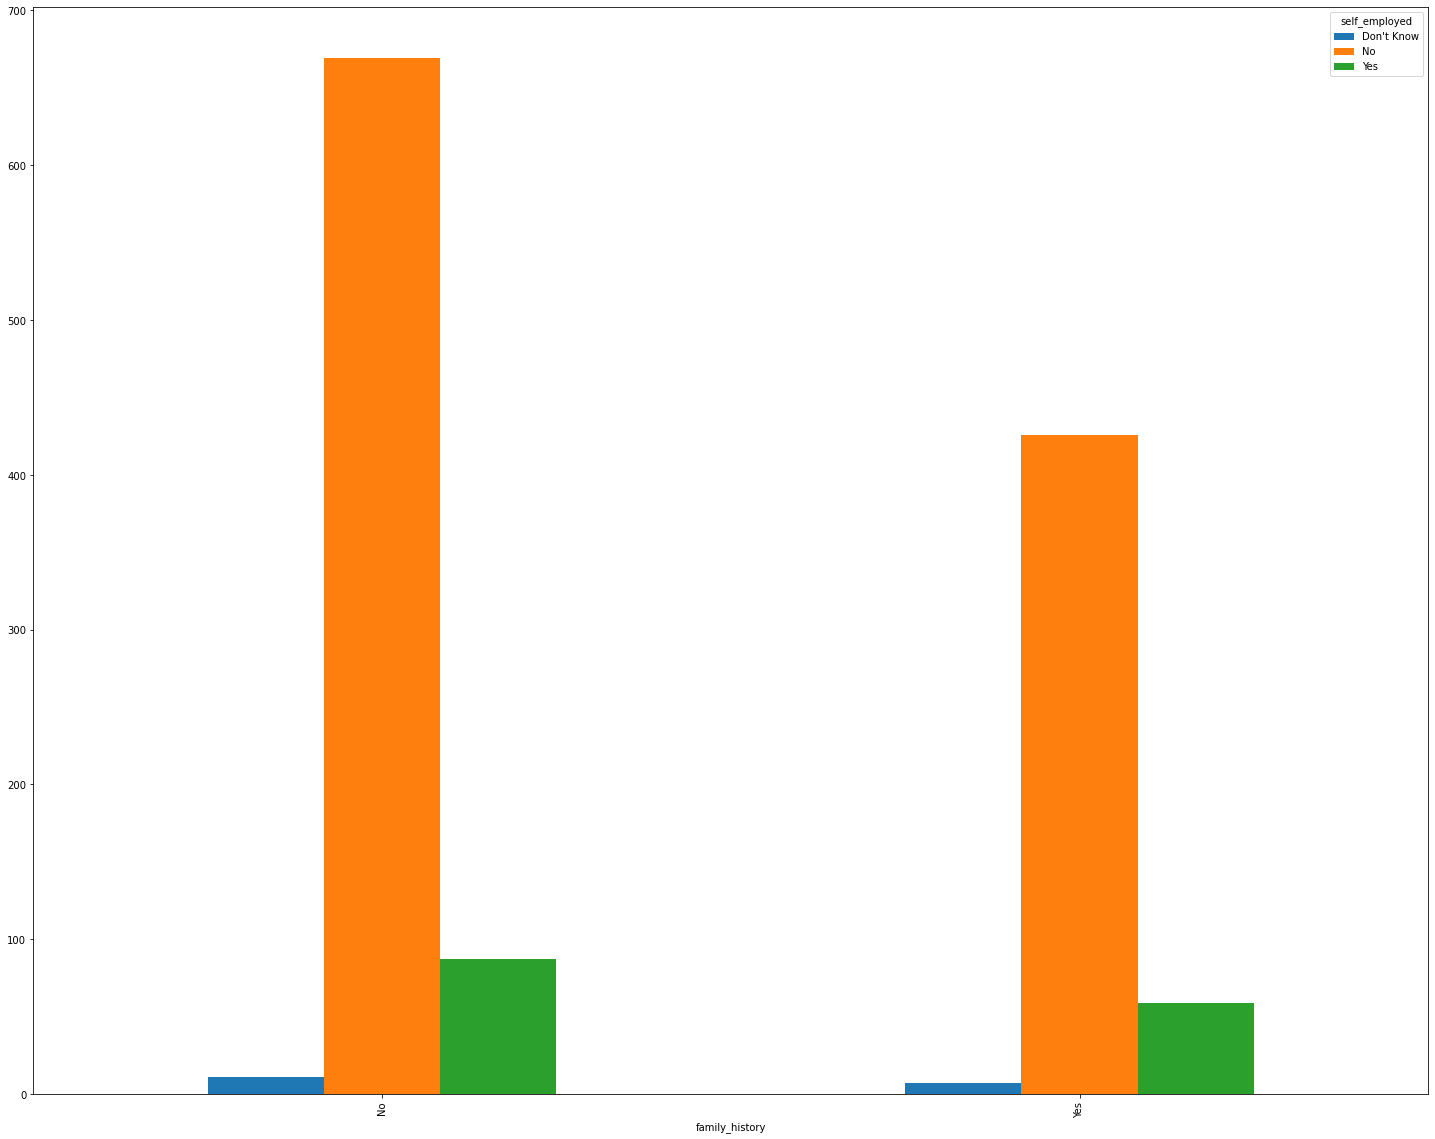

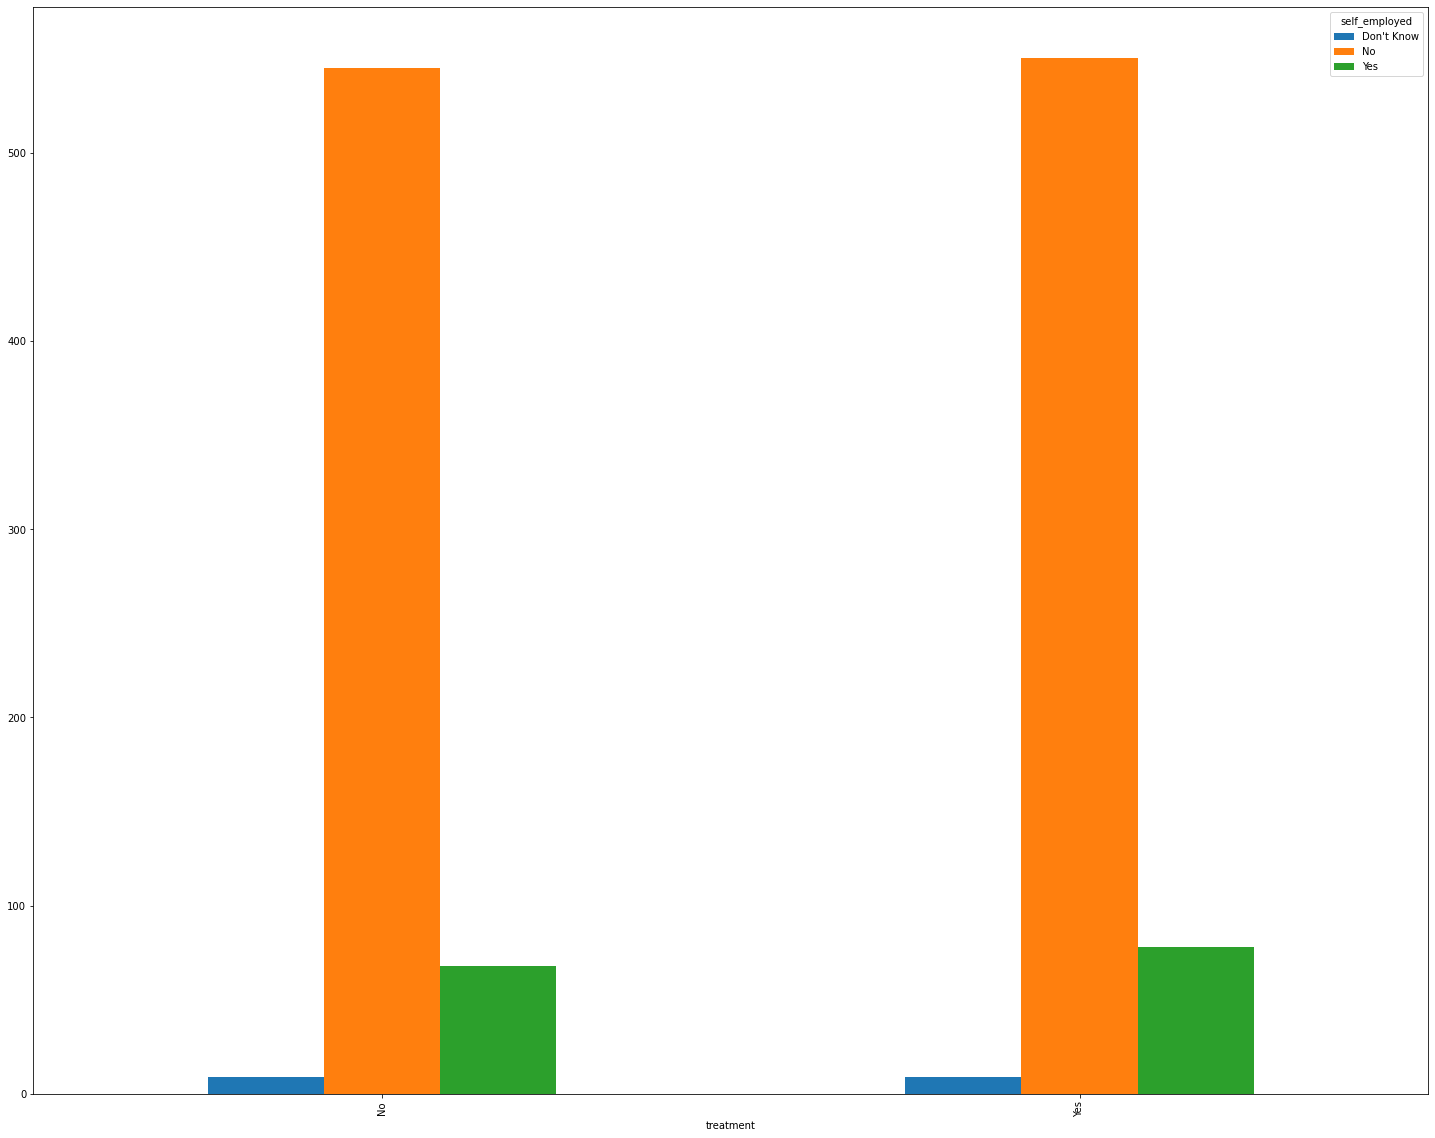

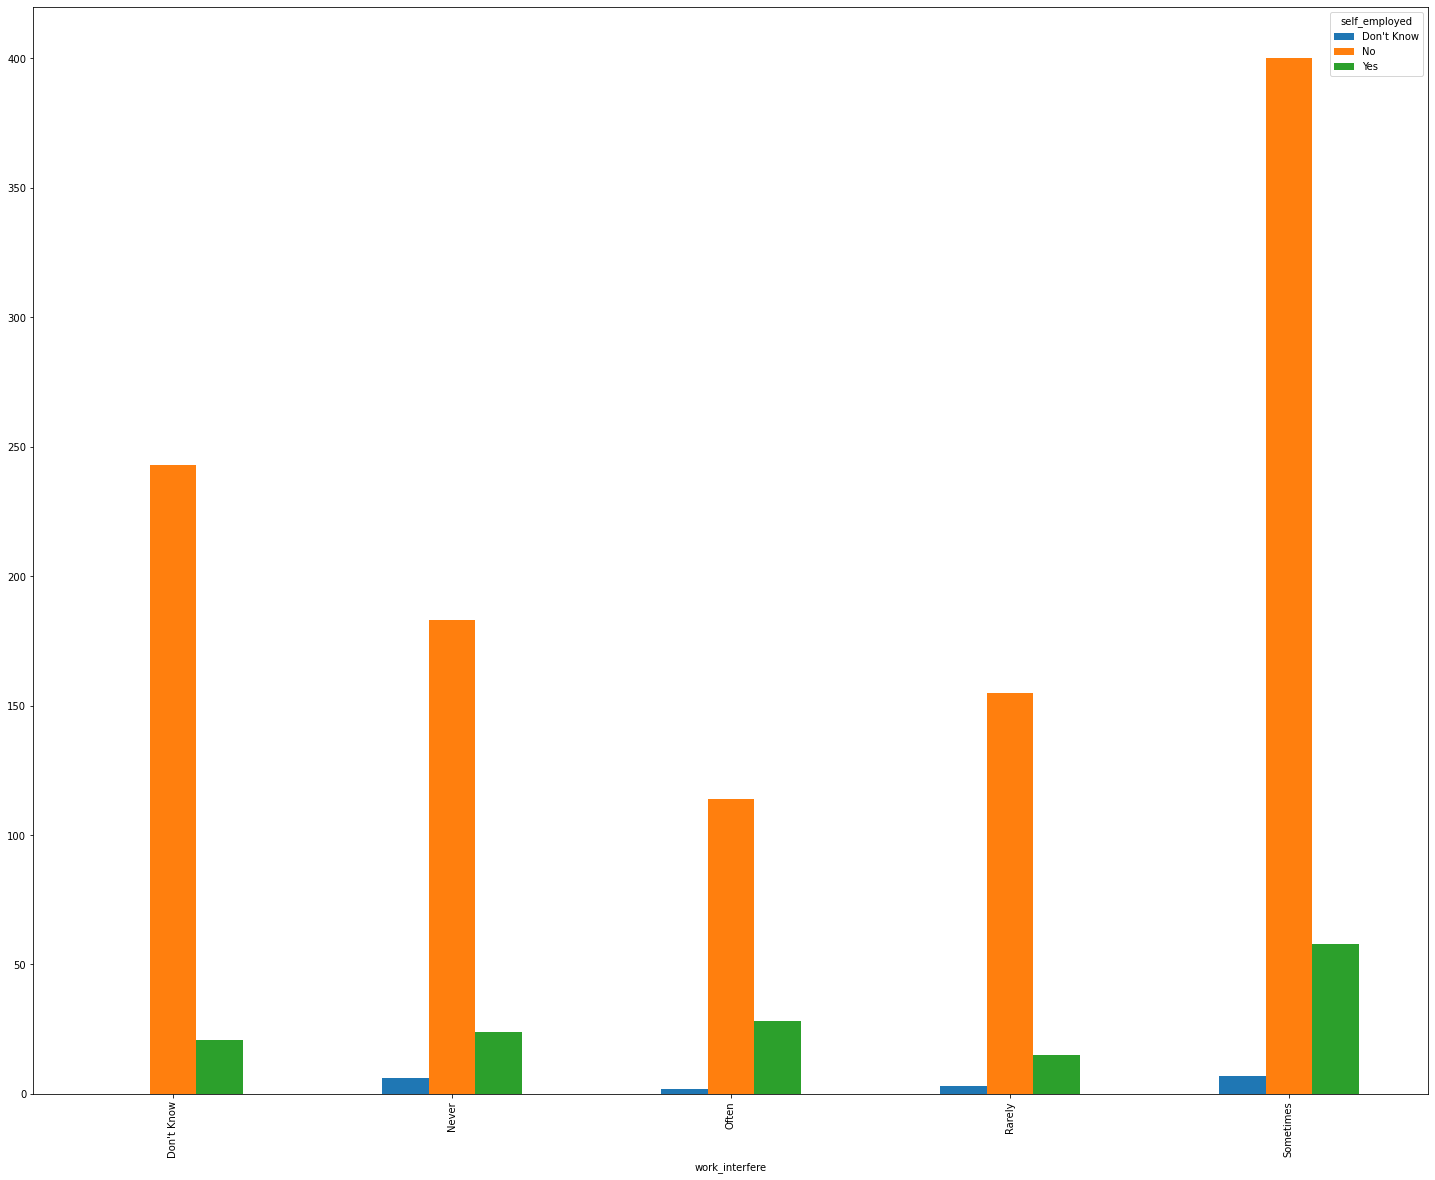

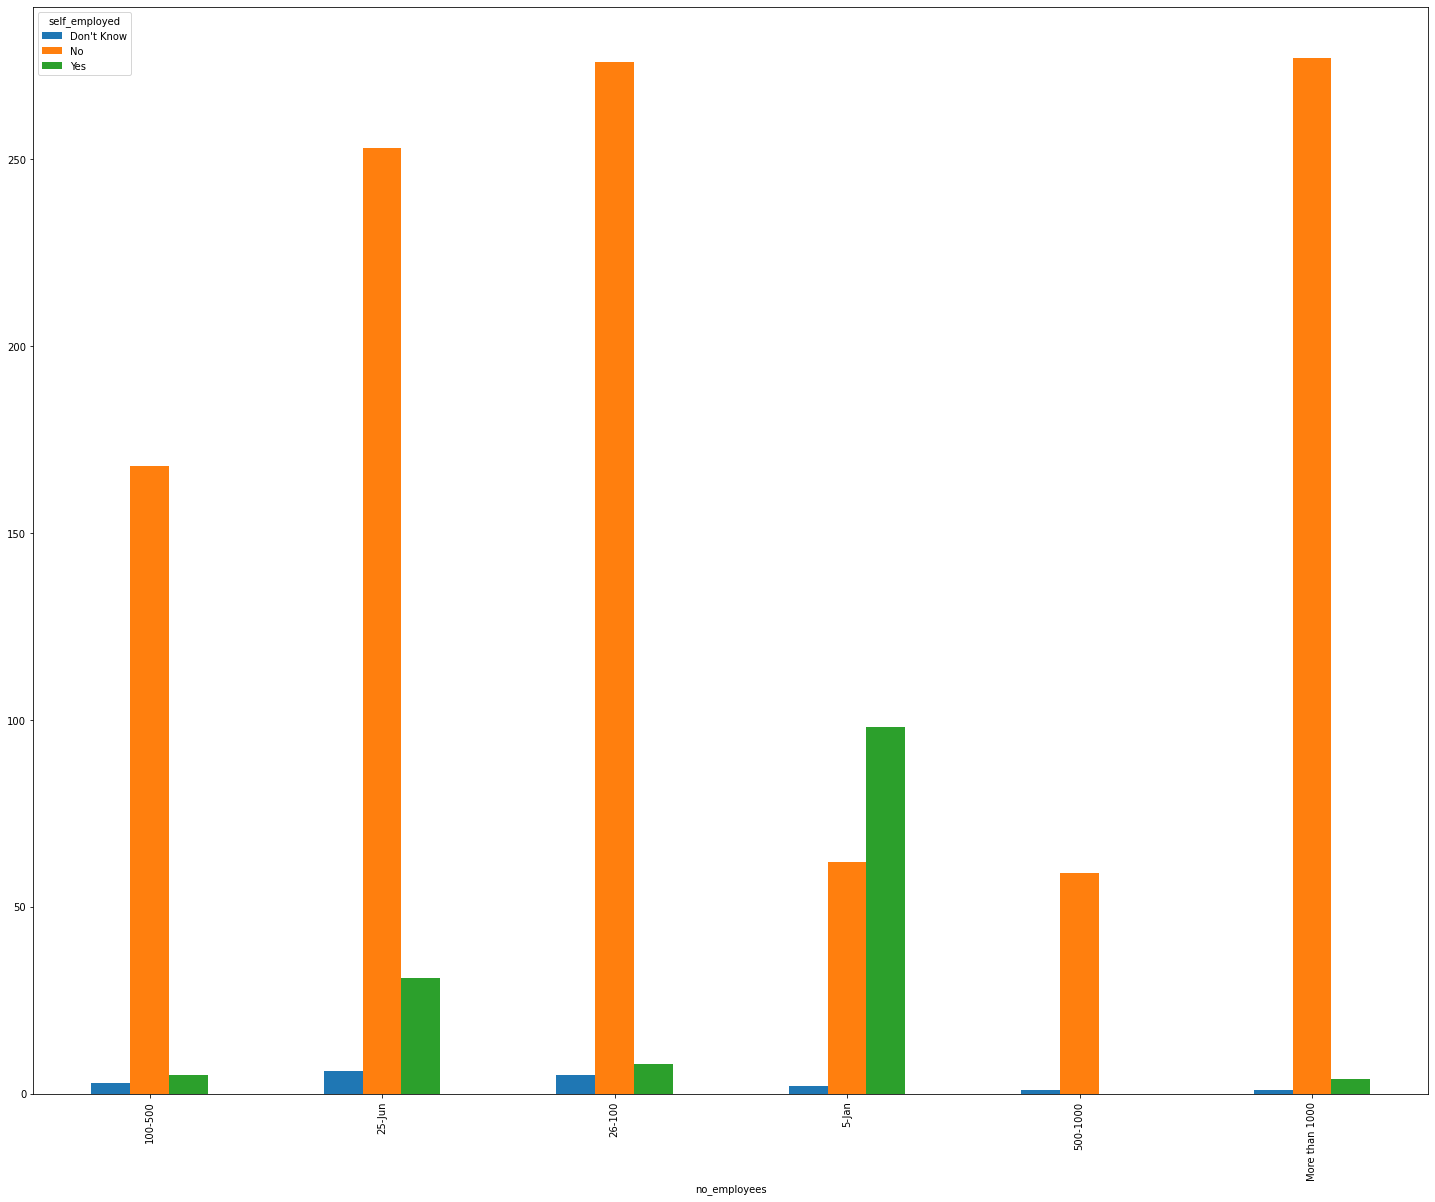

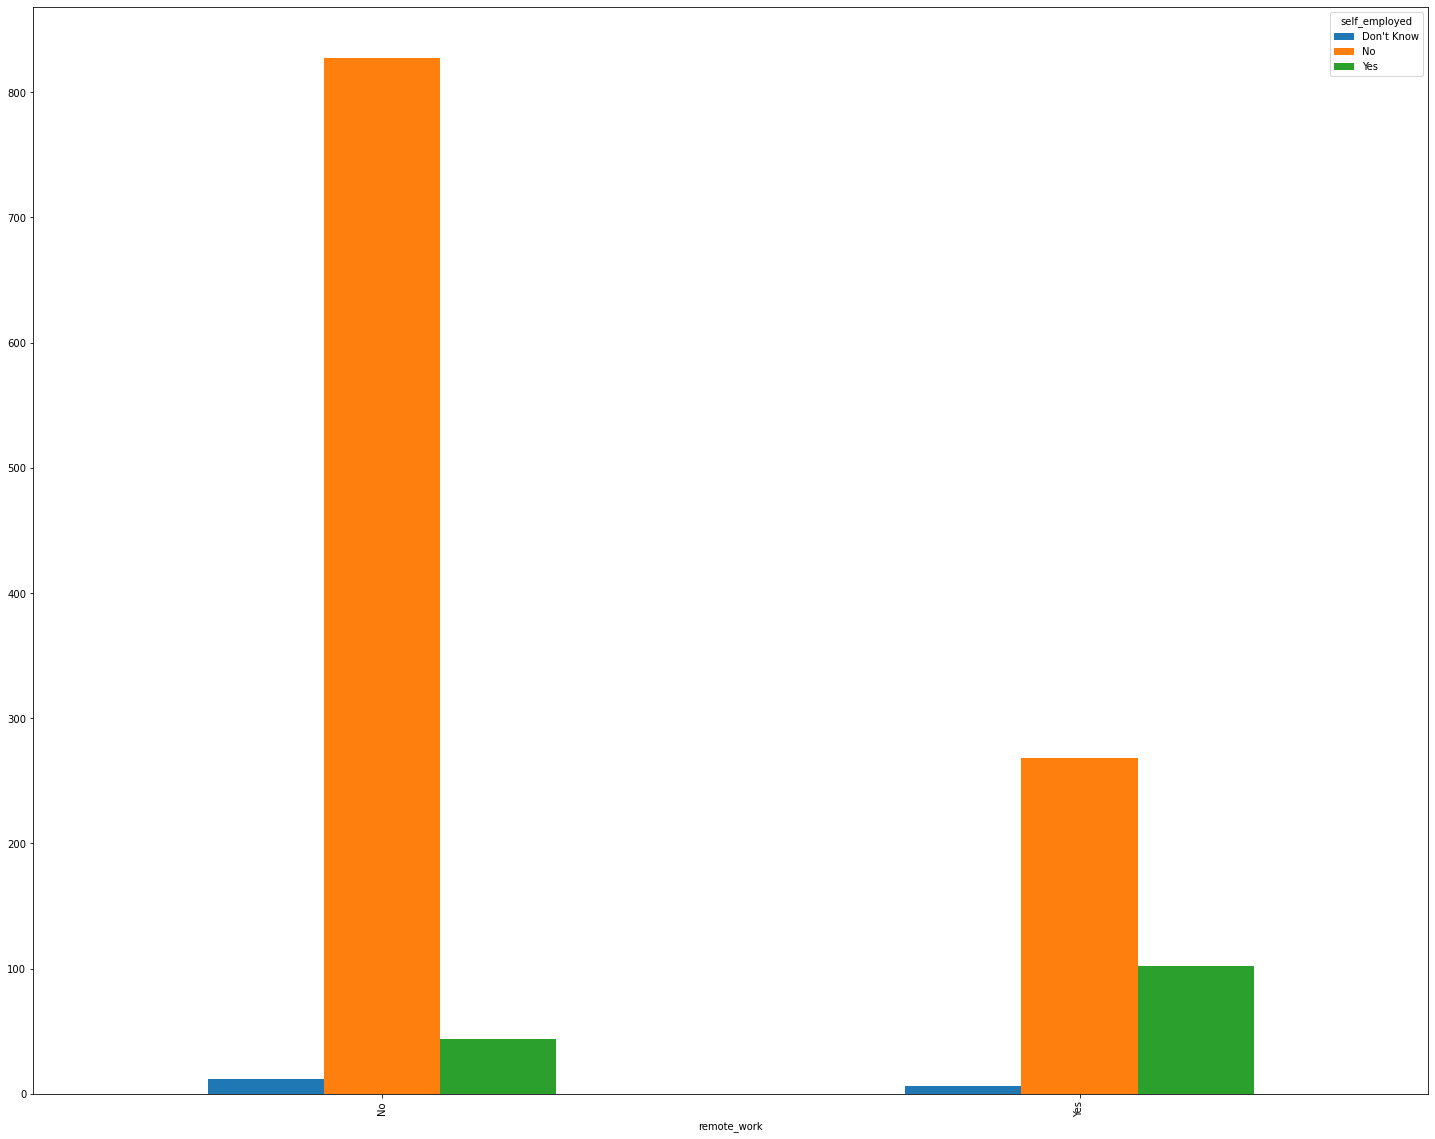

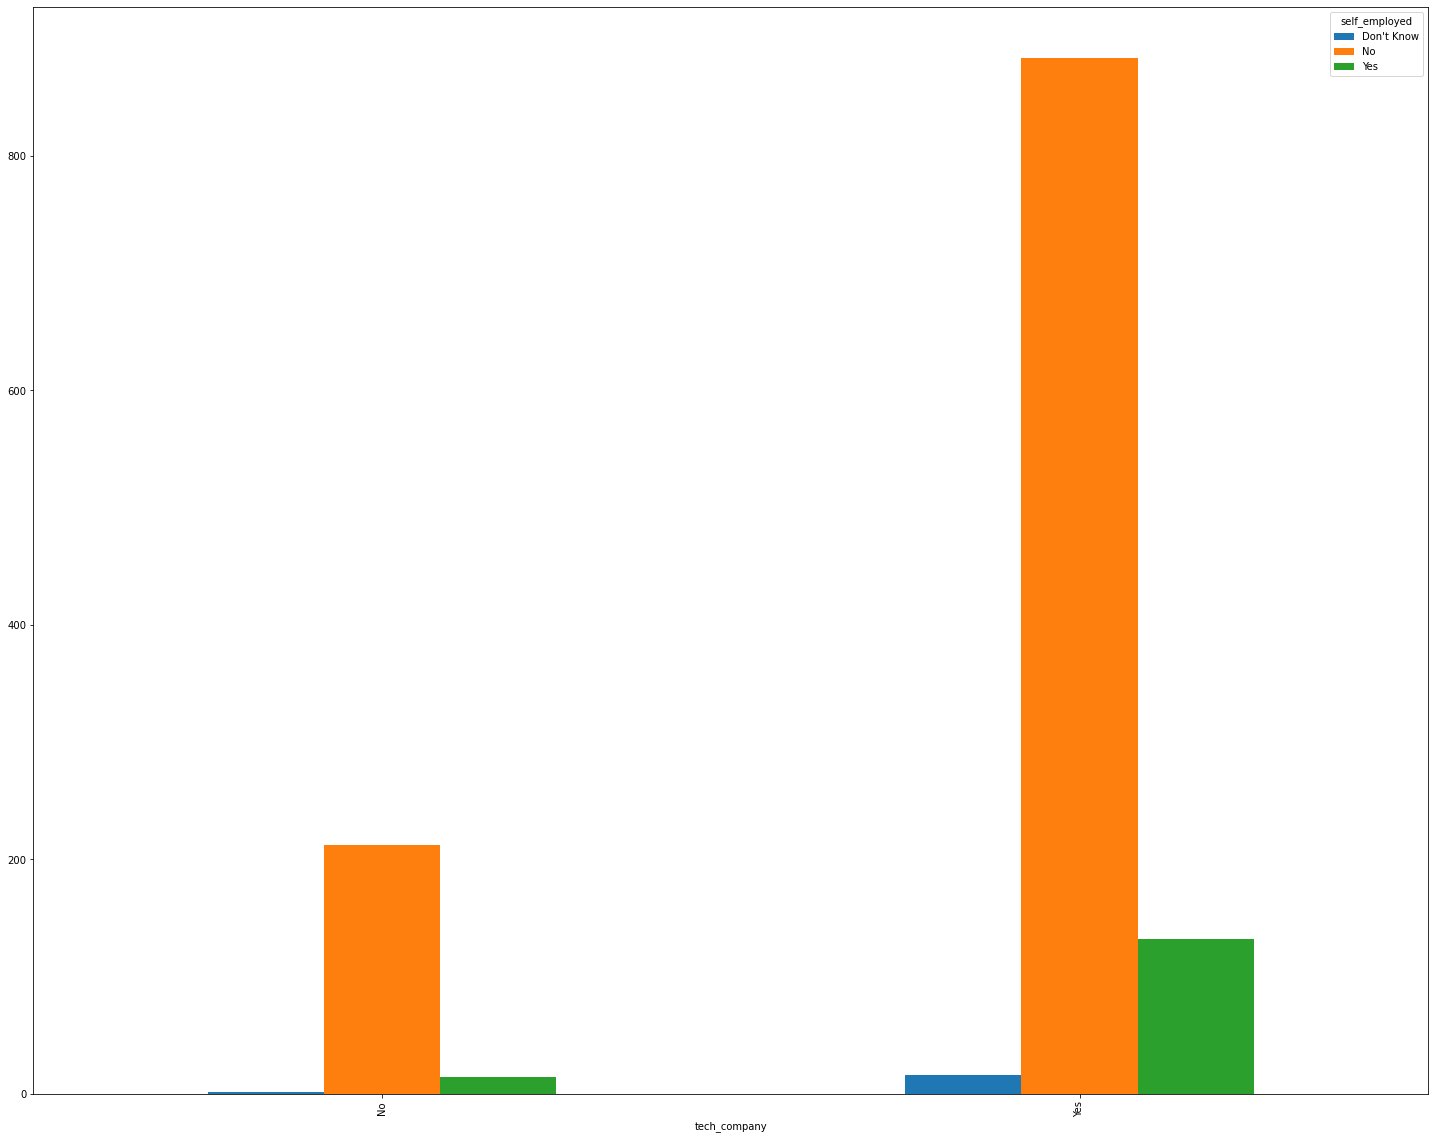

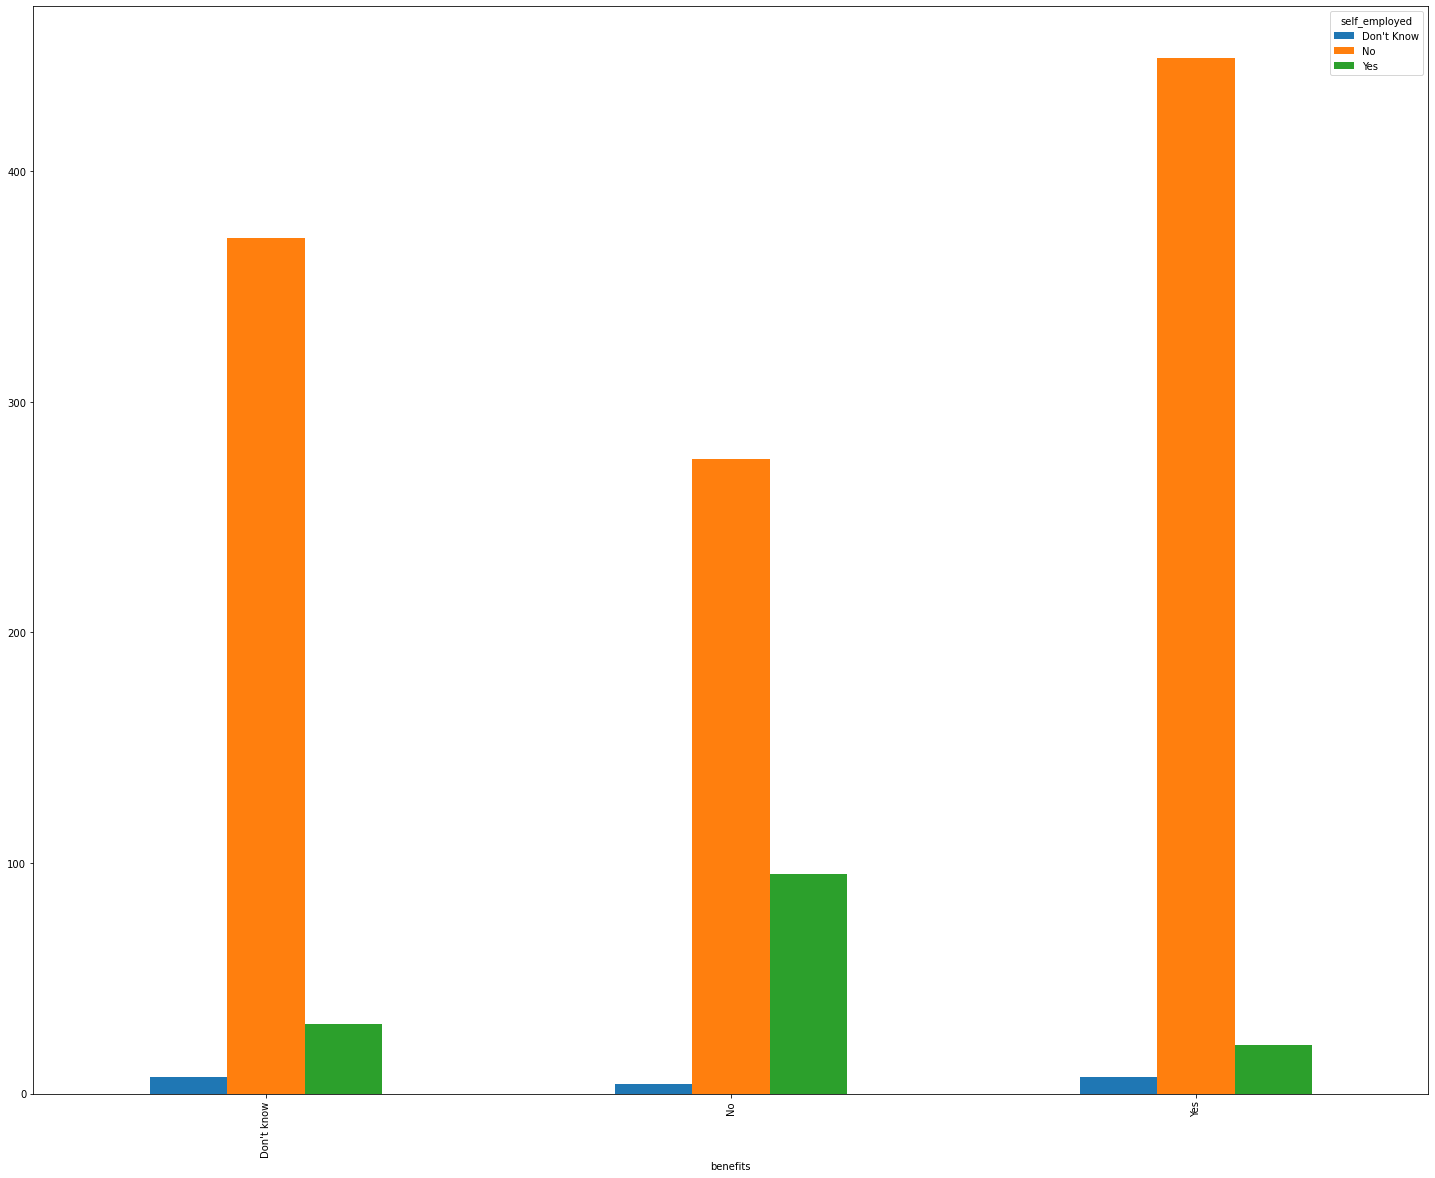

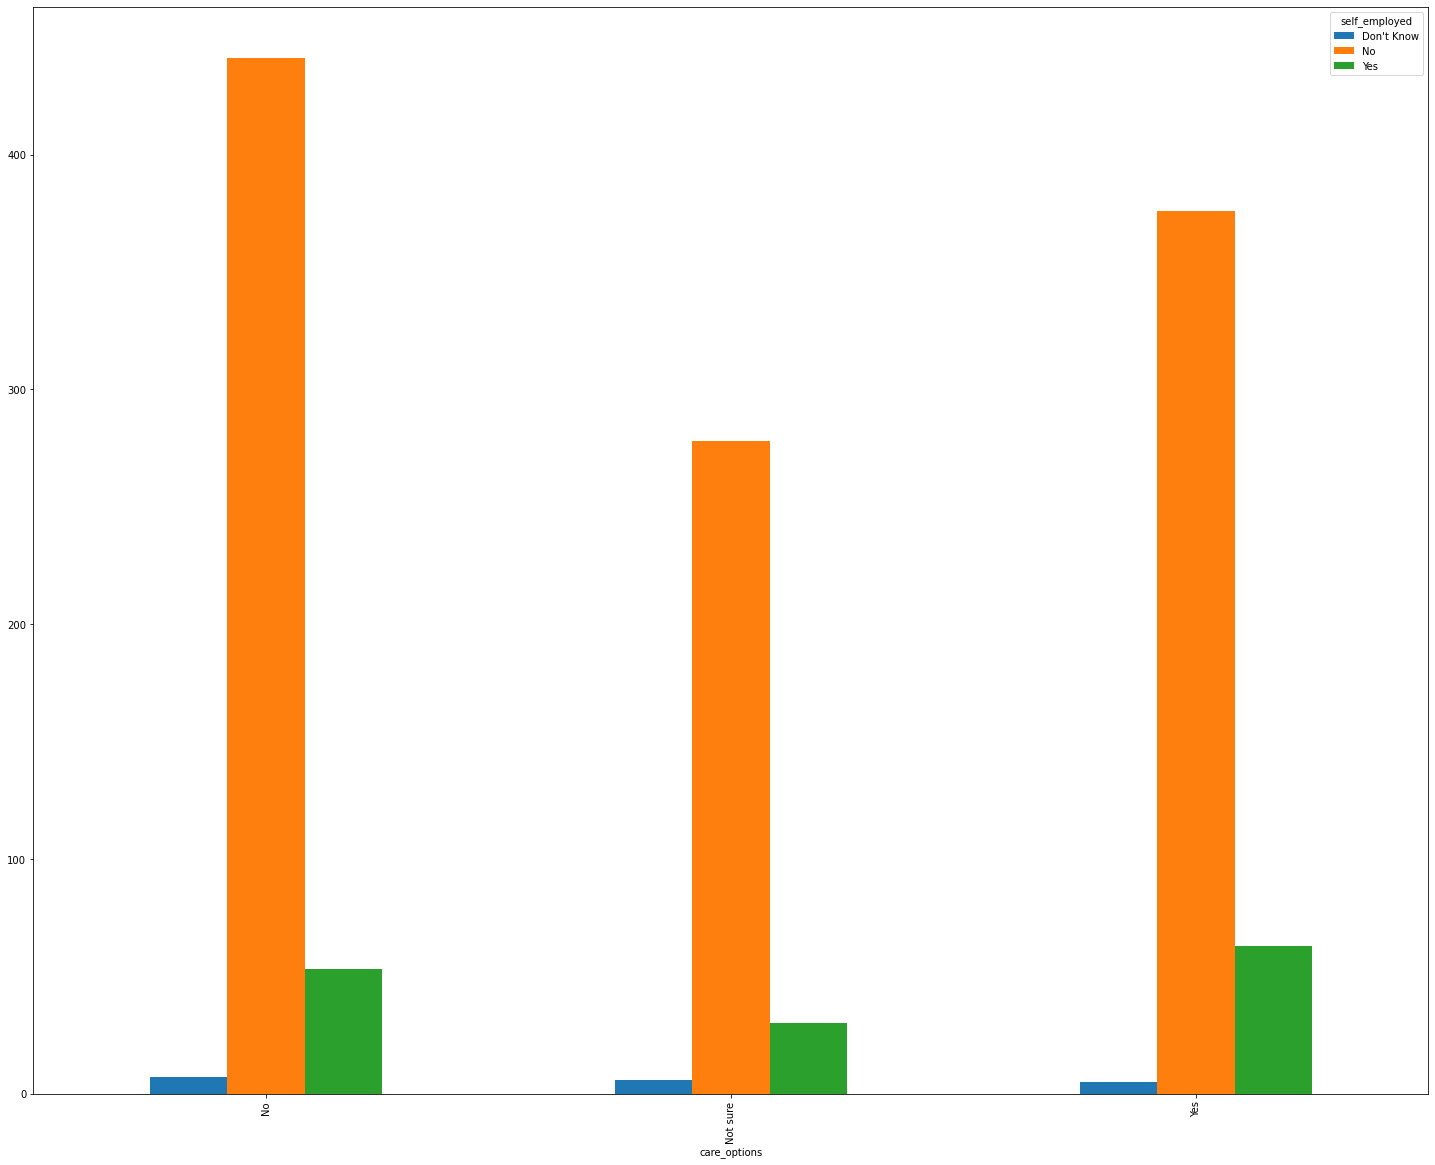

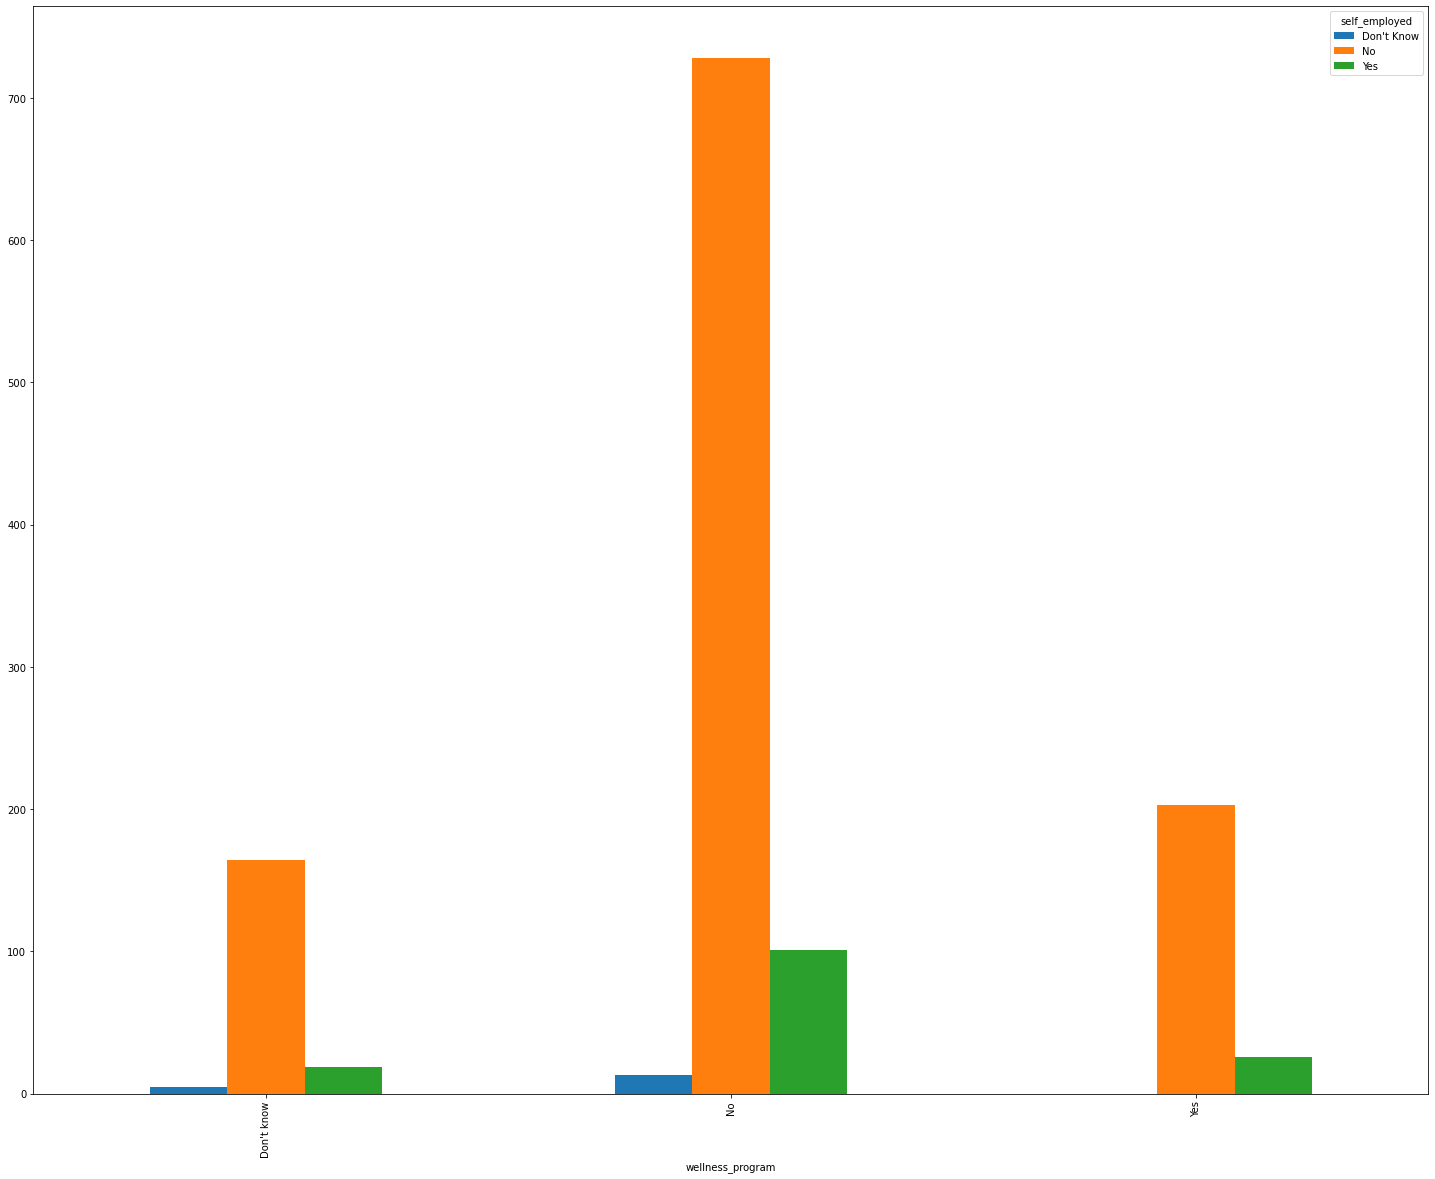

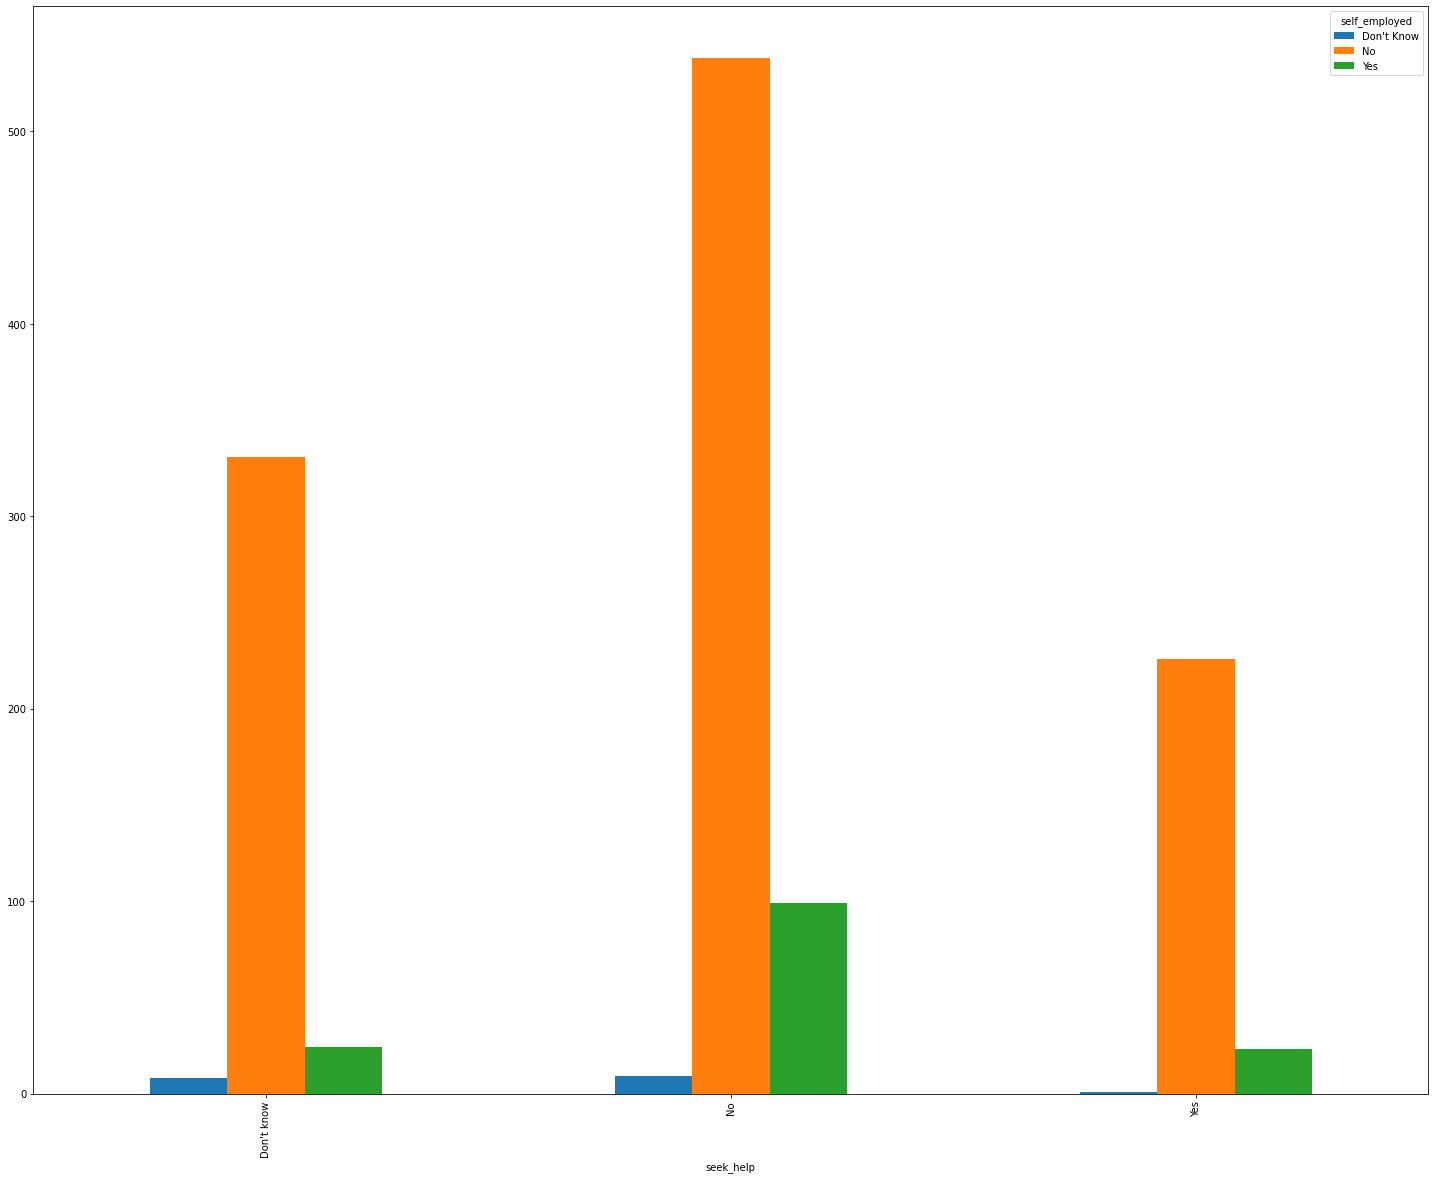

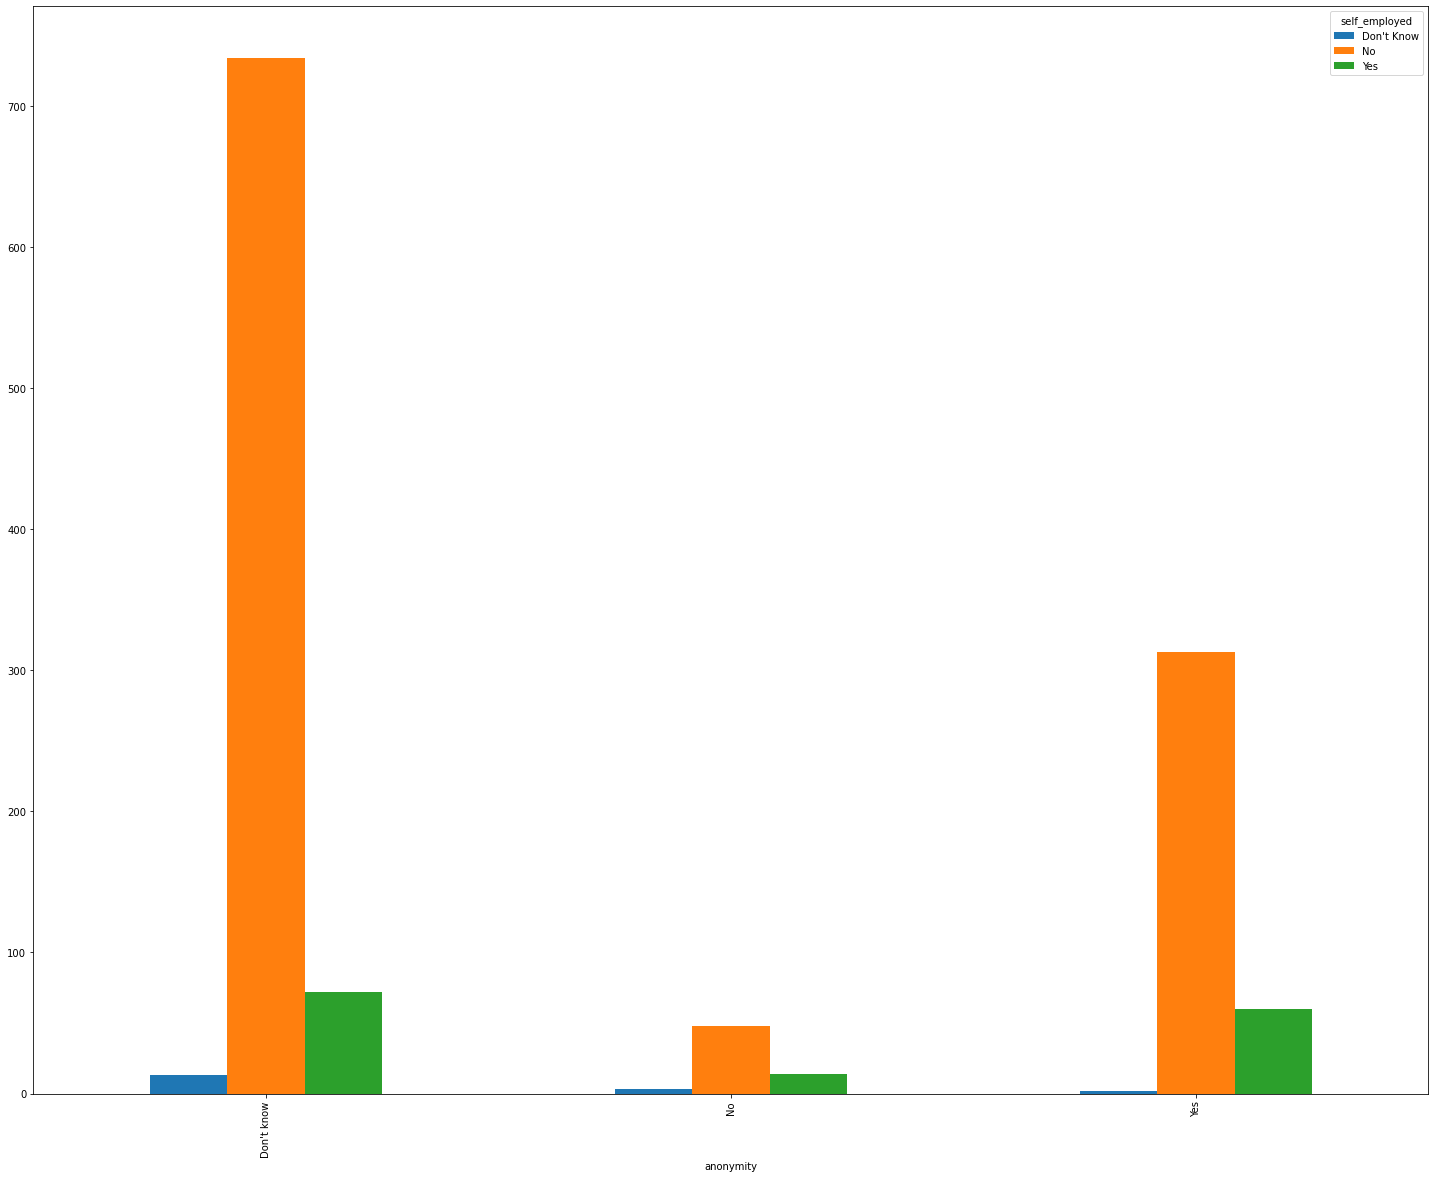

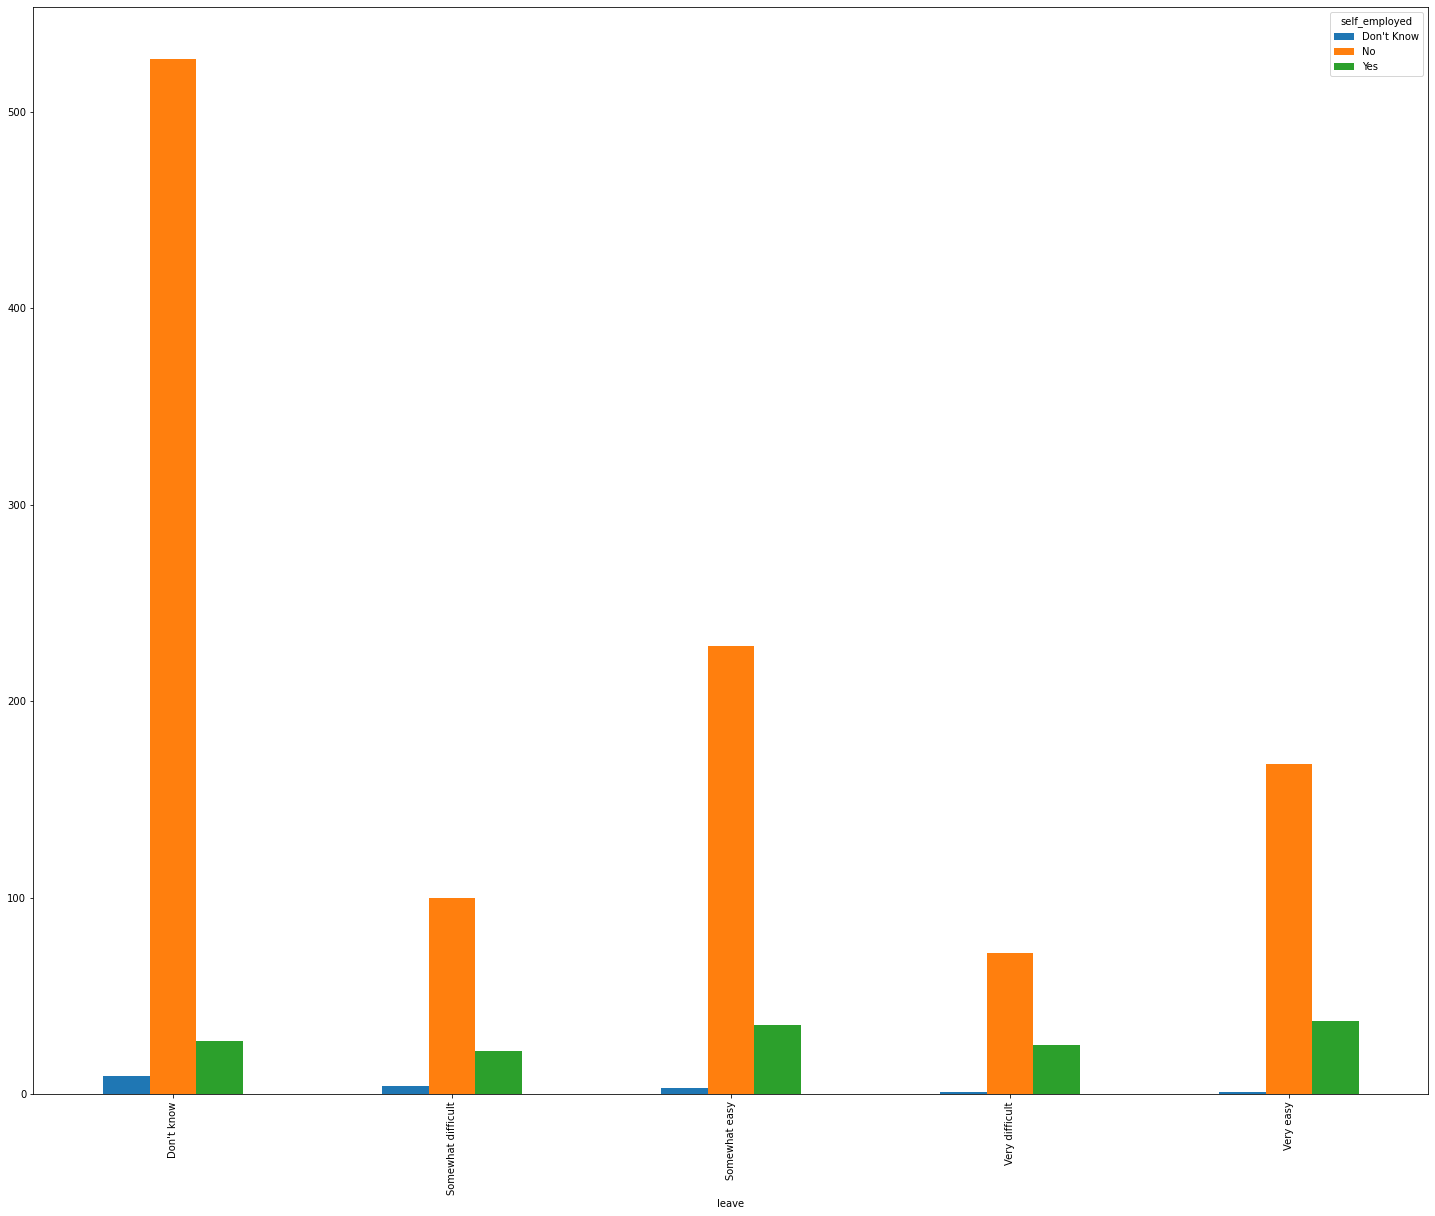

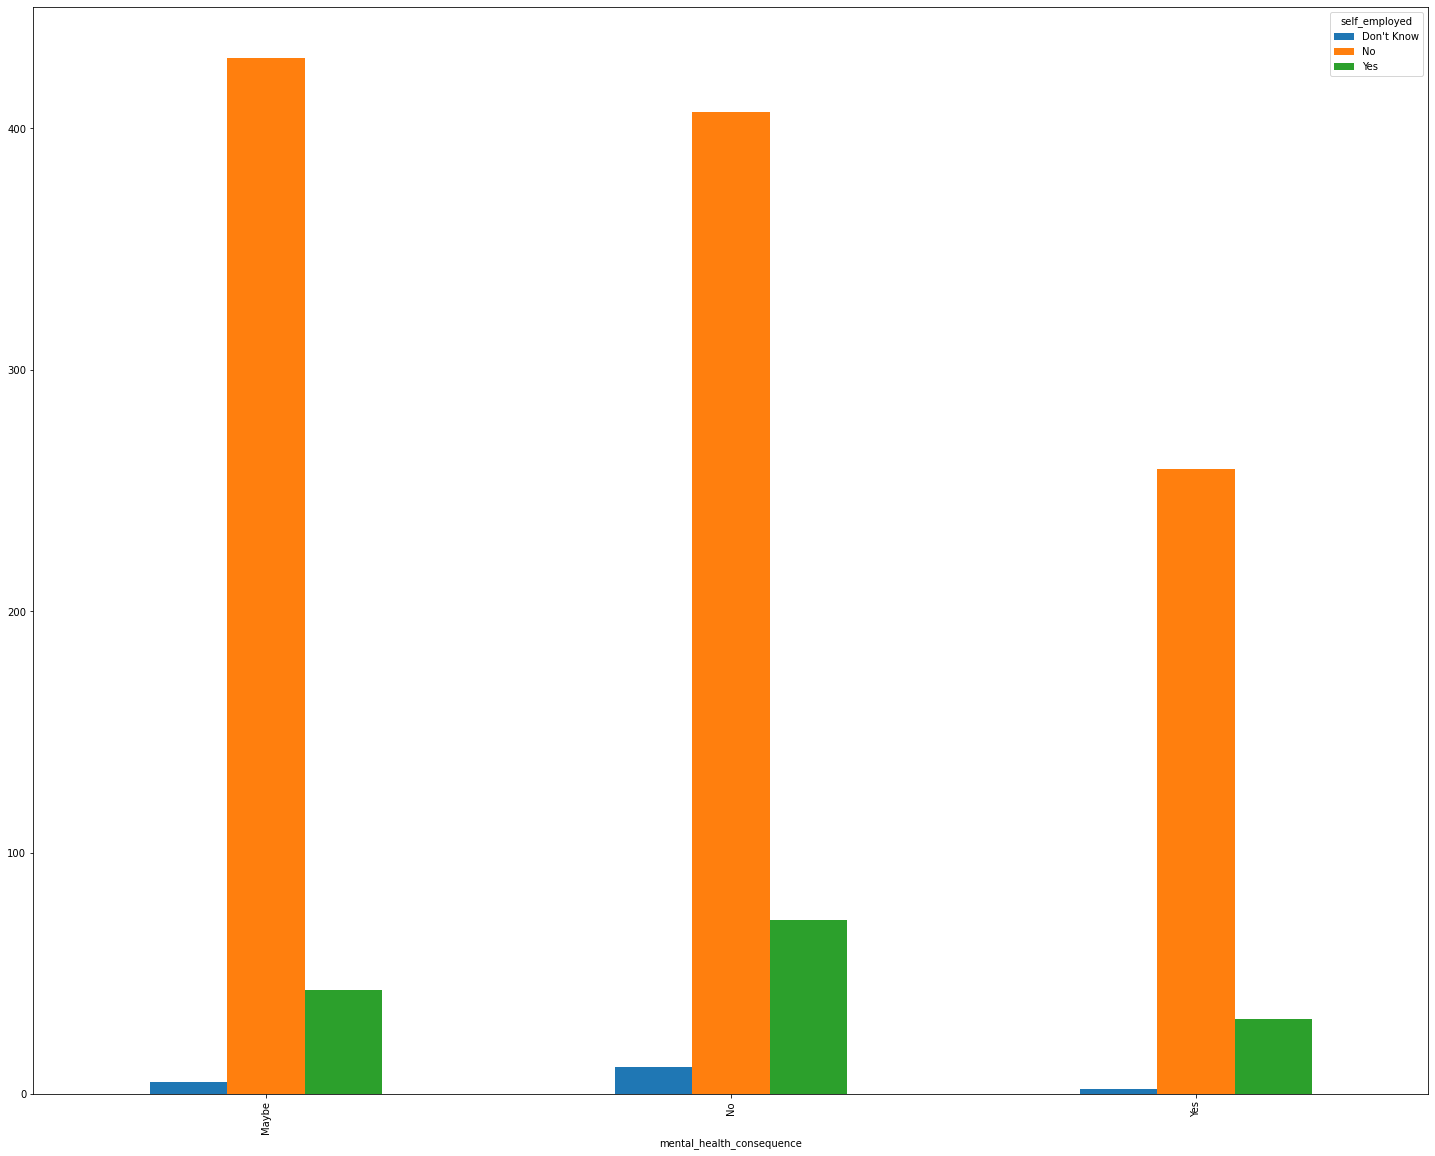

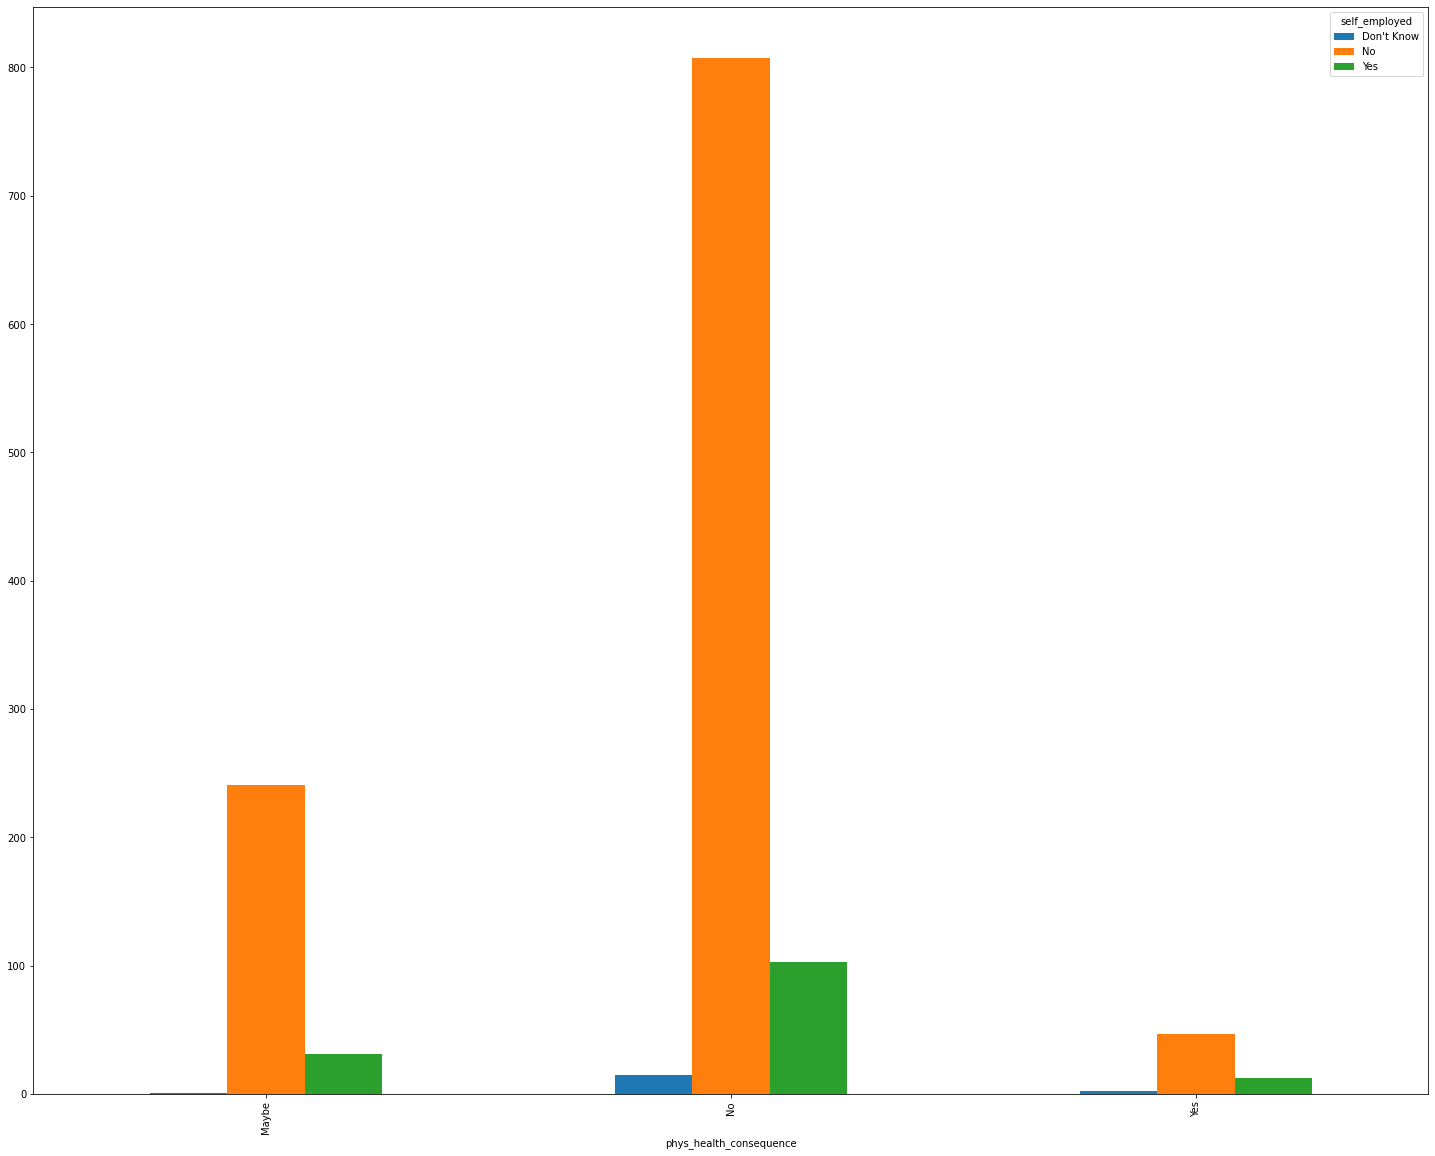

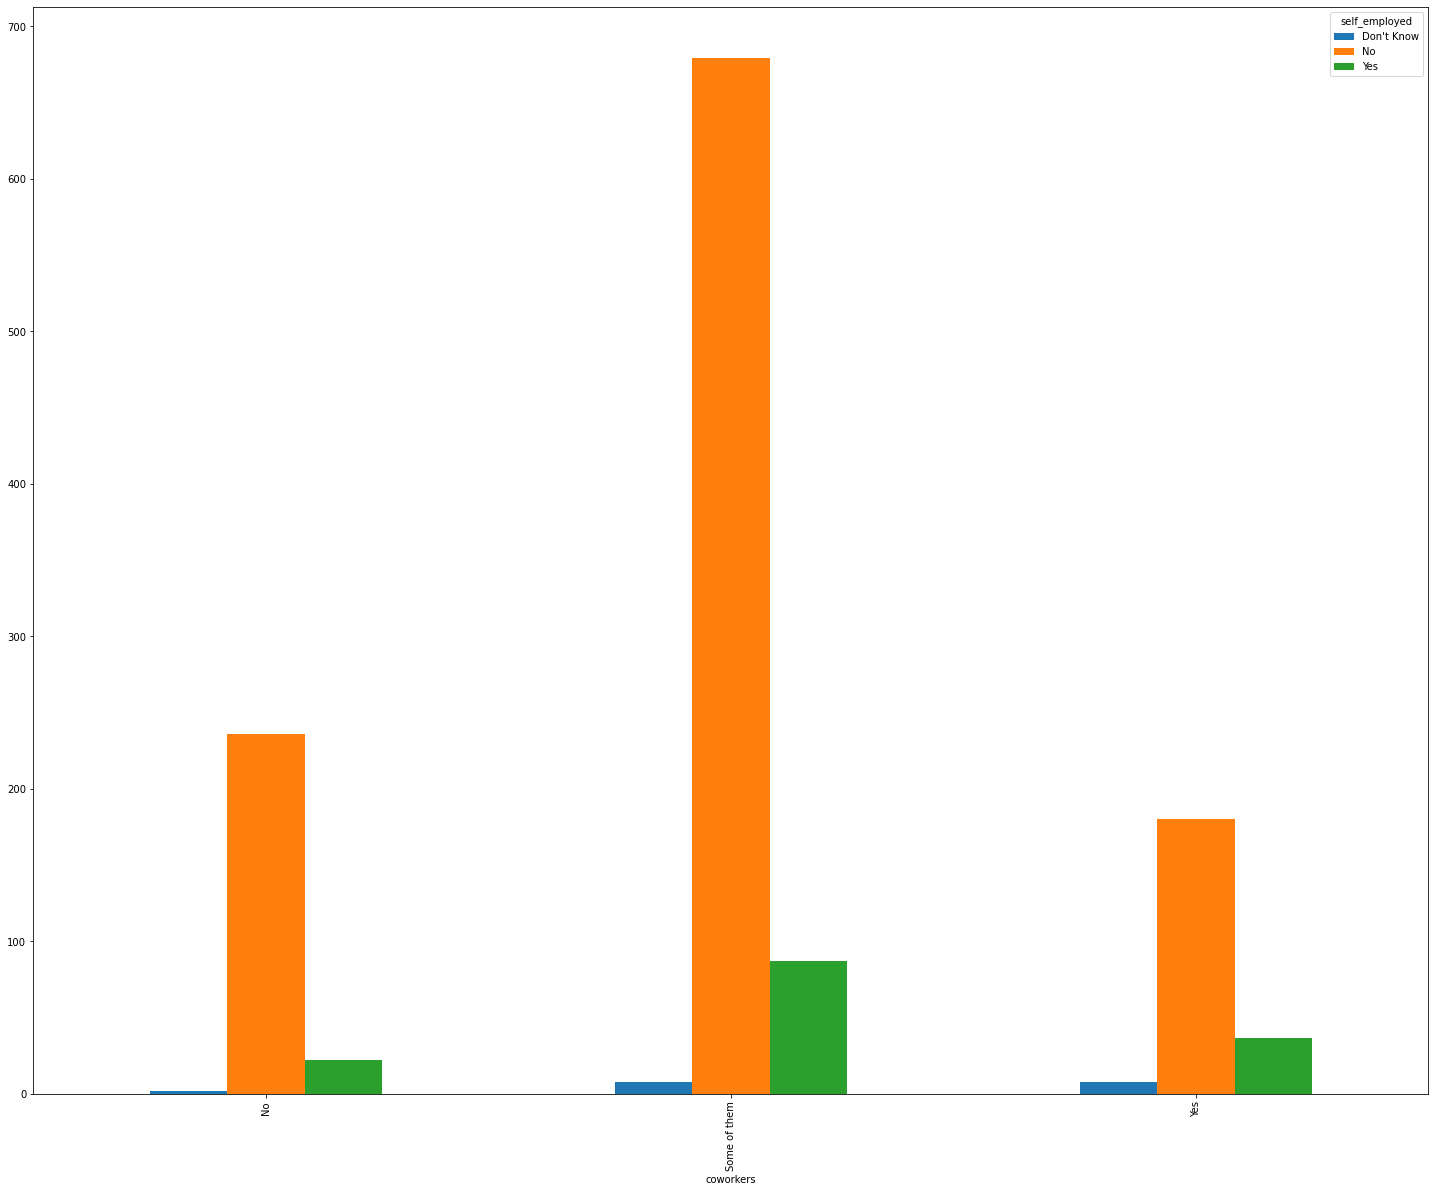

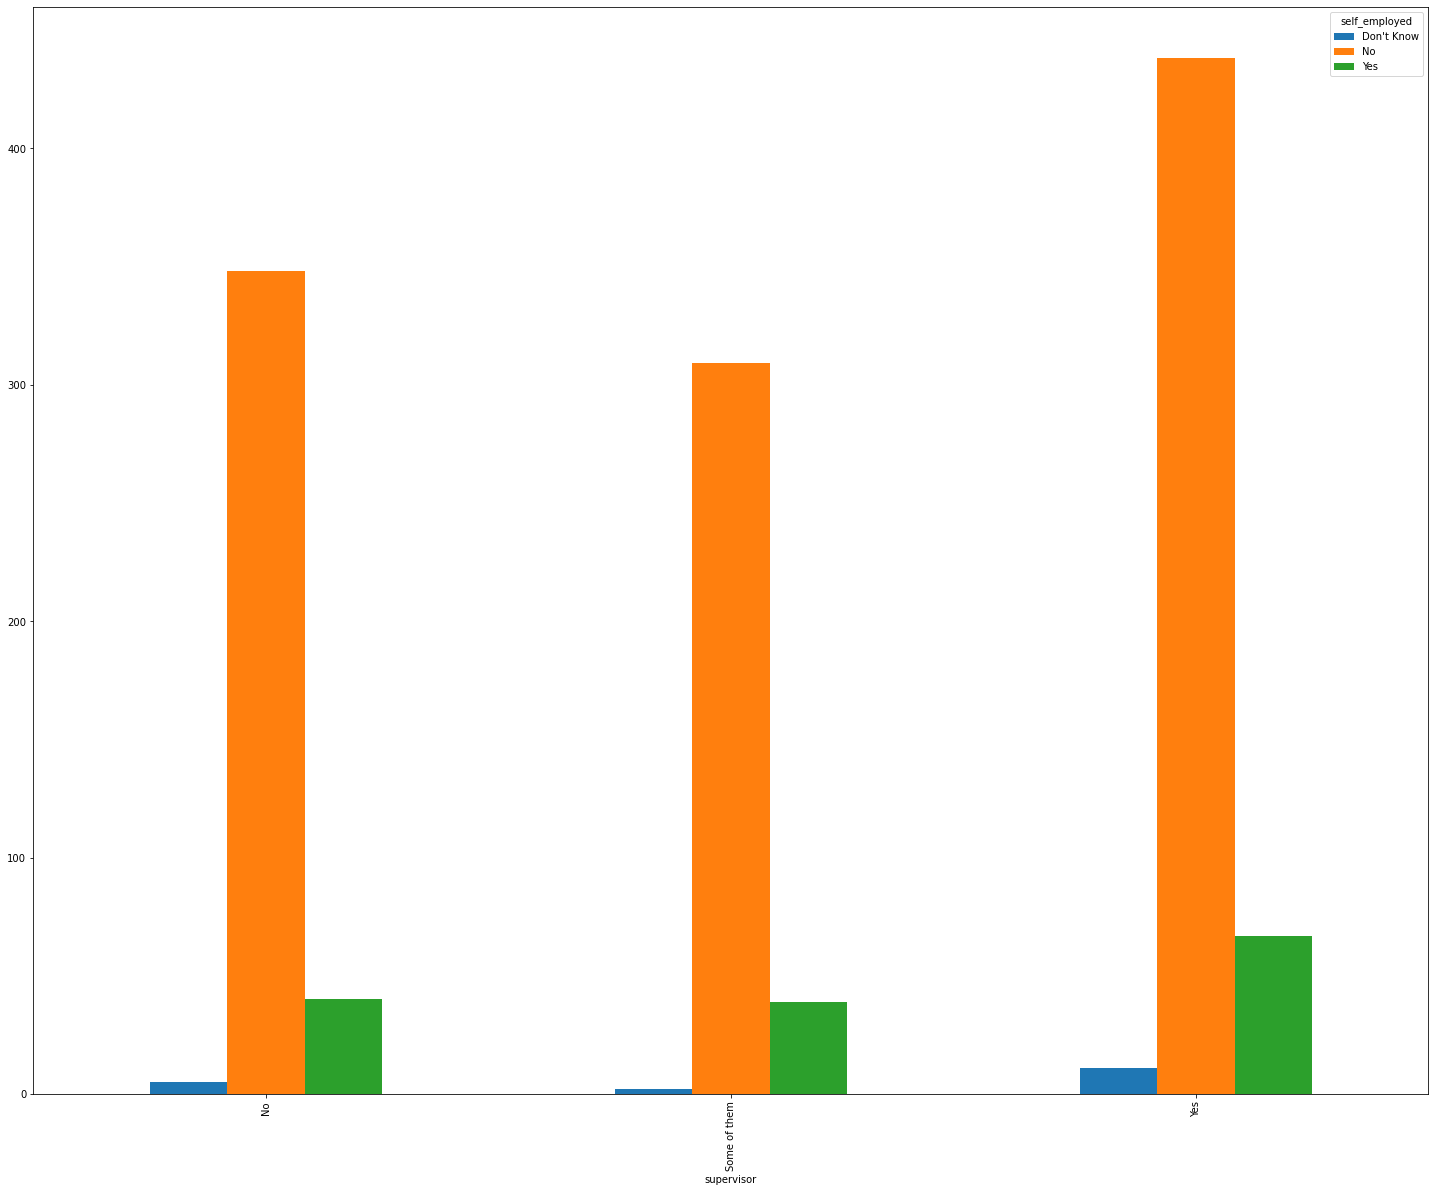

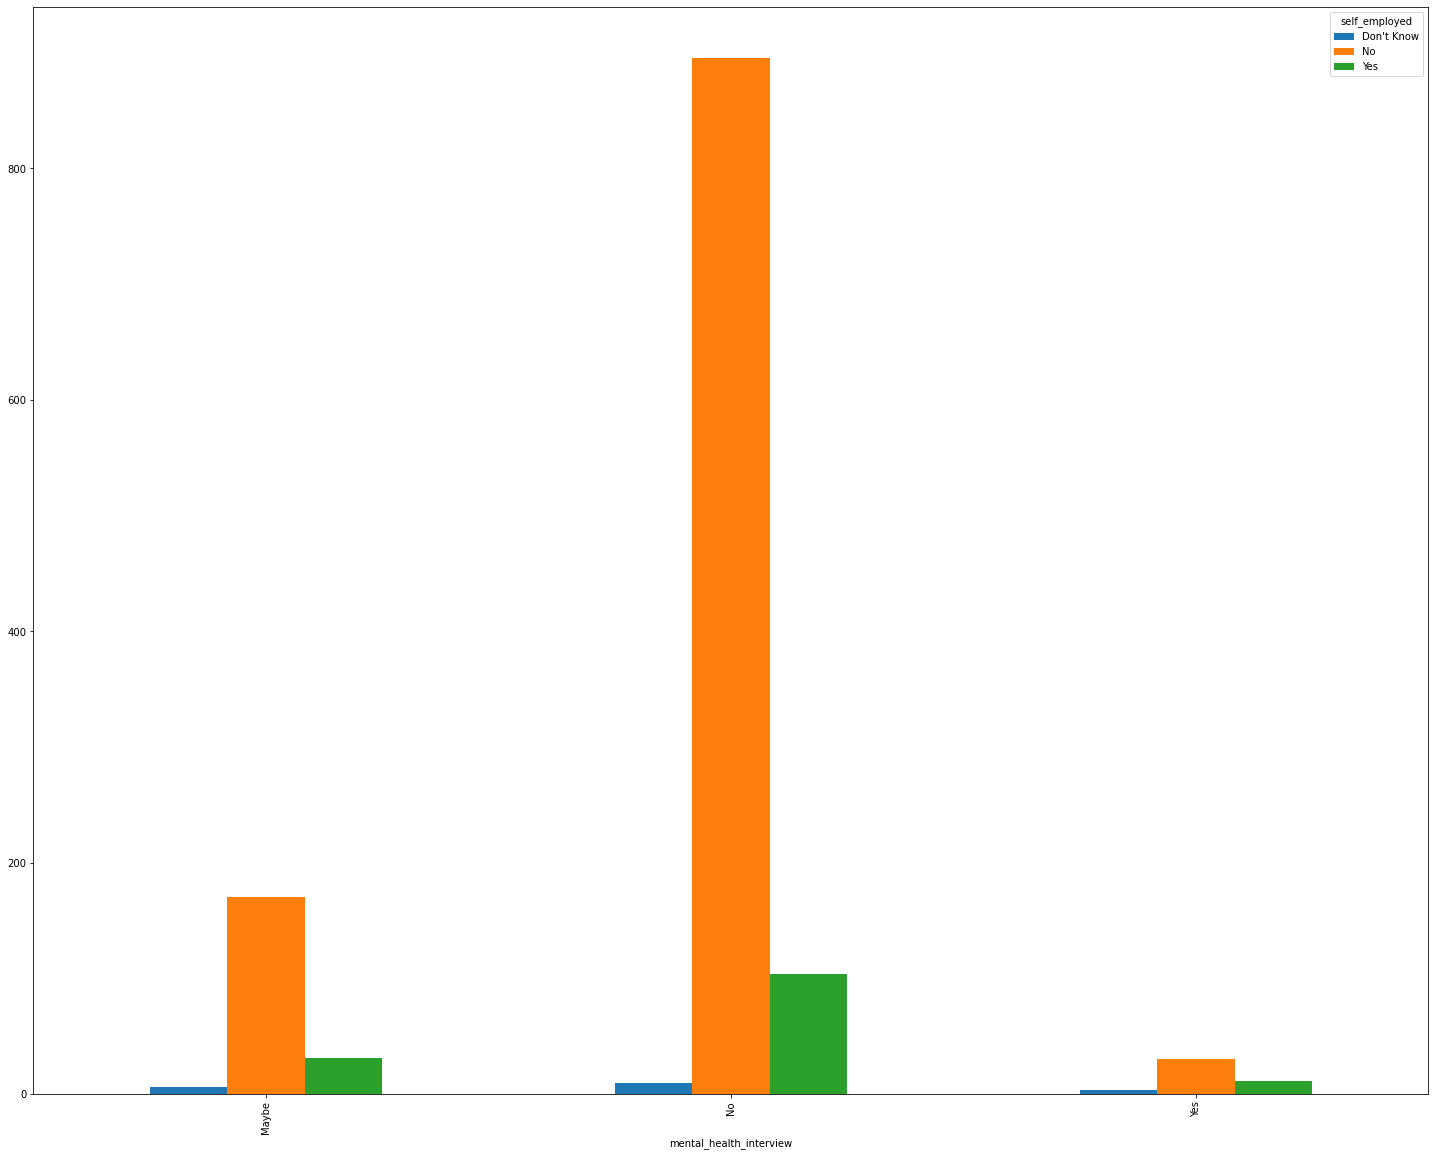

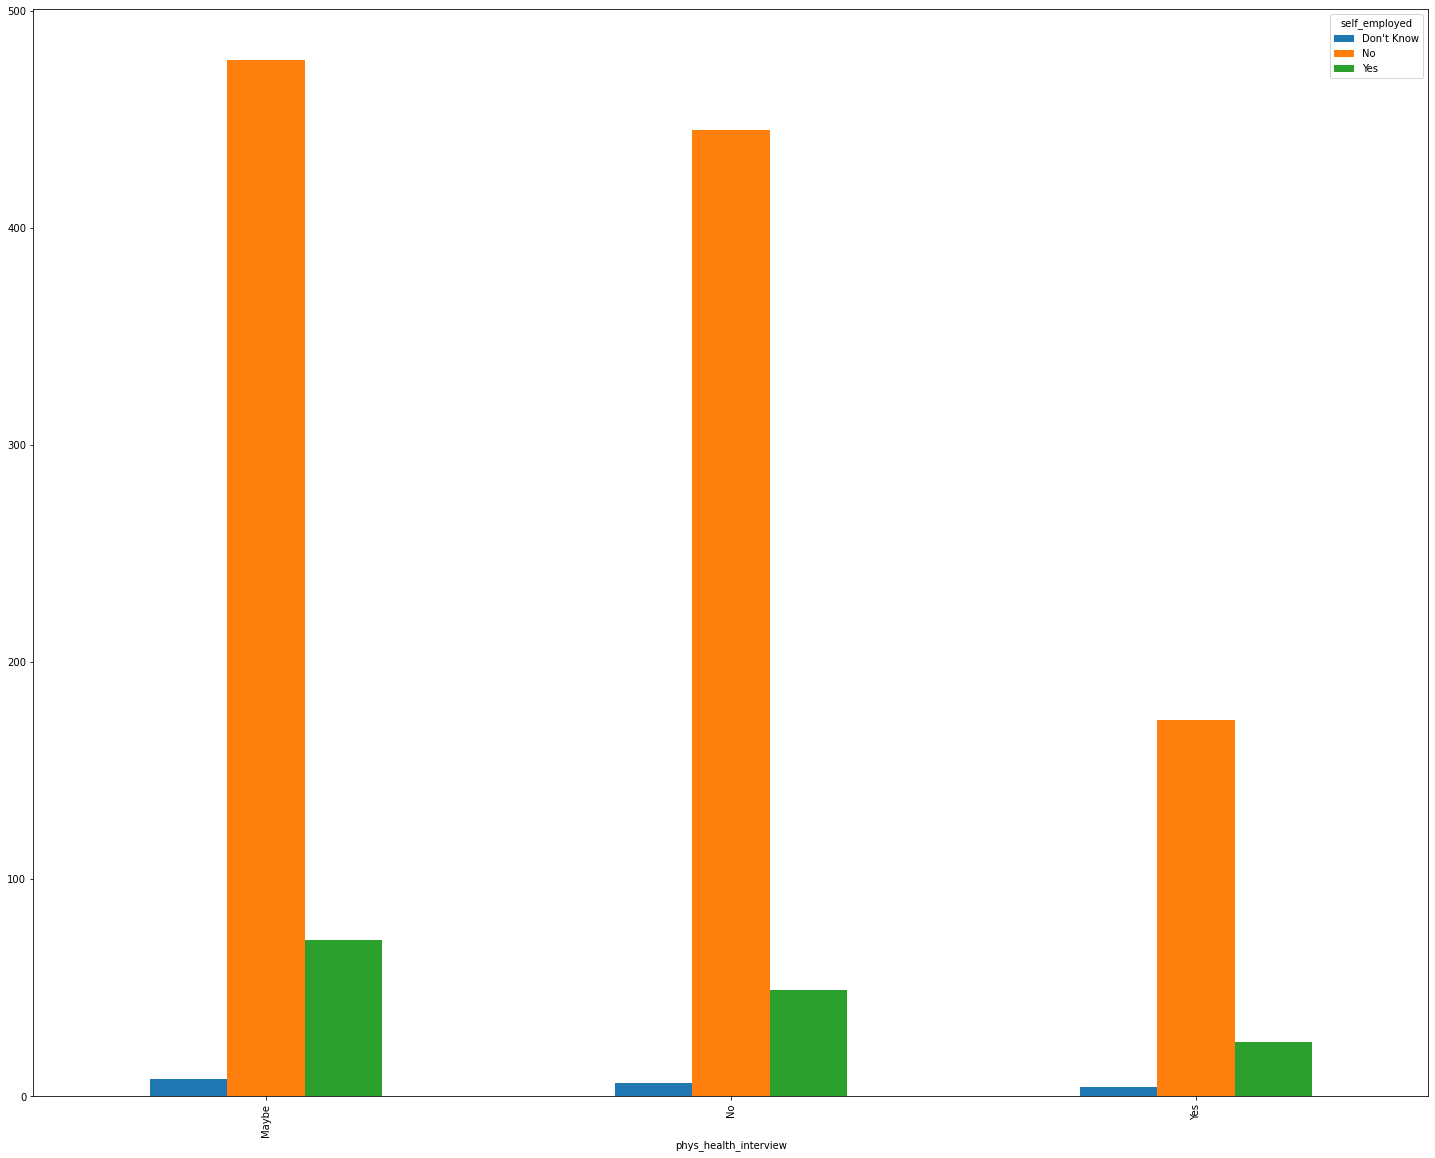

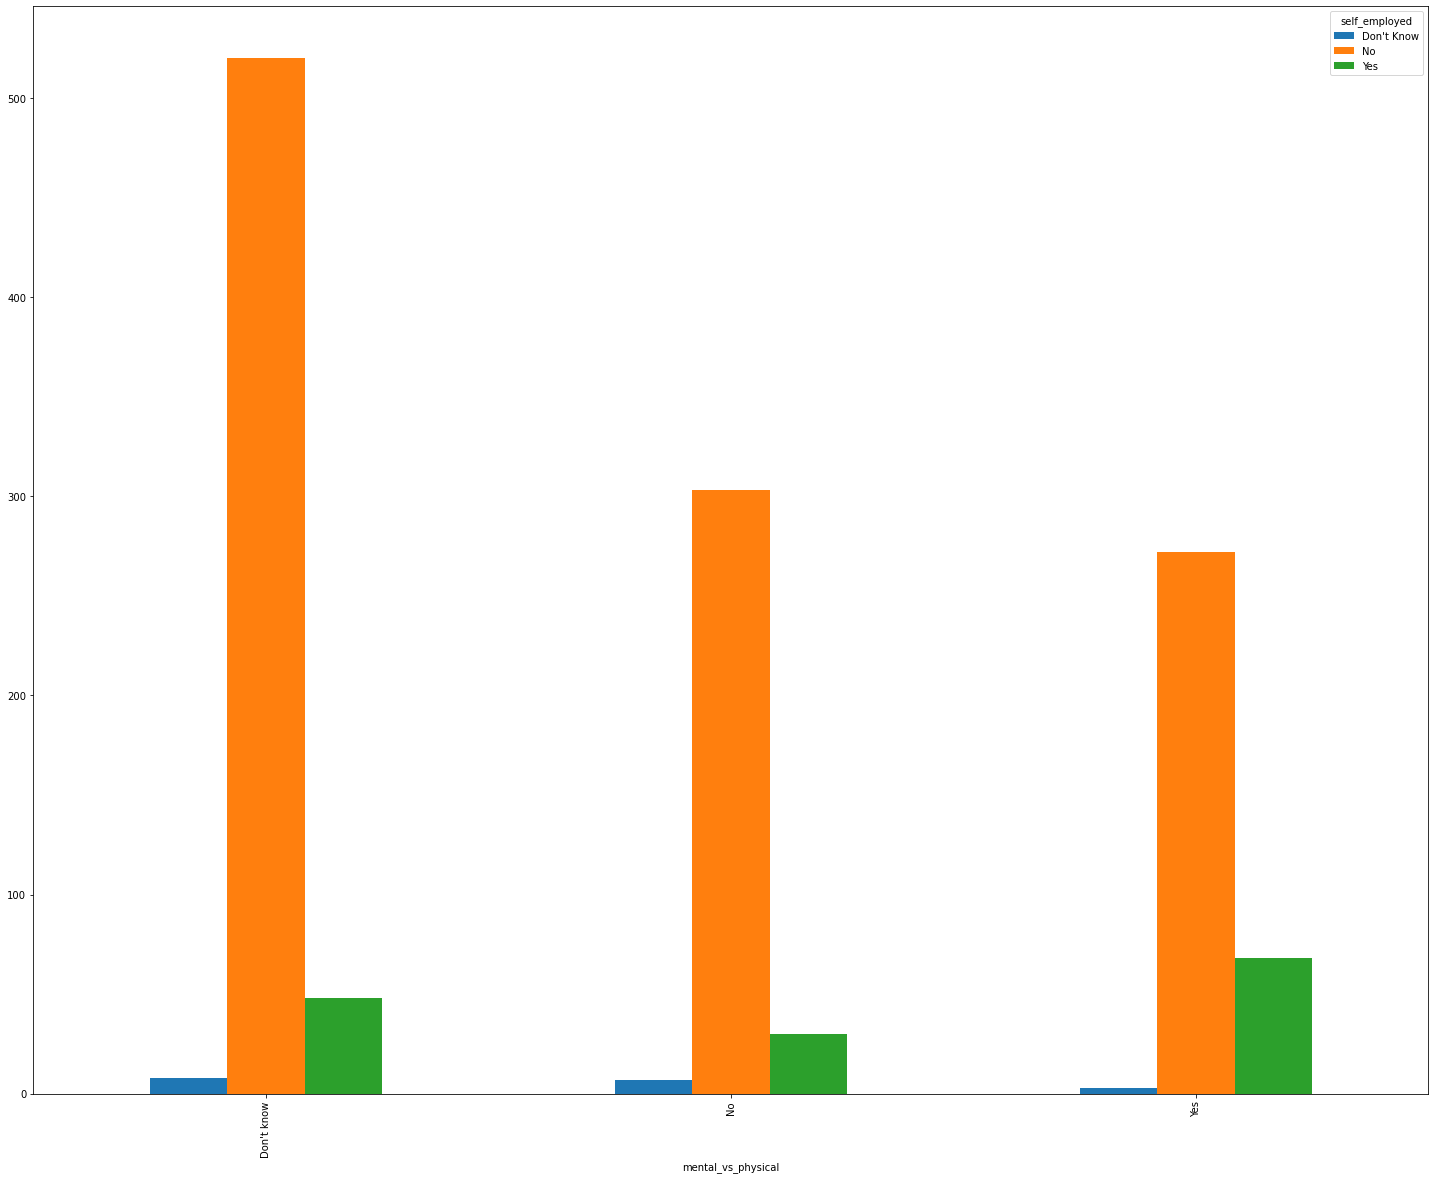

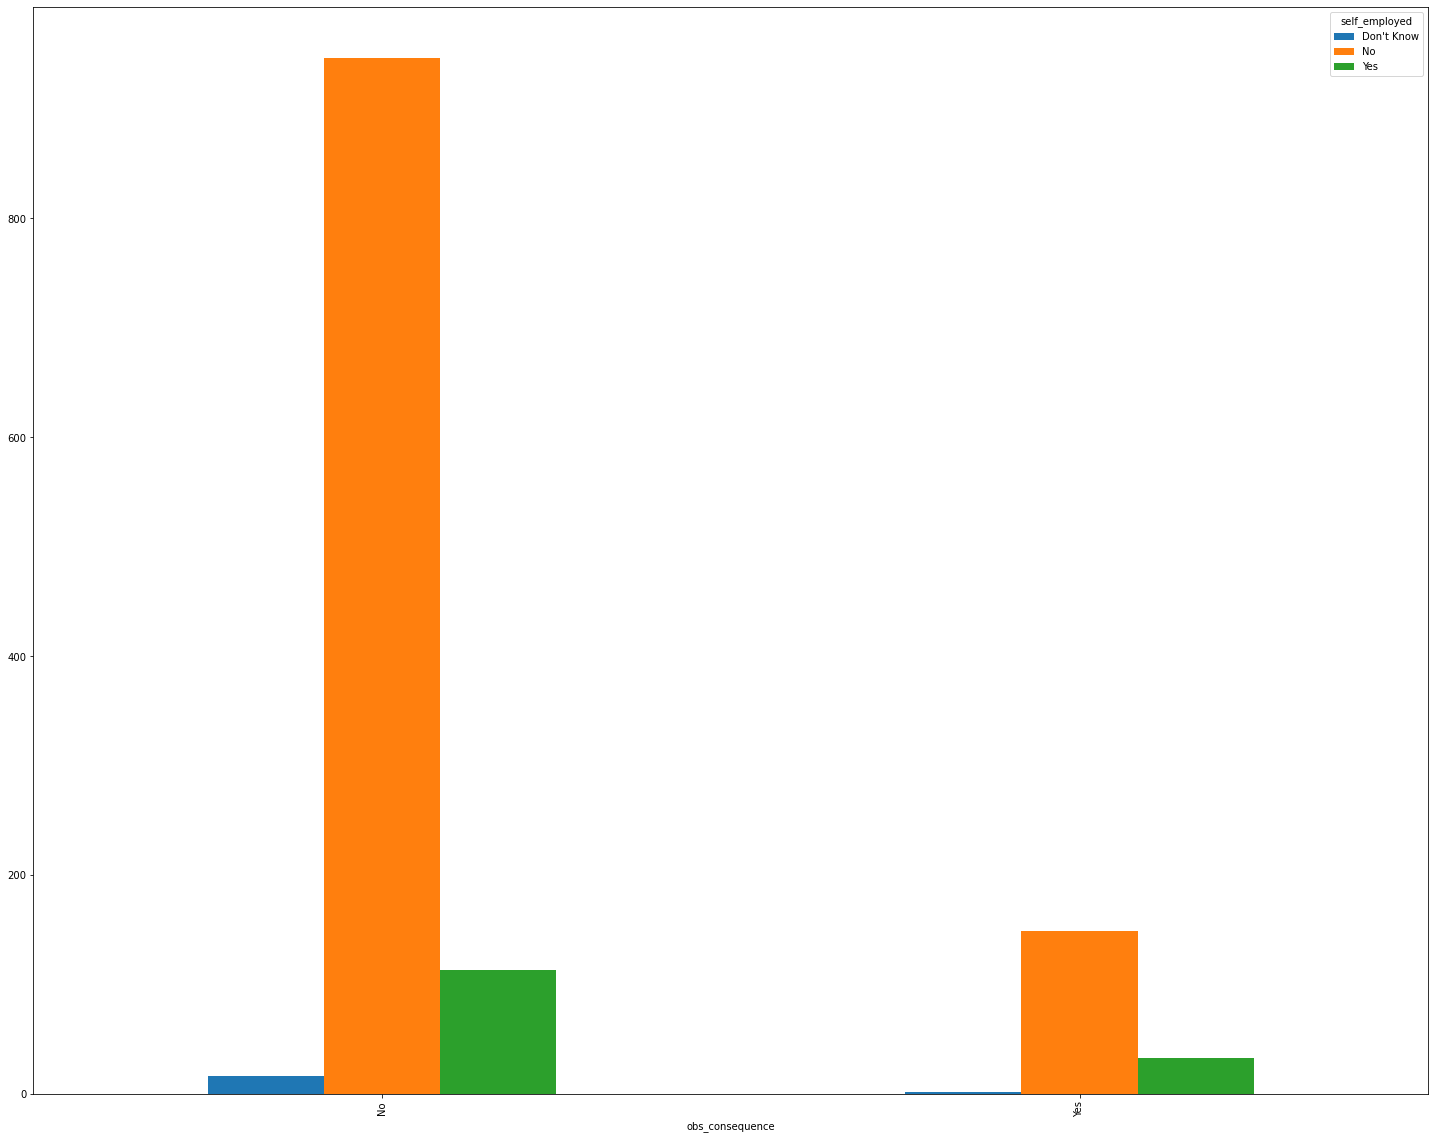

In [29]:
for i,col in enumerate(categorical_columns.columns):
    cat1=categorical_columns.groupby([col,'self_employed'])['self_employed'].count().unstack()
    cat1.plot(kind='bar',figsize=(25,20))

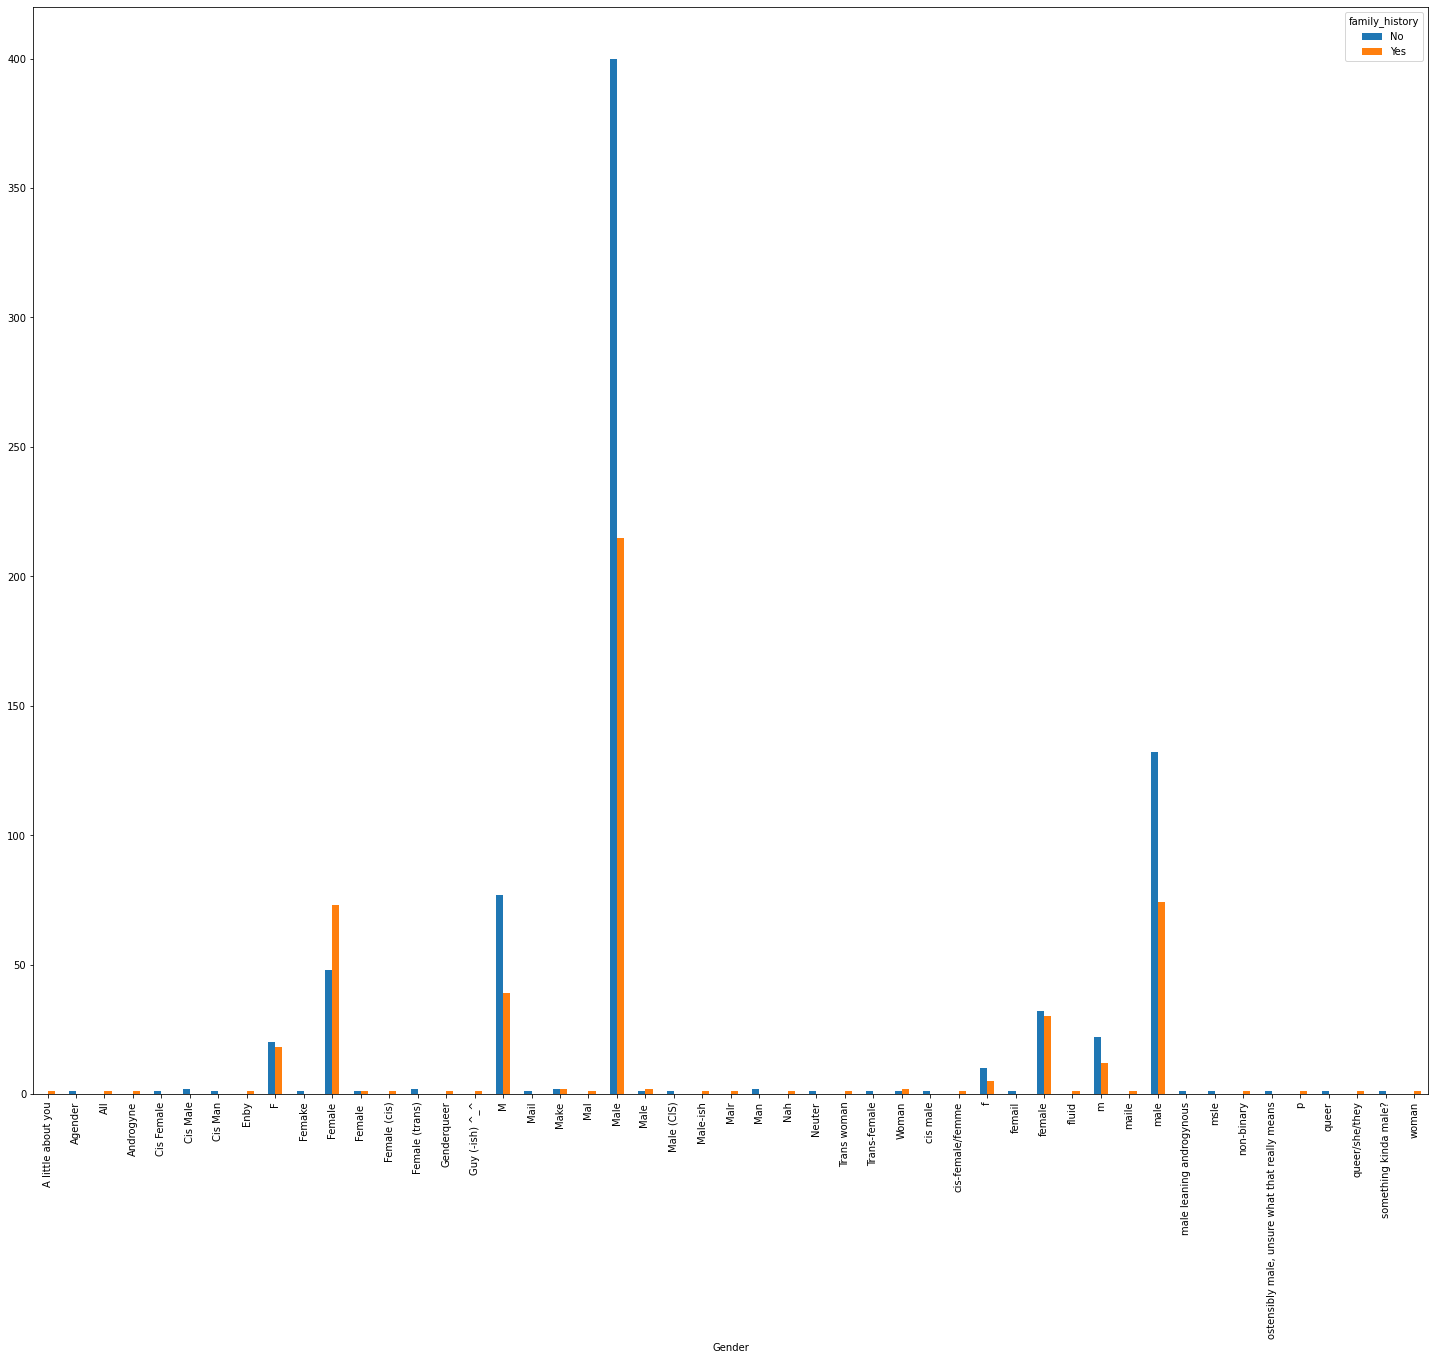

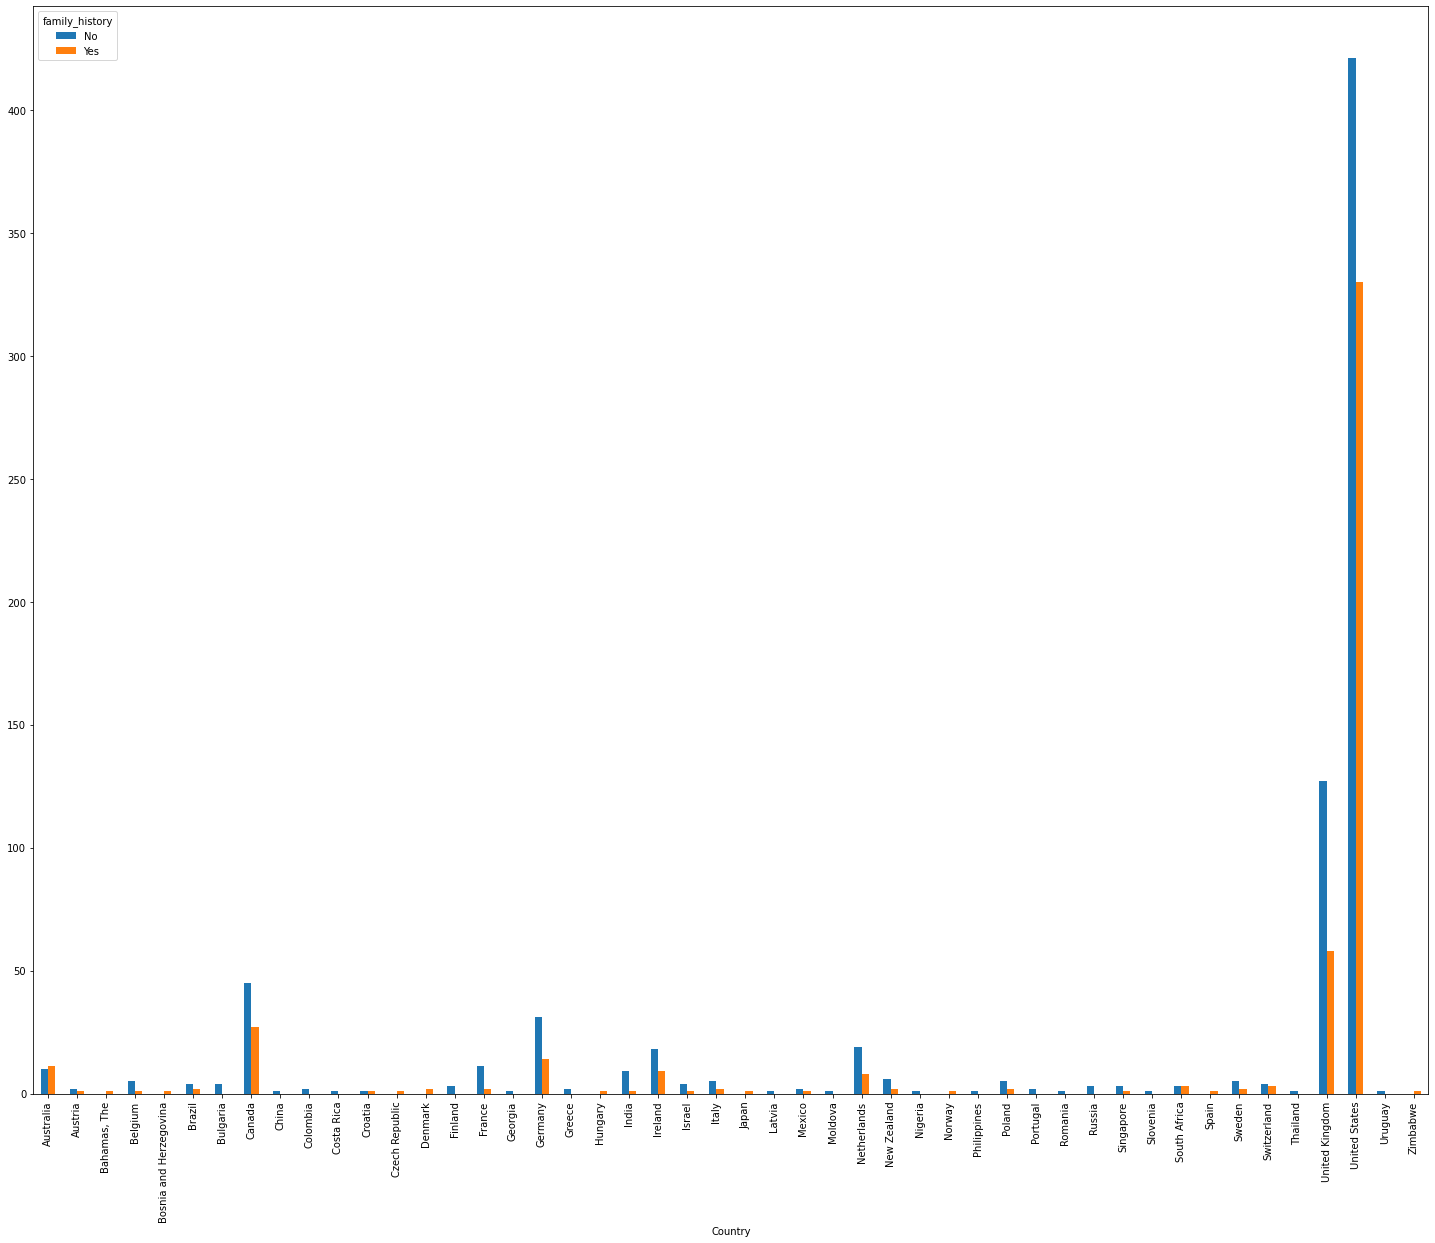

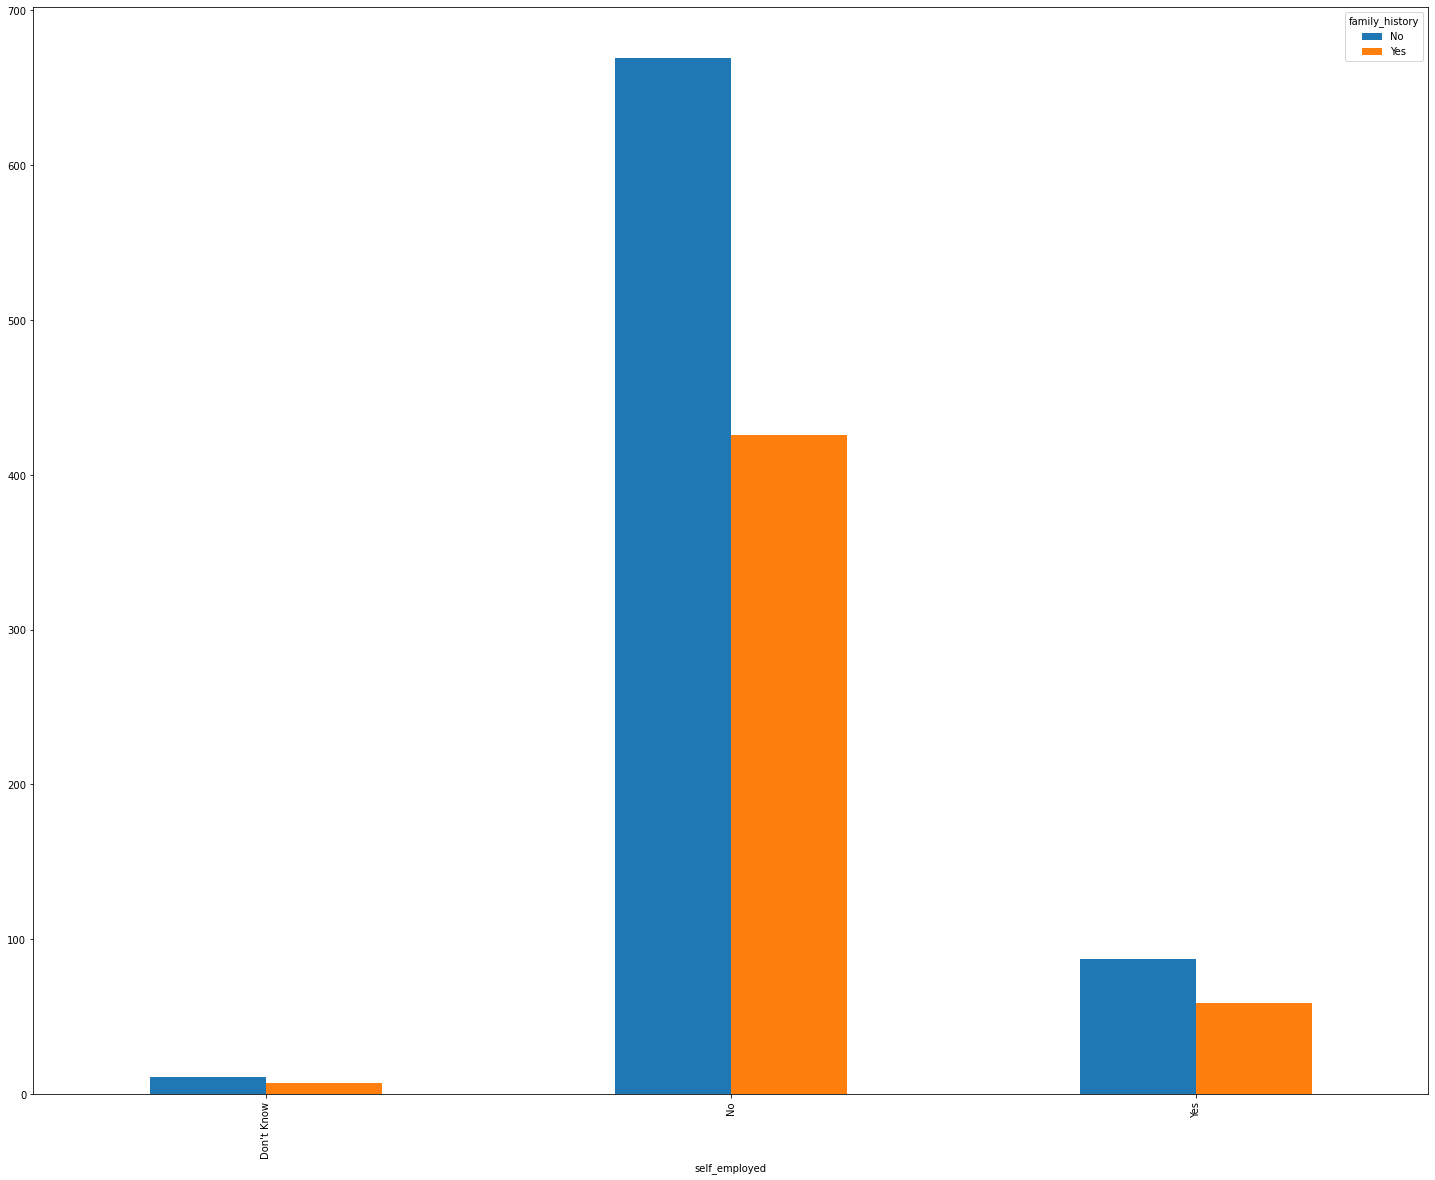

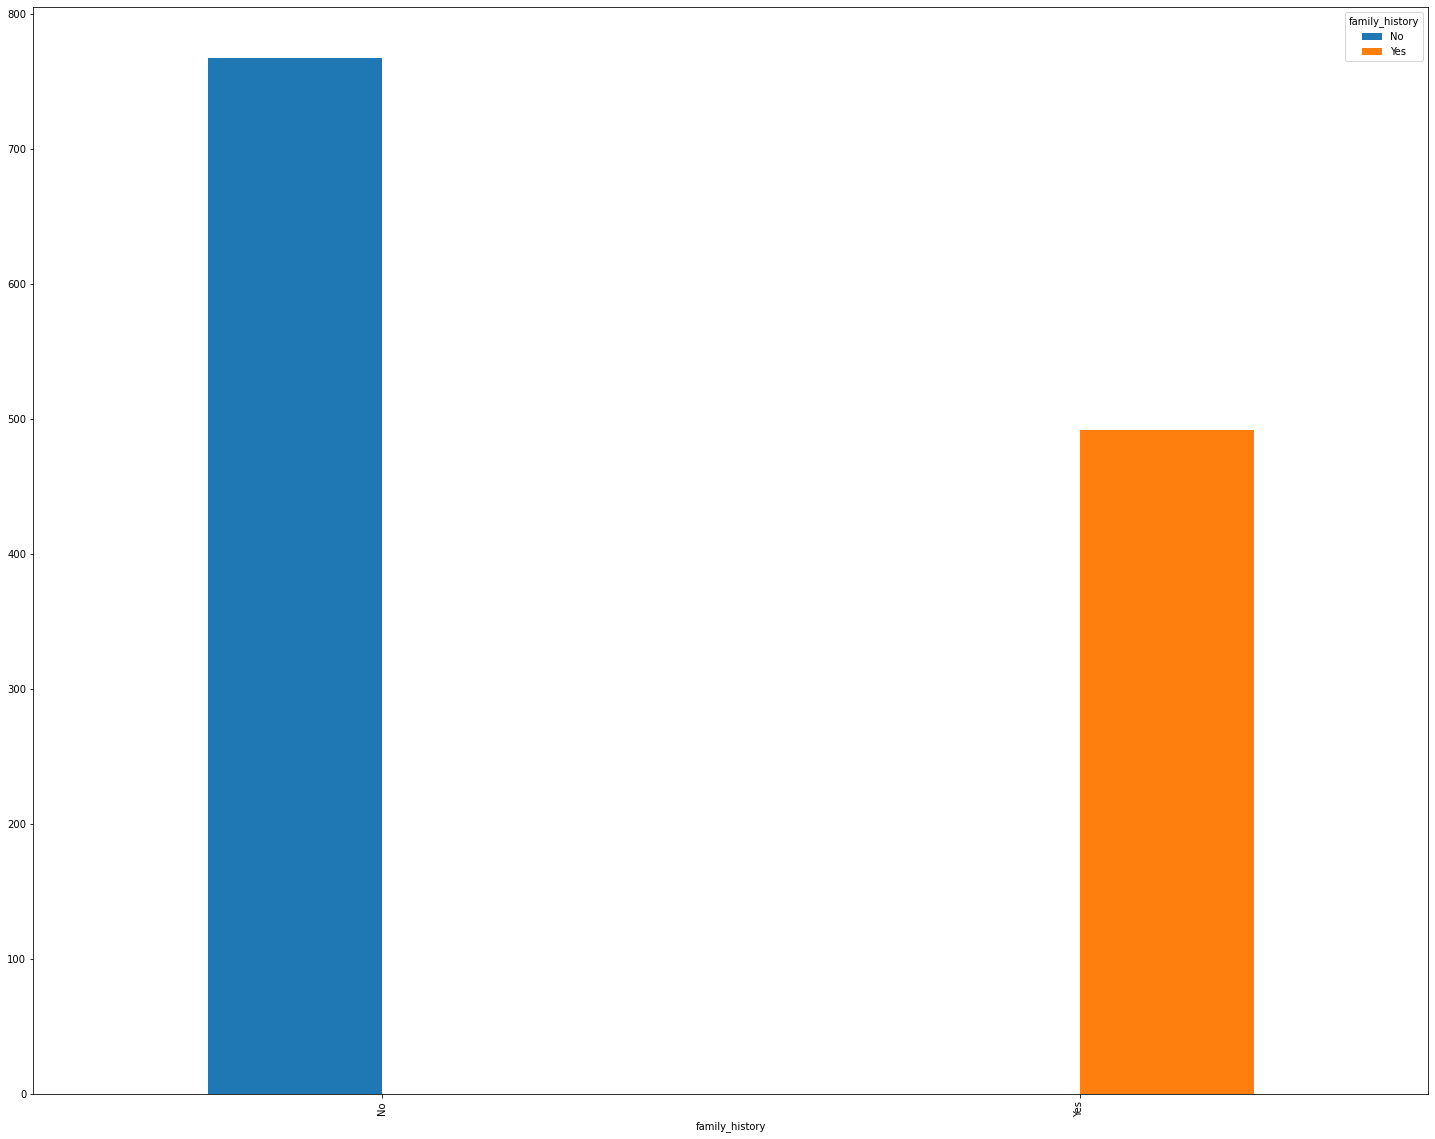

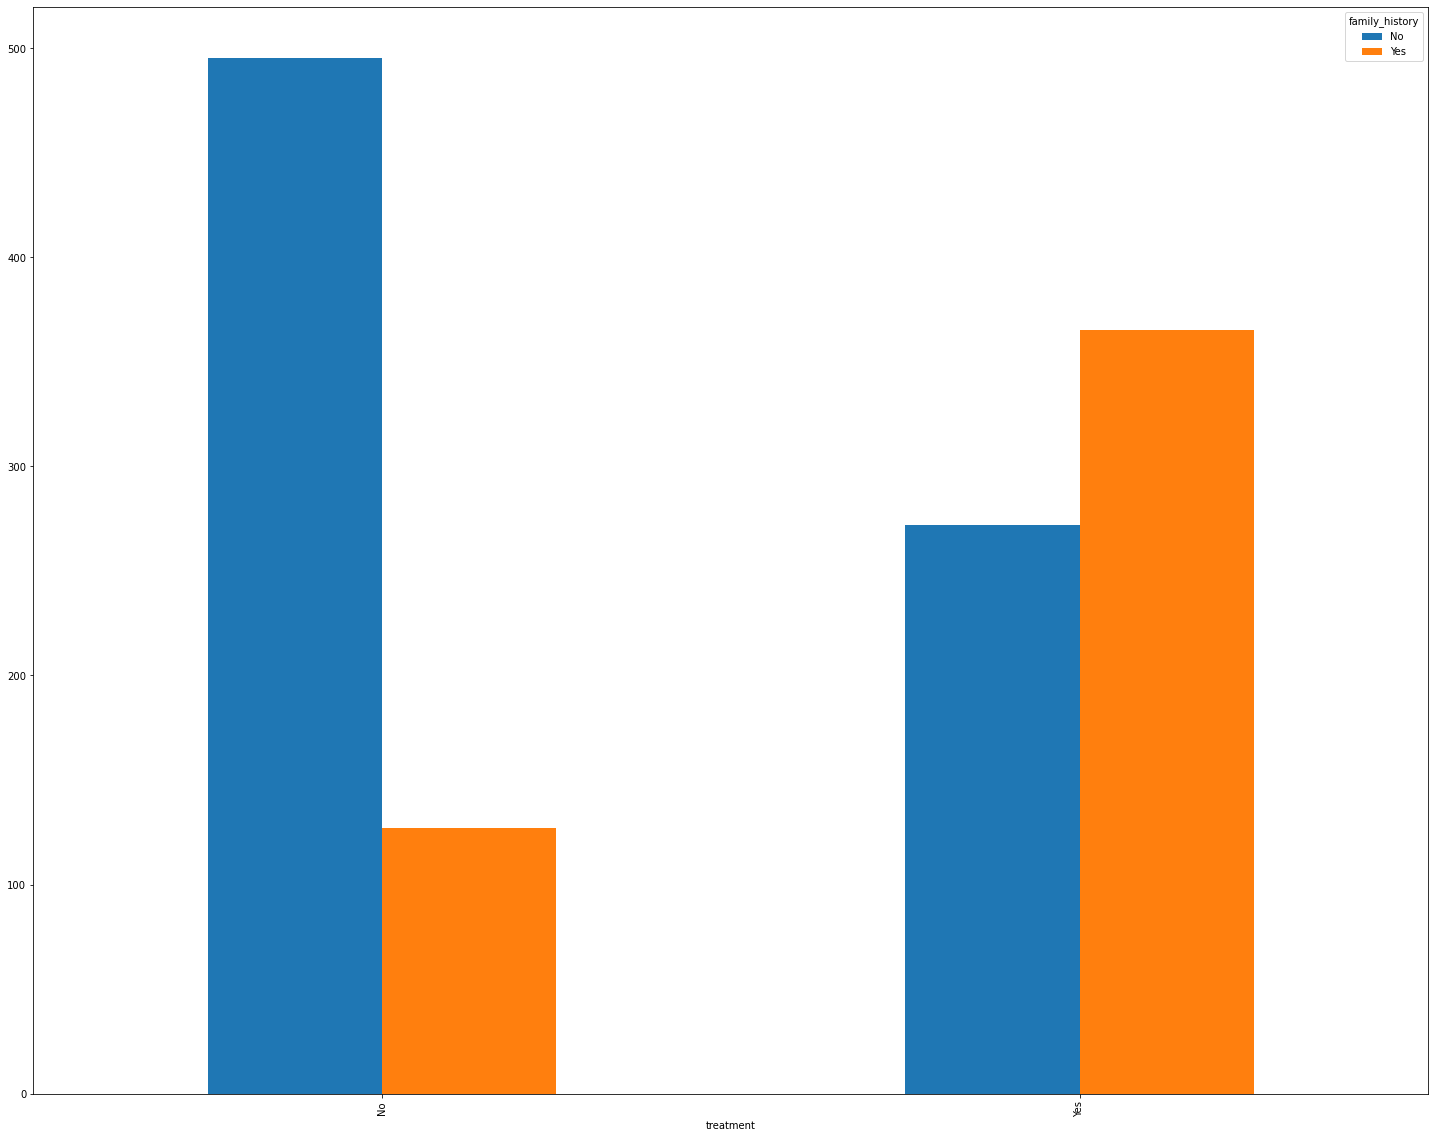

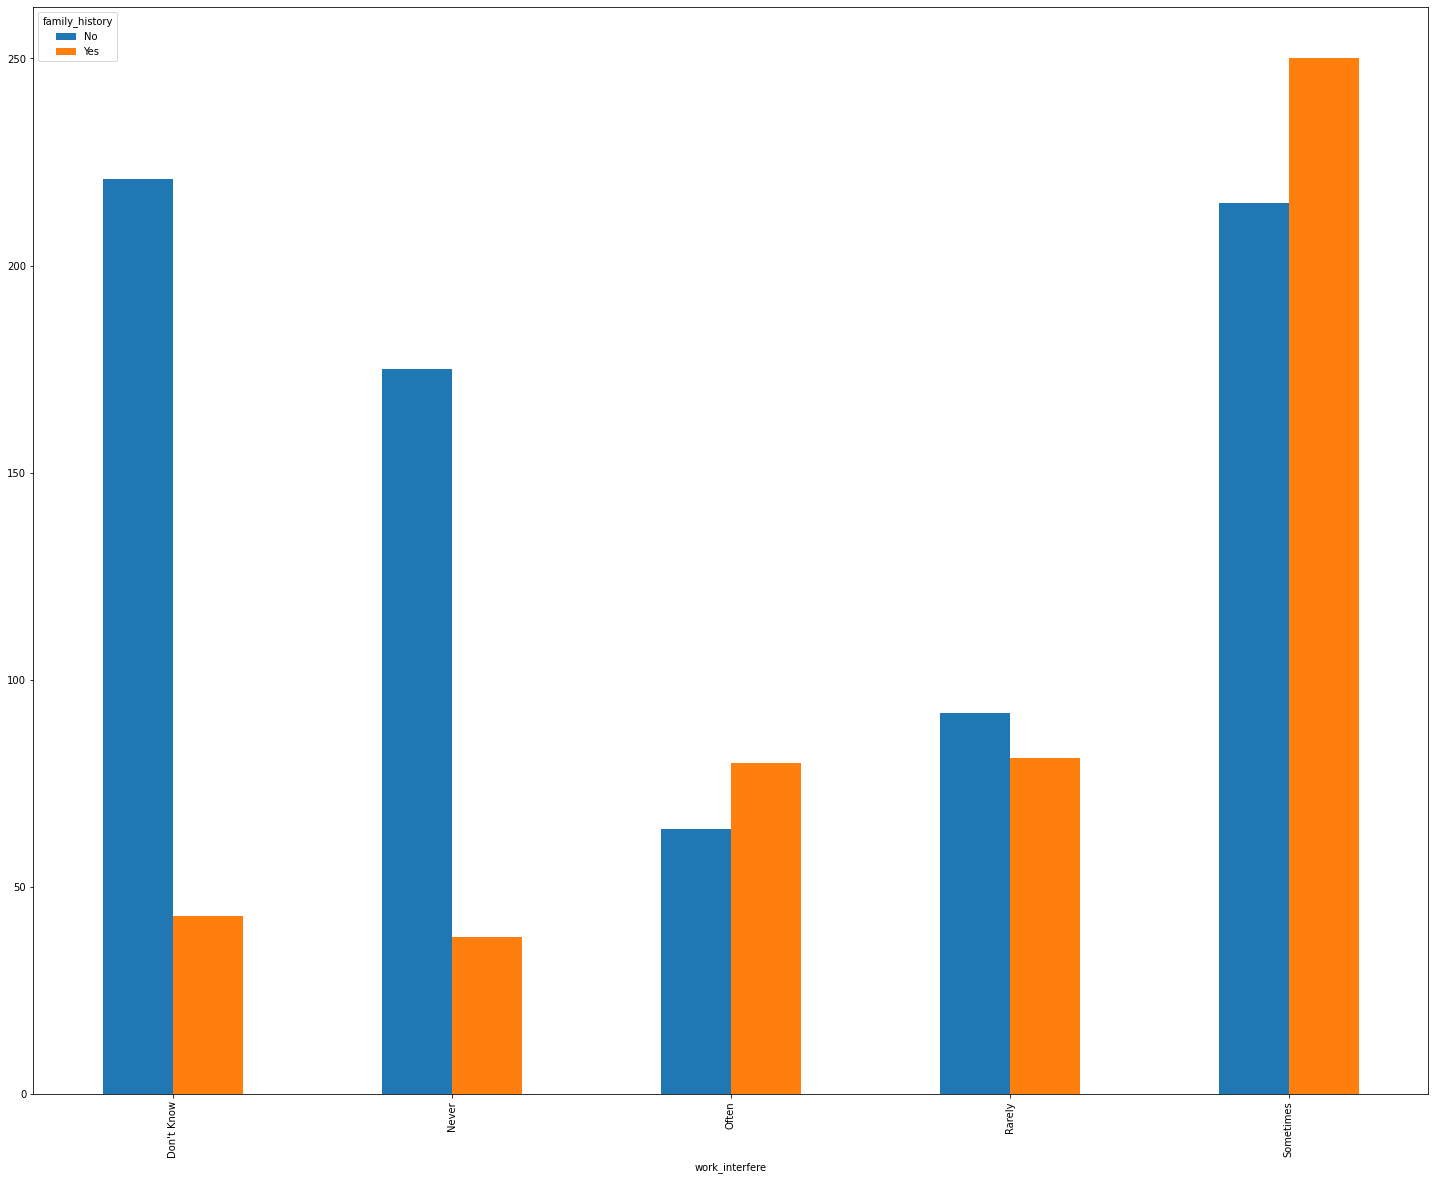

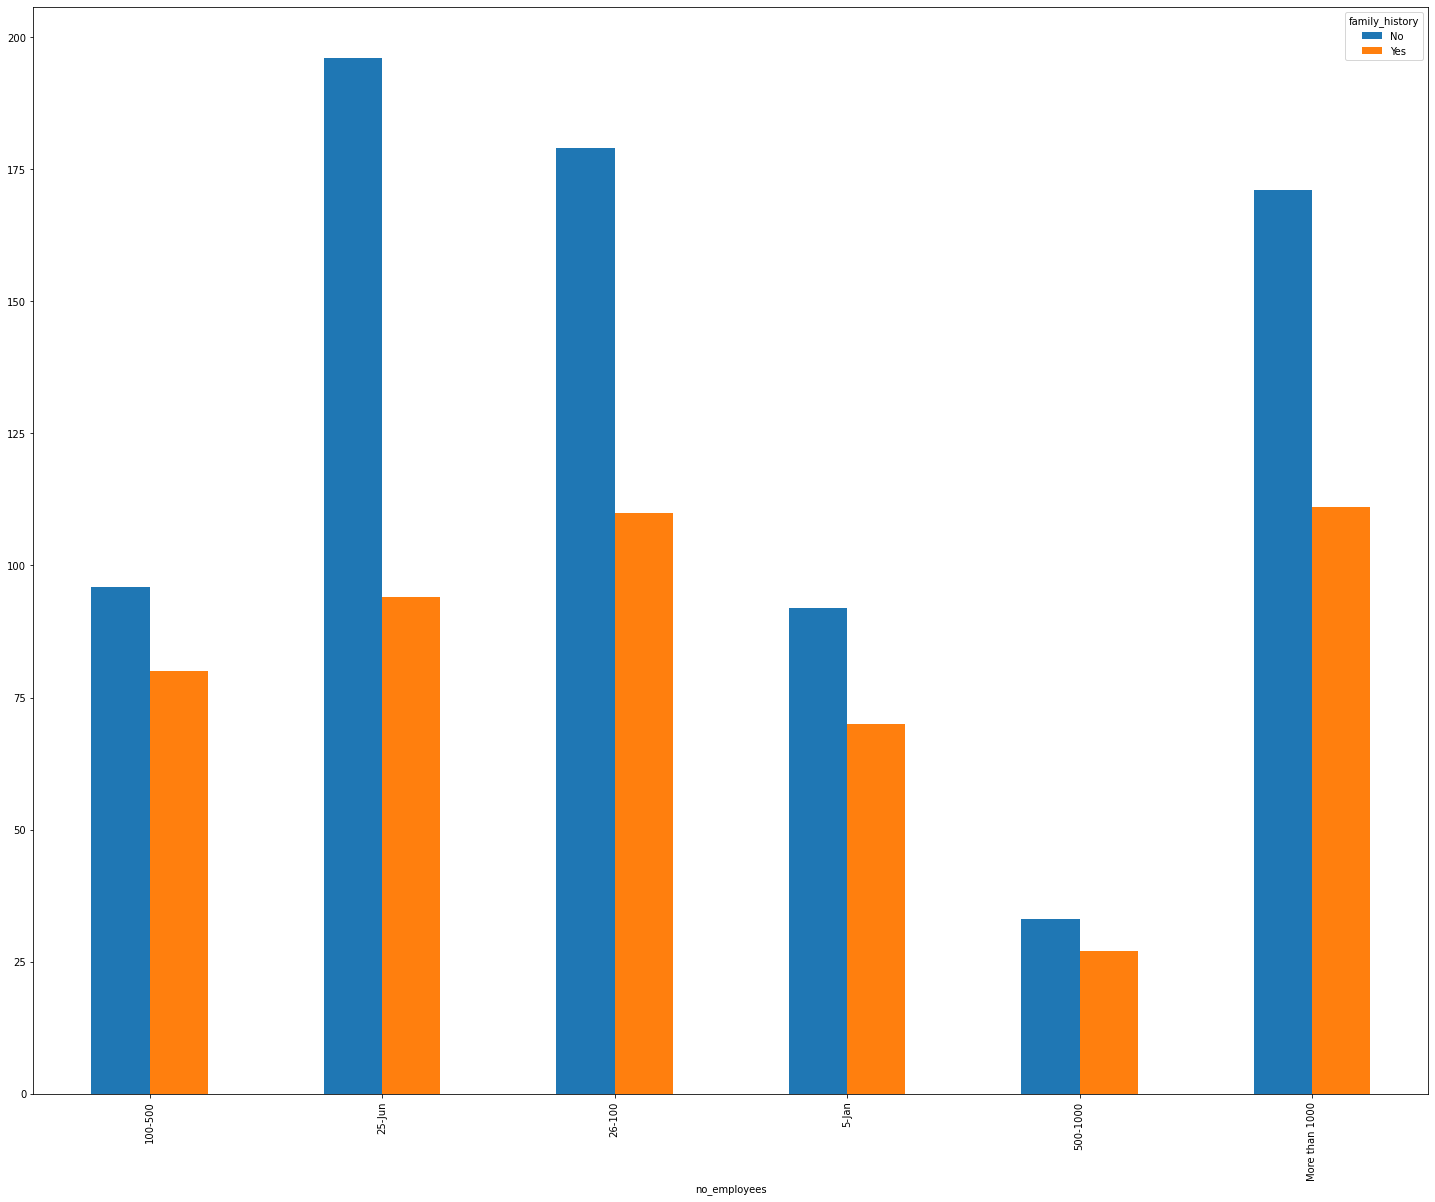

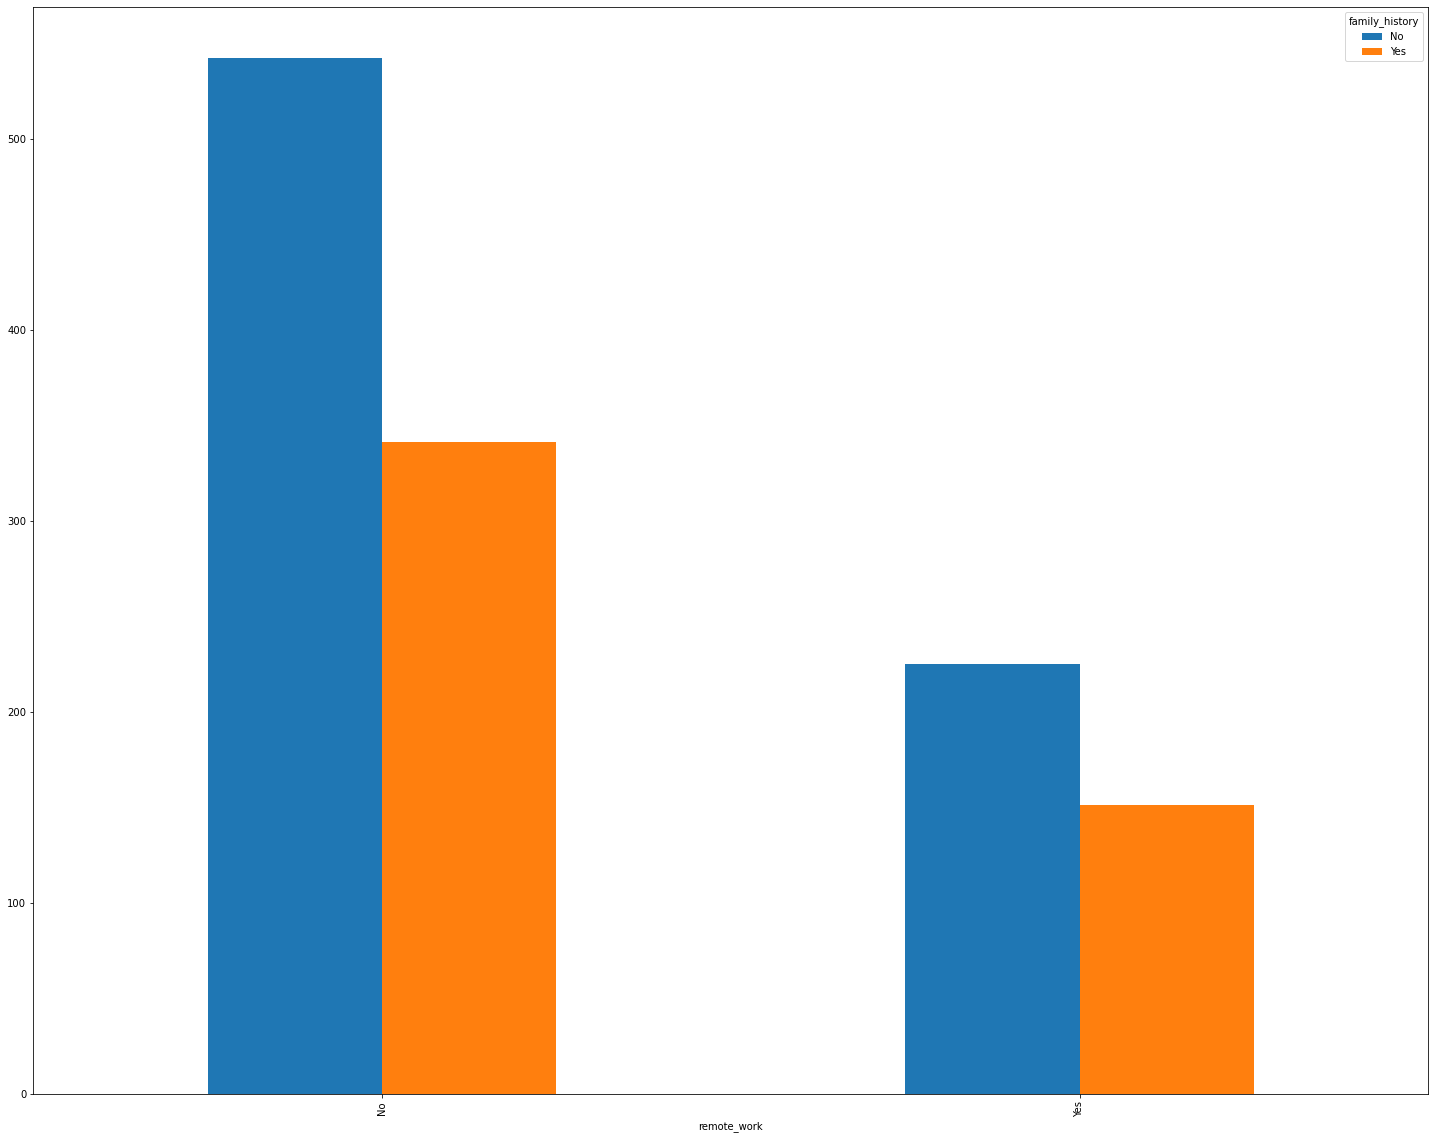

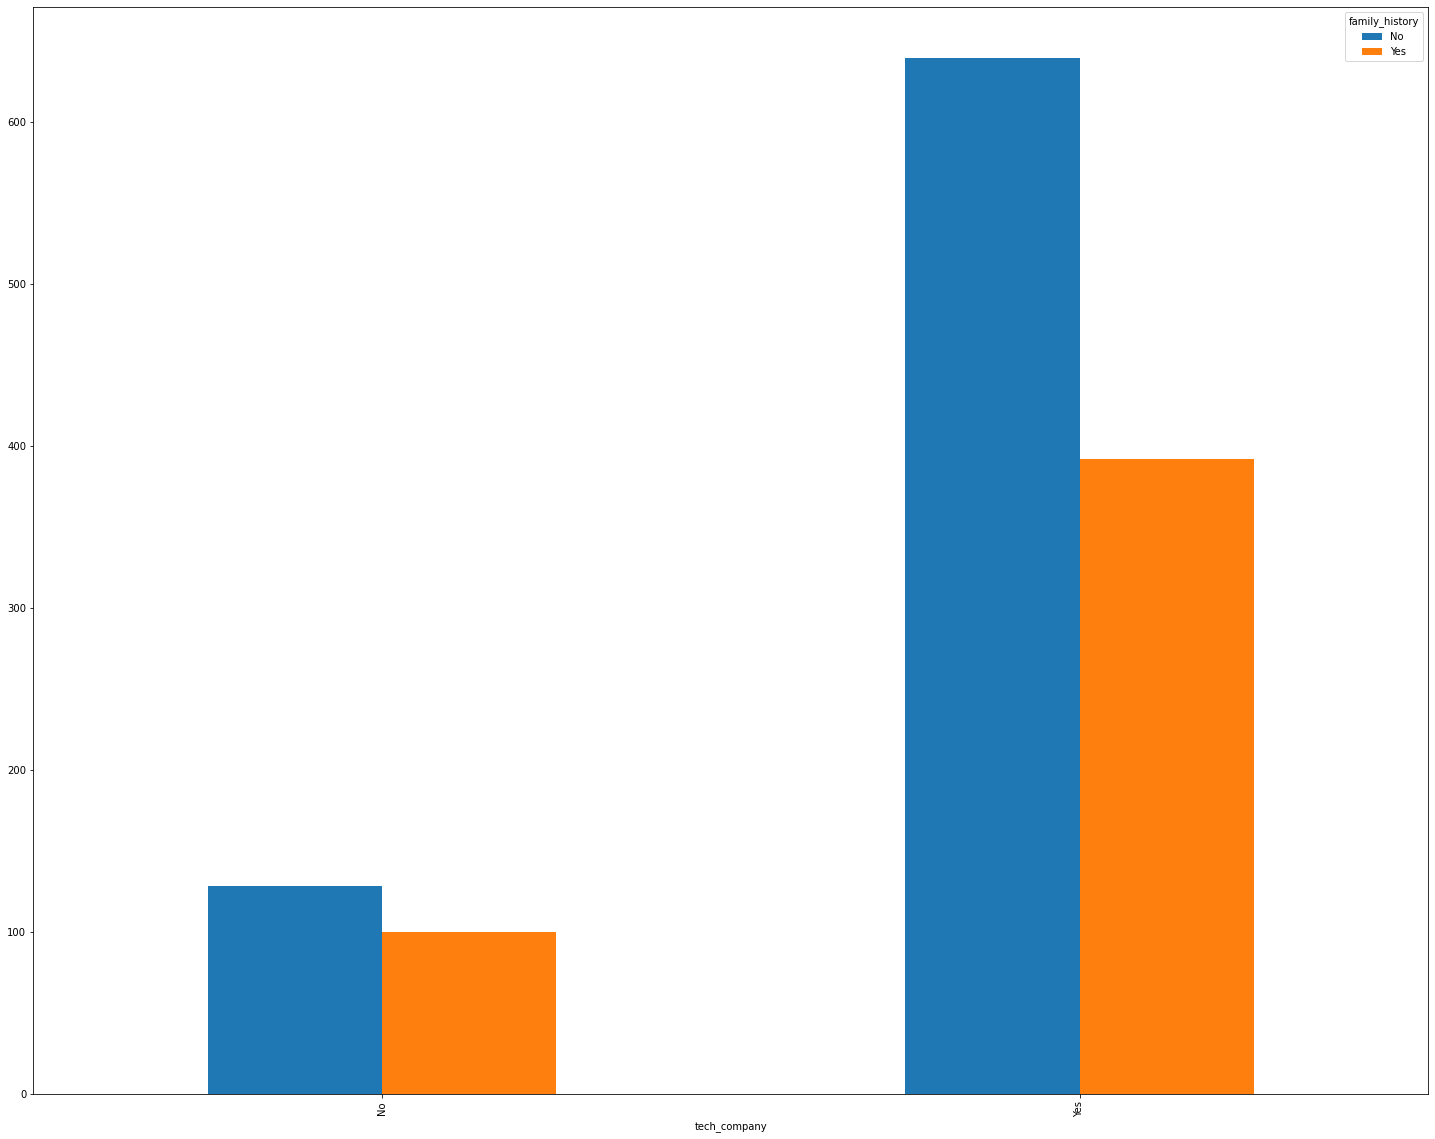

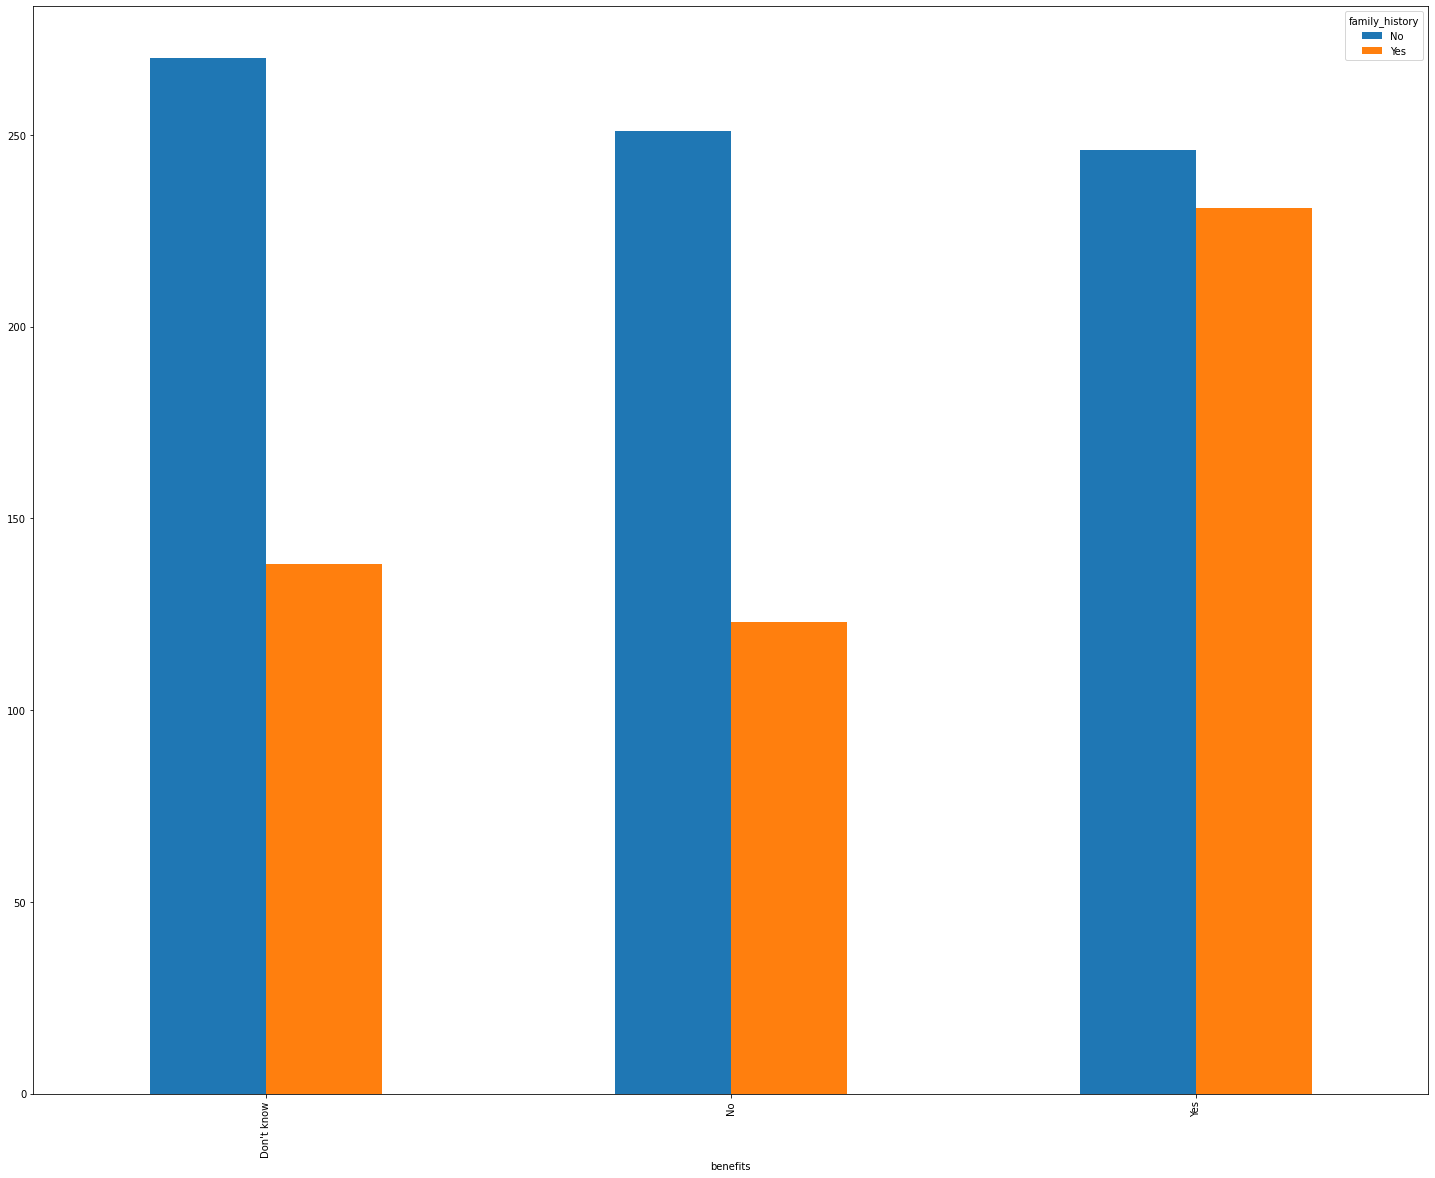

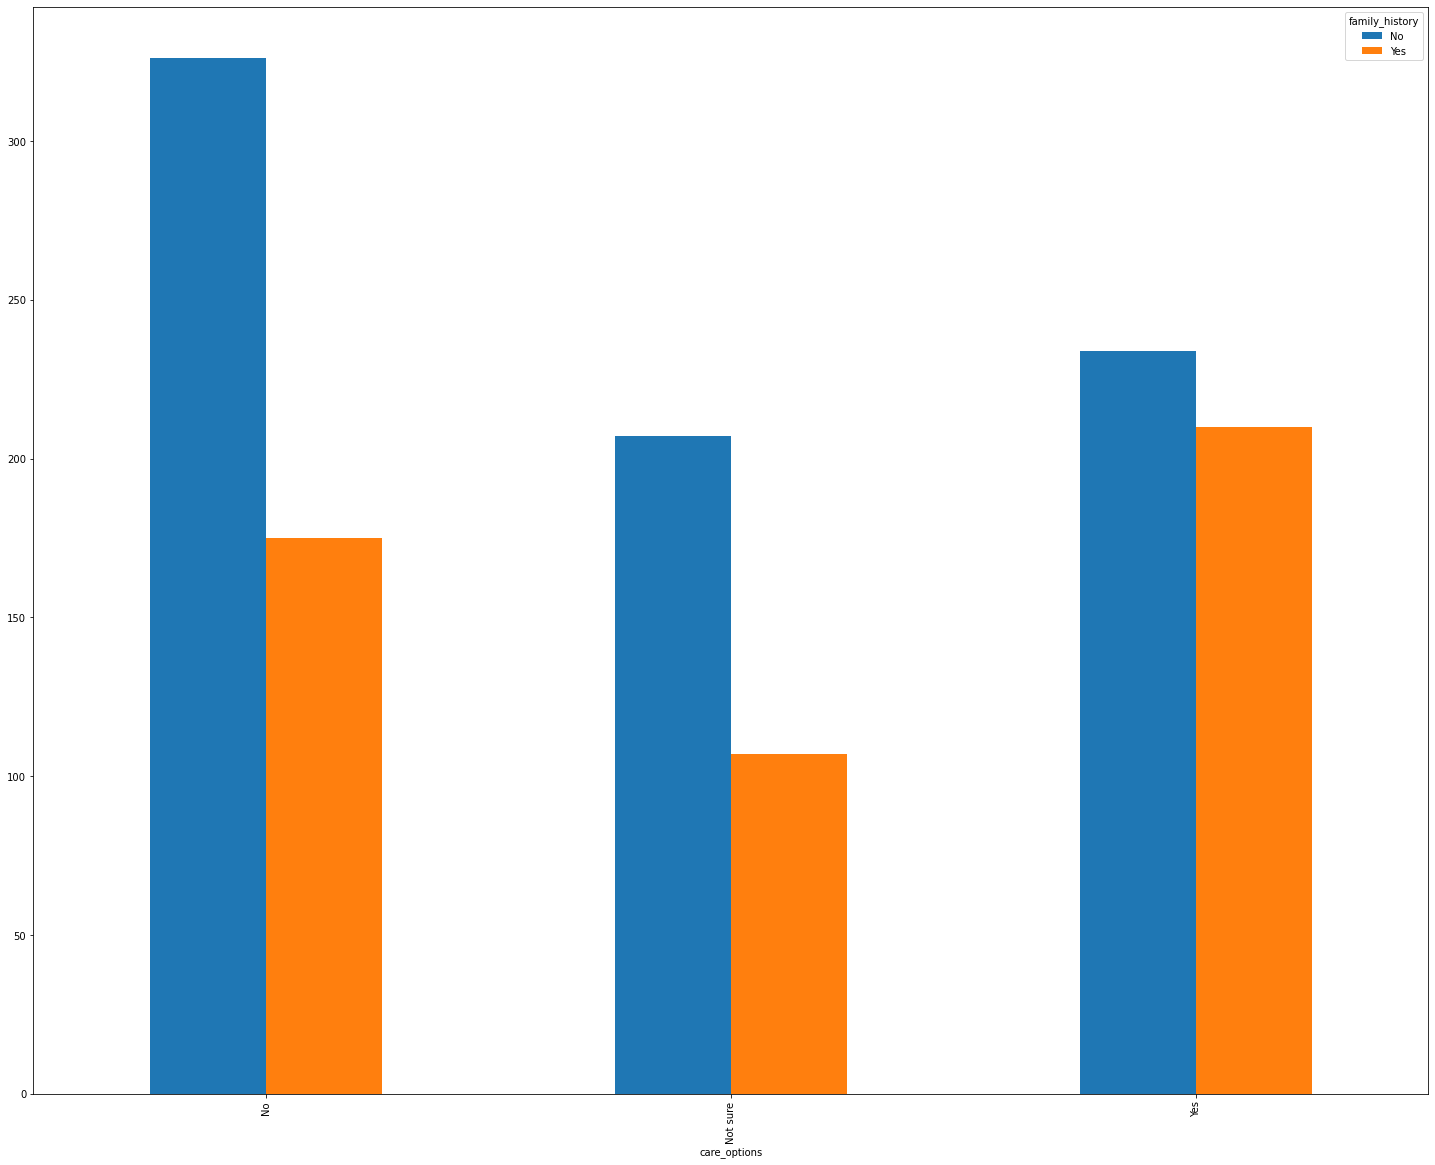

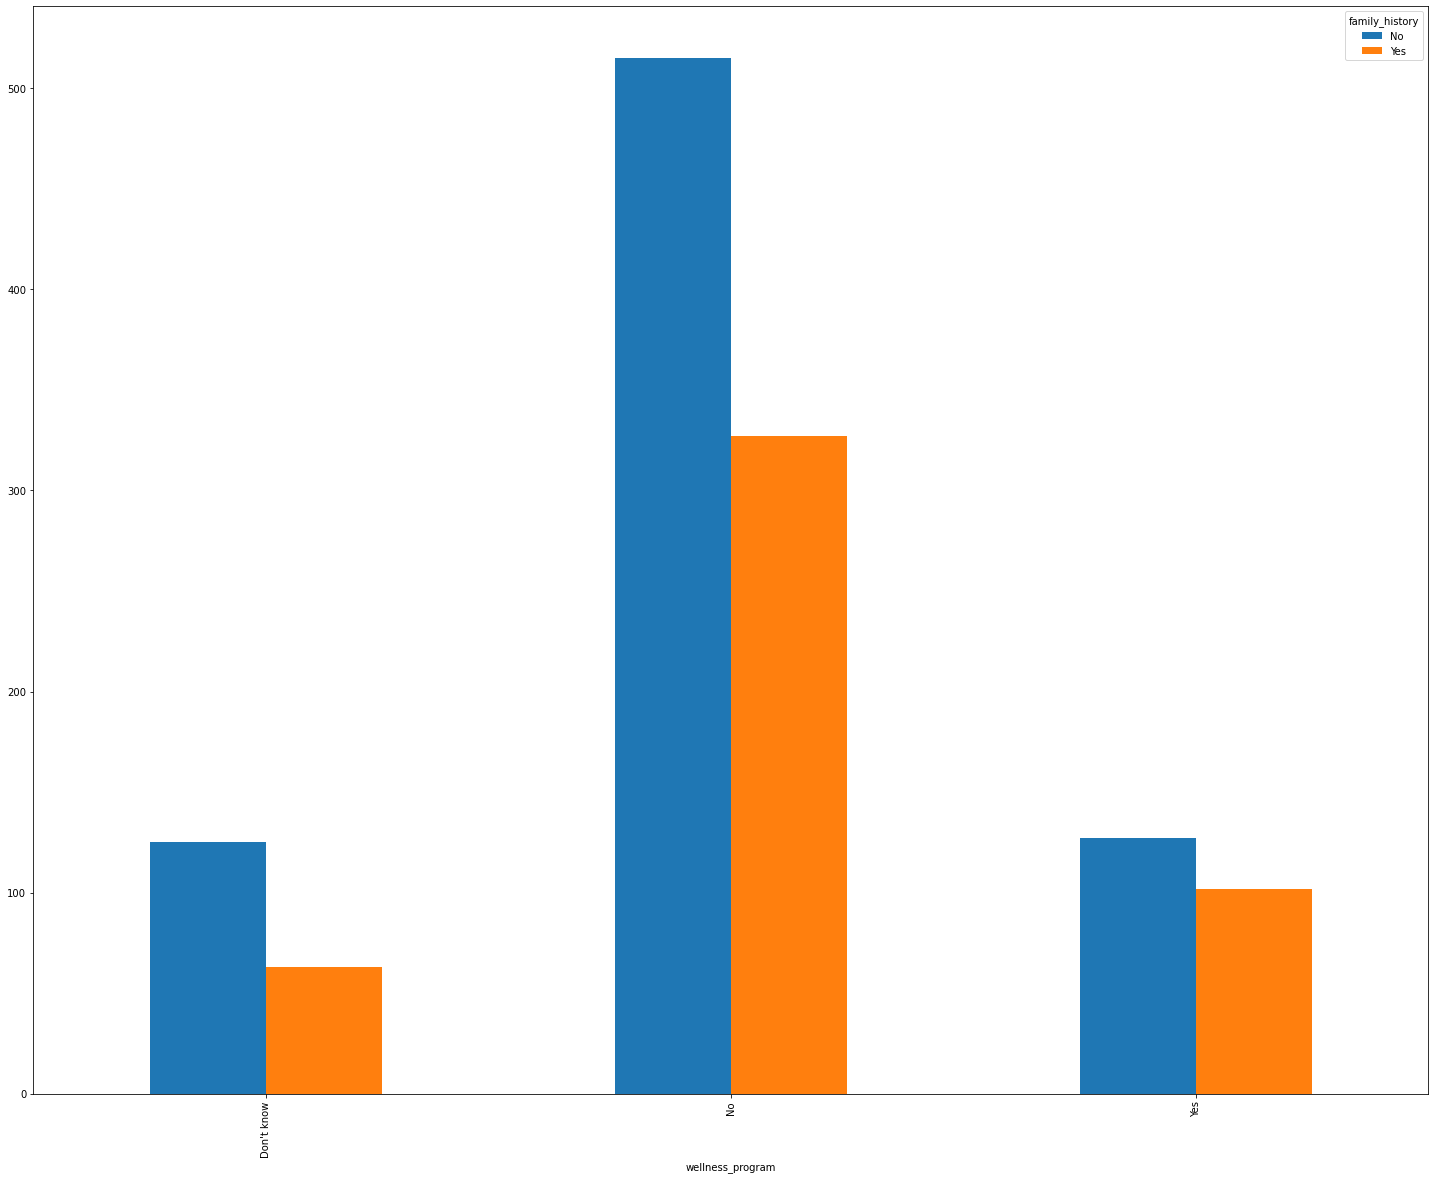

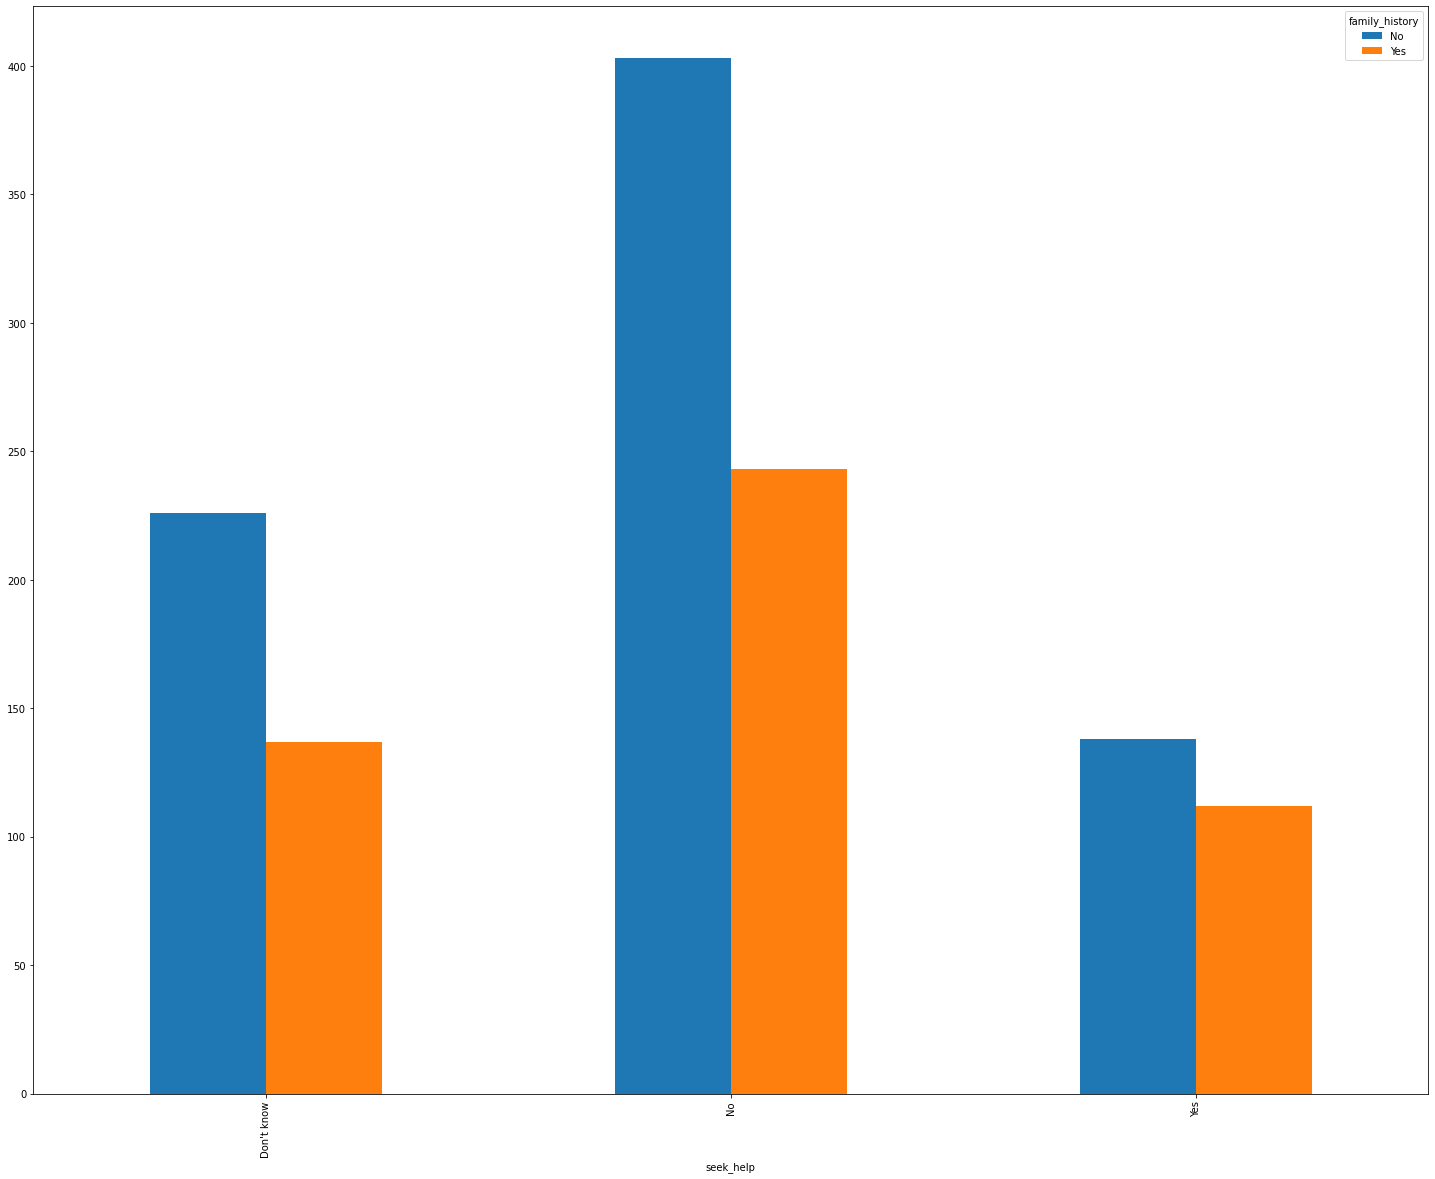

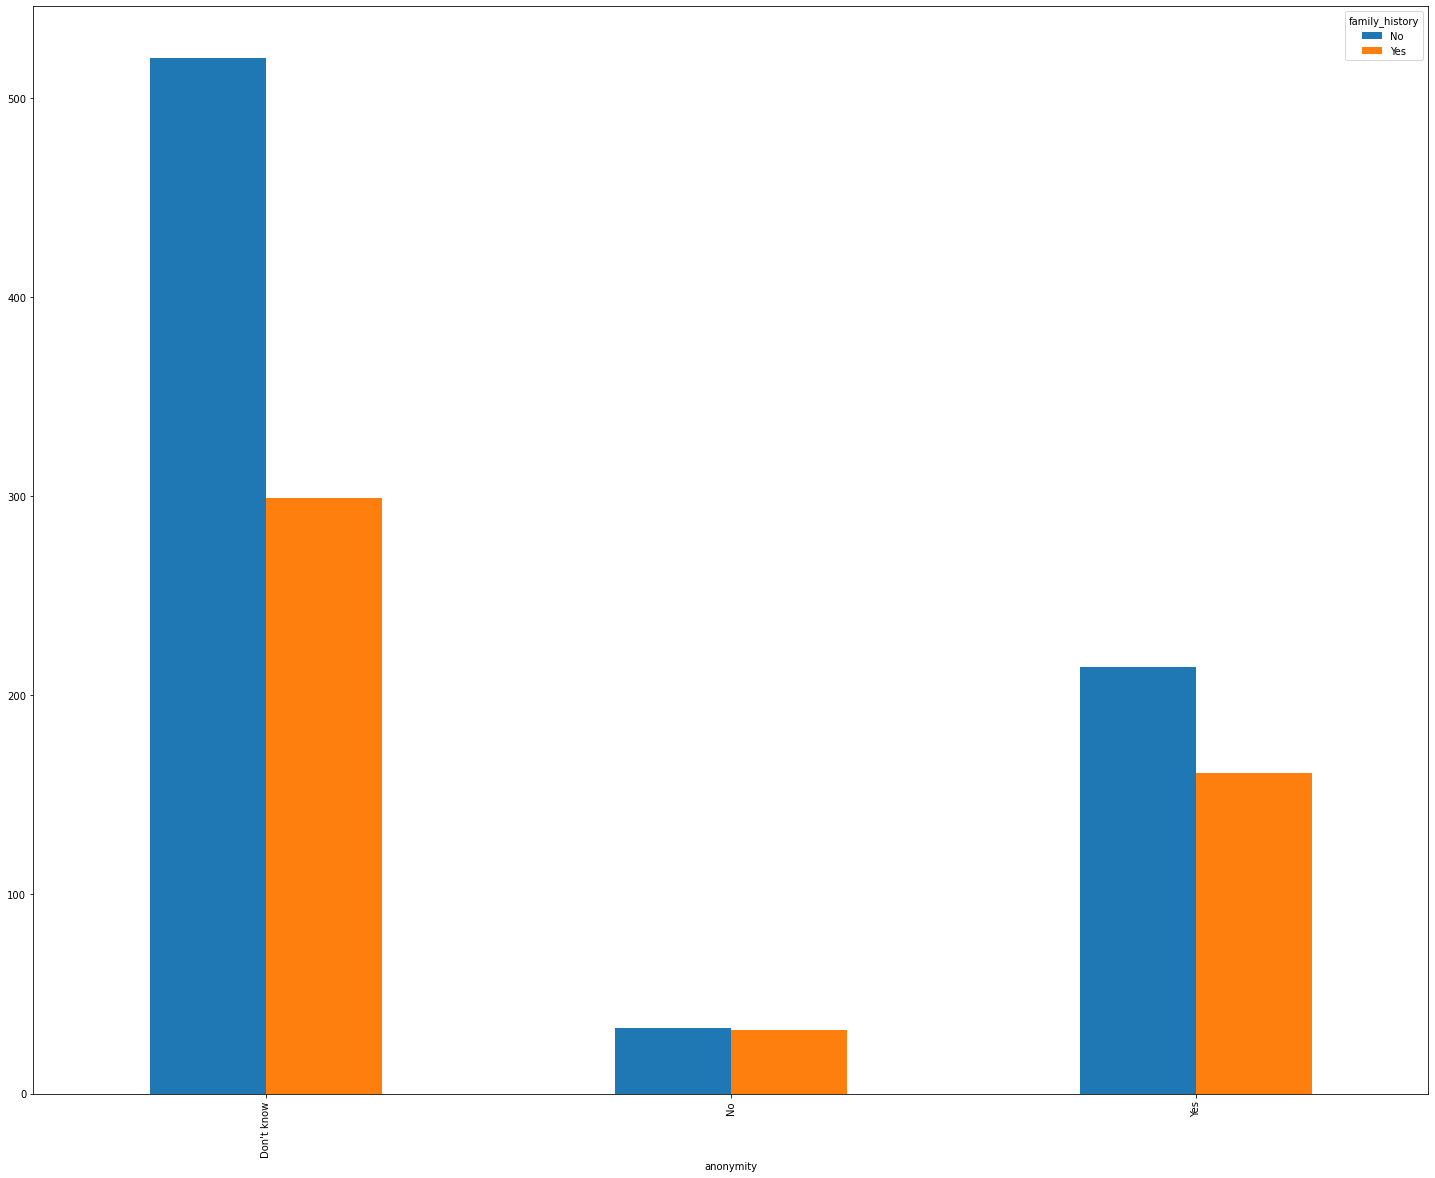

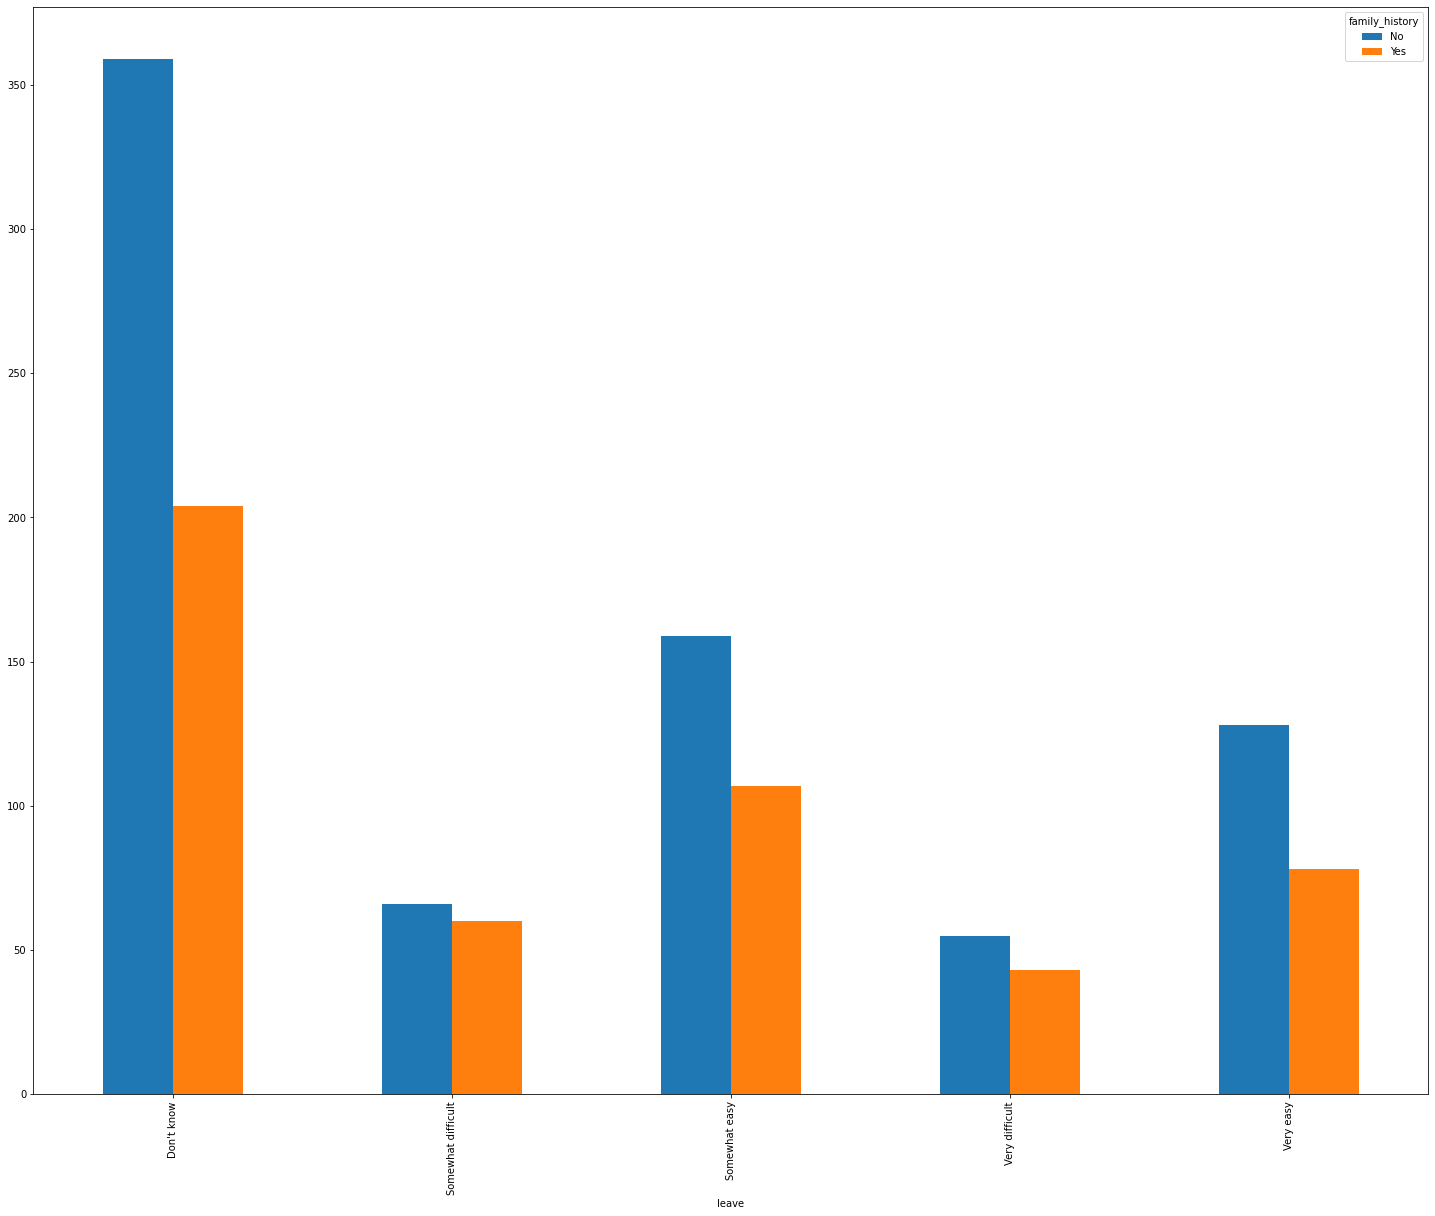

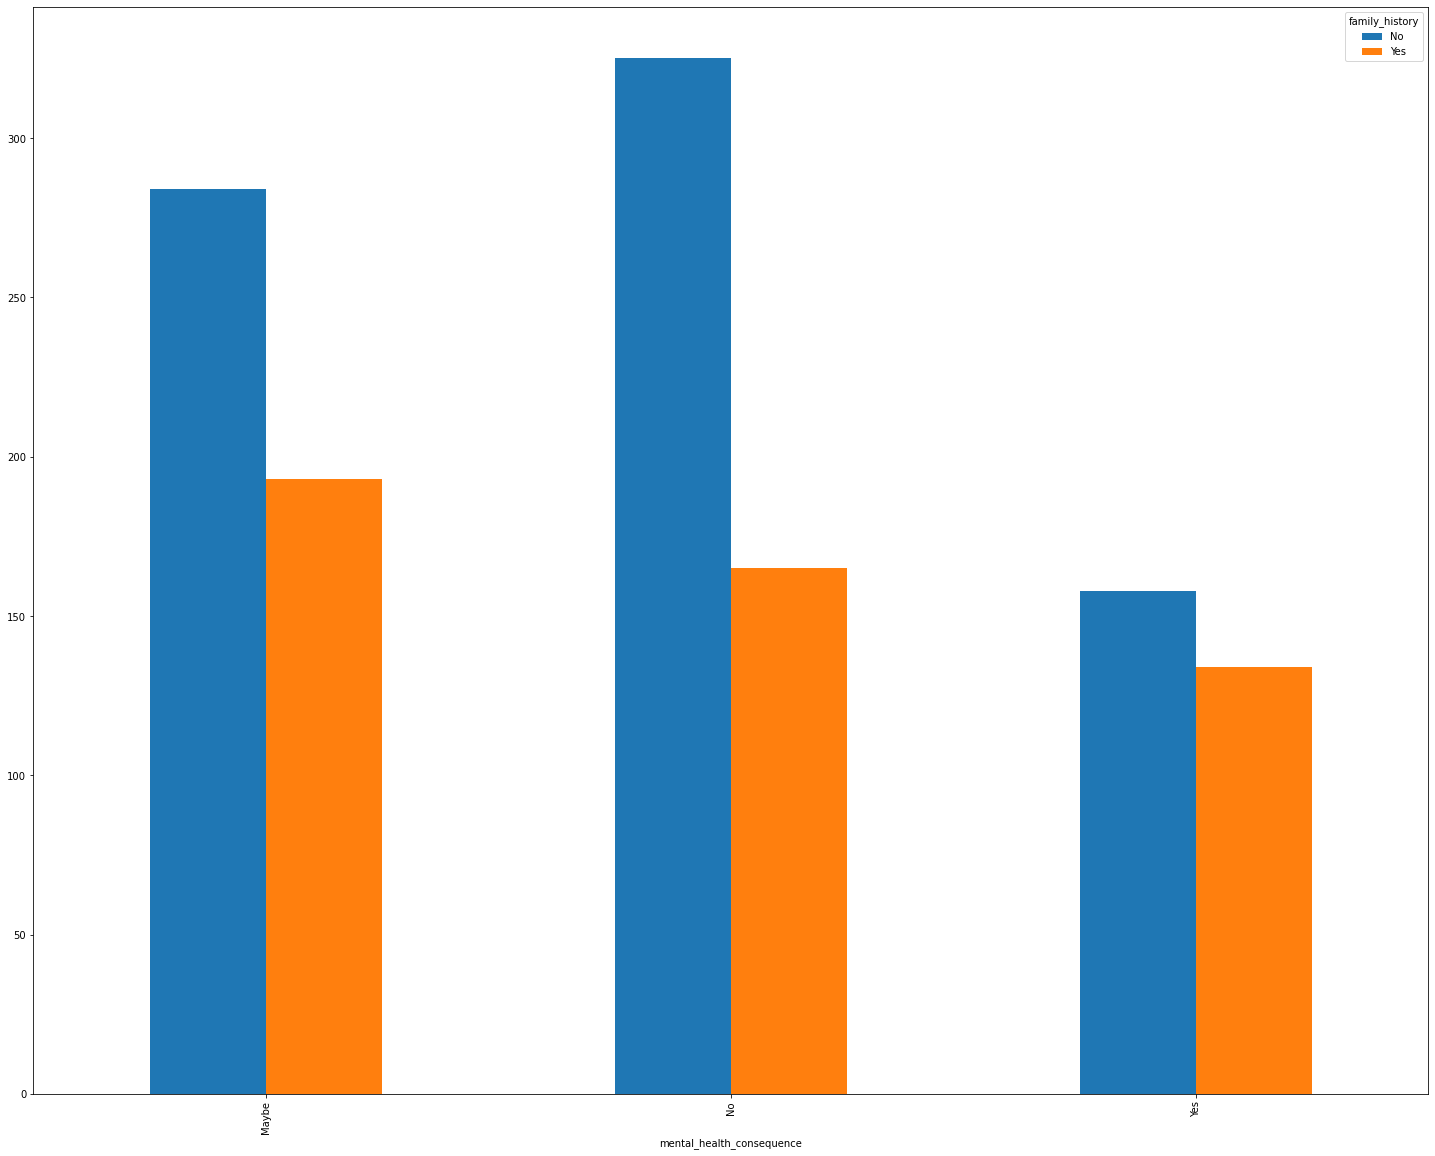

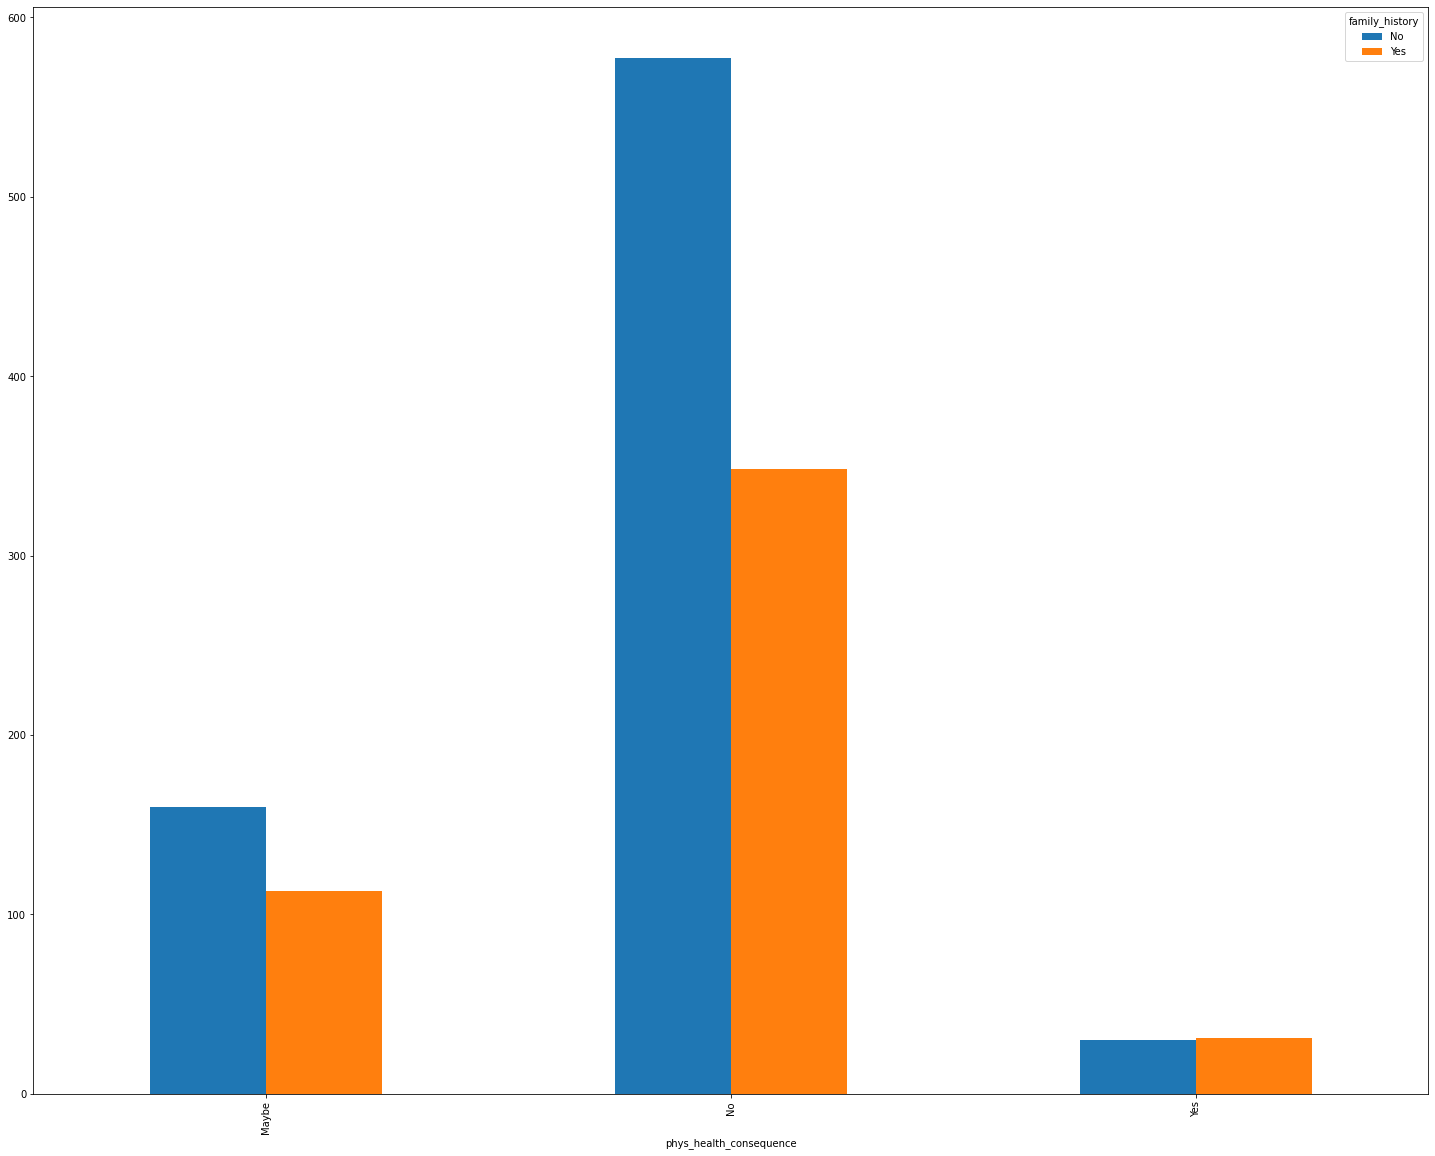

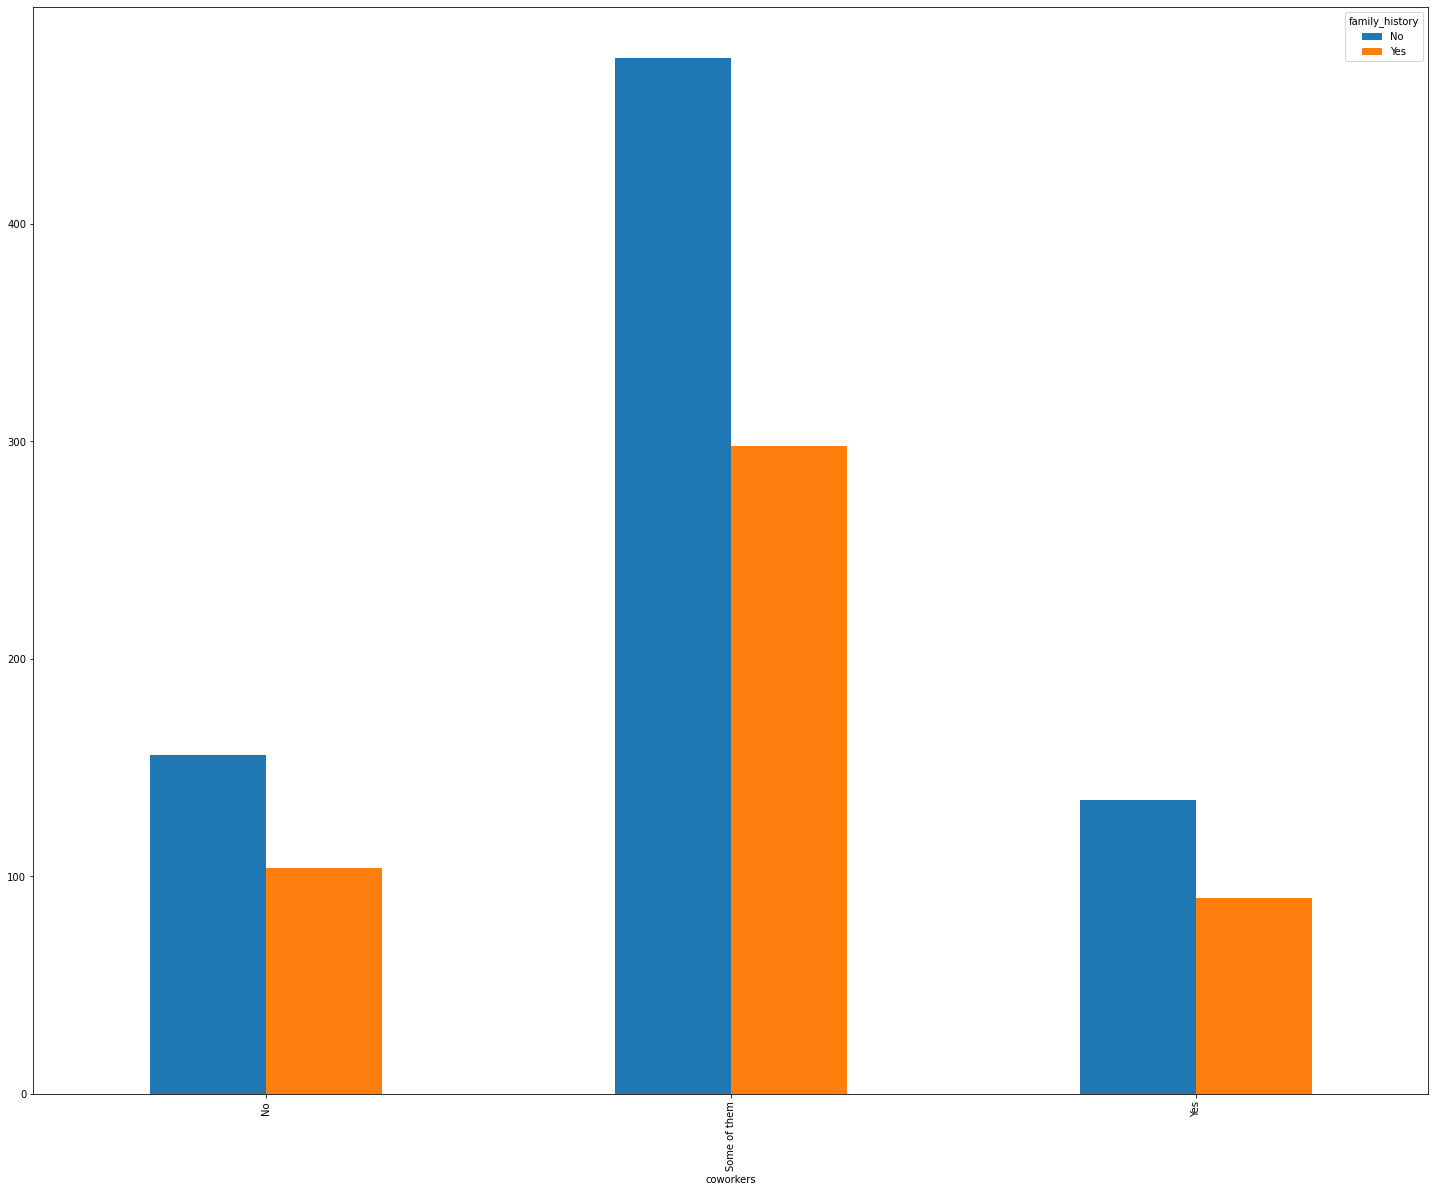

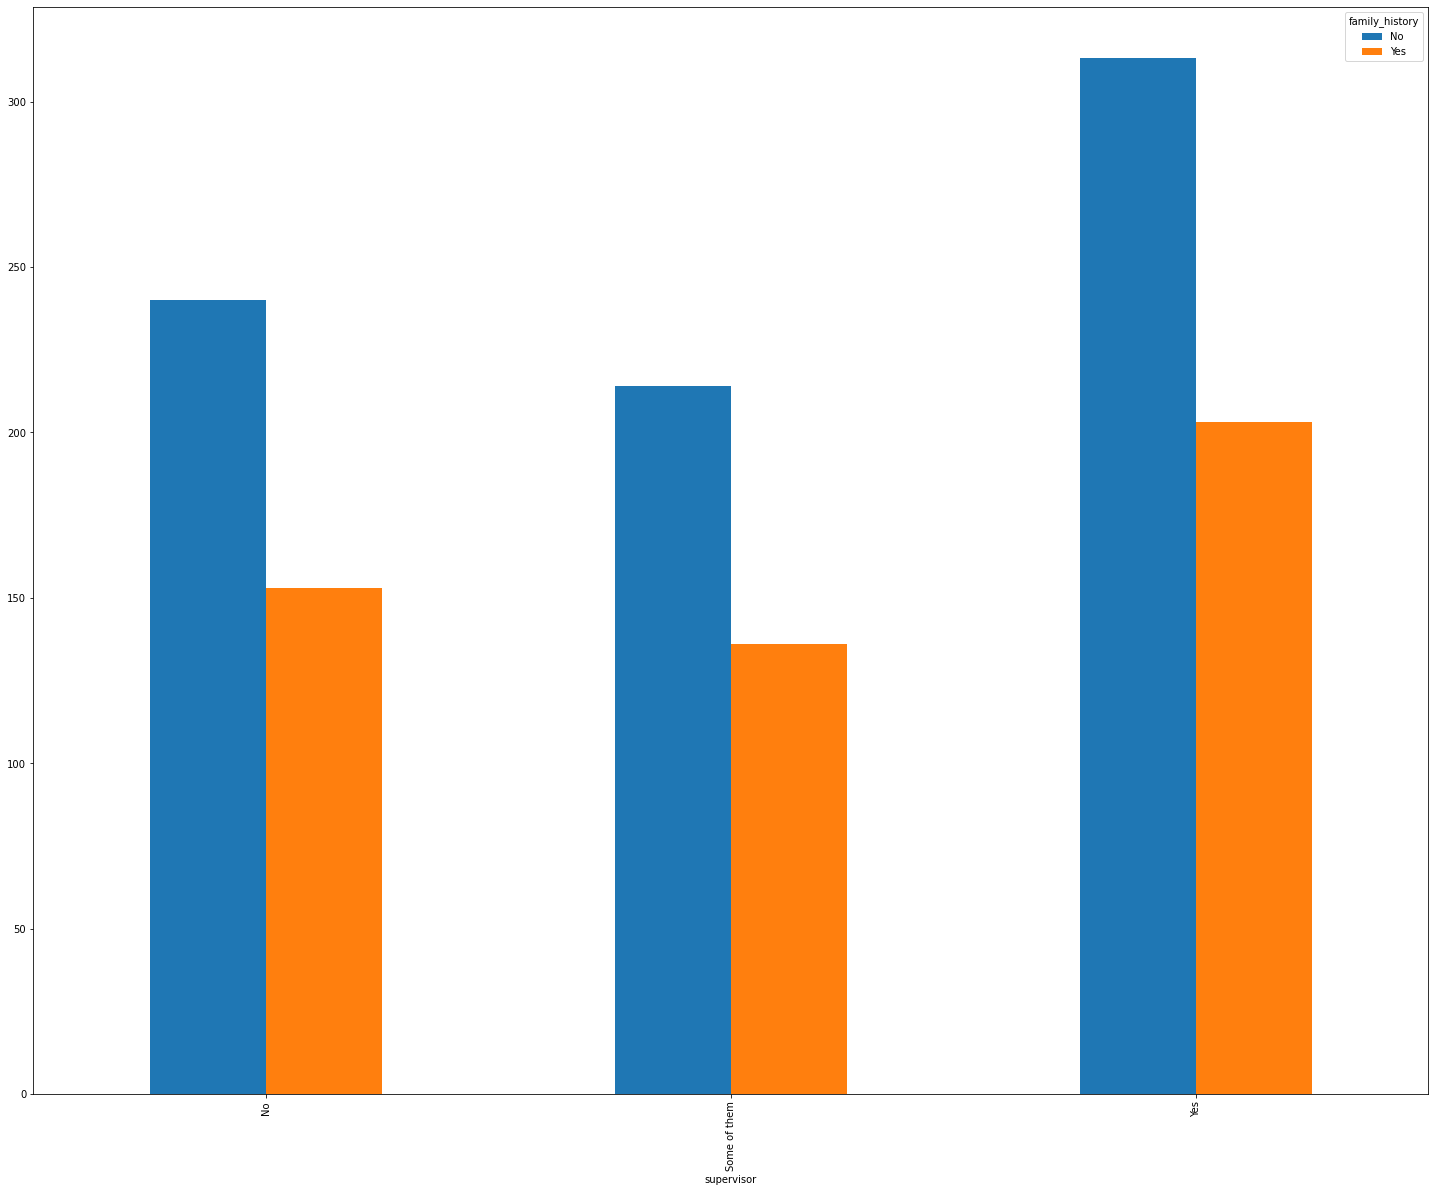

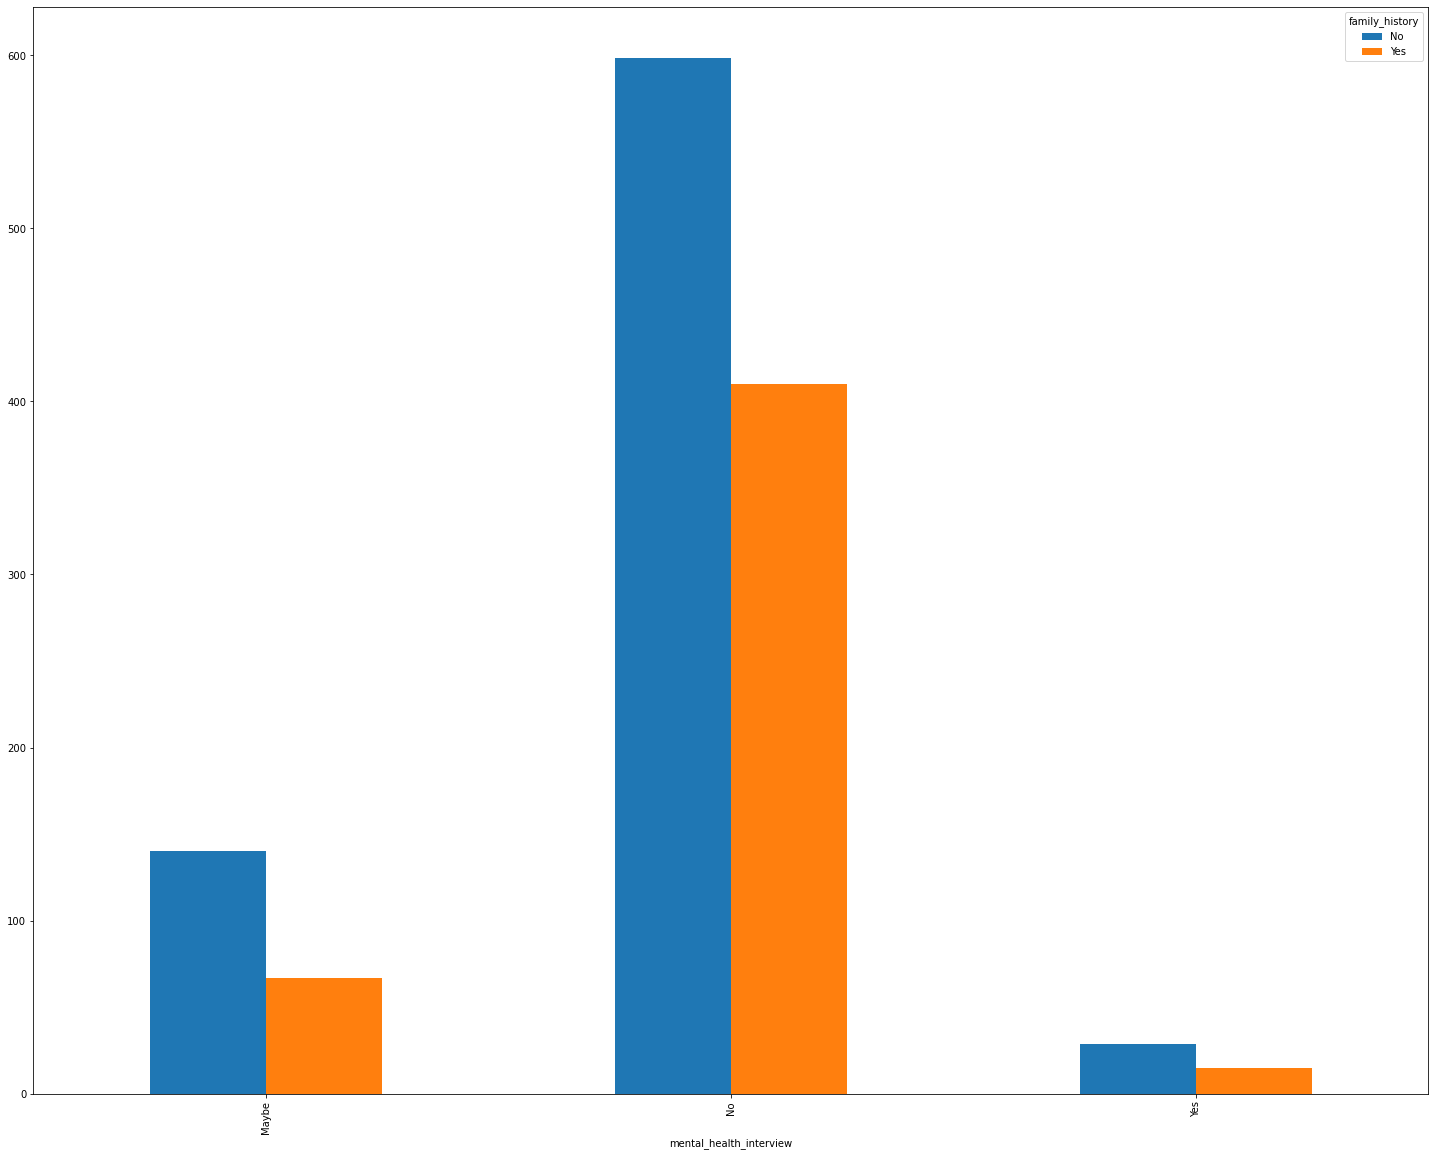

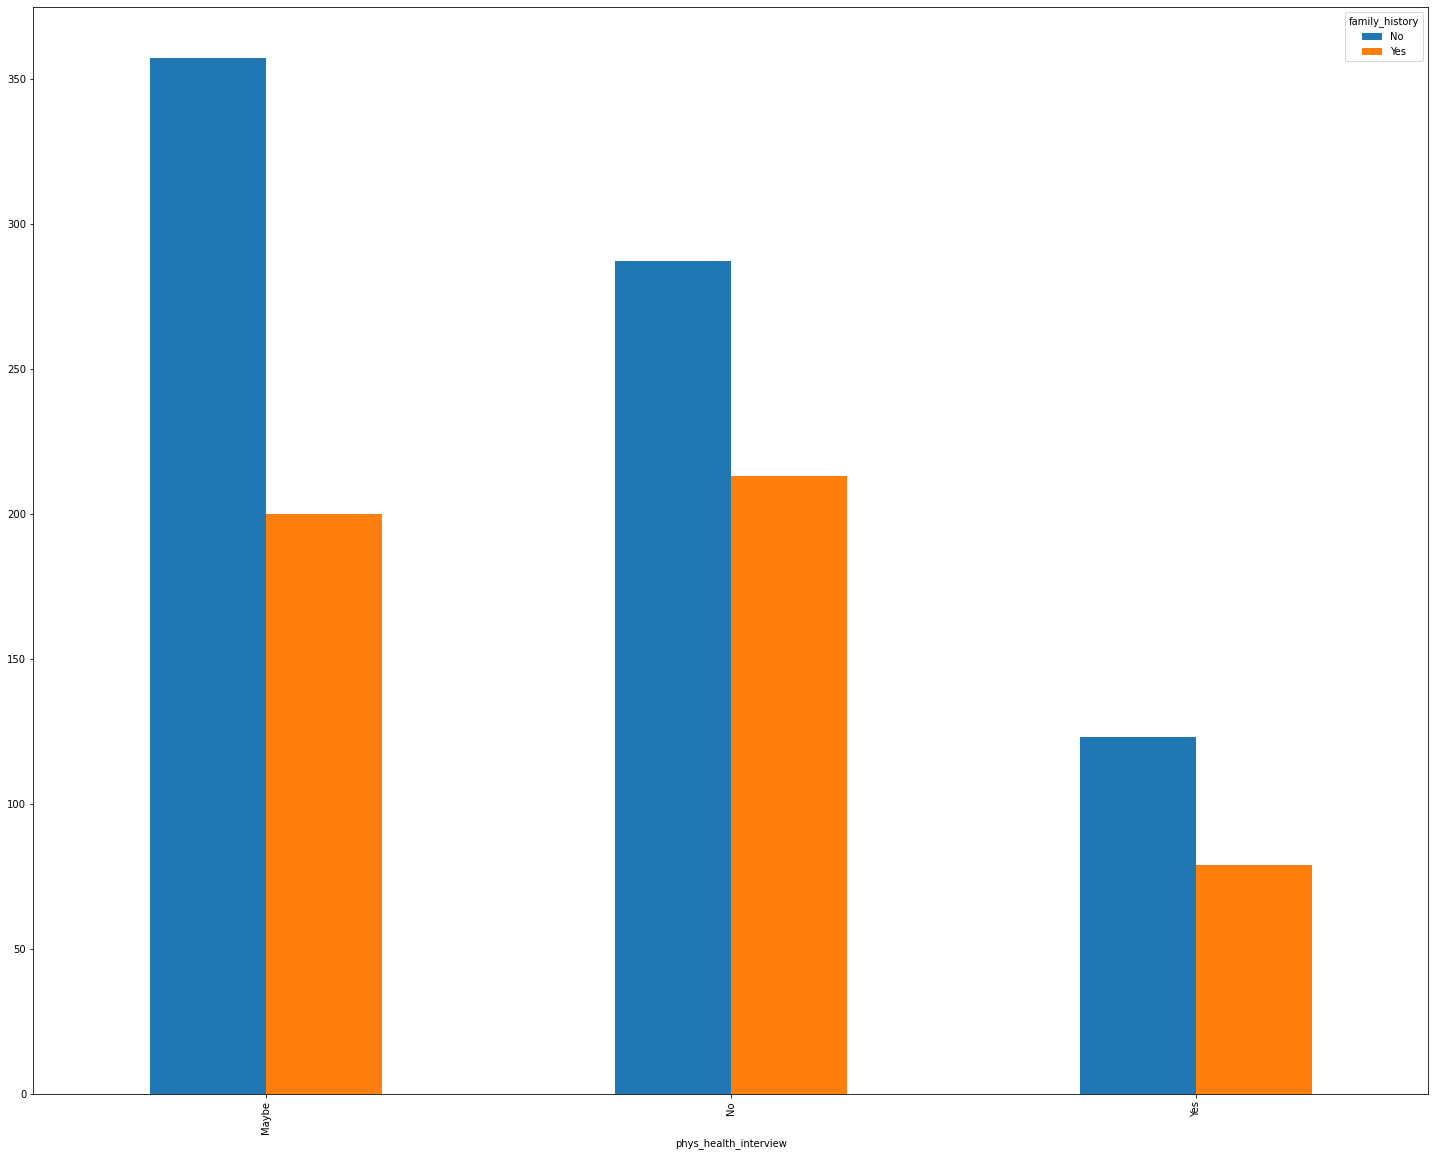

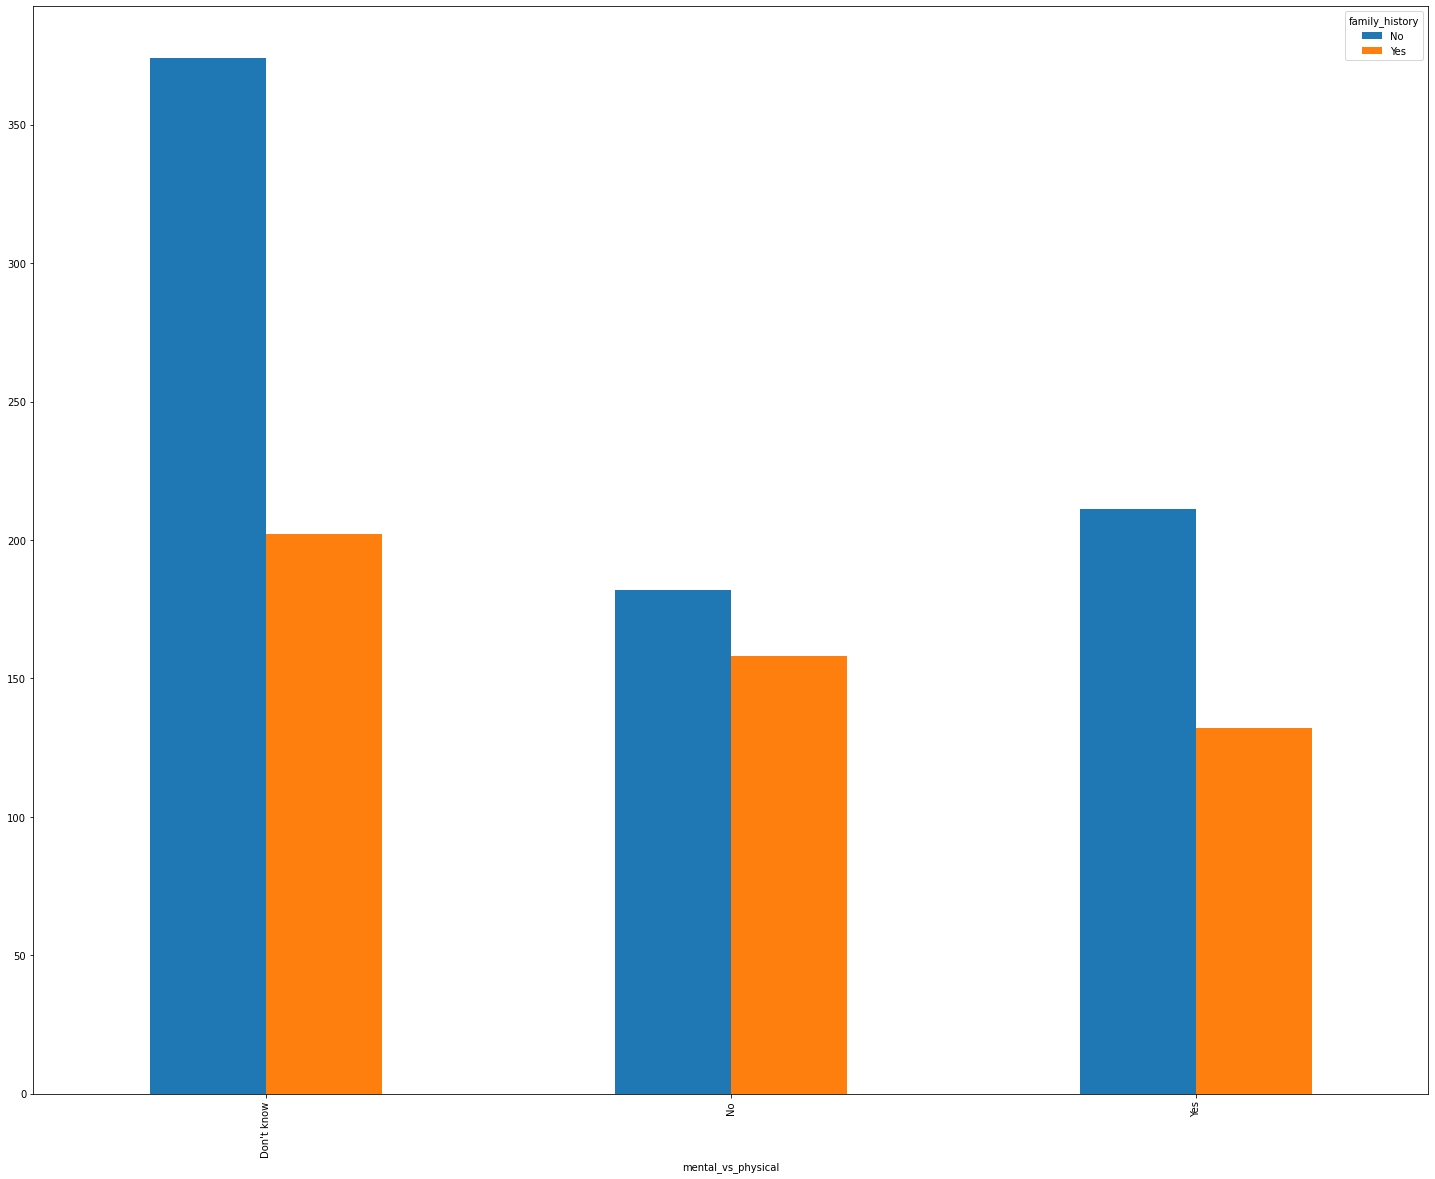

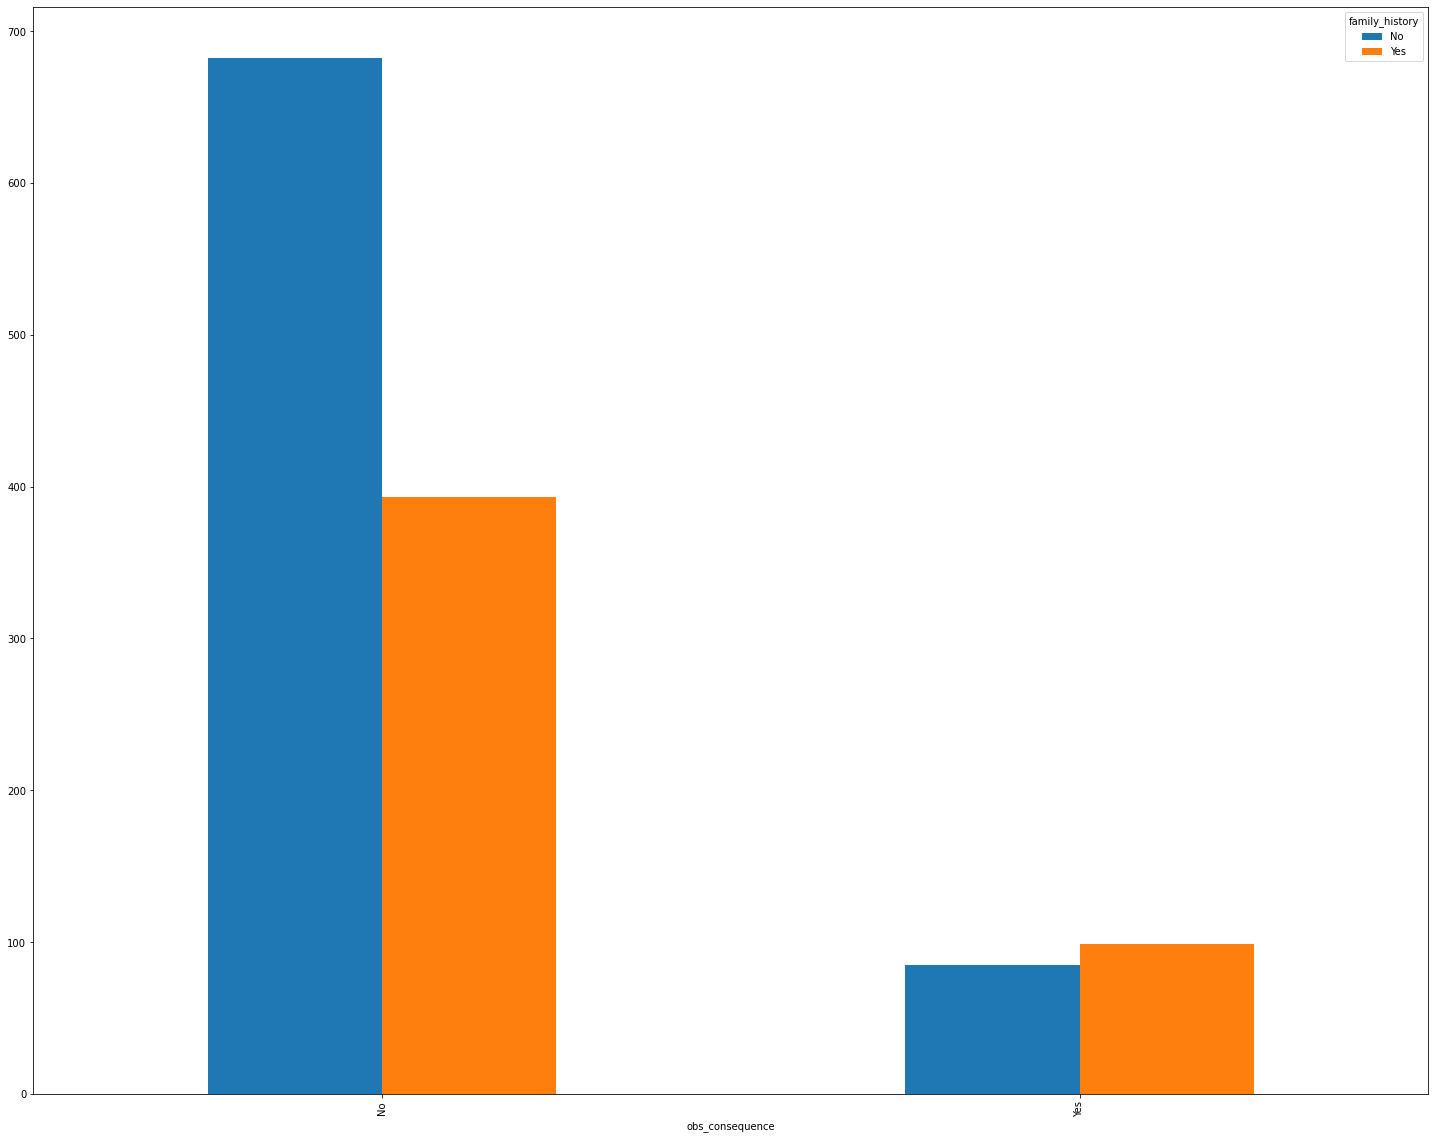

In [30]:
for i,col in enumerate(categorical_columns.columns):
    cat1=categorical_columns.groupby([col,'family_history'])['family_history'].count().unstack()
    cat1.plot(kind='bar',figsize=(25,20))

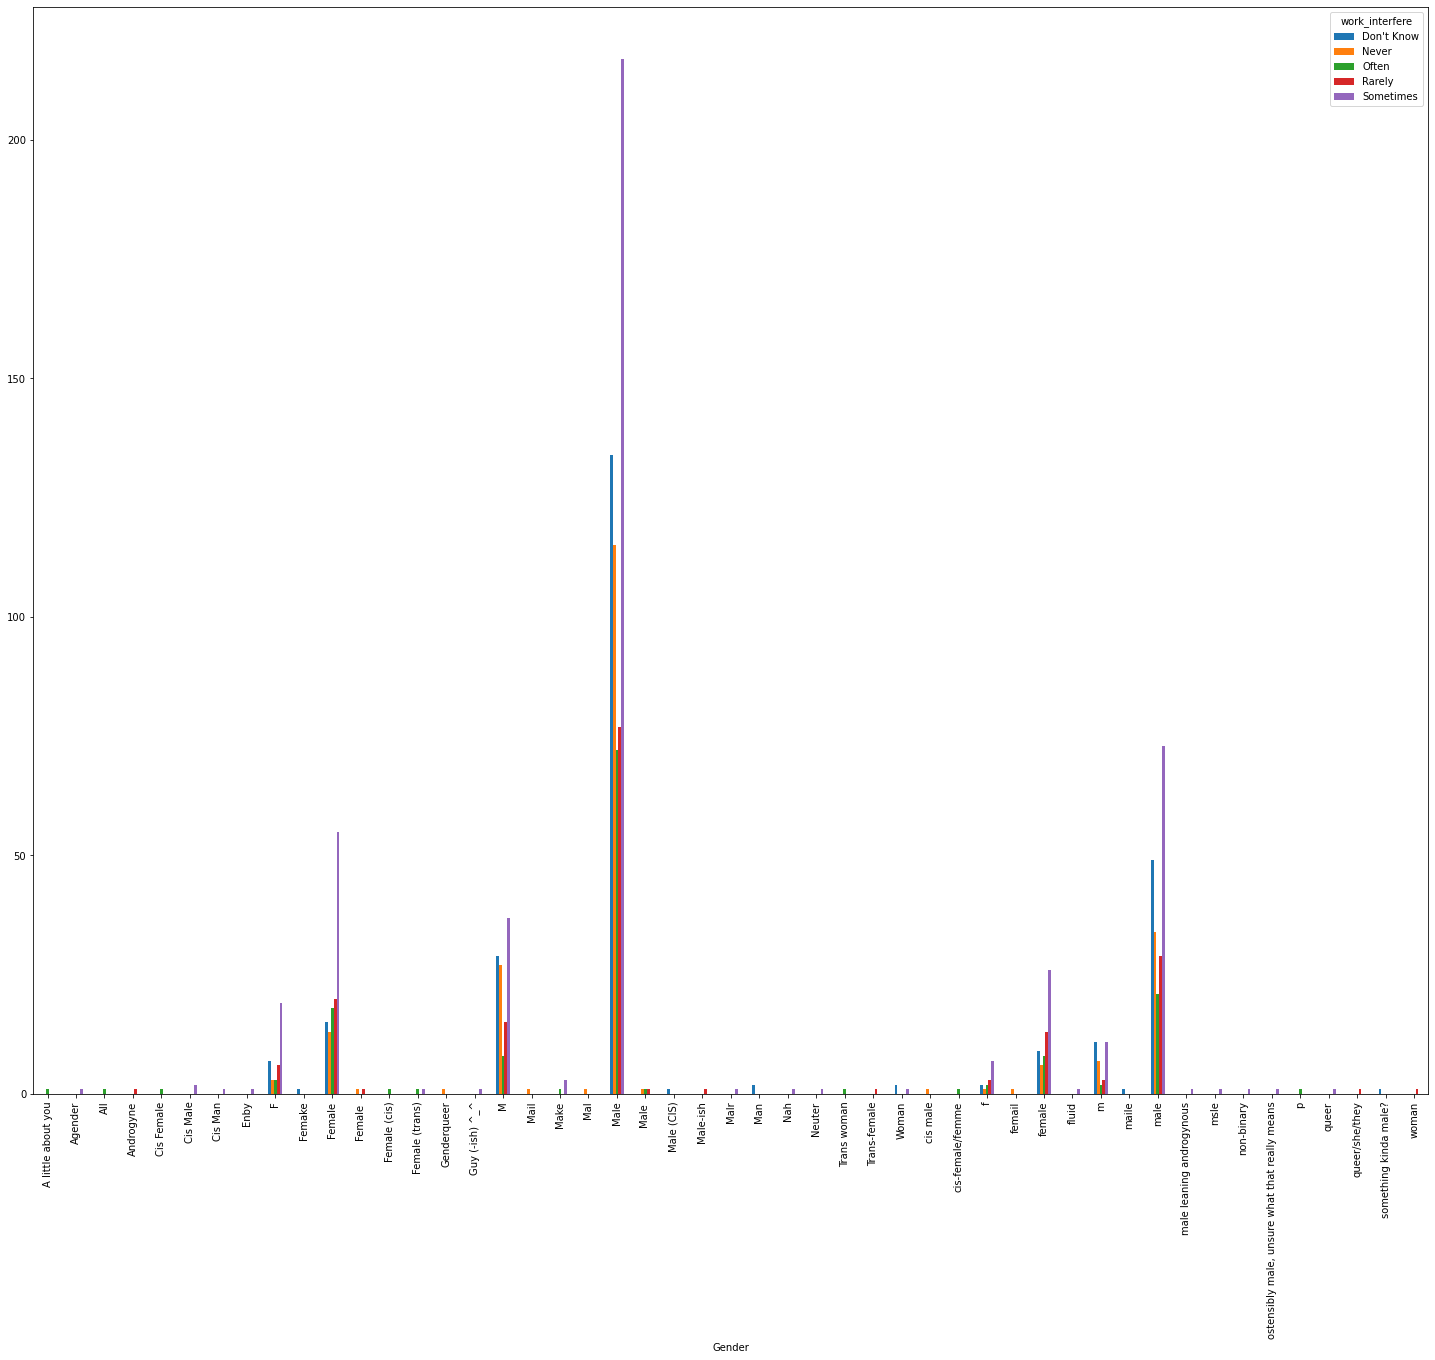

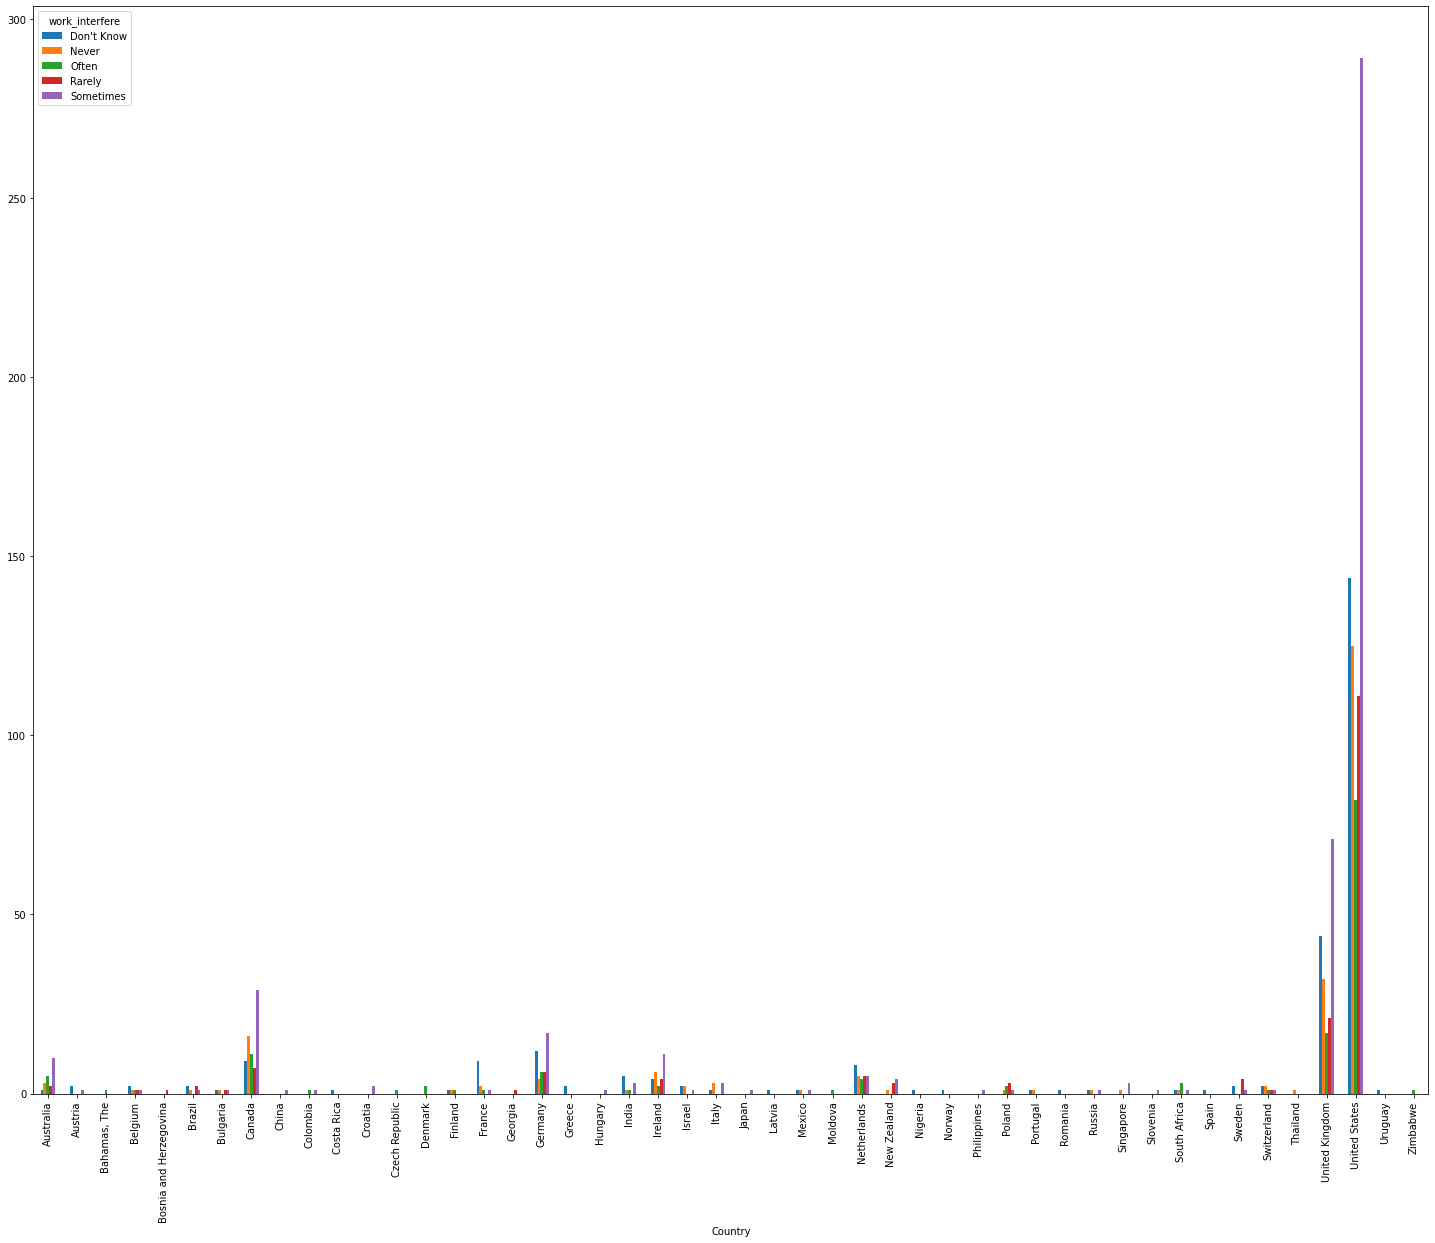

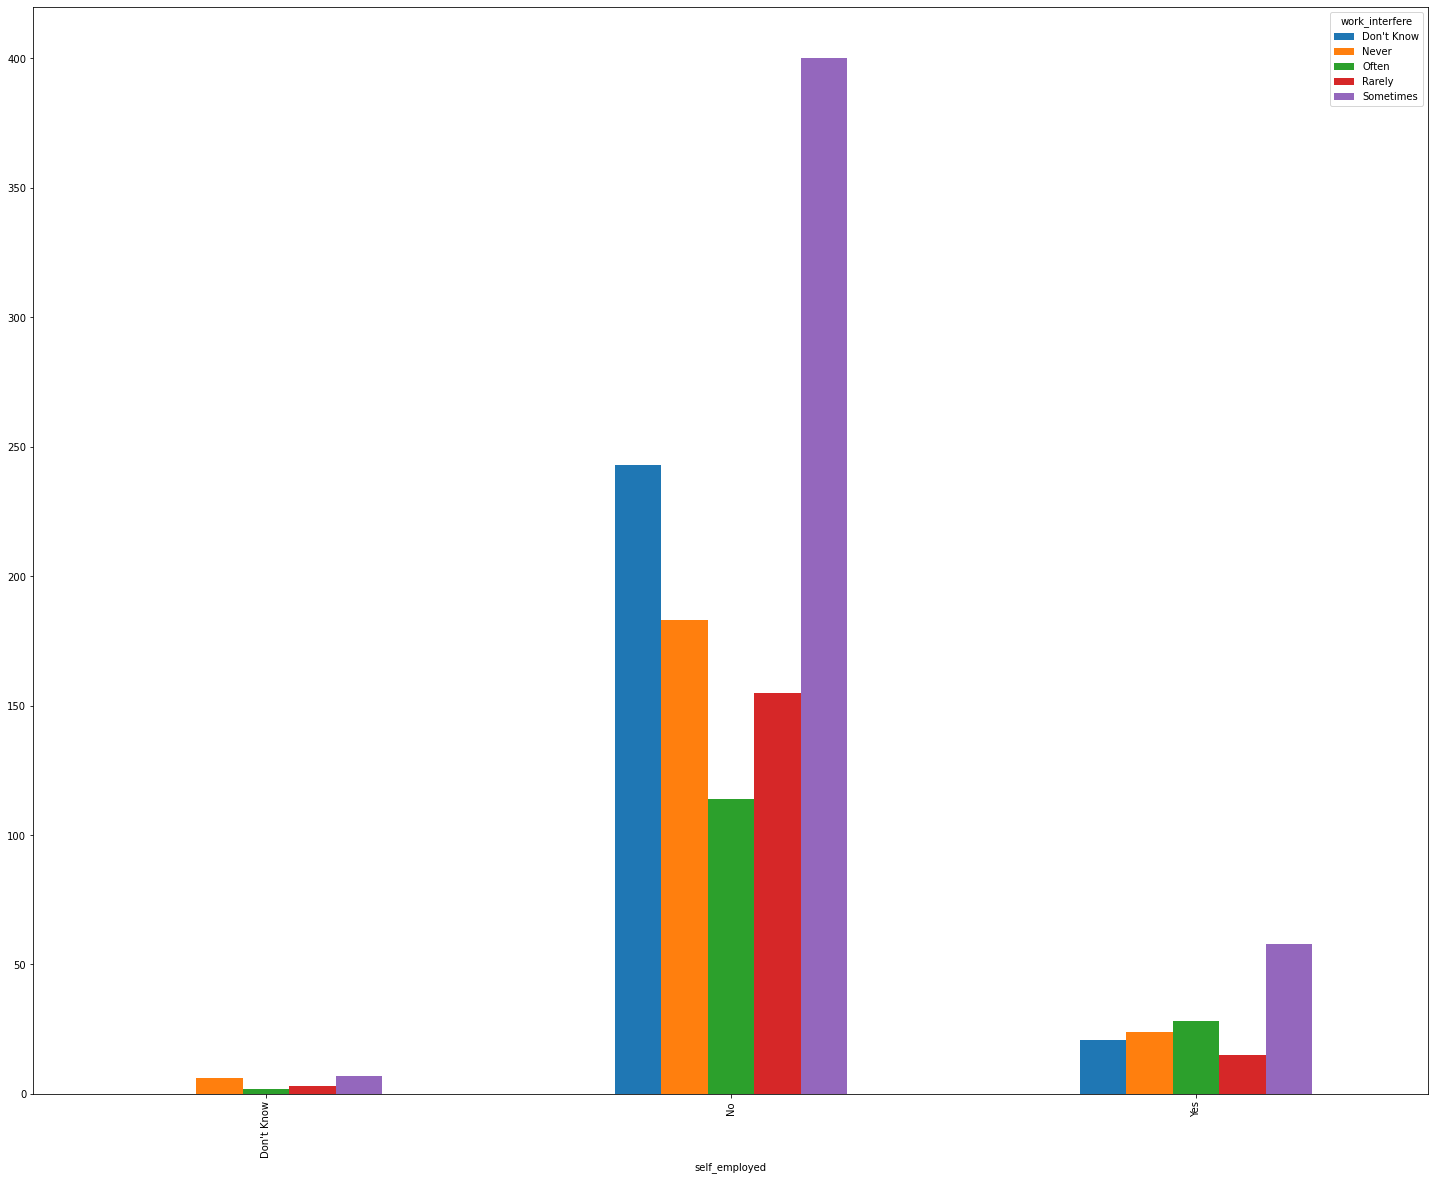

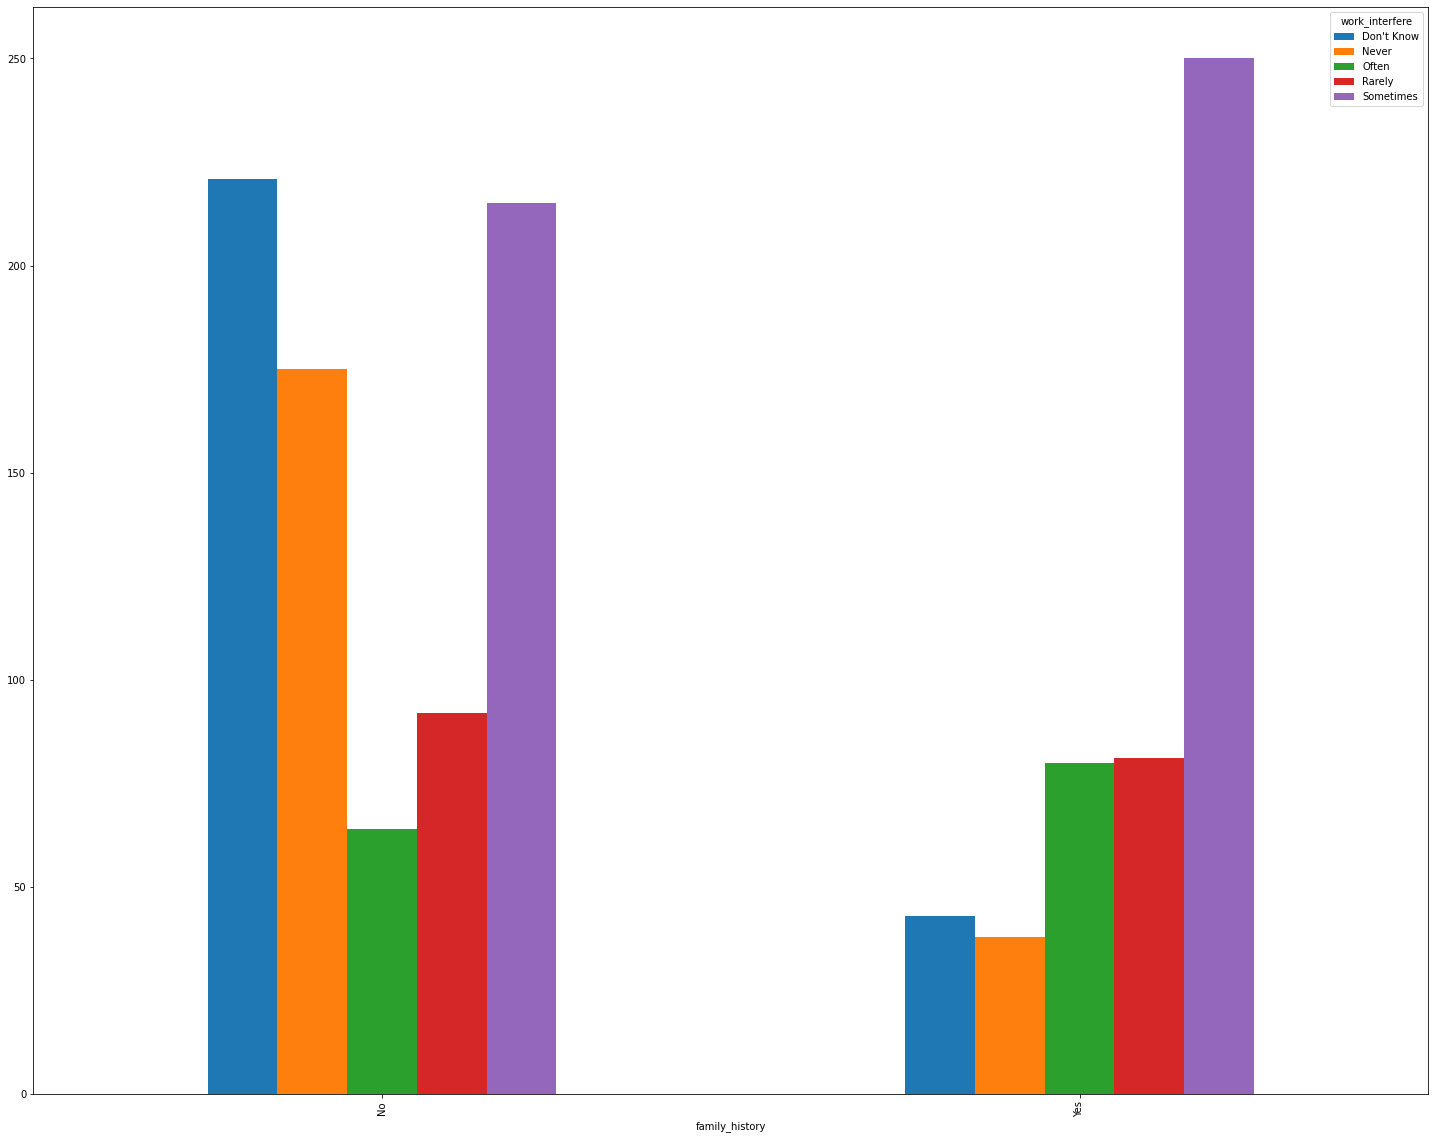

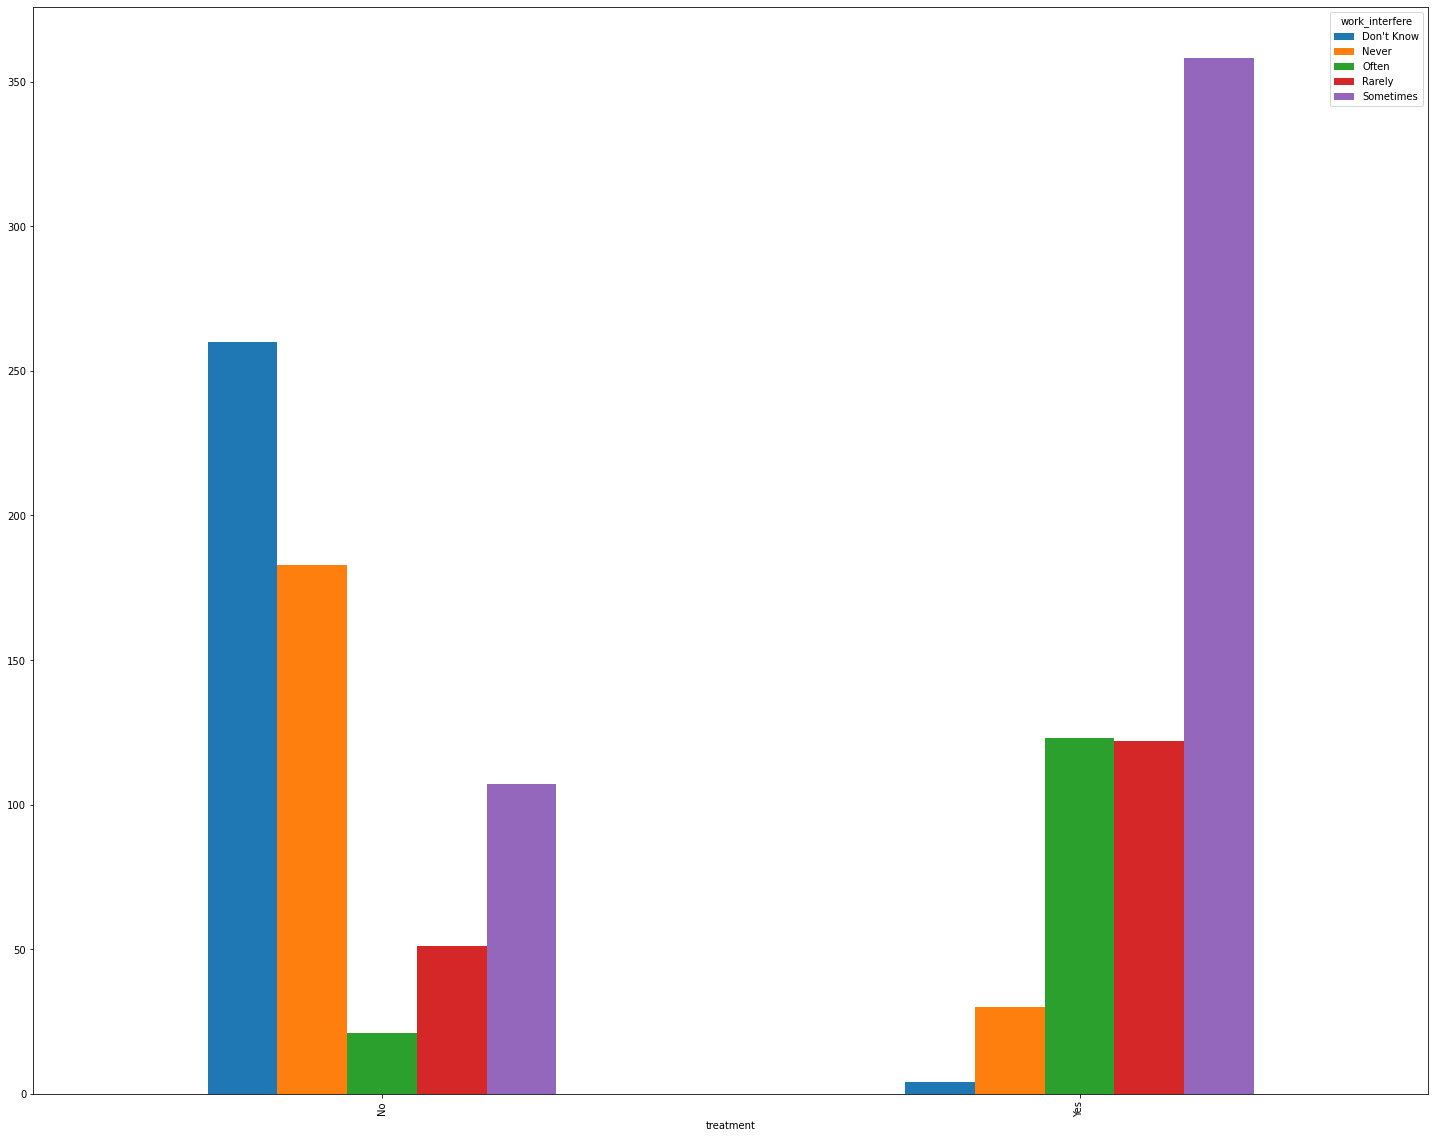

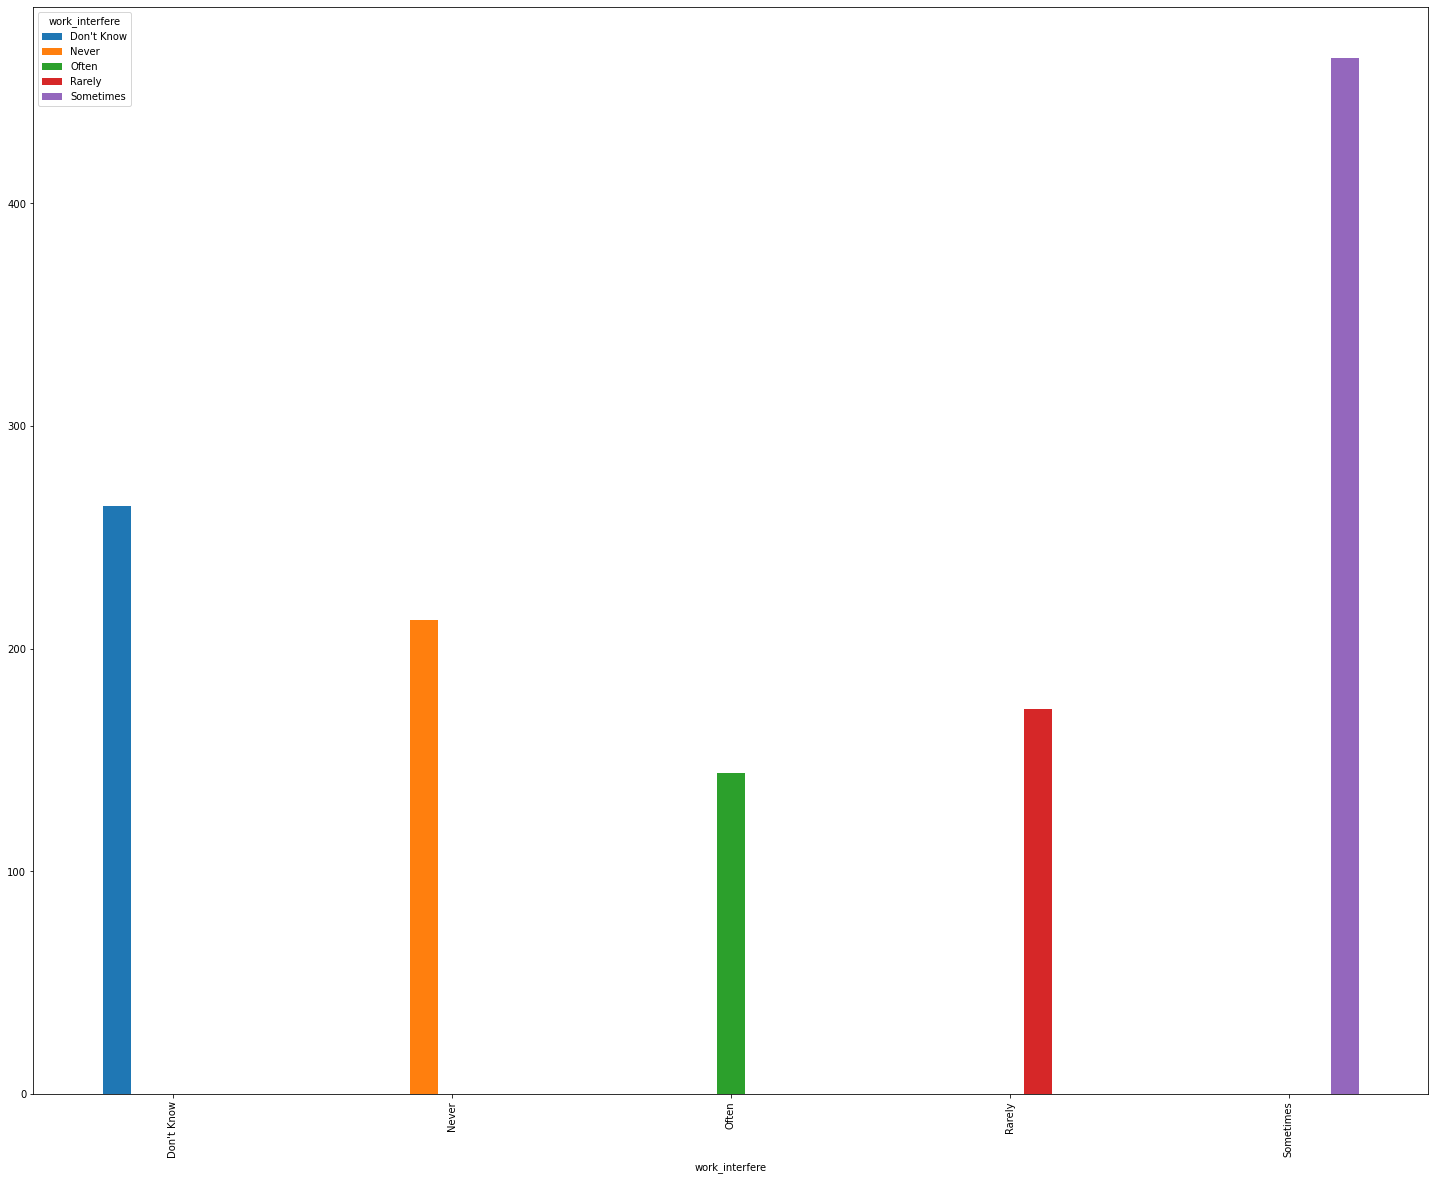

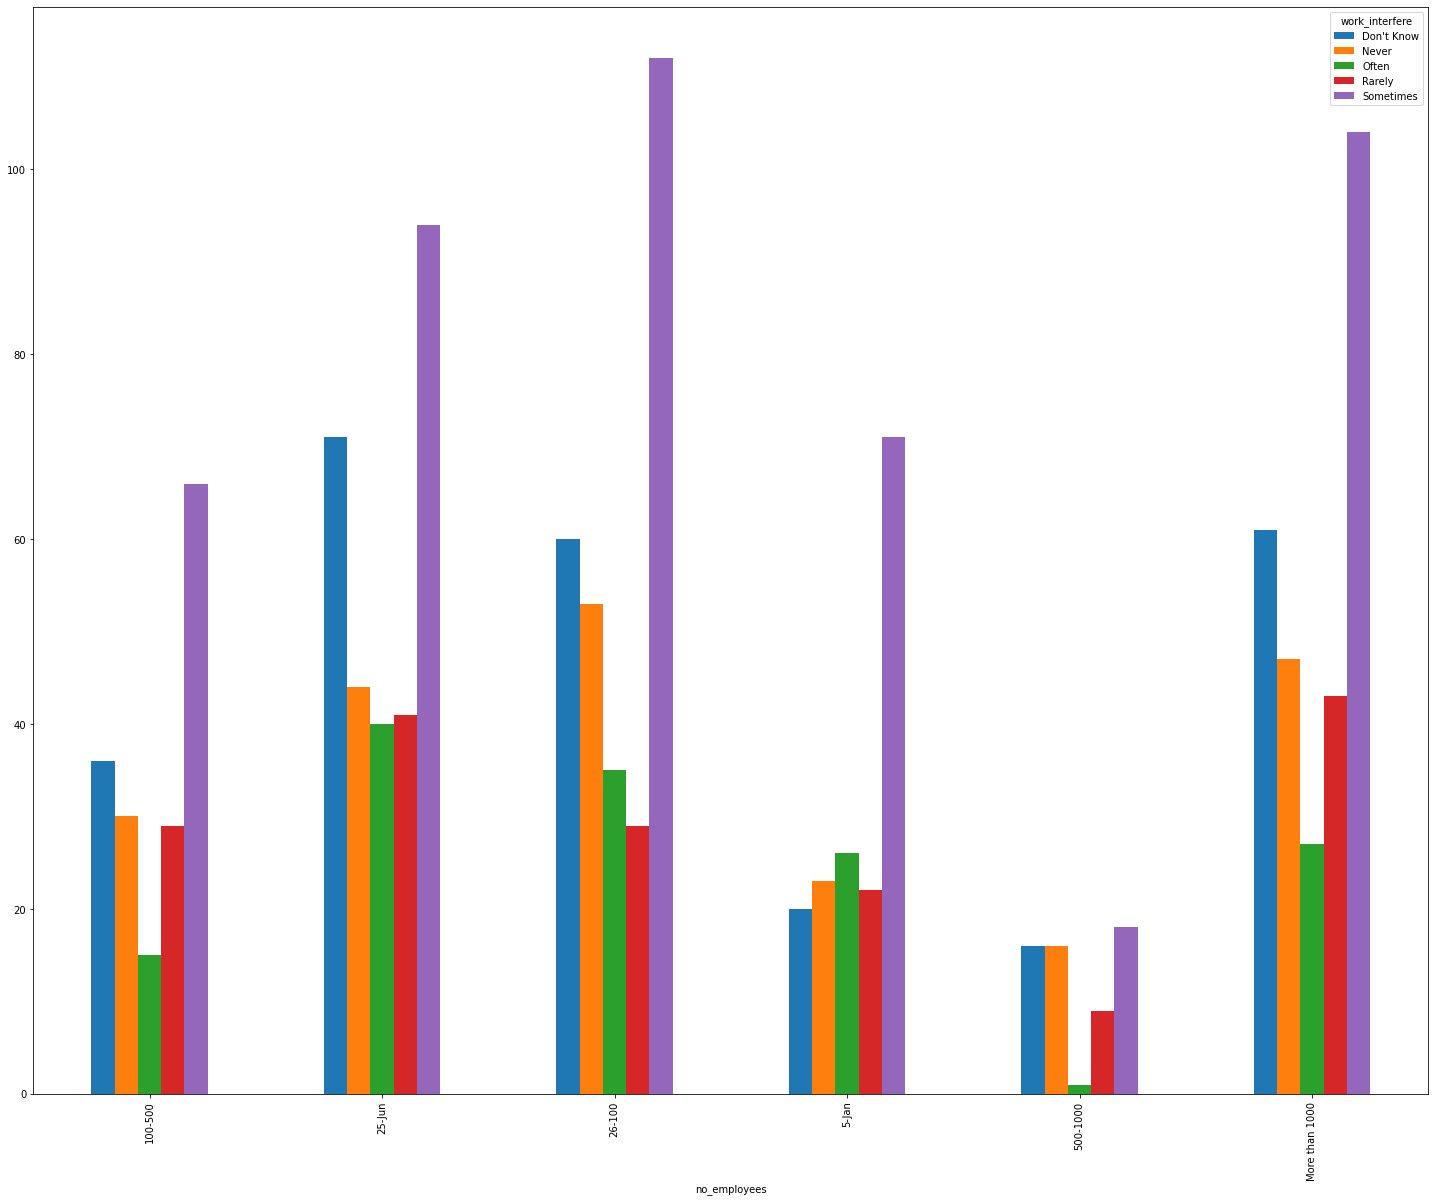

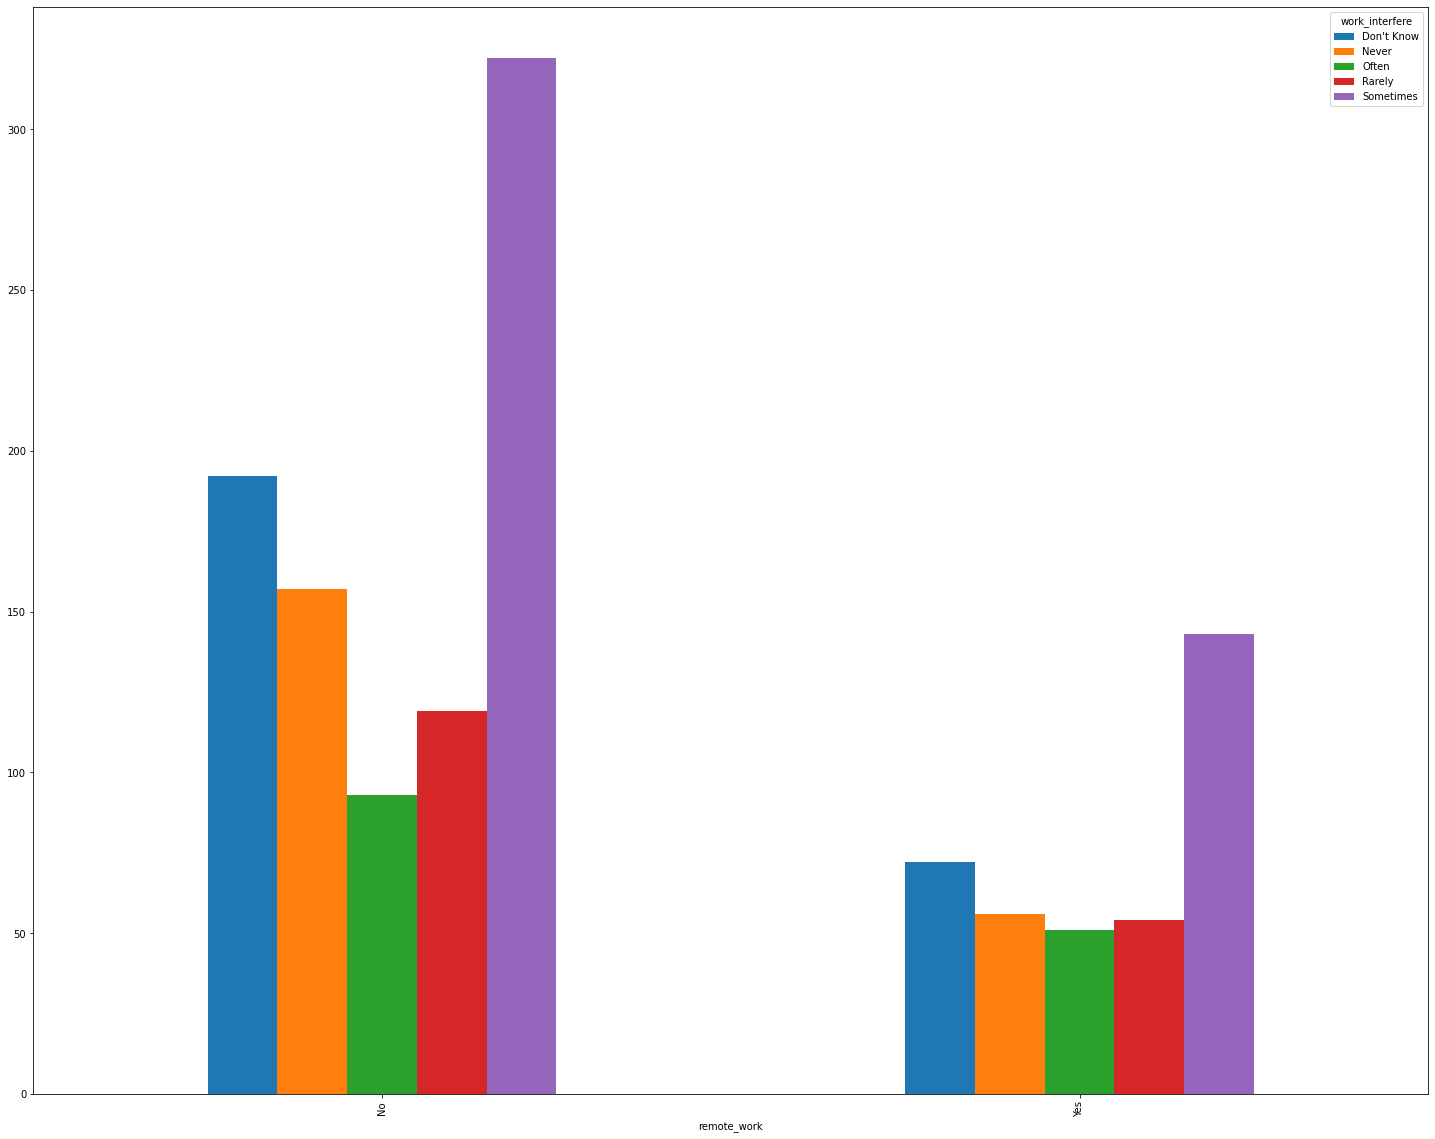

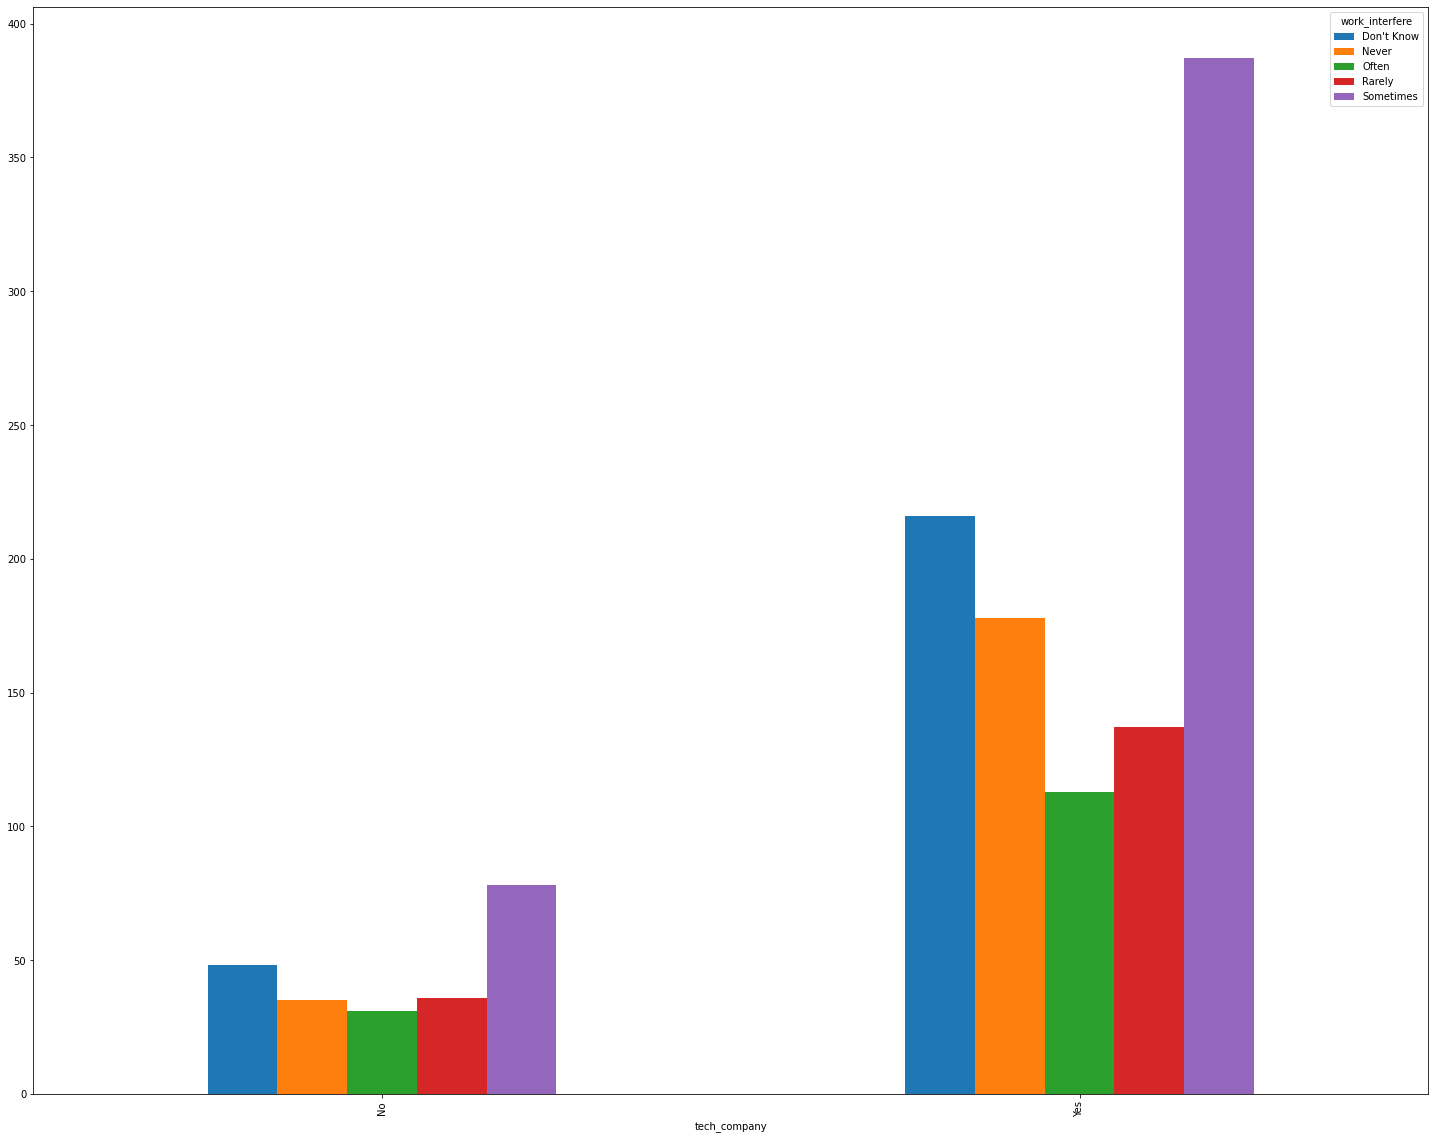

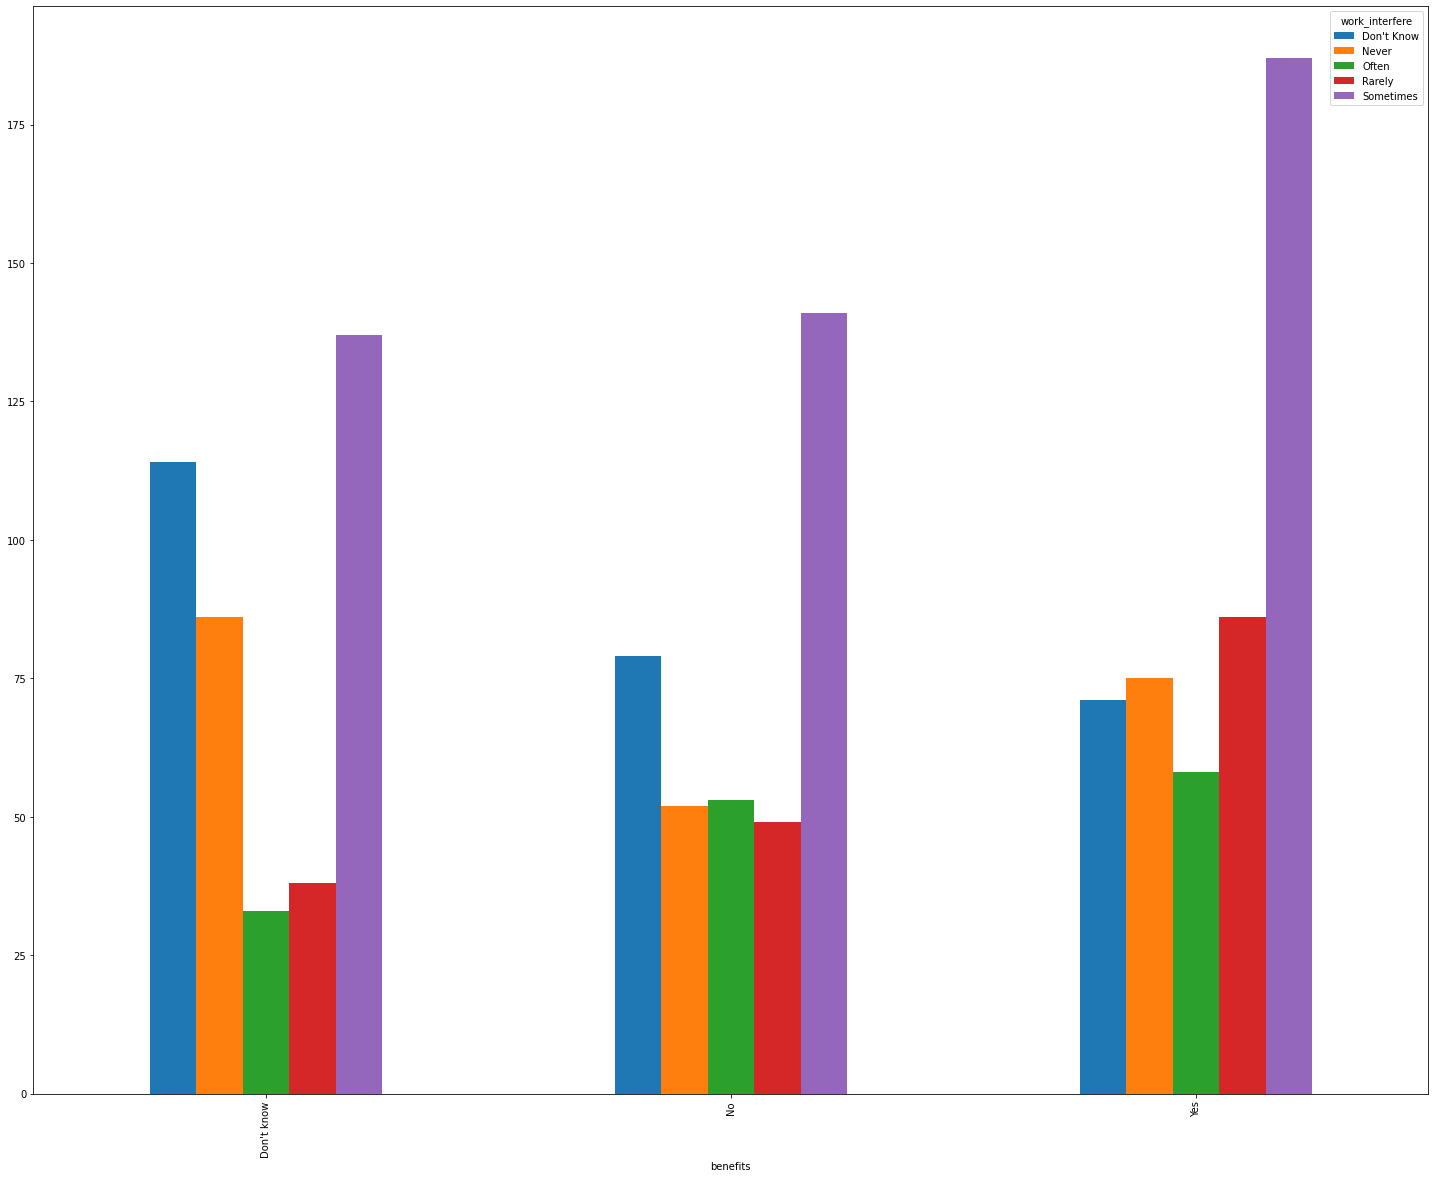

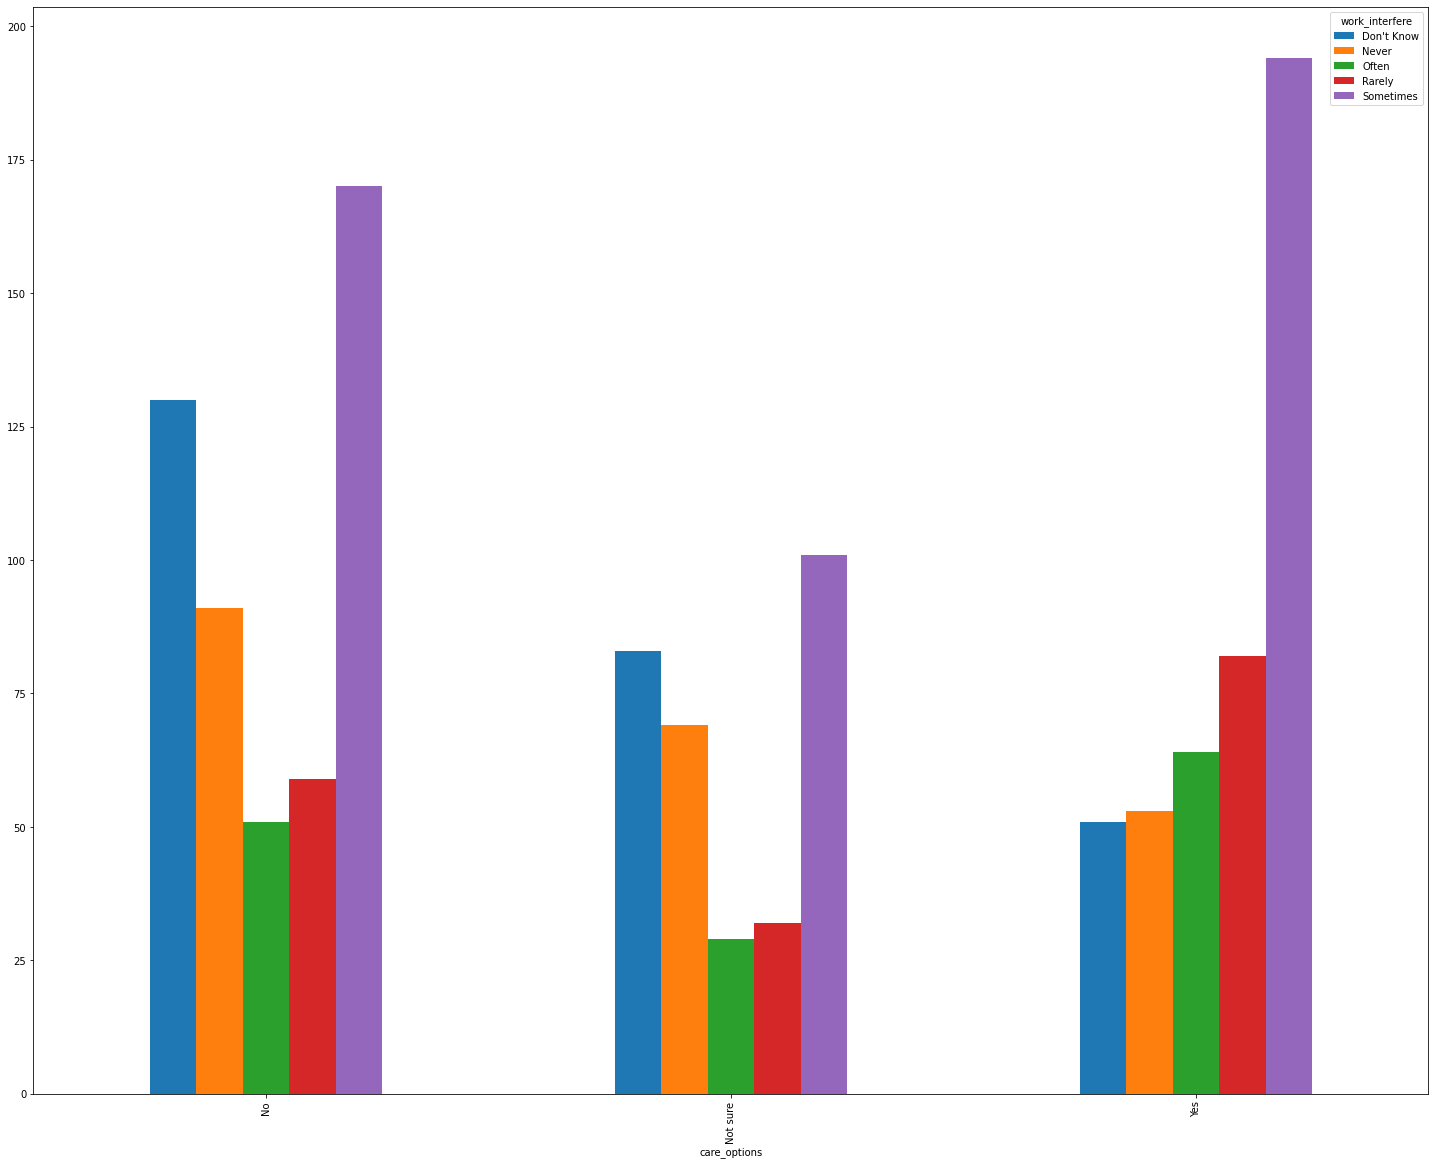

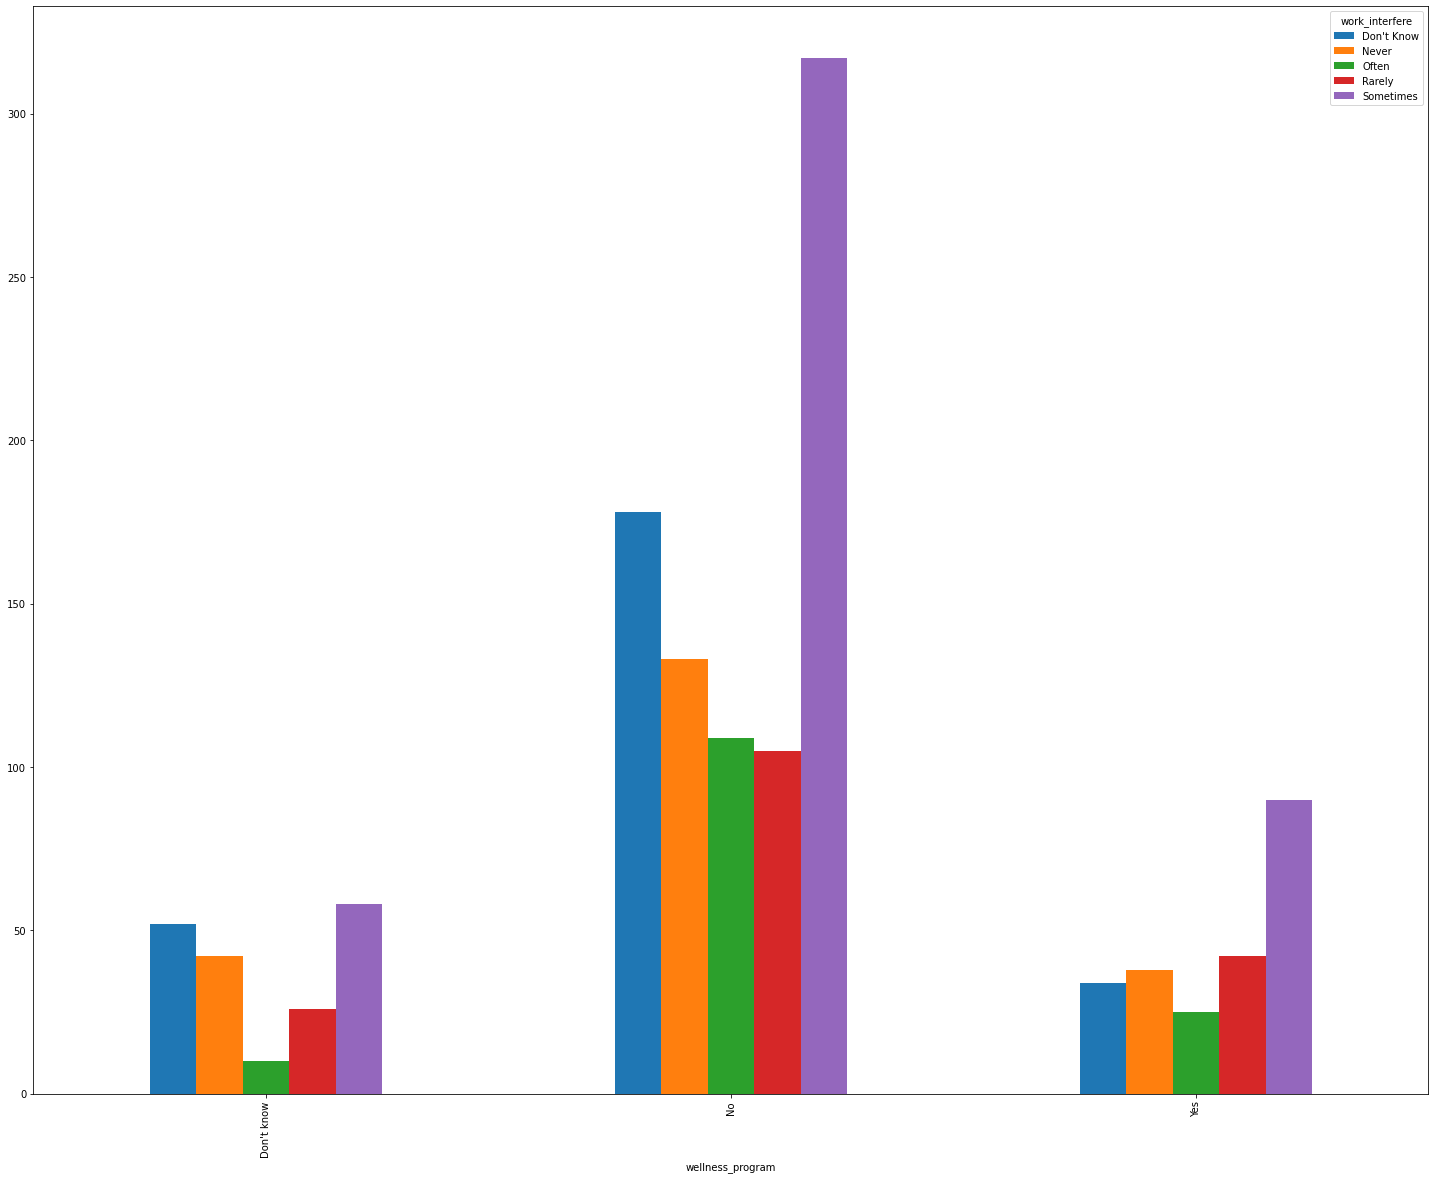

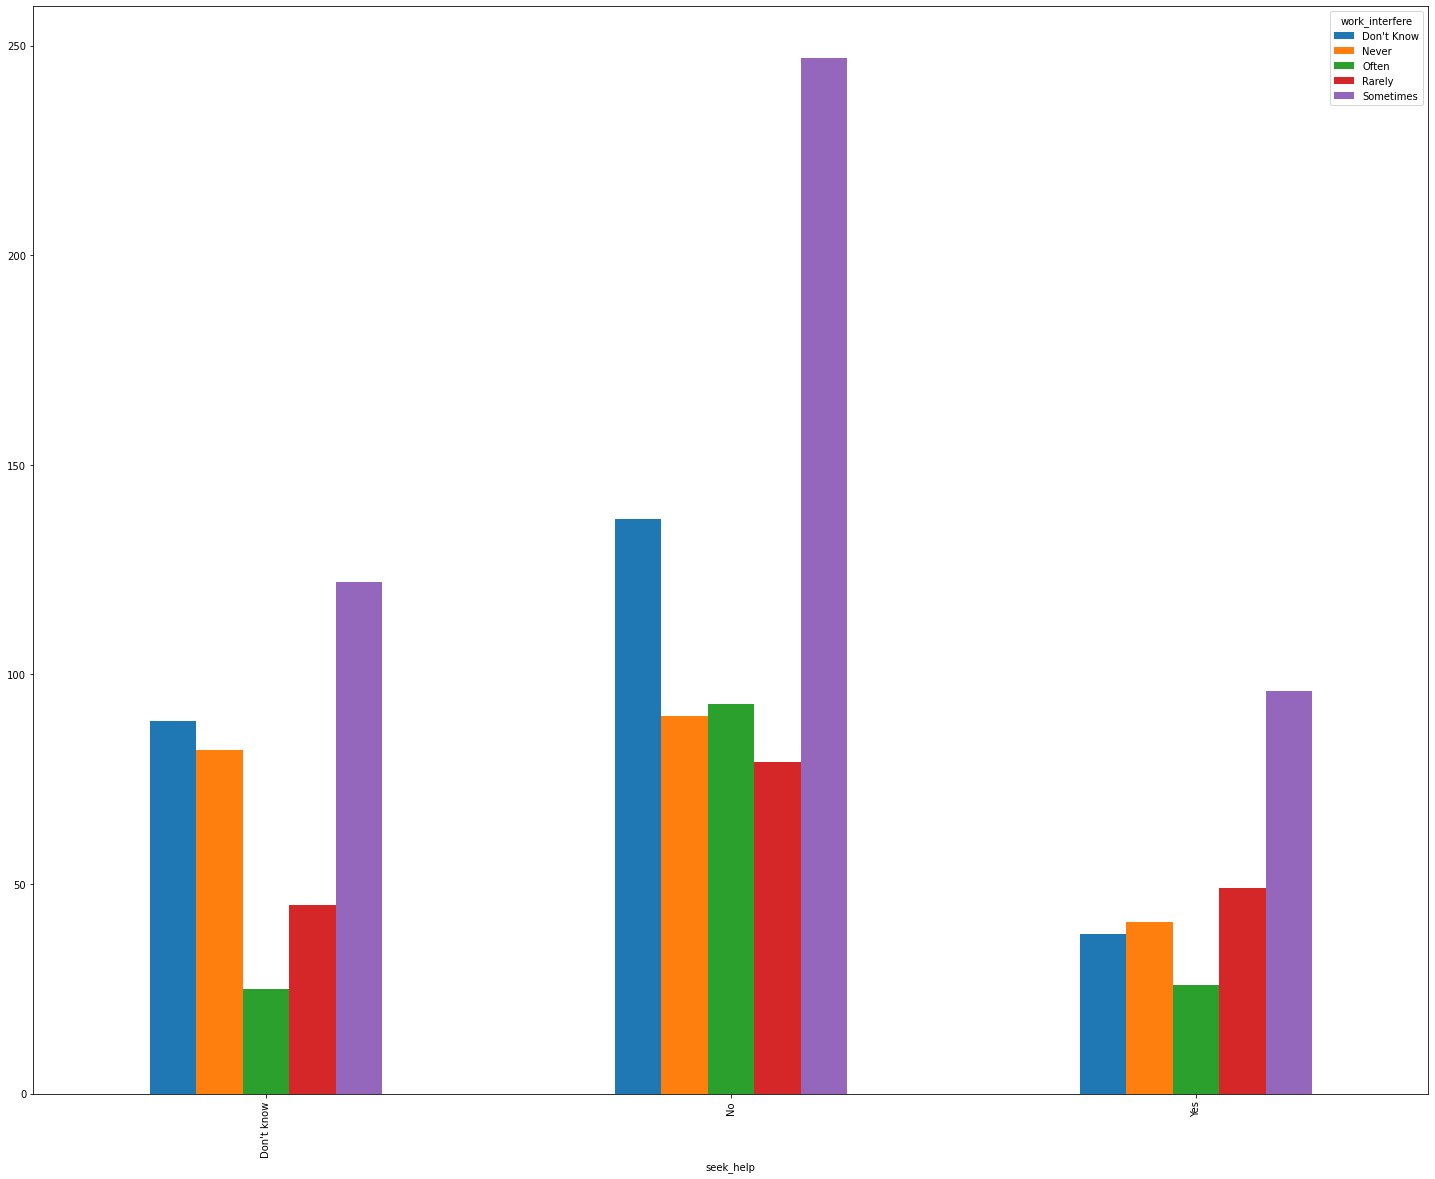

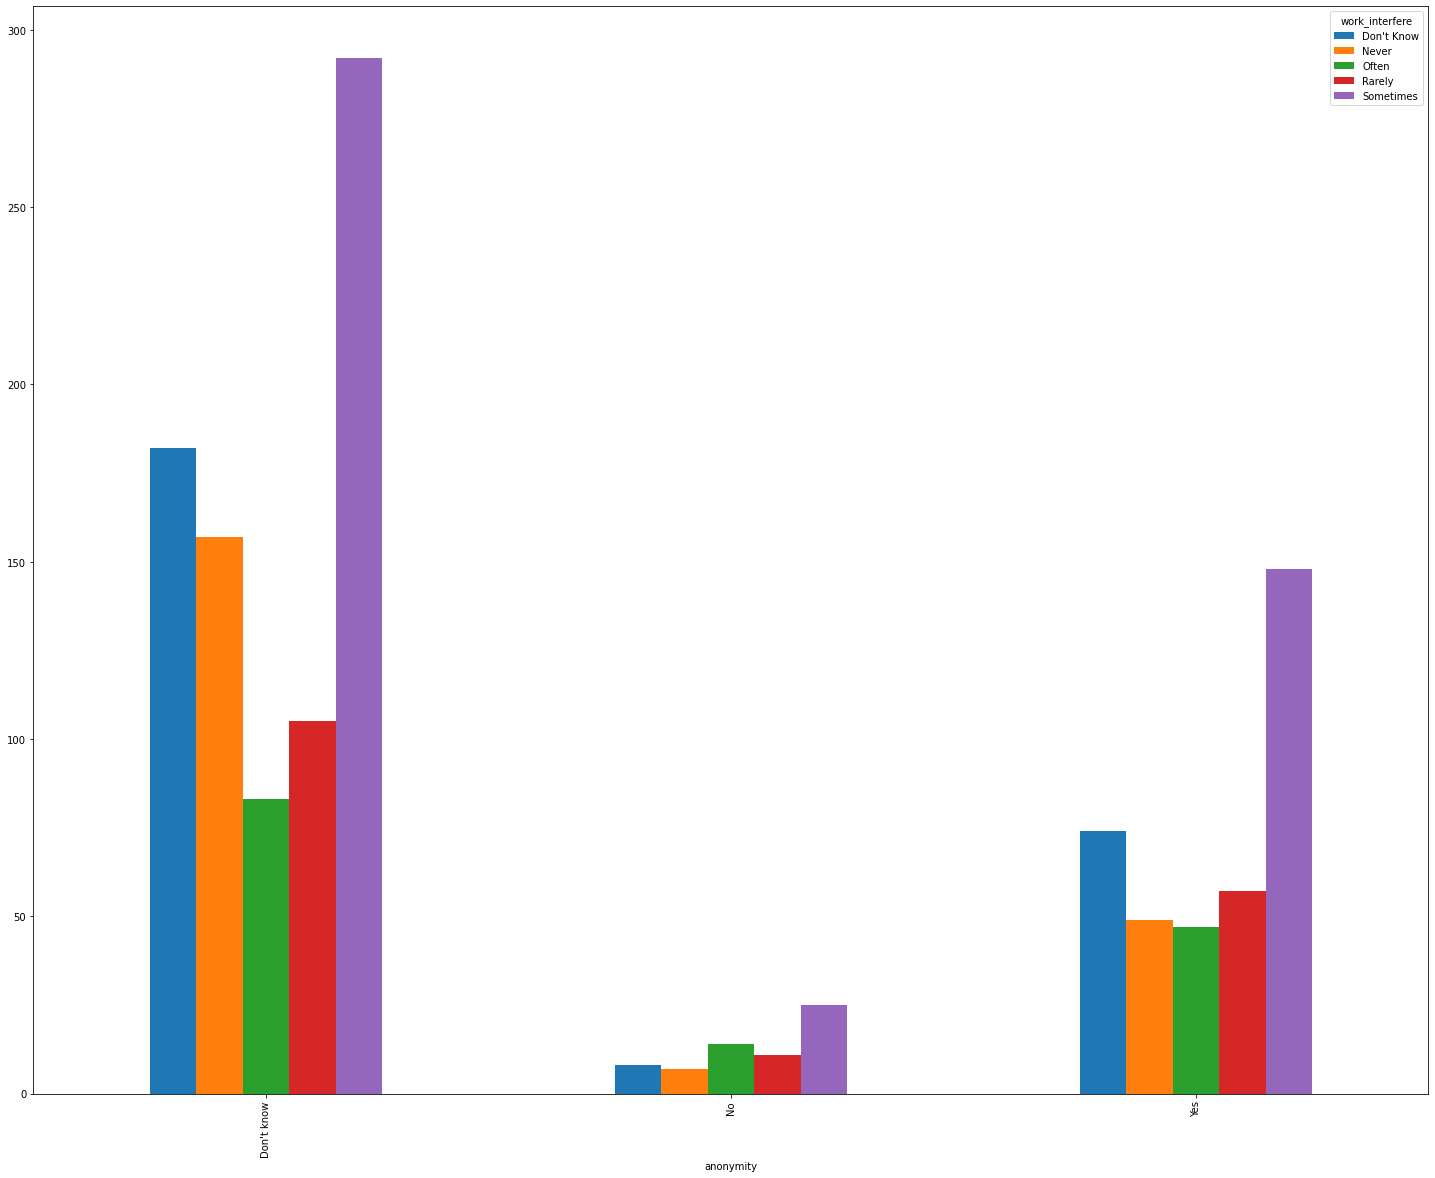

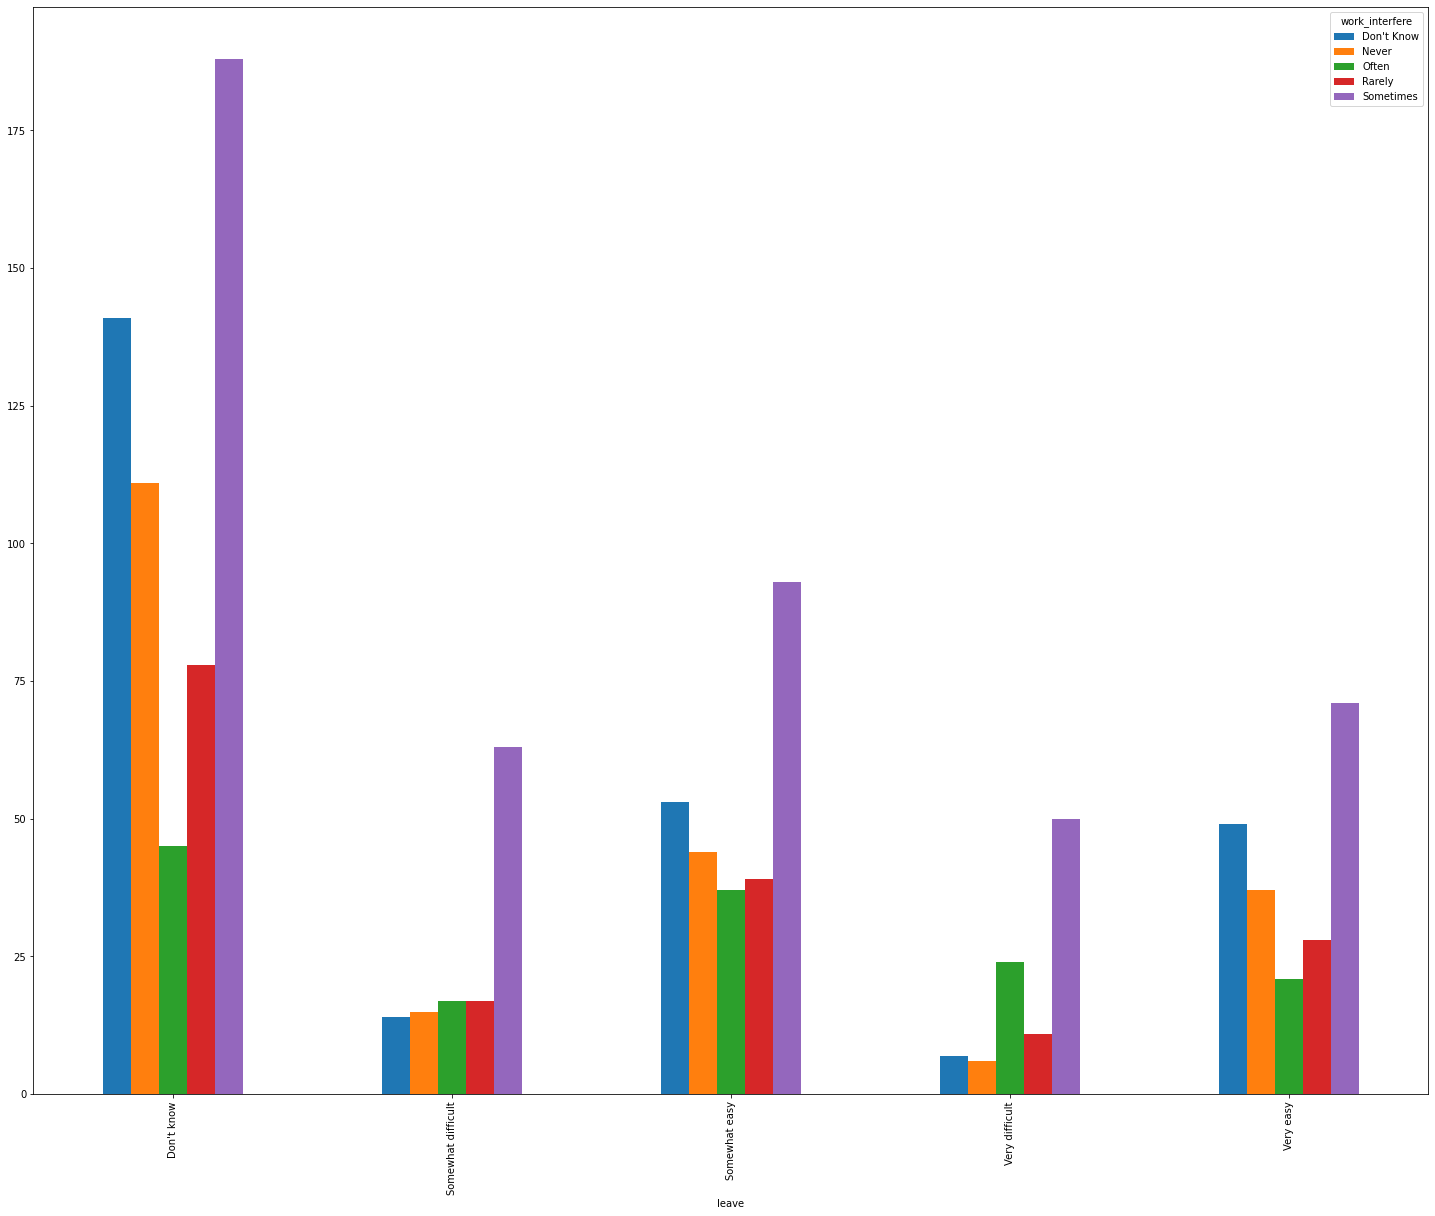

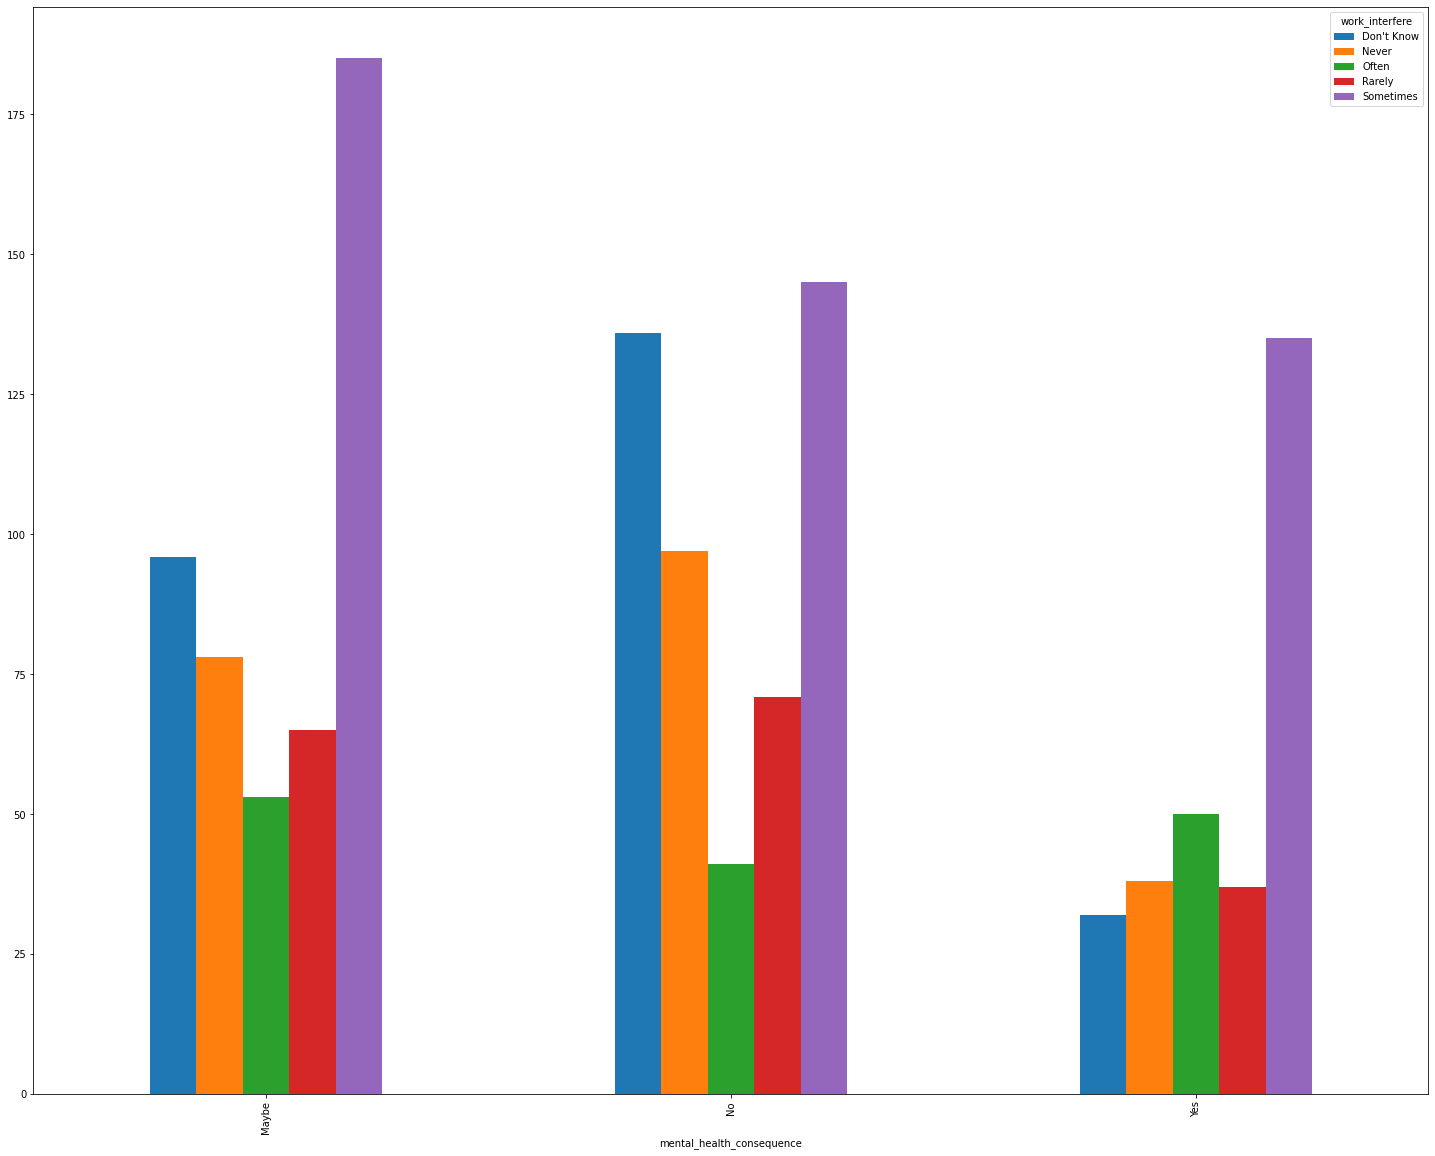

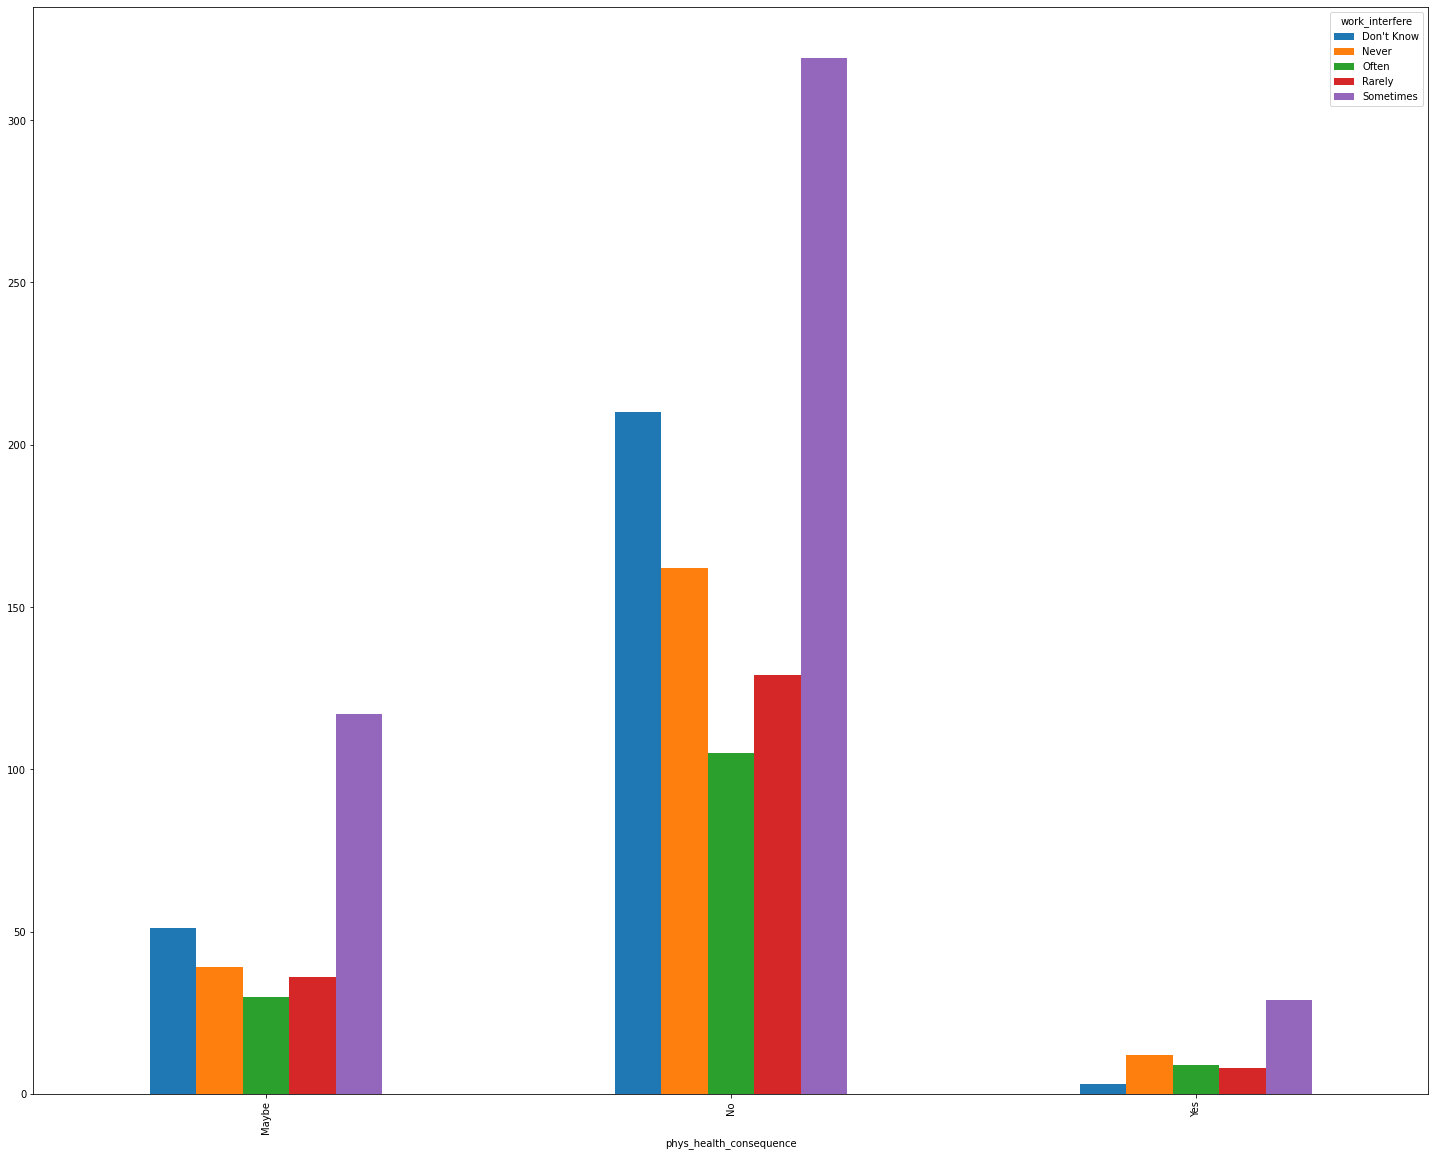

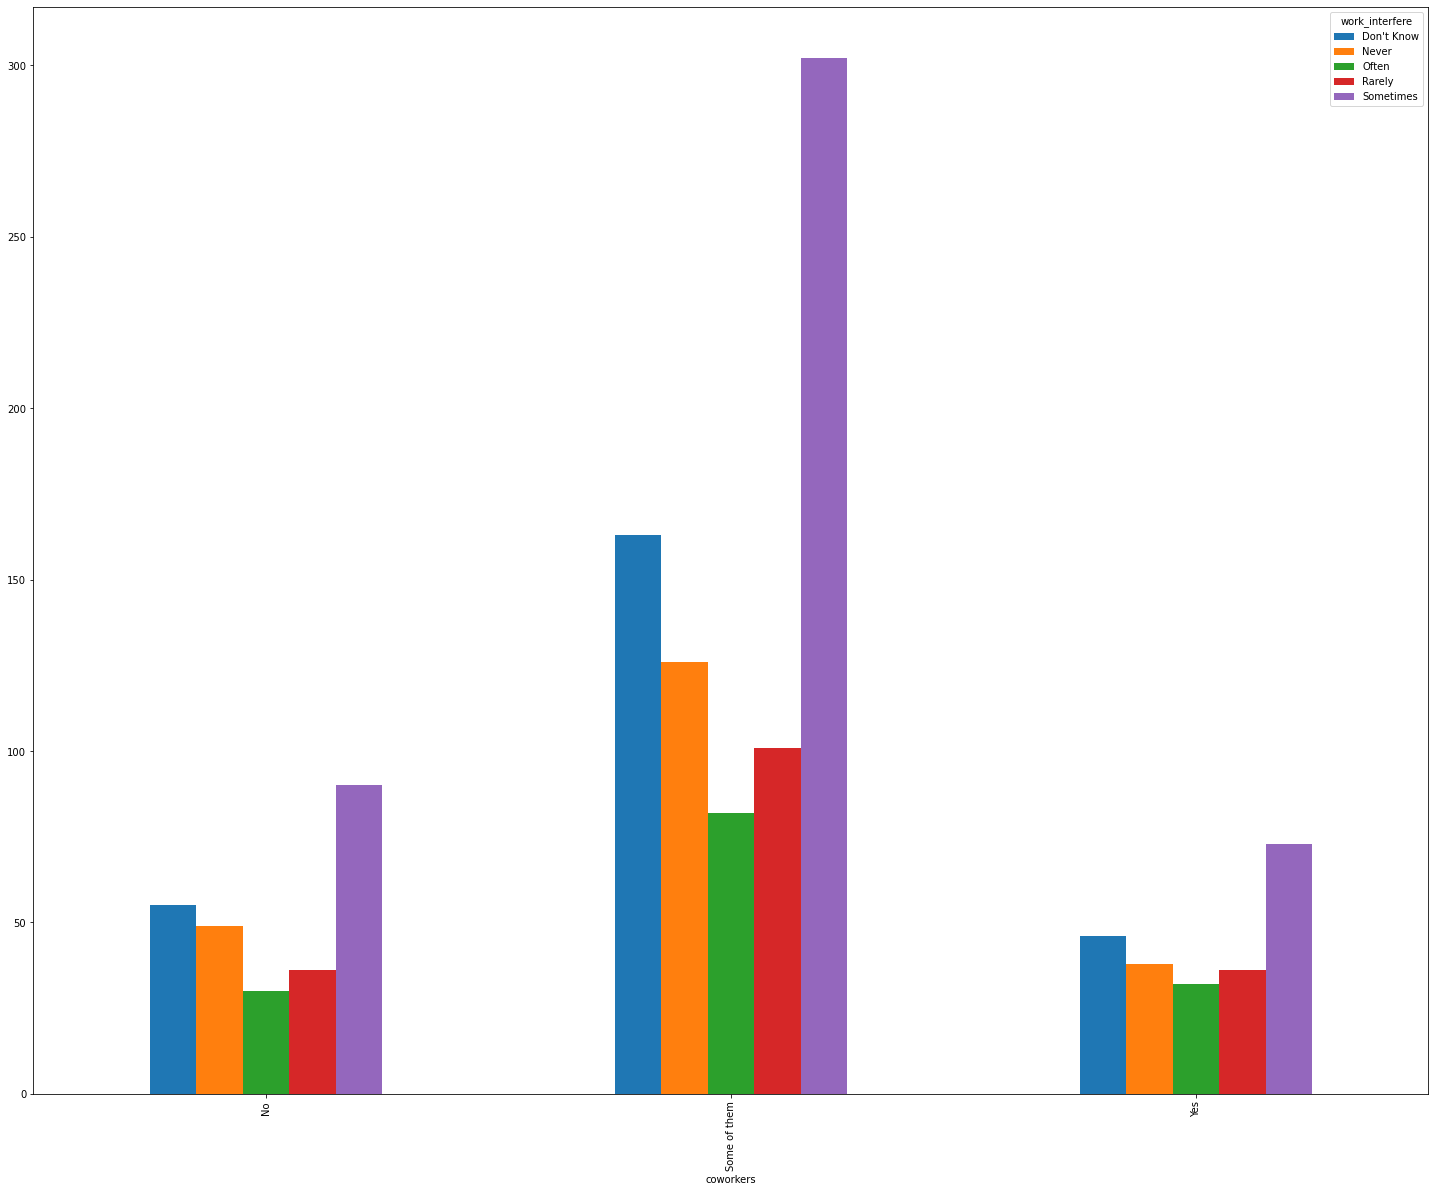

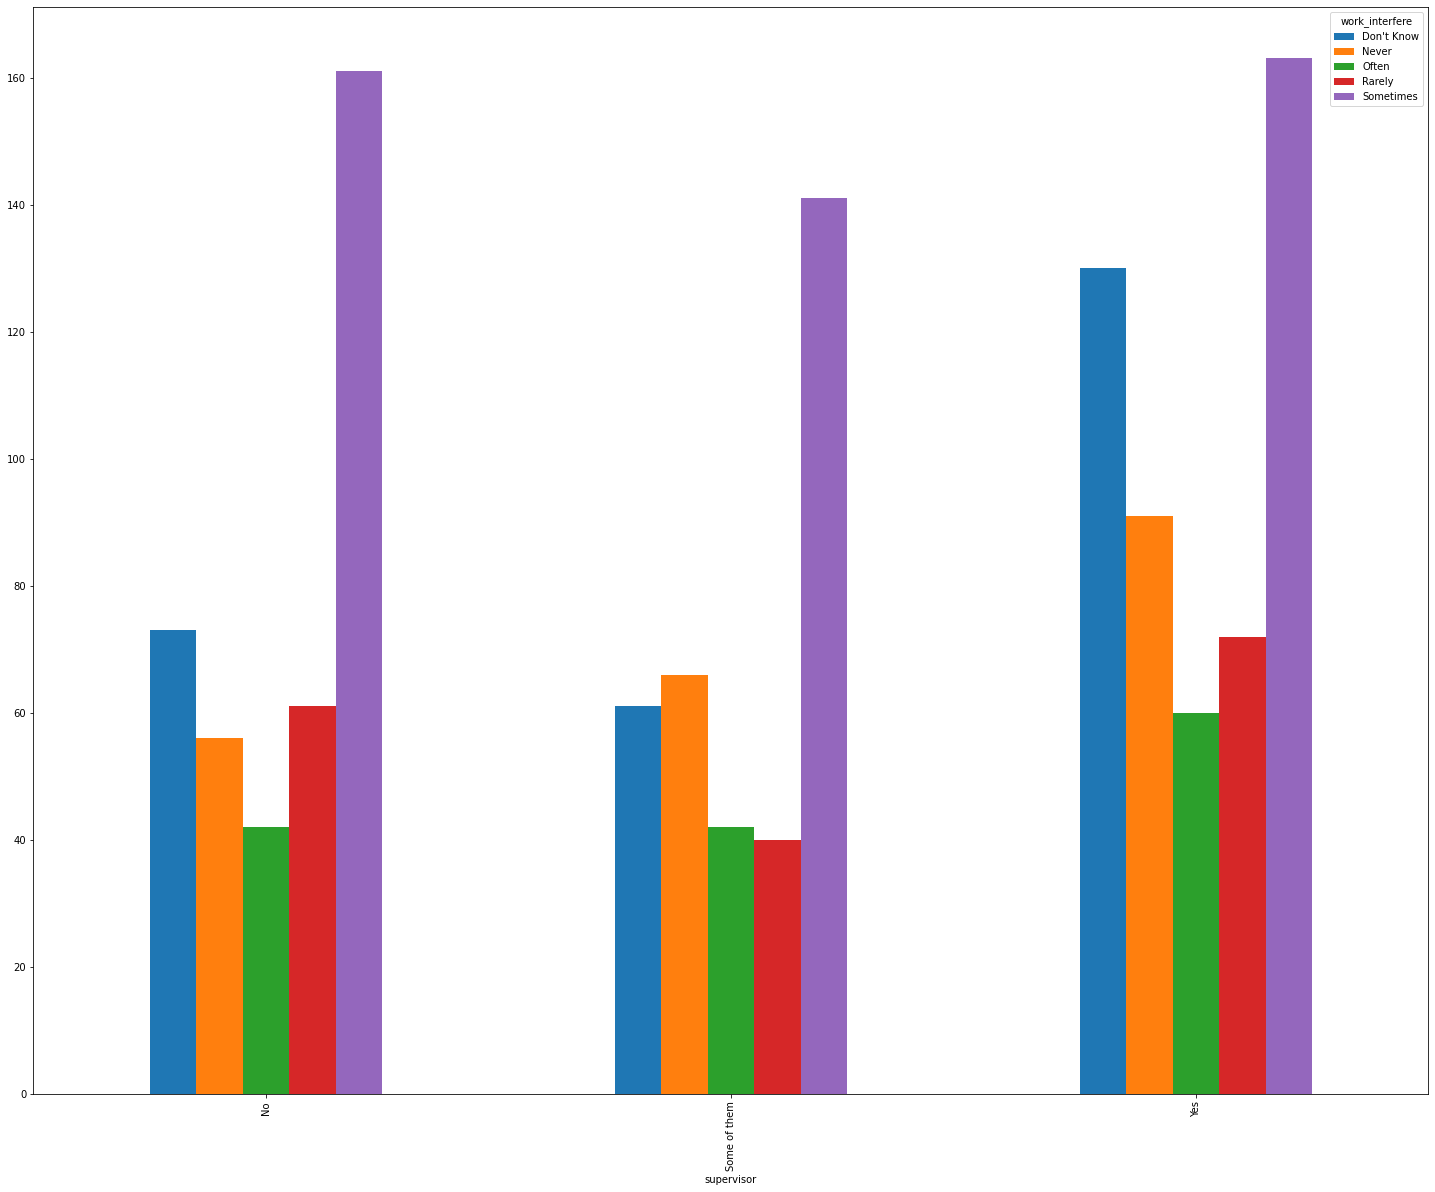

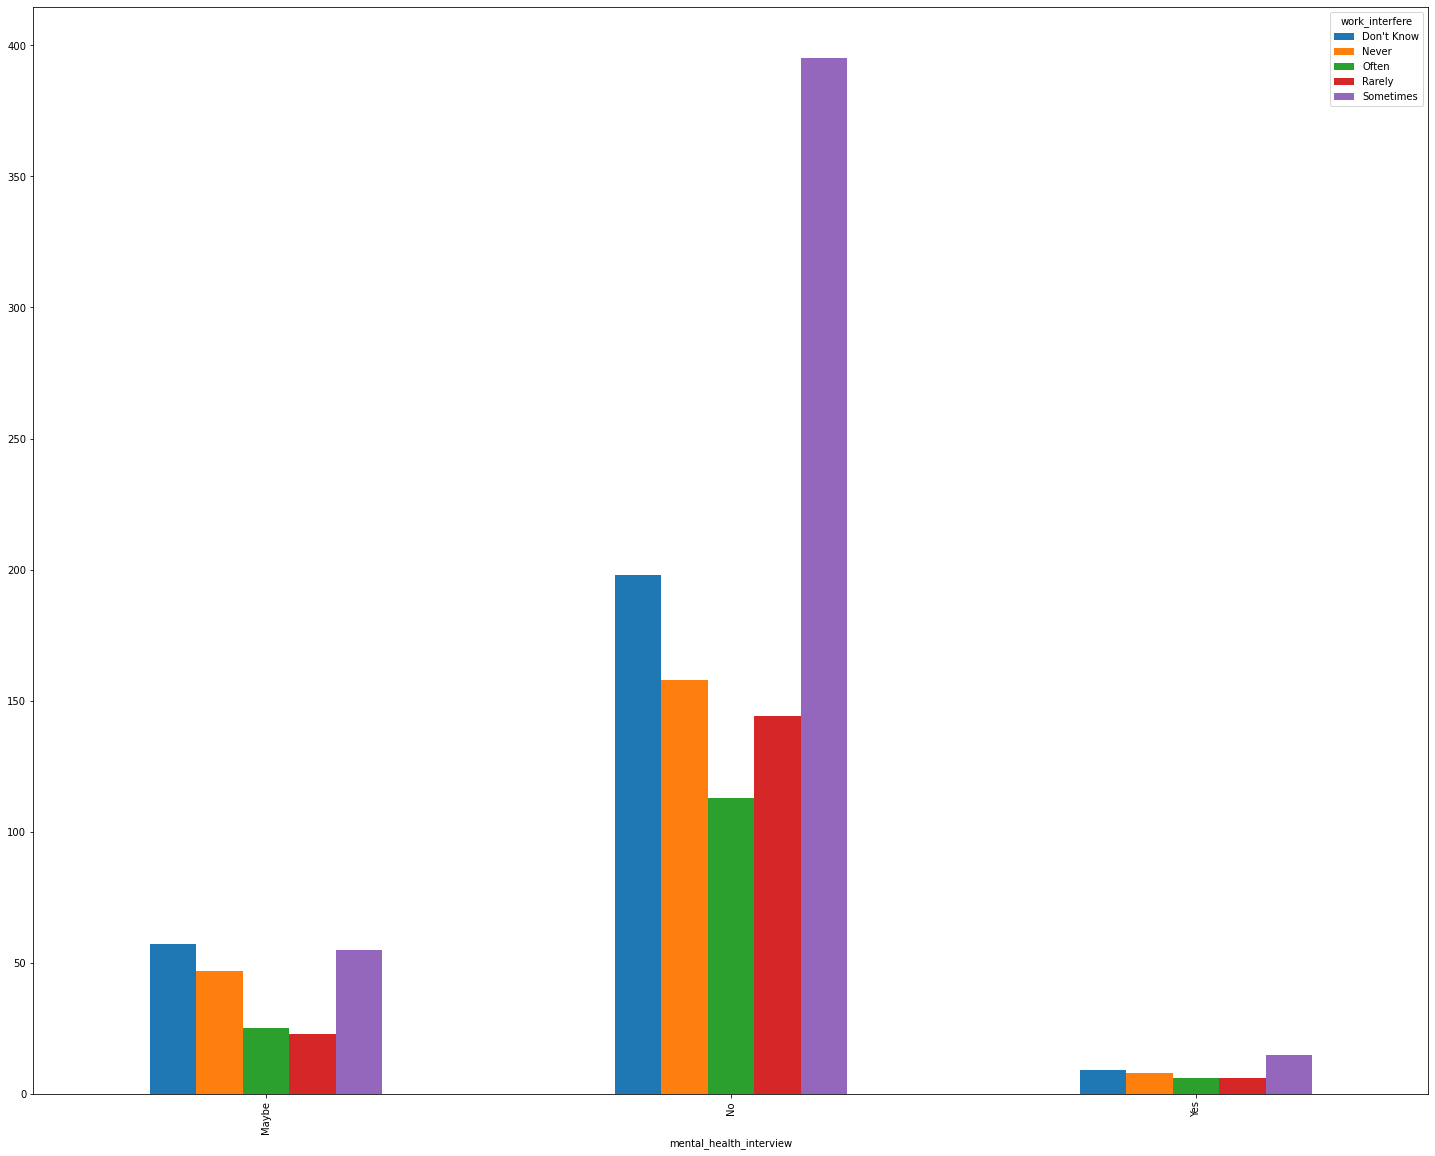

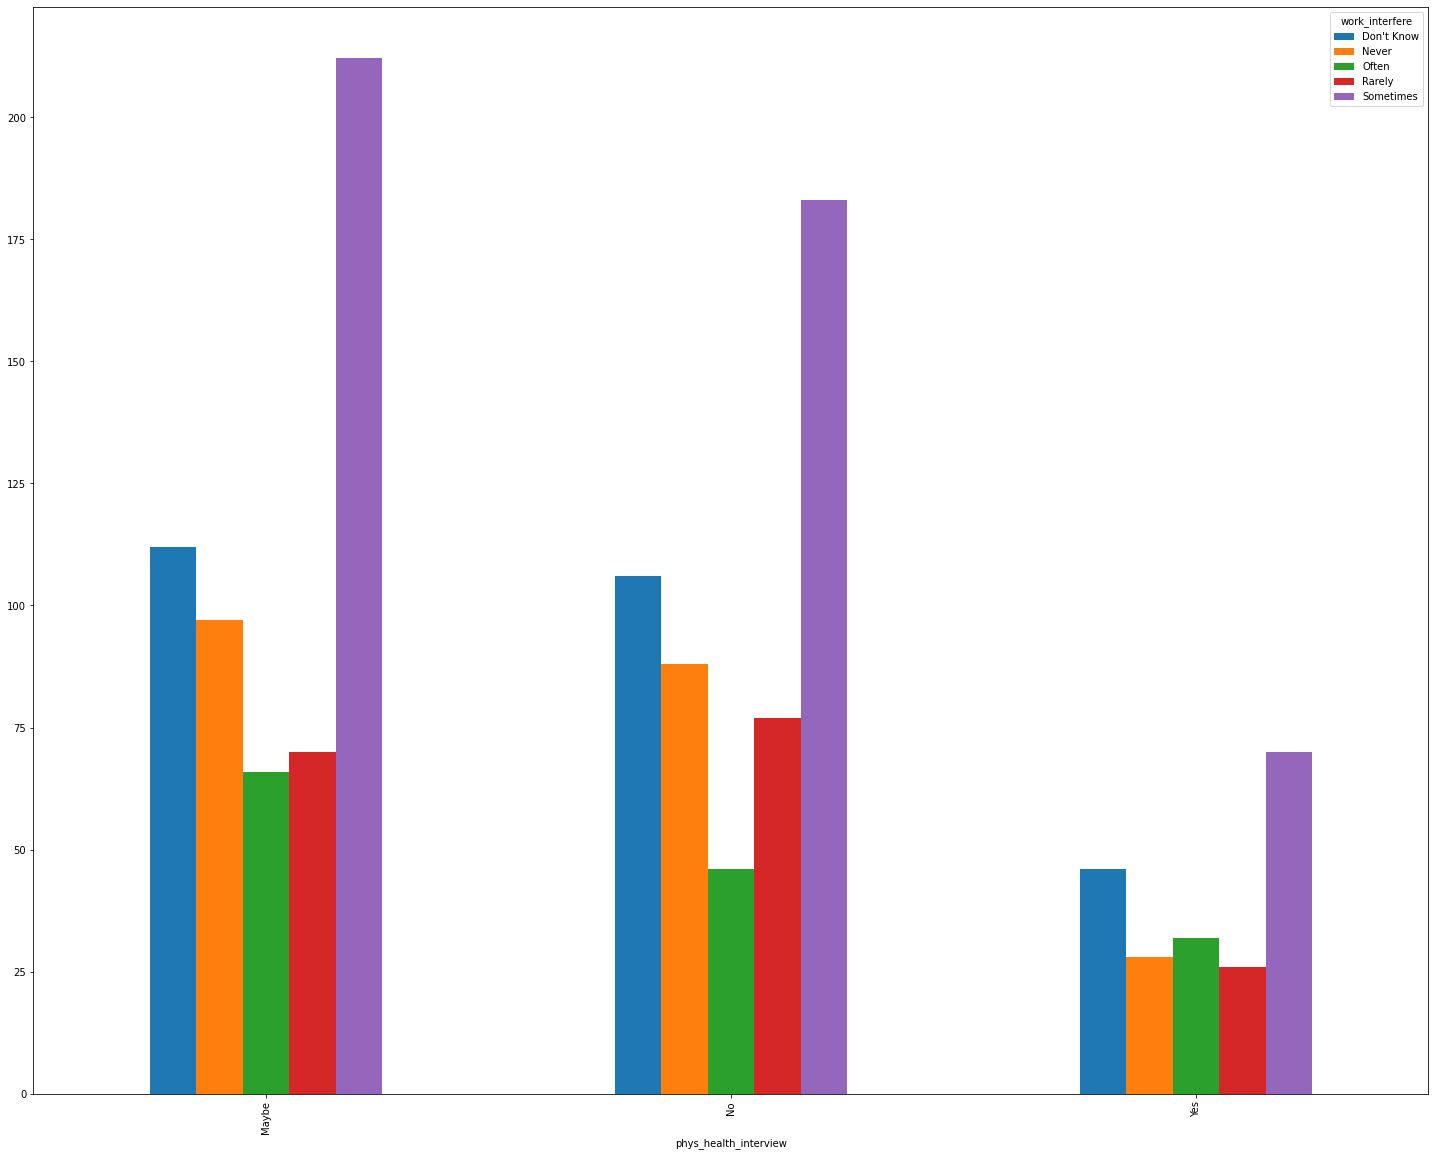

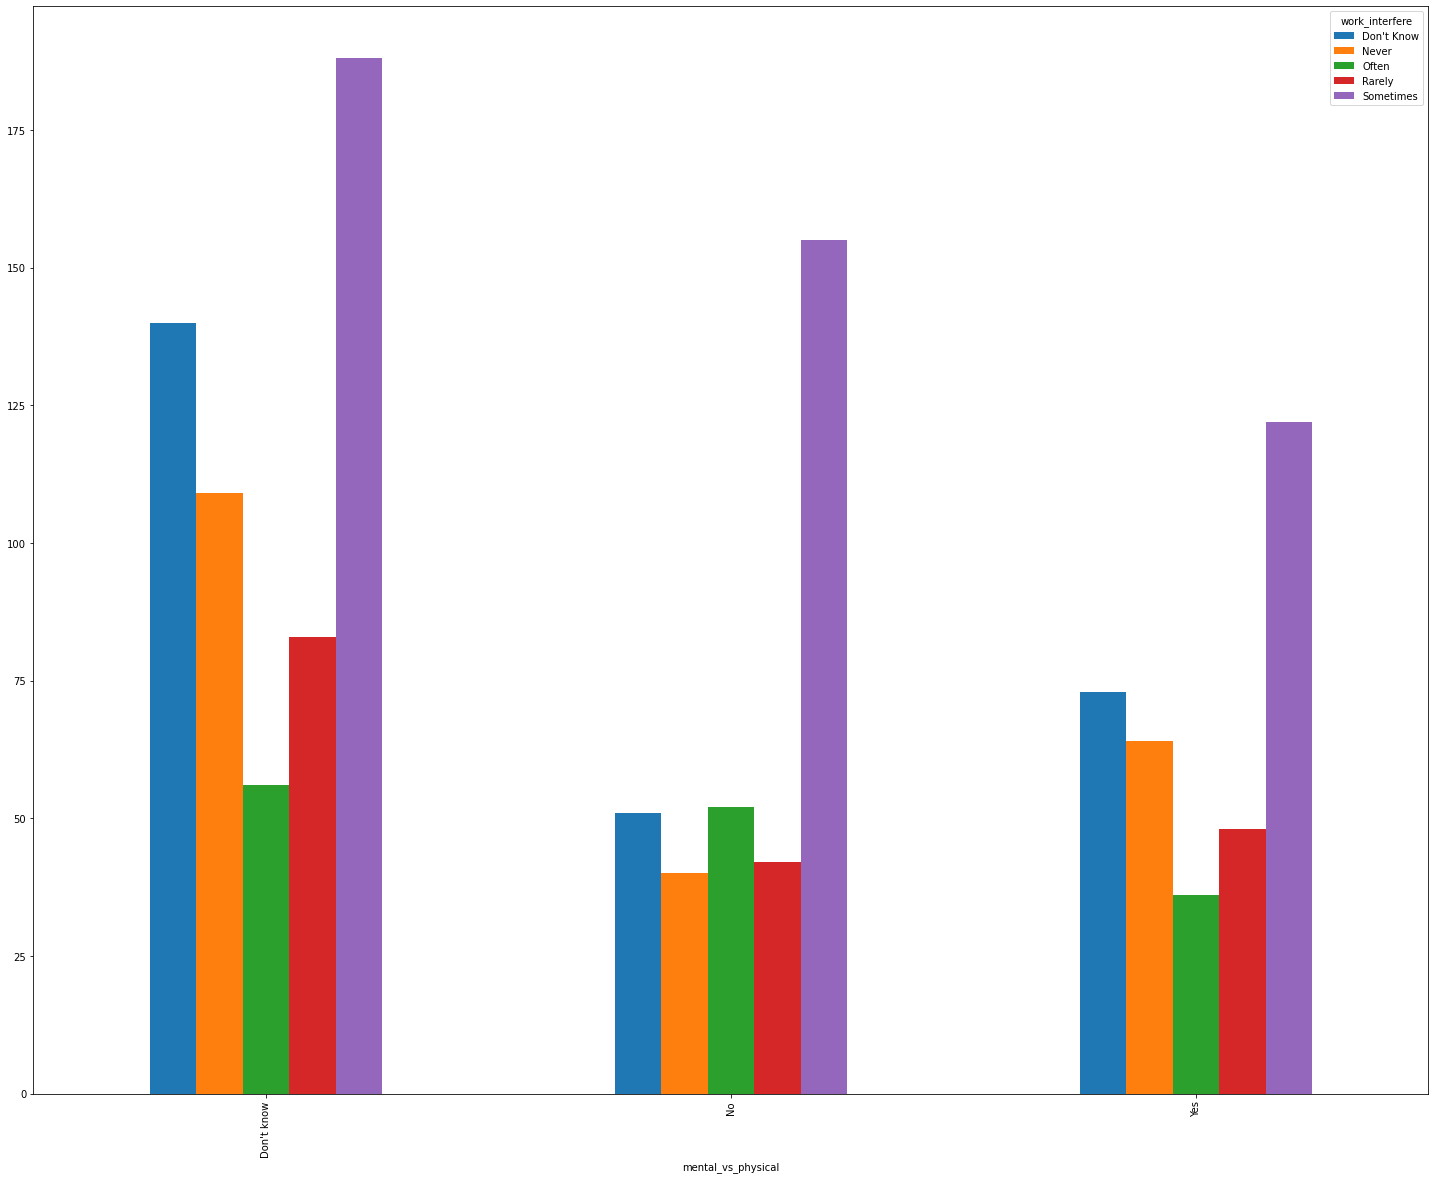

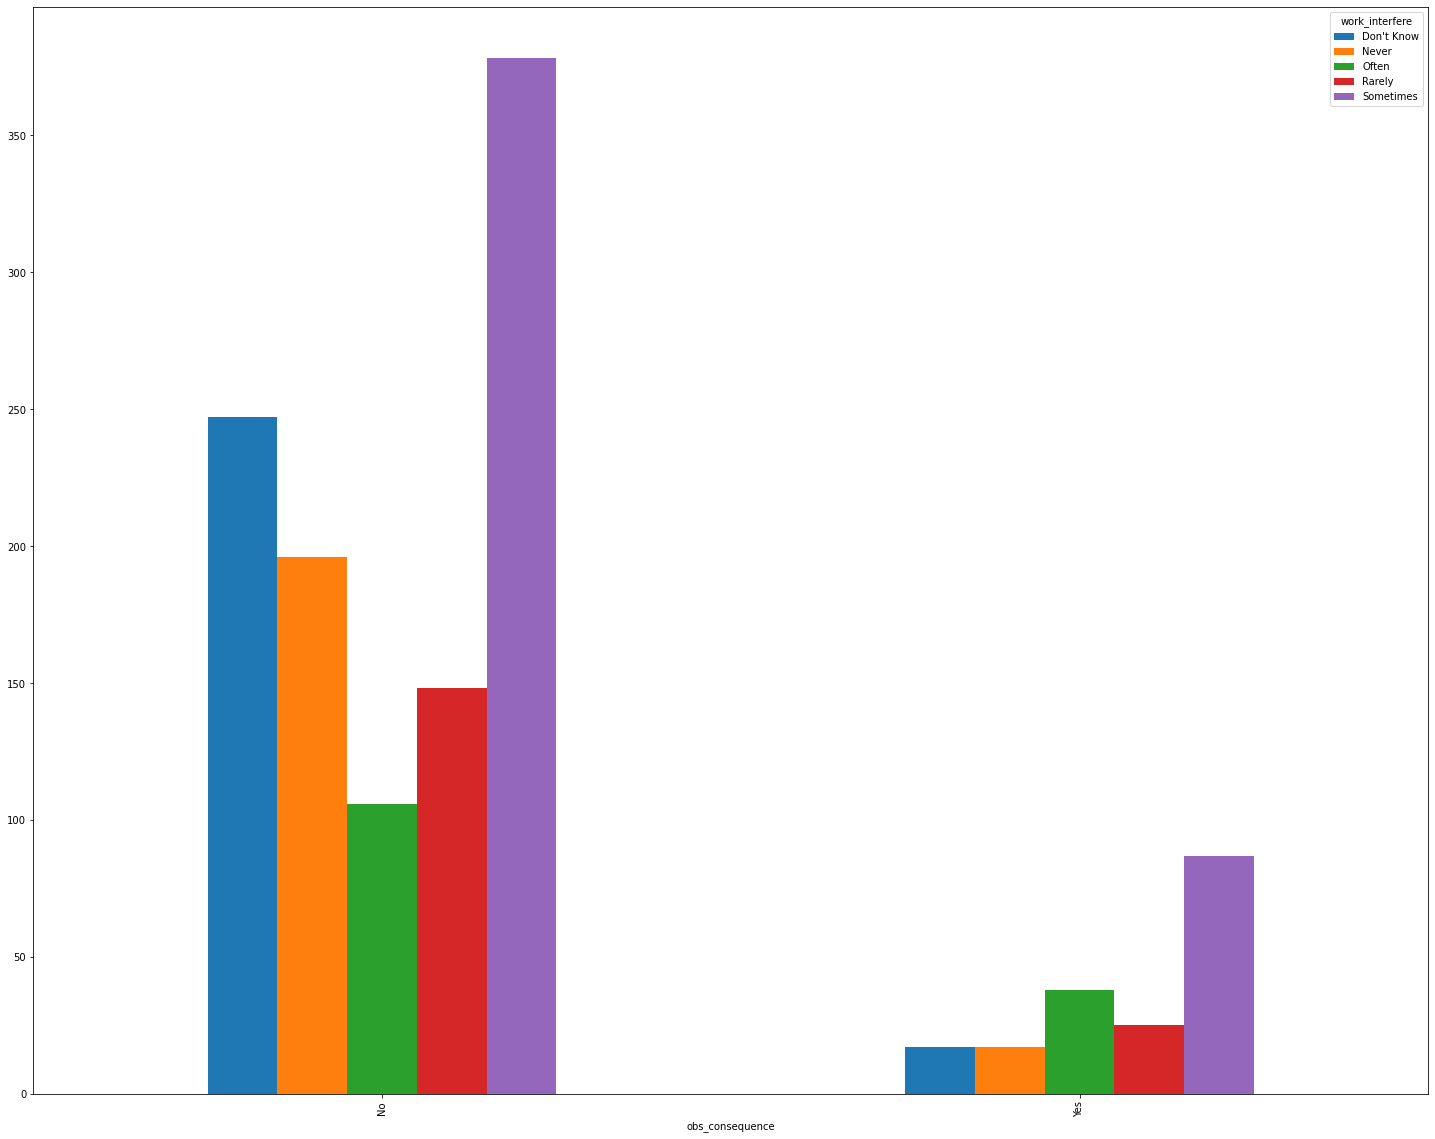

In [31]:
for i,col in enumerate(categorical_columns.columns):
    cat1=categorical_columns.groupby([col,'work_interfere'])['work_interfere'].count().unstack()
    cat1.plot(kind='bar',figsize=(25,20))

# Encoding the data

In [37]:
labelDict = {}
for feature in data:
    le = preprocessing.LabelEncoder()
    le.fit(data[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    data[feature] = le.transform(data[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)

label_Age [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 60, 61, 62, 65, 72]
label_Gender ['A little about you', 'Agender', 'All', 'Androgyne', 'Cis Female', 'Cis Male', 'Cis Man', 'Enby', 'F', 'Femake', 'Female', 'Female ', 'Female (cis)', 'Female (trans)', 'Genderqueer', 'Guy (-ish) ^_^', 'M', 'Mail', 'Make', 'Mal', 'Male', 'Male ', 'Male (CIS)', 'Male-ish', 'Malr', 'Man', 'Nah', 'Neuter', 'Trans woman', 'Trans-female', 'Woman', 'cis male', 'cis-female/femme', 'f', 'femail', 'female', 'fluid', 'm', 'maile', 'male', 'male leaning androgynous', 'msle', 'non-binary', 'ostensibly male, unsure what that really means', 'p', 'queer', 'queer/she/they', 'something kinda male?', 'woman']
label_Country ['Australia', 'Austria', 'Bahamas, The', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark'

Drop the column Country

In [38]:
#Get rid of 'Country'
data = data.drop(['Country'], axis= 1)
data.head()

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0   19      10              0               0          1               2   
1   26      16              0               0          0               3   
2   14      20              0               0          0               3   
3   13      20              0               1          1               2   
4   13      20              0               0          0               1   

   no_employees  remote_work  tech_company  benefits  ...  leave  \
0             1            0             1         2  ...      2   
1             5            0             0         0  ...      0   
2             1            0             1         1  ...      1   
3             2            0             1         1  ...      1   
4             0            1             1         2  ...      0   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                          0                        1          0           0   
2                          1                        1          2           2   
3                          2                        2          1           0   
4                          1                        1          1           2   

   mental_health_interview  phys_health_interview  mental_vs_physical  \
0                        1                      0                   2   
1                        1                      1                   0   
2                        2                      2                   1   
3                        0                      0                   1   
4                        2                      2                   0   

   obs_consequence  age_range  
0                0          2  
1                0          2  
2                0          2  
3                1          2  
4                0          2  

[5 rows x 24 columns]

# Correlation

Correlation in relation to Age

In [41]:
cor_target = abs(cor["Age"])
cor_target 

Age                          1.000000
Gender                       0.043044
self_employed                0.059622
family_history               0.008898
treatment                    0.072498
work_interfere               0.038928
no_employees                 0.131750
remote_work                  0.144648
tech_company                 0.055910
benefits                     0.154760
care_options                 0.108950
wellness_program             0.103527
seek_help                    0.130644
anonymity                    0.026194
leave                        0.011344
mental_health_consequence    0.028300
phys_health_consequence      0.050316
coworkers                    0.007452
supervisor                   0.008296
mental_health_interview      0.062305
phys_health_interview        0.022981
mental_vs_physical           0.012065
obs_consequence              0.067801
age_range                    0.774263
Name: Age, dtype: float64

Correlation using the Pearson Method.

In [51]:
data.corr(method ='pearson')

Age    Gender  self_employed  family_history  \
Age                        1.000000  0.043044       0.059622        0.008898   
Gender                     0.043044  1.000000       0.090746       -0.051719   
self_employed              0.059622  0.090746       1.000000        0.009304   
family_history             0.008898 -0.051719       0.009304        1.000000   
treatment                  0.072498 -0.051068       0.019440        0.377918   
work_interfere             0.038928 -0.036484       0.024747        0.322290   
no_employees               0.131750 -0.032291       0.032694        0.012341   
remote_work                0.144648  0.043897       0.289530        0.014456   
tech_company              -0.055910 -0.023229       0.066589       -0.046079   
benefits                   0.154760 -0.037249      -0.043905        0.128490   
care_options               0.108950 -0.050646       0.047175        0.107764   
wellness_program           0.103527 -0.030561       0.031262        0.065098   
seek_help                  0.130644 -0.054994       0.057966        0.045071   
anonymity                  0.026194 -0.002971       0.111530        0.063679   
leave                     -0.011344  0.010615       0.178628        0.022631   
mental_health_consequence  0.028300 -0.012095       0.029308        0.028196   
phys_health_consequence   -0.050316  0.012745       0.007321        0.002832   
coworkers                 -0.007452  0.021967       0.046455       -0.000847   
supervisor                 0.008296  0.003079       0.023083        0.003729   
mental_health_interview    0.062305  0.001262      -0.002298        0.044564   
phys_health_interview     -0.022981  0.018253      -0.021901        0.039894   
mental_vs_physical        -0.012065 -0.001396       0.133886        0.041089   
obs_consequence            0.067801 -0.009982       0.079816        0.124861   
age_range                  0.774263  0.027798       0.064337        0.050140   

                           treatment  work_interfere  no_employees  \
Age                         0.072498        0.038928      0.131750   
Gender                     -0.051068       -0.036484     -0.032291   
self_employed               0.019440        0.024747      0.032694   
family_history              0.377918        0.322290      0.012341   
treatment                   1.000000        0.614879      0.017595   
work_interfere              0.614879        1.000000      0.011632   
no_employees                0.017595        0.011632      1.000000   
remote_work                 0.026937        0.034725     -0.058497   
tech_company               -0.031525        0.005897     -0.153030   
benefits                    0.226140        0.134127      0.172465   
care_options                0.236578        0.163240      0.153274   
wellness_program            0.094713        0.093857      0.125149   
seek_help                   0.089935        0.091820      0.120186   
anonymity                   0.142889        0.063502      0.095561   
leave                       0.061549        0.050352     -0.067353   
mental_health_consequence   0.030221        0.060506      0.026642   
phys_health_consequence    -0.008933       -0.020522     -0.067317   
coworkers                   0.068433        0.004070     -0.105813   
supervisor                 -0.036199       -0.100000     -0.108273   
mental_health_interview     0.098413        0.098978      0.078575   
phys_health_interview       0.051859       -0.017172      0.061762   
mental_vs_physical          0.062642        0.047200      0.037507   
obs_consequence             0.156972        0.134160      0.076867   
age_range                   0.064091        0.045215      0.072852   

                           remote_work  tech_company  benefits  ...     leave  \
Age                           0.144648     -0.055910  0.154760  ... -0.011344   
Gender                        0.043897     -0.023229 -0.037249  ...  0.010615   
self_employed                 0.28953

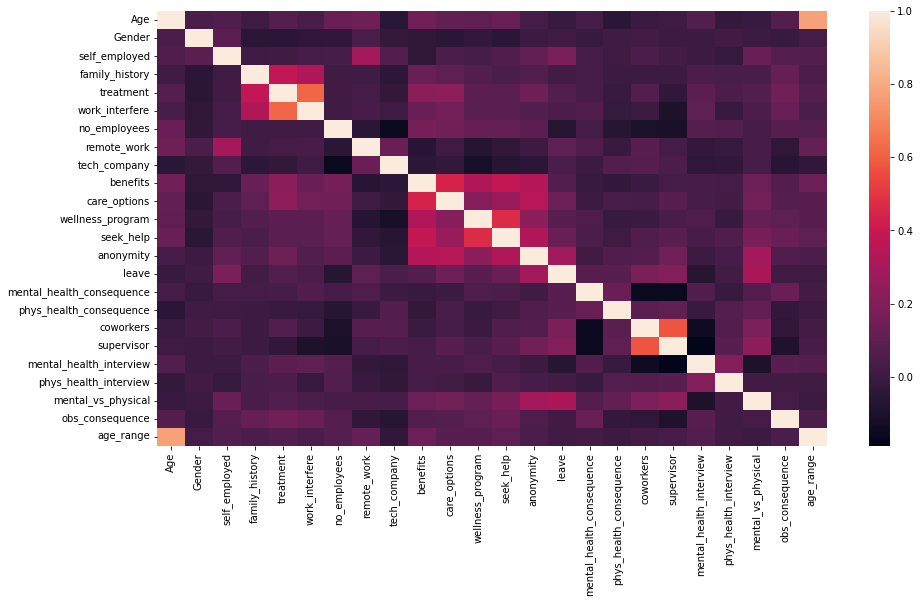

In [40]:
cor=data.corr()
plt.figure(figsize=(15,8))
fig=sns.heatmap(cor)

In [52]:
relevant_features = cor_target[cor_target>0.2]
relevant_features

Age          1.000000
age_range    0.774263
Name: Age, dtype: float64

# Feature Selection

In [50]:
scaler = MinMaxScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data.head()

Age  Gender  self_employed  family_history  treatment  work_interfere  \
0  0.431818      10              0               0          1               2   
1  0.590909      16              0               0          0               3   
2  0.318182      20              0               0          0               3   
3  0.295455      20              0               1          1               2   
4  0.295455      20              0               0          0               1   

   no_employees  remote_work  tech_company  benefits  ...  leave  \
0             1            0             1         2  ...      2   
1             5            0             0         0  ...      0   
2             1            0             1         1  ...      1   
3             2            0             1         1  ...      1   
4             0            1             1         2  ...      0   

   mental_health_consequence  phys_health_consequence  coworkers  supervisor  \
0                          1                        1          1           2   
1                          0                        1          0           0   
2                          1                        1          2           2   
3                          2                        2          1           0   
4                          1                        1          1           2   

   mental_health_interview  phys_health_interview  mental_vs_physical  \
0                        1                      0                   2   
1                        1                      1                   0   
2                        2                      2                   1   
3                        0                      0                   1   
4                        2                      2                   0   

   obs_consequence  age_range  
0                0          2  
1                0          2  
2                0          2  
3                1          2  
4                0          2  

[5 rows x 24 columns]

Feature Importances

([<matplotlib.axis.XTick at 0x1465e734220>,
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'family_history'),
  Text(3, 0, 'benefits'),
  Text(4, 0, 'care_options'),
  Text(5, 0, 'anonymity'),
  Text(6, 0, 'leave'),
  Text(7, 0, 'work_interfere')])

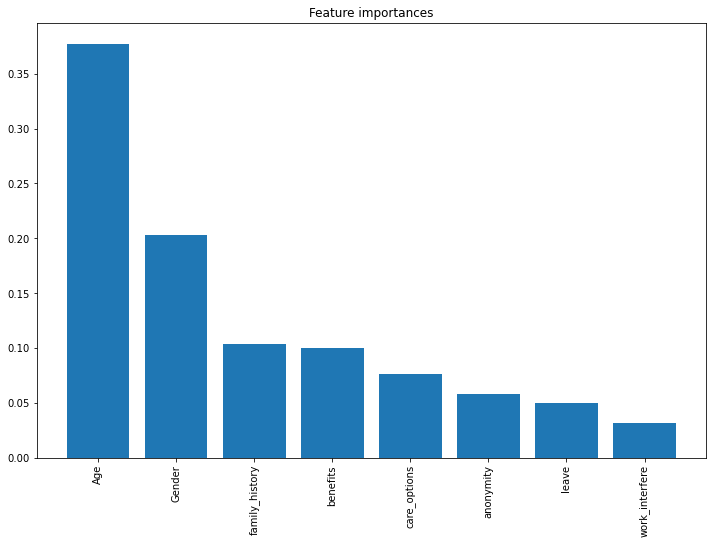

In [64]:
feature_cols1 = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere']
X = data[feature_cols1]
y = data.treatment
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)
# Create dictionaries for final graph
# Use: methodDict['Stacking'] = accuracy_score
methodDict = {}
rmseDict = ()
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=42)
forest.fit(X, y)
importances = forest.feature_importances_
#std = np.std([tree1.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols1[f])
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), labels, rotation='vertical')